<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>E-Commerce Customer Churn Analysis and Prediction</center></h1>

Purwadhika Final Project By Beta Group:
- Alif Wahyu Syahnanda
- Cyntia Angelica
- Fani Indriyaningsih

# **Libraries**

In [865]:
!pip install category_encoders
!pip install shap

In [866]:
# Library
import pandas as pd
import numpy as np
import missingno

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from termcolor import colored
from plotly.subplots import make_subplots

# Statistic Test
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import normaltest, shapiro, stats, pointbiserialr, spearmanr, chi2_contingency, kruskal, mannwhitneyu

# Pre-processing Model
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, make_scorer, roc_auc_score, roc_curve, auc

# Imbalance Property
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Model Selection
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

# Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, cross_validate, StratifiedKFold

# Additional
import pickle
import shap
import warnings
warnings.filterwarnings('ignore')

# **Business Understanding**

## **Background Context**
Dalam dunia bisnis yang dinamis dan penuh persaingan, cara perusahaan beroperasi dan berinteraksi dengan pasar terus berubah. E-commerce adalah salah satu contoh nyata dari evolusi bisnis ini, membuka peluang baru bagi perusahaan dan individu untuk membeli dan menjual barang secara online. Ketika pandemi COVID-19 melanda, penguncian global mendorong lonjakan besar dalam e-commerce. Pada tahun 2020, penetrasi penjualan e-commerce di Amerika Serikat meningkat lebih dari dua kali lipat menjadi 35% dari tahun sebelumnya, yang setara dengan pertumbuhan selama satu dekade. Secara global, hampir 20% dari total penjualan pada tahun 2021 dilakukan secara online, dan diperkirakan akan mencapai hampir seperempat dari semua penjualan global pada tahun 2025 ([Mckinsey](https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-e-commerce)).

Meningkatnya pembelian secara online menjadikan fokus pada pelanggan semakin penting bagi e-commerce. Menurut McKinsey & Company ([McKinsey & Company](https://www.mckinsey.com/capabilities/growth-marketing-and-sales/our-insights/the-three-building-blocks-of-successful-customer-experience-transformations)), peningkatan pengalaman pelanggan dapat menurunkan churn pelanggan hingga hampir 15%, serta meningkatkan rasio kemenangan hingga hampir 40%. Churn pelanggan adalah fenomena di mana pelanggan memutuskan untuk berhenti membeli atau menggunakan produk atau layanan dari suatu perusahaan. Memahami dan meningkatkan pengalaman pelanggan sangat penting untuk mempertahankan loyalitas mereka (retensi) dan mengurangi churn.

Pengalaman pelanggan ini sangat berkorelasi dengan kebiasaan mereka terhadap e-commerce atau perusahaan tertentu. Menyediakan layanan yang memuaskan, responsif, dan personal adalah kunci untuk menjaga hubungan jangka panjang dengan pelanggan. Dengan strategi yang tepat, perusahaan dapat mengurangi churn, meningkatkan retensi pelanggan, dan pada akhirnya meningkatkan profitabilitas. Penelitian menunjukkan bahwa pelanggan yang puas dan loyal cenderung menghabiskan lebih banyak dan lebih sering, menjadikan investasi dalam pengalaman pelanggan sebagai langkah strategis yang penting bagi kesuksesan jangka panjang perusahaan e-commerce.

Oleh karena itu, bagi perusahaan e-commerce, penting untuk memahami dan memprediksi churn rate guna mengidentifikasi pelanggan yang berisiko dan mengambil langkah proaktif untuk mempertahankan mereka. Dengan analisis yang tepat, perusahaan dapat merancang program loyalitas, menawarkan insentif yang relevan, dan meningkatkan kualitas layanan secara keseluruhan untuk meminimalkan churn dan memaksimalkan keuntungan.

***Apa itu churn?***

Churn rate dalam *e-commerce* adalah persentase pelanggan yang berhenti melakukan pembelian atau berinteraksi dengan perusahaan dalam periode waktu tertentu. Menurut [shopify.com](https://www.shopify.com/blog/churn-rate-in-ecommerce), churn rate dihitung dengan cara berikut:

(Jumlah pelanggan di awal periode - jumlah pelanggan di akhir periode + jumlah pelanggan baru)/Jumlah pelanggan di awal periode

Menentukan apakah customer churn dapat dilihat dari data historis pembelian pelanggan untuk melihat frekuensi pembelian mereka. Jika pelanggan biasanya membeli setiap bulan tetapi belum melakukan pembelian selama tiga bulan, ini bisa menjadi indikator churn.






## **Problem Statement**

Berdasarkan [invespcro.com](https://www.invespcro.com/blog/customer-acquisition-retention/), 44% perusahaan lebih fokus terhadap akuisisi pelanggan dibandingkan retensi. Padahal peluang barang terjual kepada pelanggan tetap (60%-70%) lebih besar dibandingkan menjual produk ke pelanggan baru (5%). Selain itu, 70% perusahaan setuju bahwa biaya retensi pelanggan jauh lebih murah dibandingkan dengan akuisisi pelanggan baru ($29/pelanggan) ([semrush.com](https://www.semrush.com/blog/customer-retention-stats/) & [invespcro.com](https://www.invespcro.com/blog/customer-acquisition-retention/)). Bahkan 44% perusahaan tidak menghitung customer retention rate mereka. Hal ini mengakibatkan peningkatan biaya pemasaran dan akuisisi yang tidak efisien, sementara potensi keuntungan dari pelanggan yang sudah ada belum dimanfaatkan sepenuhnya.

Kemudian, temuan lain mengungkapkan bahwa pelanggan yang sudah ada cenderung menghabiskan 67% lebih banyak dan lebih sering daripada pelanggan baru ([semrush.com](https://www.semrush.com/blog/customer-retention-stats/)). Hal tersebut didukung oleh penelitian yang dilakukan oleh [invespcro.com](https://www.invespcro.com/blog/customer-acquisition-retention/), yang menyatakan bahwa dengan meningkatkan retention rate sebesar 5%, perusahaan berpeluang meningkatkan profitabilitasnya sebesar 25%-95%. Namun, banyak platform e-commerce belum mampu menyediakan pengalaman yang memadai untuk mempertahankan pelanggan ini. Ketidakpuasan terhadap layanan, baik dari segi kualitas produk maupun kecepatan pengiriman, sering kali menjadi alasan utama pelanggan beralih ke platform lain (churn). Dengan demikian, meningkatkan pengalaman pelanggan menjadi krusial untuk mendorong loyalitas mereka.

Program loyalitas yang terstruktur dengan baik dapat sangat efektif dalam meningkatkan retensi pelanggan dan penjualan. Sayangnya, banyak e-commerce yang belum mengimplementasikan program loyalitas secara optimal. Program yang ada sering kali tidak memberikan insentif yang cukup menarik bagi pelanggan untuk tetap setia. Selain itu, variasi tingkat retensi pelanggan di berbagai industri menunjukkan bahwa pendekatan satu ukuran untuk semua tidaklah efektif.

Untuk mengatasi masalah ini, penting bagi e-commerce untuk memprediksi churn rate guna memahami perilaku pelanggan dan faktor-faktor yang mempengaruhinya. Dengan prediksi yang akurat, perusahaan dapat mengambil langkah proaktif untuk meningkatkan pengalaman pelanggan dan menerapkan strategi retensi yang lebih efektif. Memahami pola belanja dan preferensi pelanggan dapat membantu dalam merancang program loyalitas yang lebih menarik. Dengan demikian, e-commerce dapat meningkatkan retensi pelanggan, mengurangi biaya akuisisi, dan pada akhirnya meningkatkan profitabilitas.

## **Objective and Goals**

1. Mengidentifikasi pelanggan churn untuk mengetahui dan memahami faktor-faktor apa saja yang mempengaruhi pelanggan sehingga pelanggan tersebut churn.
2. Memprediksi pelanggan yang berpotensi churn agar e-commerce/perusahaan proaktif dalam mempertahan customer tersebut dengan model yang menghasilkan kerugian sekecil mungkin dan mengurangi anggaran perusahaan terkait dengan akuisisi customer baru.
3. Memahami pola dan alasan di balik churn yang dapat membantu perusahaan untuk meningkatkan aspek-aspek tertentu dari _user experience_.
4. Mengembangkan strategi retensi yang lebih baik seperti program loyalitas, diskon khusus, dan layanan pelanggan yang ditingkatkan untuk meningkatkan loyalitas pelanggan dan mengurangi churn.

## **Analytics Approach**

* Berdasarkan problem statement dan goals, maka akan dilakukannya analysis data terhadap pelanggan churn dengan menemukan pola atau faktor-faktor apa yang mempengaruhi pelanggan churn.
* Selanjutnya, membangun model klasifikasi yang mampu memprediksi pelanggan yang churn atau no churn.

## **Metrics Evaluation**

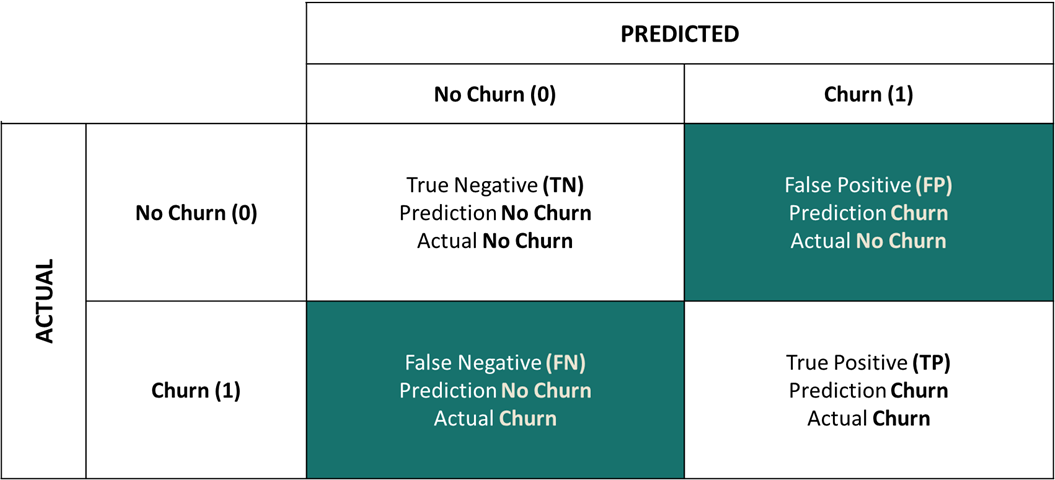

**Type 1 error**: False Negative
<br>Consequence: Karena diprediksi No Churn namun Aktual pelanggan mengalami Churn maka perusahaan akan kehilangan potensi keuntungan tambahan dari pelanggan yang berhenti menggunakan atau bertransaksi di e-commerce. Pelanggan ini tidak ditargetkan dengan upaya retensi, yang mengarah ke kemungkinan yang lebih tinggi untuk meninggalkan layanan kami (aplikasi), yang secara langsung berdampak pada pendapatan. Untuk mendapatkan pelanggan baru, diperlukan biaya yang juga menimbulkan biaya.

**Type 2 error**: False Positive
<br>Consequence: Karena diprediksi Churn namun Aktual pelanggan mengalami No Churn perusahaan akan mengalami pemborosan biaya karena memberikan treatment ekstra (treatment Churn) pada pelanggan yang No Churn. Perusahaan mungkin mengalokasikan sumber daya retensi (diskon, kupon) untuk pelanggan ini yang sebenarnya tidak diperlukan. Hal ini dapat menyebabkan peningkatan biaya tanpa manfaat yang sebenarnya.

Metrics Evaluasi Model: [Referensi](https://www.kdnuggets.com/2020/04/performance-evaluation-metrics-classification.html)
* Presisi (Precision) merupakan metrics yang digunakan untuk mengukur ada berapa banyak hasil prediksi suatu kelas yang memang sesuai dengan kenyataan. Kata kunci yang sangat tepat untuk menggambarkan presisi adalah exactness.
* Recall merupakan metrics pada metode klasifikasi yang menyatakan seberapa besar persentase kejadian pada kelas positif yang berhasil dideteksi. Kata kunci yang paling tepat menggambarkan recall adalah completeness.
* F1 score adalah rataan harmonik dari presisi dan recall. Ketika kita gunakan F1-score dalam pemilihan model machine learning, F1-score dapat menjaga agar model yang kita pilih memiliki nilai recall dan presisi yang seimbang.
Accuracy adalah salah satu metrik evaluasi yang umum digunakan dalam machine learning untuk mengukur sejauh mana model klasifikasi mampu memprediksi dengan benar kelas atau label dari data uji. Secara sederhana, akurasi mengukur persentase prediksi yang benar dari total jumlah prediksi.

<br>Berdasarkan confusion matrix diatas dan melihat konsekuensinya, maka model yang dibangun akan berfokus pada type error 1 (False Negative) atau nilai recall. Karena type error 1 (False Negative) akan berdampak besar pada revenue perusahaan dibandingkan type error 2 (False Positif).

<br> Walaupun model yang dibangun akan berfokus pada nilai recall namun untuk kasus churn customer, model akan tetap memperhatikan nilai precision, karena 2 nilai tersebut memiliki dampak terhadap perusahaan. Maka model akan dibangun dengan performa yang seimbang antara false negatives (recall) dan false positives (precision).

#### **Analisis cost mengenai False Positive (FP) & False Negative (FN)**
Berdasarkan pemilihan metrics evaluation yang menjadi fokus dalam pengembangan ML serta keselarasan pengembangan ML dengan masalah dan tujuan yang ingin dicapai, berikut adalah perhitungan biaya kerugian berdasarkan False Positive (FP) dan False Negative (FN) yang akan menjadi bahan evaluasi. Kita perlu menentukan `Customer Spending per Month` (CSPM), `Customer Acquisition Cost` (CAC), dan `Customer Retention Cost` (CRC).

- Menurut [yaguara.co](https://www.yaguara.co/online-shopping-statistics/), pembeli online di Amerika Serikat menghabiskan rata-rata \$5381/tahun atau `$448.4167/bulan` pada tahun 2023. Nilai ini akan menjadi CSPM.
- Menurut [semrush.com](https://www.semrush.com/blog/customer-retention-stats/), untuk menarik 1 customer baru, perusahaan perlu dana sebesar `$29/customer`. Nilai ini akan bertindak sebagai `CAC`.
- Kemudian, misalkan kita memberikan `diskon 5%` untuk customer yang diprediksi akan churn. Artinya \$448.667*0.05 = `$22.433/customer`

**Define Variables**
- CSPM = $448.4167

- CAC = $29 per Customer

- CRC = $22.433 per Customer

- FN = 10

- FP = 10

Loss Cost FN    = 10 * CSPM
                = 10 * $448.4167
                = $4.484.167
Hilangnya pendapatan langsung setara dengan CSPM

Loss Cost FP    = 10 * CRC
                = 10 * $22.433
                = $224.33
Hanya menambahkan biaya retensi jauh lebih rendah dibandingkan loss cost FN

<br>Kerugian dari False Negative (FN) jauh lebih besar dibandingkan dengan False Positive (FP). Oleh karena itu, model prediksi yang fokus pada meminimalkan Type Error 1 (False Negative) atau yang memiliki nilai recall tinggi lebih menguntungkan untuk revenue perusahaan. Hal ini karena kehilangan pelanggan yang bisa dihindari dengan insentif retensi akan berdampak signifikan pada pendapatan perusahaan dibandingkan dengan memberikan insentif yang tidak diperlukan.

# **Data**
Ini adalah dataset dari perusahaan ecommerce terkemuka dan kami akan menganalisis siapa saja yang melakukan churn (meninggalkan layanan perusahaan). Serta membuat model untuk memprediksi churn sesuai dengan hasil analisis.


In [867]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [868]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ECommerce_Dataset.xlsx')
display(df.head(),df.tail())

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
5625             30.0          Credit Card   Male             3.0   
5626             13.0          Credit Card   Male             3.0   
5627             11.0           Debit Card   Male             3.0   
5628              9.0          Credit Card   Male             4.0   
5629             15.0          Credit Card   Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0                NaN          224.91  
5627         1.0         2.0                4.0          186.42  
5628         2.0         2.0                9.0          178.90  
5629         2.0         2.0                3.0          169.04

# **Data Understanding**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Dataset yang dianalisis berisi merupakan dataset perusahaan e-commerce ternama. Secara deskriptif, dataset ini terdiri dari 5,630 baris dan 20 atribut yang mendetailkan informasi dari pelanggan tersebut seperti `CustomerID`, `Gender`, `Tenure`, `OrderCount`, dan lain-lain. Masing-masing data point memiliki nilai `Churn`, di mana nilai 1 mengindikasikan pelanggan berhenti menggunakan *e-commerce* tersebut, dan nilai 0 mengindikasikan sebaliknya. Alhasil, churn pelanggan menjadi metriks yang sangat penting bagi sebuah bisnis untuk berkembang secara kuantitas dan kualitas.

| No | Variable | Data Type | Description |
| --- | --- | --- | --- |
| 1 | `CustomerID` | Integer | ID unik pelanggan |
| 2 | `Churn` | Integer | Indikasi churn (1: churn (berhenti menggunakan e-commerce), 0: tidak churn) |
| 3 | `Tenure` | Float | Jumlah bulan pelanggan telah menjadi pelanggan di perusahaan |
| 4 | `PreferredLoginDevice` | Object | Perangkat yang digunakan user untuk login |
| 5 | `CityTier` | Integer | Tier kota pelanggan |
| 6 | `WarehouseToHome` | Float | Jarak dari rumah ke gudang |
| 7 | `PreferredPaymentMode ` | Object | Metode pembayaran yang lebih disukai oleh user |
| 8 | `Gender` | Object | Jenis kelamin pelanggan  |
| 9 | `HourSpendOnApp` | Float | Waktu yang dihabiskan oleh user dalam menggunakan aplikasi/website |
| 10 | `NumberOfDeviceRegistered` | Integer | Jumlah perangkat yang digunakan oleh pengguna untuk log in |
| 11 | `PreferedOrderCat` | Object | Kategori barang yang lebih disukai oleh user dalam satu bulan terakhir |
| 12 | `SatisfactionScore` | Integer | Nilai kepuasan user terhadap pelayanan pelanggan |
| 13 | `MaritalStatus` | Object | Status pernikahan user |
| 14 | `NumberOfAddress ` | Integer | Jumlah alamat yang ditambahkan oleh user |
| 15 | `Complain` | Integer | Indikasi komplain dalam sebulan terakhir (1 jika ada komplain, 0 jika tidak ada komplain) |
| 16 | `OrderAmountHikeFromlastYear` | Float | Persentase kenaikan order dari tahun lalu|
| 17 | `CouponUsed` | Float | Jumlah kupon yang telah digunakan dalam sebulan terakhir |
| 18 | `OrderCount` | Float | Jumlah order yang dipesan selama sebulan terakhir |
| 19 | `DaySinceLastOrder` | Float | Berapa hari sejak user terakhir membuat pesanan |
| 20 | `CashbackAmount` | Float | Rata-rata cashback yang diterima selama sebulan terakhir |

In [869]:
print('Jumlah baris dan kolom dalam dataset: ', df.shape)

Jumlah baris dan kolom dalam dataset:  (5630, 20)


In [870]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['Variable', 'Data Type', 'Number of Nulls', 'Null Percentage', 'Number of Unique Data', 'UniqueSample'],
                     data=listItem)
dfDesc

Variable Data Type  Number of Nulls  Null Percentage  \
0                    CustomerID     int64                0             0.00   
1                         Churn     int64                0             0.00   
2                        Tenure   float64              264             4.69   
3          PreferredLoginDevice    object                0             0.00   
4                      CityTier     int64                0             0.00   
5               WarehouseToHome   float64              251             4.46   
6          PreferredPaymentMode    object                0             0.00   
7                        Gender    object                0             0.00   
8                HourSpendOnApp   float64              255             4.53   
9      NumberOfDeviceRegistered     int64                0             0.00   
10             PreferedOrderCat    object                0             0.00   
11            SatisfactionScore     int64                0             0.00   
12                MaritalStatus    object                0             0.00   
13              NumberOfAddress     int64                0             0.00   
14                     Complain     int64                0             0.00   
15  OrderAmountHikeFromlastYear   float64              265             4.71   
16                   CouponUsed   float64              256             4.55   
17                   OrderCount   float64              258             4.58   
18            DaySinceLastOrder   float64              307             5.45   
19               CashbackAmount   float64                0             0.00   

    Number of Unique Data  \
0                    5630   
1                       2   
2                      36   
3                       3   
4                       3   
5                      34   
6                       7   
7                       2   
8                       6   
9                       6   
10                      6   
11                      5   
12                      3   
13                     15   
14                      2   
15                     16   
16                     17   
17                     16   
18                     22   
19                   2586   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           UniqueSample  
0                                                                                                                                                                                                                                                                                                                     [50001, 50002, 50003, 50004, 50005, 50006, 50007, 50008, 50009, 50010, 50011, 50012, 50013, 50014, 50015, 50016, 50017, 50018, 50019, 50020, 50021, 50022, 50023, 50024, 50025, 50026, 50027, 50028, 50029, 50030, 50031, 50032, 50033, 50034, 50035, 50036, 50037, 50038, 50039, 50040, 50041, 50042, 50043, 50044, 50045, 50046, 50047, 50048, 50049, 50050, 50051, 50052, 50053, 50054, 50055, 50056, 50057, 50058, 50059, 50060, 5006

Secara umum, kita bisa melihat bahwa:
* Dataset tersebut terdiri dari 20 kolom dari 5,630 baris.
* Kolom `CustomerID` tidak relevan bagi analisis karena hanya bertindak sebagai pembeda user satu dengan yang lainnya. Maka dari itu, kita akan menghapus kolom tersebut.
* Variabel `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder` memiliki missing value yang berkisar dari 4 hingga 5 persen. Maka dari itu, kita perlu menangani masalah tersebut sekaligus menghindari hilangnya informasi penting dengan melihat nilai dari variabel lain yang berkaitan.
* Pada dataset tersebut, terdapat data dengan `Tenure` = 0. Pada tahap data cleaning, kita akan melihat apakah hal ini merupakan sebuah anomali atau bukan.
* Terdapat typo pada nama variabel `PreferedOrderCat`. Kita akan menggantinya menjadi `PreferredOrderCat`. Nama variabel/kolom lain dalam dataset tersebut cukup jelas sehingga tidak perlu diganti.
* `SatisfactionScore` dan `CityTier` merupakan data kategorik dengan skala ordinal.
* Terdapat beberapa data kategorik yang memiliki skala nominal, yaitu `PreferredLoginDevice`, `PreferredPaymentMode`, `PreferedOrderCat`, dan `MaritalStatus`.
* Pada `PreferredLoginDevice` terdapat 3 nilai unik yaitu `Phone`, `Mobile Phone`, dan 'Laptop'. Nilai `Phone` dan `Mobile Phone` bersifat redundan, maka dari itu `Phone` akan diganti menjadi `Mobile Phone` sehingga hanya ada 2 nilai unik pada variabel `PreferredLoginDevice`.
* Pada `PreferredPaymentMode` terdapat beberapa nilai unik yang memiliki makna yang sama, yaitu `CC` dan `Credit Card` serta `COD` dan `Cash on Delivery`. Kita perlu mengganti salah satu nilai tersebut sehingga hanya akan ada 5 nilai unik dalam variabel tersebut.
* Pada `PreferredOrderCat` terdapat nilai `Phone` dan `Mobile Phone` yang bersifat redundan namun memiliki makna yang sama. Jadi kita perlu mengganti `Phone` menjadi `Mobile Phone`.




# **Exploratory Data Analysis**

## Numerical Variables

### Numeric Descriptive Statistic

In [871]:
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

Statistik deskriptif hanya menghasilkan perhitungan dari kolom number. Berikut insight dari statistik deskriptif untuk dataframe e-commerce customer churn, sebagai berikut:
* `count` : Jumlah baris (jumlah data) pada setiap kolom. Dilihat total data keseluruhan yaitu `5630`. Kolom-kolom yang count kurang dari `5630` dikarenakan memiliki `missing value`.
* `mean` : Rata-rata pada setiap kolom. Sebagai contoh `mean` pada kolom `CashbackAmount` yaitu `177.223030`. Yang berarti rata-rata `CashbackAmount` setiap customer sekitaran `177.223030`.
* `std` : Standard Deviasi / selisih setiap data dengan nilai rata-rata (mean). `std` yang tinggi menunjukkan bahwa data sangat bervariasi atau tersebar luas, sementara nilai `std` yang rendah menunjukkan bahwa data cenderung berkumpul lebih dekat dengan mean. Dalam data ini, `std` `CashbackAmount` adalah `49.207036`, yang menunjukkan bahwa data `CashbackAmount` cenderung memiliki variasi atau tersebar luas yang signifikan di sekitar rata-ratanya.
* `min` : Nilai paling kecil dari sekumpulan data variable. Dari hasil diatas, terdapat nilai yang menarik yaitu `Tenure` sebesar `0`. Hal ini menarik karena `Tenure` bernilai `0`. Bisa jadi angka `0` itu sebagai anomali.
* `25%` : Persentil yang ke-25 atau 25 persen (Q1).
* `50%` : Persentil yang ke-50 atau 50 persen (Q2) = nilai median. Nilai median dapat digunakan sebagai salah satu cara untuk menangani missing value ketika variable  terdistribusi tidak normal.
* `75%` : Persentil yang ke-75 atau 75 persen (Q3).
* `max` : Nilai paling besar dari sekumpulan data variable. Dari hasil diatas, terlihat kolom `Tenure` memiliki nilai `max` yaitu `61`. Menjelaskan bahwa ada customer yang telah berlangganan selama 5thn.

### Numerical Data Distribution (Barplot & Histograms)

**Variable Diskrit**
- `Tenure`
- `NumberOfDeviceRegistered`
- `NumberOfAddress`
- `CouponUsed`
- `OrderCount`
- `DaySinceLastOrder`

**Variable Kontinu**
- `WarehouseToHome`
- `HourSpendOnApp`
- `OrderAmountHikeFromlastYear`
- `CashbackAmount`



In [872]:
numeric = df[['Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CashbackAmount', 'NumberOfDeviceRegistered',
              'NumberOfAddress', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']]
discrete_vars = ['Tenure', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
continuous_vars = ['WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CashbackAmount']

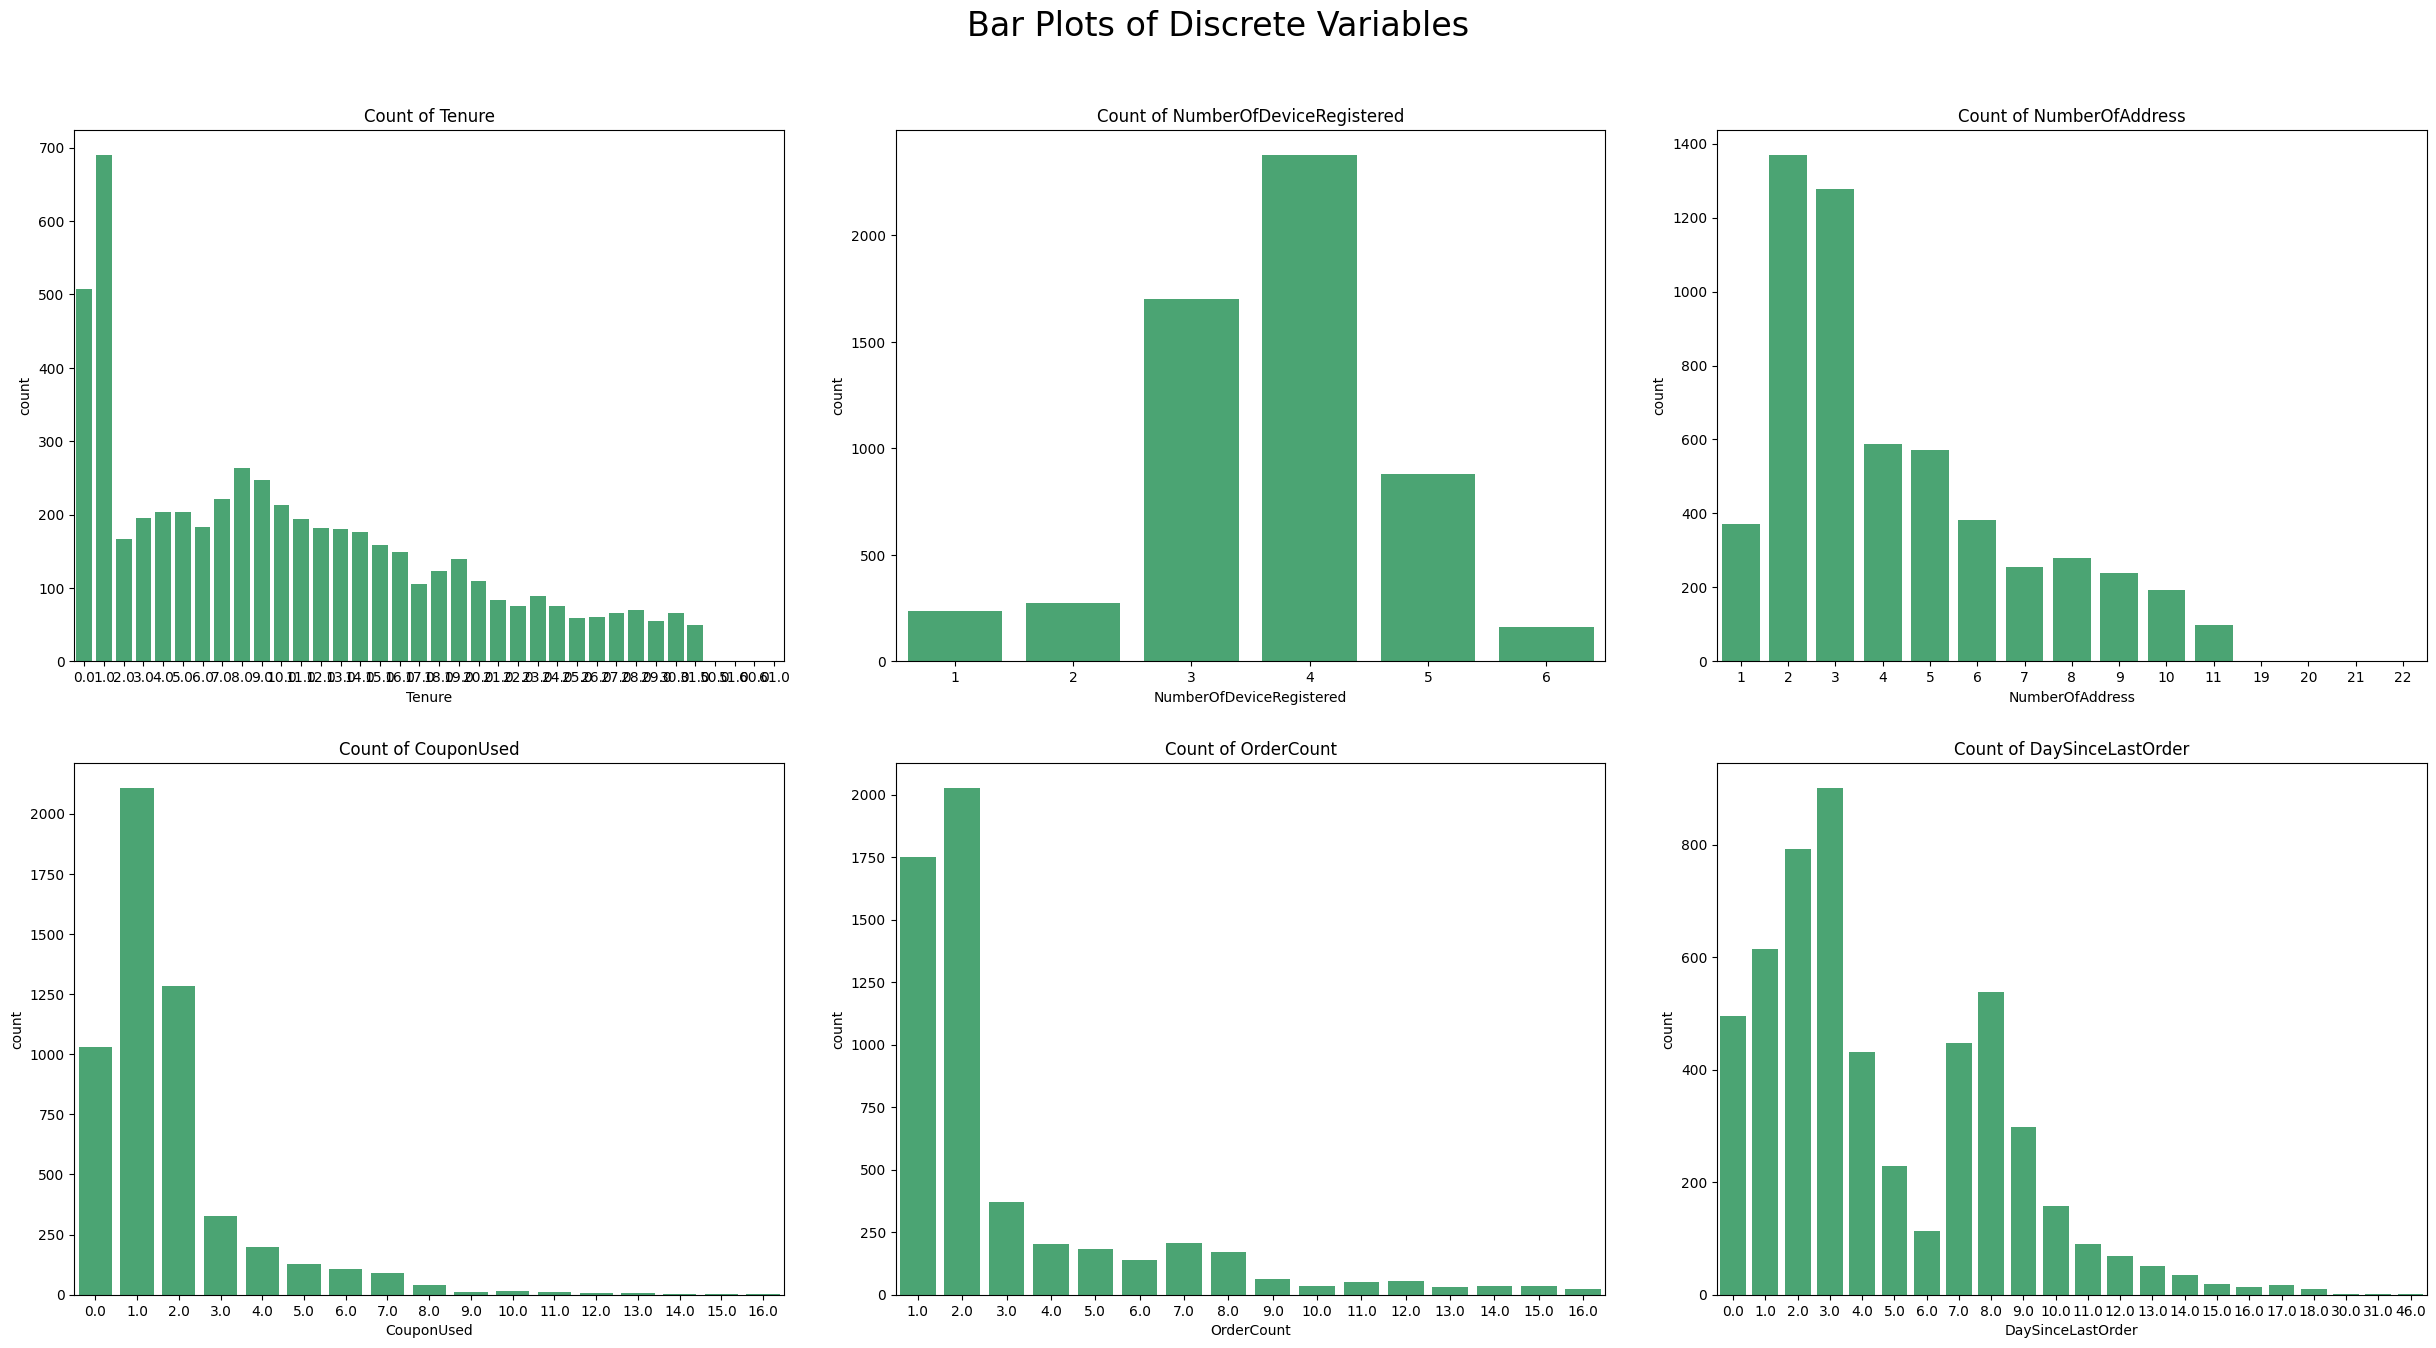

In [873]:
fig = plt.figure(figsize=(25, 20))
posisi = 1

for kolom in discrete_vars:

  plt.subplot(3, 3, posisi)
  sns.countplot(x=numeric[kolom], color='mediumseagreen')
  plt.title(f'Count of {kolom}')
  fig.tight_layout(pad=3.0)
  posisi += 1

fig.suptitle('Bar Plots of Discrete Variables', fontsize=24)
fig.subplots_adjust(top=0.92)

plt.show()


Insight Barplot Variabel Diskrit Numerik:
- `Tenure` : Distribusi data cenderung right skewed, dengan mayoritas pelanggan memiliki masa berlangganan antara `0 hingga 20 bulan`. Ada beberapa pelanggan yang memiliki masa berlangganan lebih dari 20 tahun, tetapi jumlahnya sangat sedikit. Ini menunjukkan bahwa kebanyakan pelanggan adalah pengguna baru.
- `NumberOfDeviceRegistered` : Mayoritas pelanggan yang mendaftarkan perangkatnya sebanyak `3 atau 4` perangkat. Hal ini menunjukkan bahwa rata-rata penggunaan perangkat sekitar 3 - 4 dan sedikit sekali pelanggan yang menggunakan perangkat lebih dari 5.
- `NumberOfAddress` : Sebagian besar pelanggan memiliki `1 atau 2` alamat yang terdaftar di e-commerce.
- `CouponUsed` : Mayoritas penggunaan kupon sebanyak `1 atau 2`, namun ternyata cukup banyak juga pelanggan yang tidak menggunakan kupon, hal ini menunjukkan mungkin penggunaan kupon tidak terlalu umum untuk semua pelanggan/ hanya diberikan pada waktu tertentu saja.  
- `OrderCount` : Sebagian besar pelanggan melakukan `1 atau 2` pesanan. Jumlah pelanggan yang melakukan lebih dari 2 pesanan menurun drastis. Hal ini menunjukkan bahwa banyak pelanggan mungkin hanya mencoba layanan sekali atau dua kali dan tidak menjadi pelanggan tetap.  
- `DaySinceLastOrder` : Sebagian besar pelanggan baru saja melakukan pesanan dalam `1 hingga 5` hari terakhir. Jumlah pelanggan menurun seiring bertambahnya hari sejak pesanan terakhir. Ini menunjukkan bahwa banyak pelanggan cenderung melakukan pesanan baru dalam waktu singkat setelah pesanan terakhir mereka, tetapi ada juga sejumlah kecil pelanggan yang mungkin sudah lama tidak melakukan pesanan.

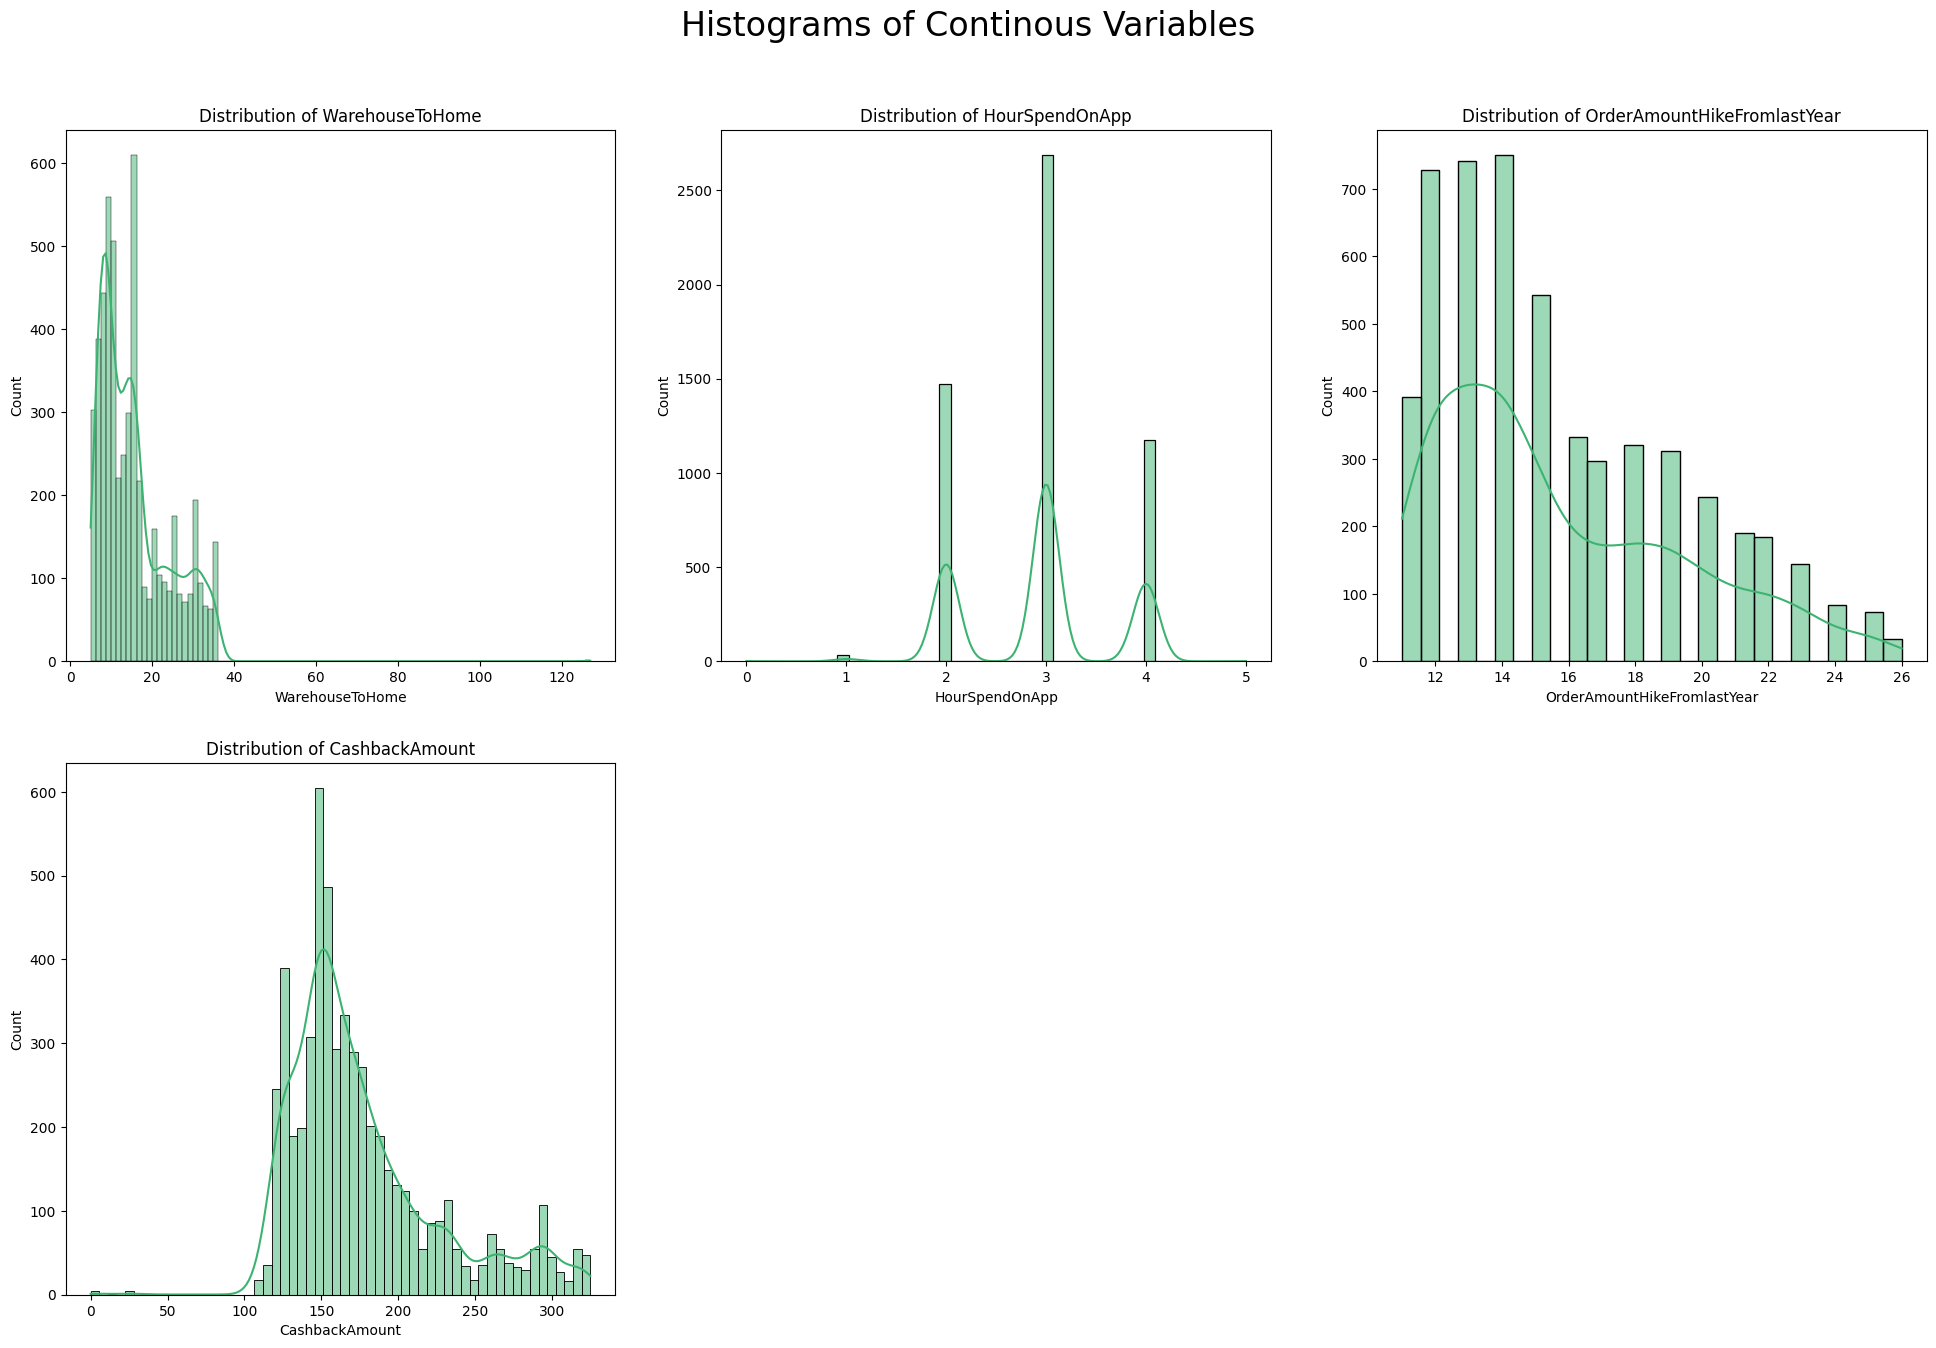

In [874]:
fig = plt.figure(figsize=(20, 20))
posisi = 1

for kolom in continuous_vars:
    plt.subplot(3, 3, posisi)
    sns.histplot(x=numeric[kolom], kde = True, color='mediumseagreen')
    plt.title(f'Distribution of {kolom}')
    fig.tight_layout(pad=3.0)
    posisi += 1

fig.suptitle('Histograms of Continous Variables', fontsize=24)
fig.subplots_adjust(top=0.92)

plt.show()

Insight Histogram Variabel Kontinu Numerik:

- `WarehouseToHome` : Distribusi data cenderung right skewed, dengan sebagian besar pelanggan memiliki jarak pengiriman yang dekat, antara `0 hingga 20 unit jarak`. Beberapa pelanggan memiliki jarak pengiriman yang jauh, tetapi jumlah mereka sangat sedikit. Hal ini menunjukkan bahwa mayoritas pengiriman dilakukan dalam jarak yang relatif dekat dari gudang.
- `HourSpendOnApp` : Distribusi data menunjukkan pola multimodal, dengan puncak di sekitar `1, 3, dan 4 jam`. Ini menunjukkan bahwa ada beberapa kelompok pelanggan yang menghabiskan waktu yang berbeda-beda di aplikasi, dengan beberapa kelompok yang cukup signifikan menghabiskan waktu sekitar 3 dan 4 jam.
- `OrderAmountHikeFromlastYear` : Data memiliki distribusi yang miring ke kanan, dengan mayoritas kenaikan jumlah pesanan berada di sekitar `12 hingga 18 persen`. Ada beberapa pelanggan yang mengalami kenaikan lebih dari 20 persen, tetapi jumlah mereka sangat sedikit.
- `CashbackAmount` : Distribusi data cenderung miring ke kanan, dengan sebagian besar jumlah cashback berada di sekitar `100 hingga 150`. Ada beberapa pelanggan yang menerima cashback kurang dari 100 dan lebih dari 250, tetapi jumlah mereka sangat sedikit.


### Outliers and Distribution Check (Boxplot)

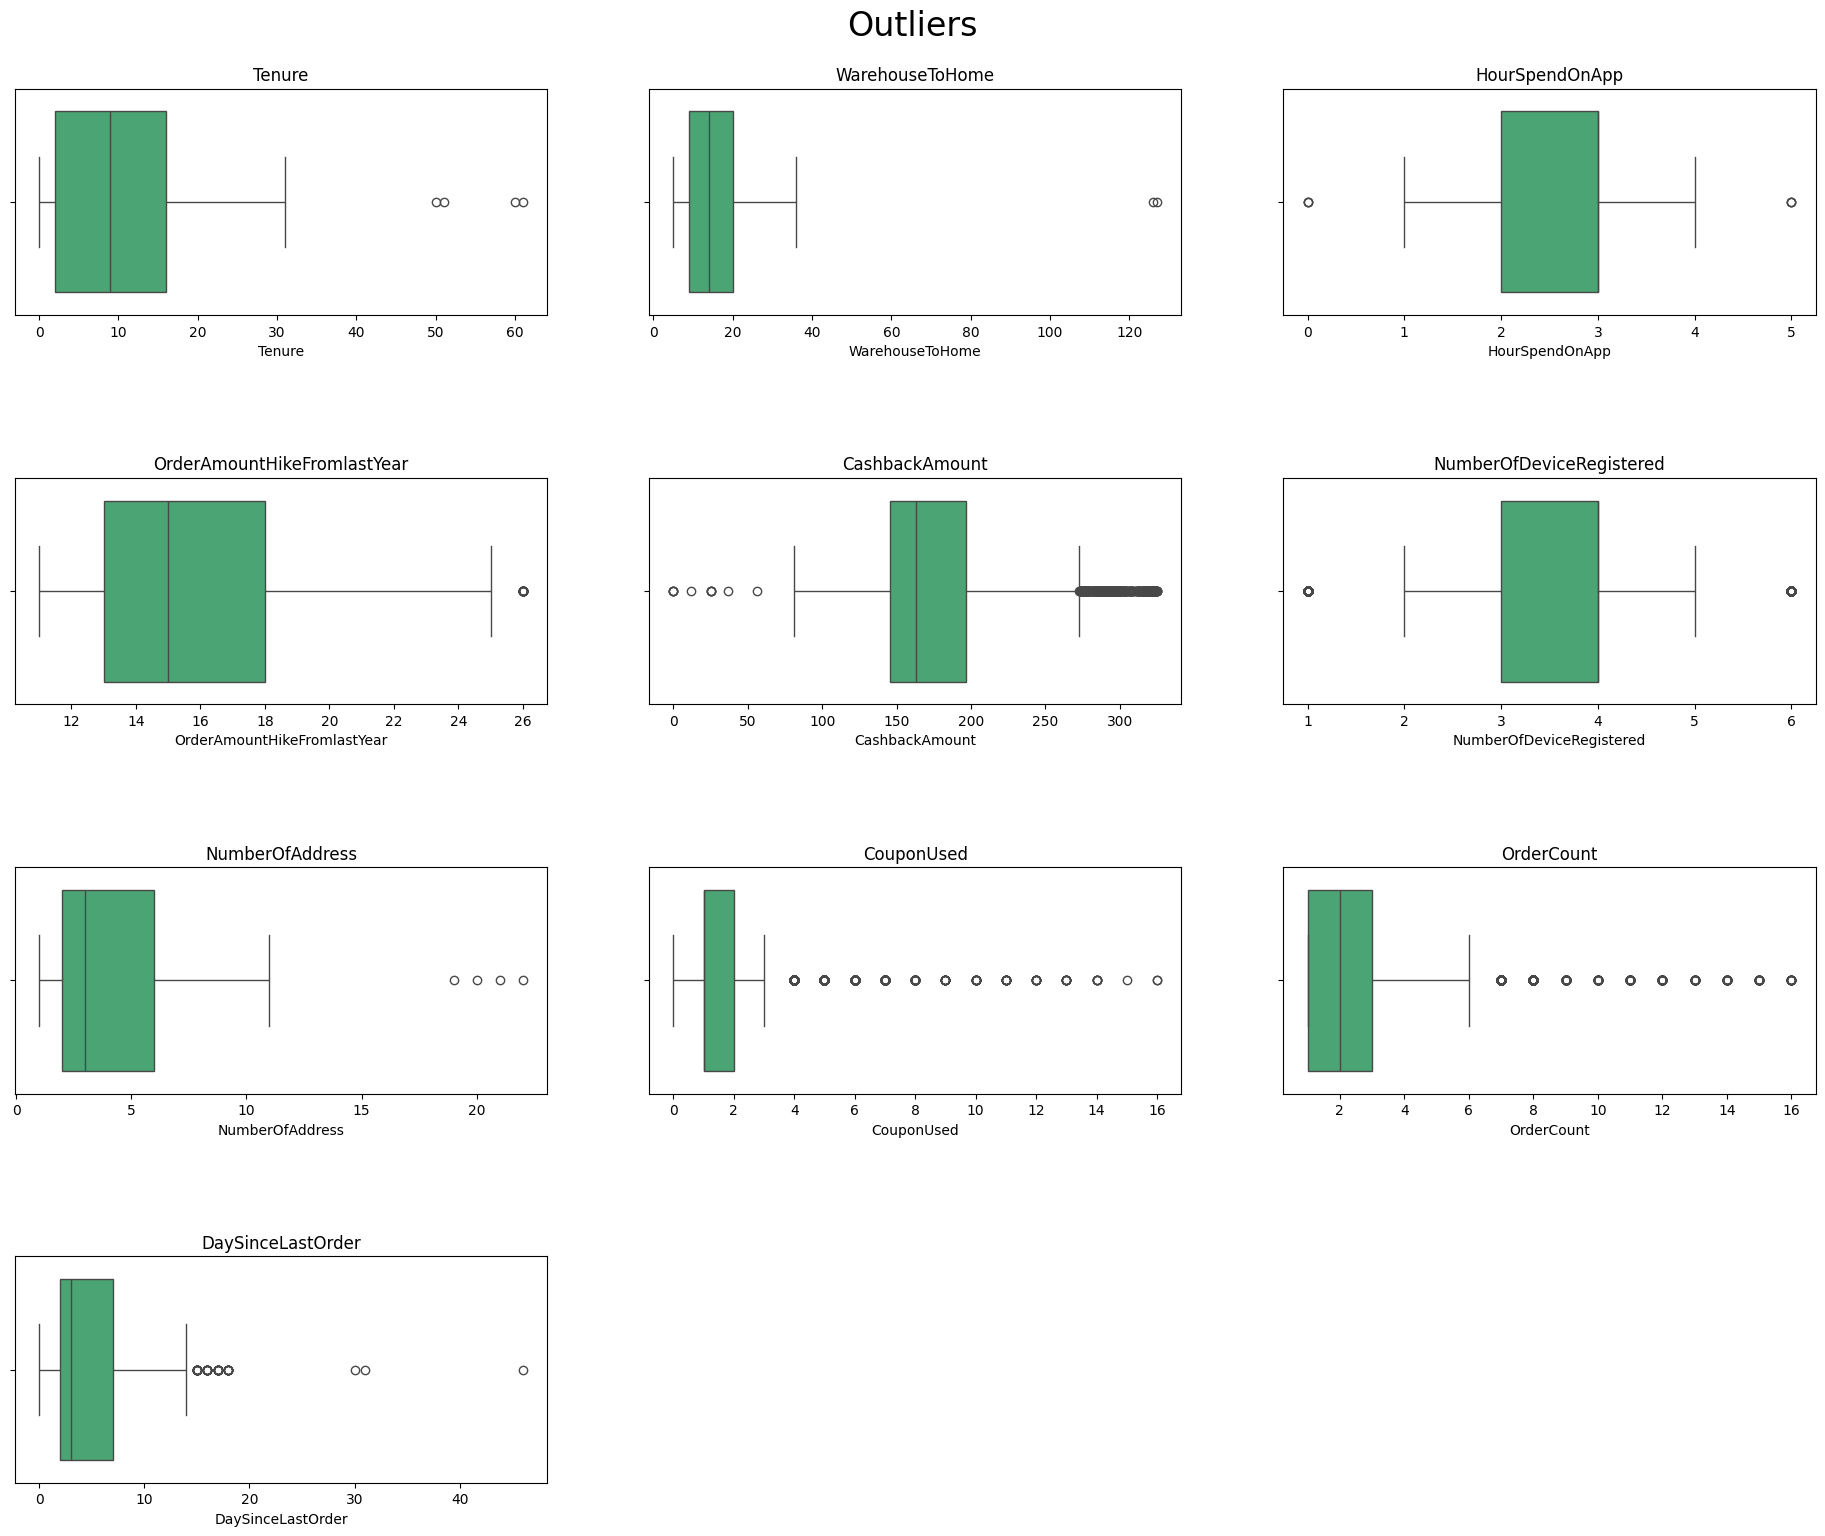

In [875]:
fig = plt.figure(figsize=(20,20))

count = 0
for kolom in numeric.columns:
    if kolom != 'Churn':
      count += 1
      plt.subplot(5,3,count)
      sns.boxplot(numeric, x = kolom, color='mediumseagreen')
      fig.tight_layout(pad=7.0)
      plt.title(f'{kolom}')

fig.suptitle('Outliers', fontsize=24)
plt.show()

In [876]:
def check_outliers(df, kolom):
  for kolom in numeric.columns:
      if kolom != 'Churn':
        q1 = df[kolom].describe().loc['25%']
        q3 = df[kolom].describe().loc['75%']
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
        print(f"data {kolom} memiliki outliers {jumlah_outliers}")

check_outliers(numeric, numeric.columns)

data Tenure memiliki outliers 4
data WarehouseToHome memiliki outliers 2
data HourSpendOnApp memiliki outliers 6
data OrderAmountHikeFromlastYear memiliki outliers 33
data CashbackAmount memiliki outliers 438
data NumberOfDeviceRegistered memiliki outliers 397
data NumberOfAddress memiliki outliers 4
data CouponUsed memiliki outliers 629
data OrderCount memiliki outliers 703
data DaySinceLastOrder memiliki outliers 62


Summary:

Adanya outliers pada setiap variabel menunjukkan adanya variasi yang signifikan dalam perilaku dan karakteristik pelanggan.
<br>Kebanyakan variabel menunjukkan distribusi yang terkonsentrasi dengan beberapa nilai ekstrim, seperti :
- `Tenure` terdapat nilai ekstrim bernilai `50 dan 60`;
- `WarehouseToHome` terdapat nilai ekstrim bernilai `lebih dari 120`;
- `HourSpendOnApp` terdapat nilai ekstrim bernilai `5`
- `OrderAmountHikeFromlastYear` terdapat nilai ekstrim bernilai `26` persen;
- `CashbackAmount` terdapat nilai ekstrim bernilai `lebih dari 250`;
- `NumberOfDeviceRegistered` terdapat nilai ekstrim bernilai `6`;
- `NumberOfAddress` terdapat nilai ekstrim bernilai `sekitar 20`;
- `CouponUsed ` terdapat nilai ekstrim bernilai `16`;
- `OrderCount ` terdapat nilai ekstrim bernilai  `16`;
- `DaySinceLastOrder` terdapat nilai ekstrim bernilai `lebih dari 40`

Memenandakan bahwa mayoritas pelanggan berada dalam kisaran tertentu dengan beberapa tanpa pengecualian yang signifikan dan  outliers masih relevan dan realistis jika dilakukan analisis.

### Normality Check
Jenis distribusi data sangat penting dalam analisis karena jika jenis uji yang digunakan salah, hasil analisis menjadi tidak valid.

In [877]:
numeric.isna().sum()

Churn                            0
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CashbackAmount                   0
NumberOfDeviceRegistered         0
NumberOfAddress                  0
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

In [878]:
numeric.dropna(inplace = True)
numeric.isna().sum()

Churn                          0
Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
OrderAmountHikeFromlastYear    0
CashbackAmount                 0
NumberOfDeviceRegistered       0
NumberOfAddress                0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
dtype: int64

In [879]:
numeric.columns

Index(['Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear', 'CashbackAmount',
       'NumberOfDeviceRegistered', 'NumberOfAddress', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder'],
      dtype='object')

In [880]:
listpvalue = []
listStatusNormal = []
listKolom = ['Churn', 'Tenure', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
for i in listKolom :
    stat,pvalue=normaltest(numeric[i])
    if pvalue<=0.05:
        status = 'Distribusi Data Tidak Normal'
    else:
        status = 'Distribusi Data Normal'
    listpvalue.append(pvalue)
    listStatusNormal.append(status)

In [881]:
Normalitas = pd.DataFrame({
    'Column Name' : listKolom,
    'Pvalue' : listpvalue,
    'Status Normalitas' : listStatusNormal
})
Normalitas

Column Name         Pvalue             Status Normalitas
0                         Churn  1.145223e-233  Distribusi Data Tidak Normal
1                        Tenure   1.117514e-94  Distribusi Data Tidak Normal
2               WarehouseToHome   0.000000e+00  Distribusi Data Tidak Normal
3                HourSpendOnApp   1.445099e-43  Distribusi Data Tidak Normal
4      NumberOfDeviceRegistered   1.515943e-28  Distribusi Data Tidak Normal
5               NumberOfAddress  9.027550e-147  Distribusi Data Tidak Normal
6   OrderAmountHikeFromlastYear   6.527493e-73  Distribusi Data Tidak Normal
7                    CouponUsed   0.000000e+00  Distribusi Data Tidak Normal
8                    OrderCount   0.000000e+00  Distribusi Data Tidak Normal
9             DaySinceLastOrder  2.883593e-283  Distribusi Data Tidak Normal
10               CashbackAmount  1.634878e-240  Distribusi Data Tidak Normal

Uji normalitas data variabel numerik dilakukan dengan menggunakan normaltest. Dari hasil uji tersebut, kita simpulkan bahwa distribusi data tidak normal. Maka dariitu, kita akan menggunakan uji non-parametrik dalam melakukan data analysis.

### Correlation Check
Karena distribusi dari variabel numerik tidak normal, maka dari itu, kita akan menggunakan Spearman Correlation dalam melakukan analisis korelasi.

Guidance:

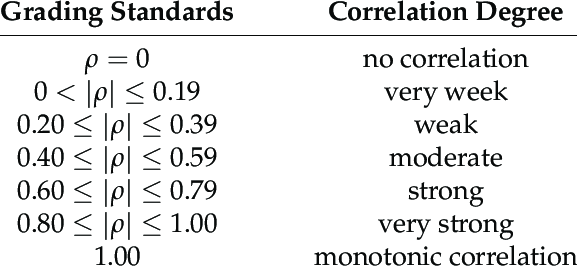

Reference:

Yan, Z., Wang, S., Ma, D., Liu, B., Lin, H., & Li, S. (2019). Meteorological factors affecting pan evaporation in the Haihe River Basin, China. Water, 11(2), 317.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'Churn'),
  Text(0, 1.5, 'Tenure'),
  Text(0, 2.5, 'WarehouseToHome'),
  Text(0, 3.5, 'HourSpendOnApp'),
  Text(0, 4.5, 'OrderAmountHikeFromlastYear'),
  Text(0, 5.5, 'CashbackAmount'),
  Text(0, 6.5, 'NumberOfDeviceRegistered'),
  Text(0, 7.5, 'NumberOfAddress'),
  Text(0, 8.5, 'CouponUsed'),
  Text(0, 9.5, 'OrderCount'),
  Text(0, 10.5, 'DaySinceLastOrder')])

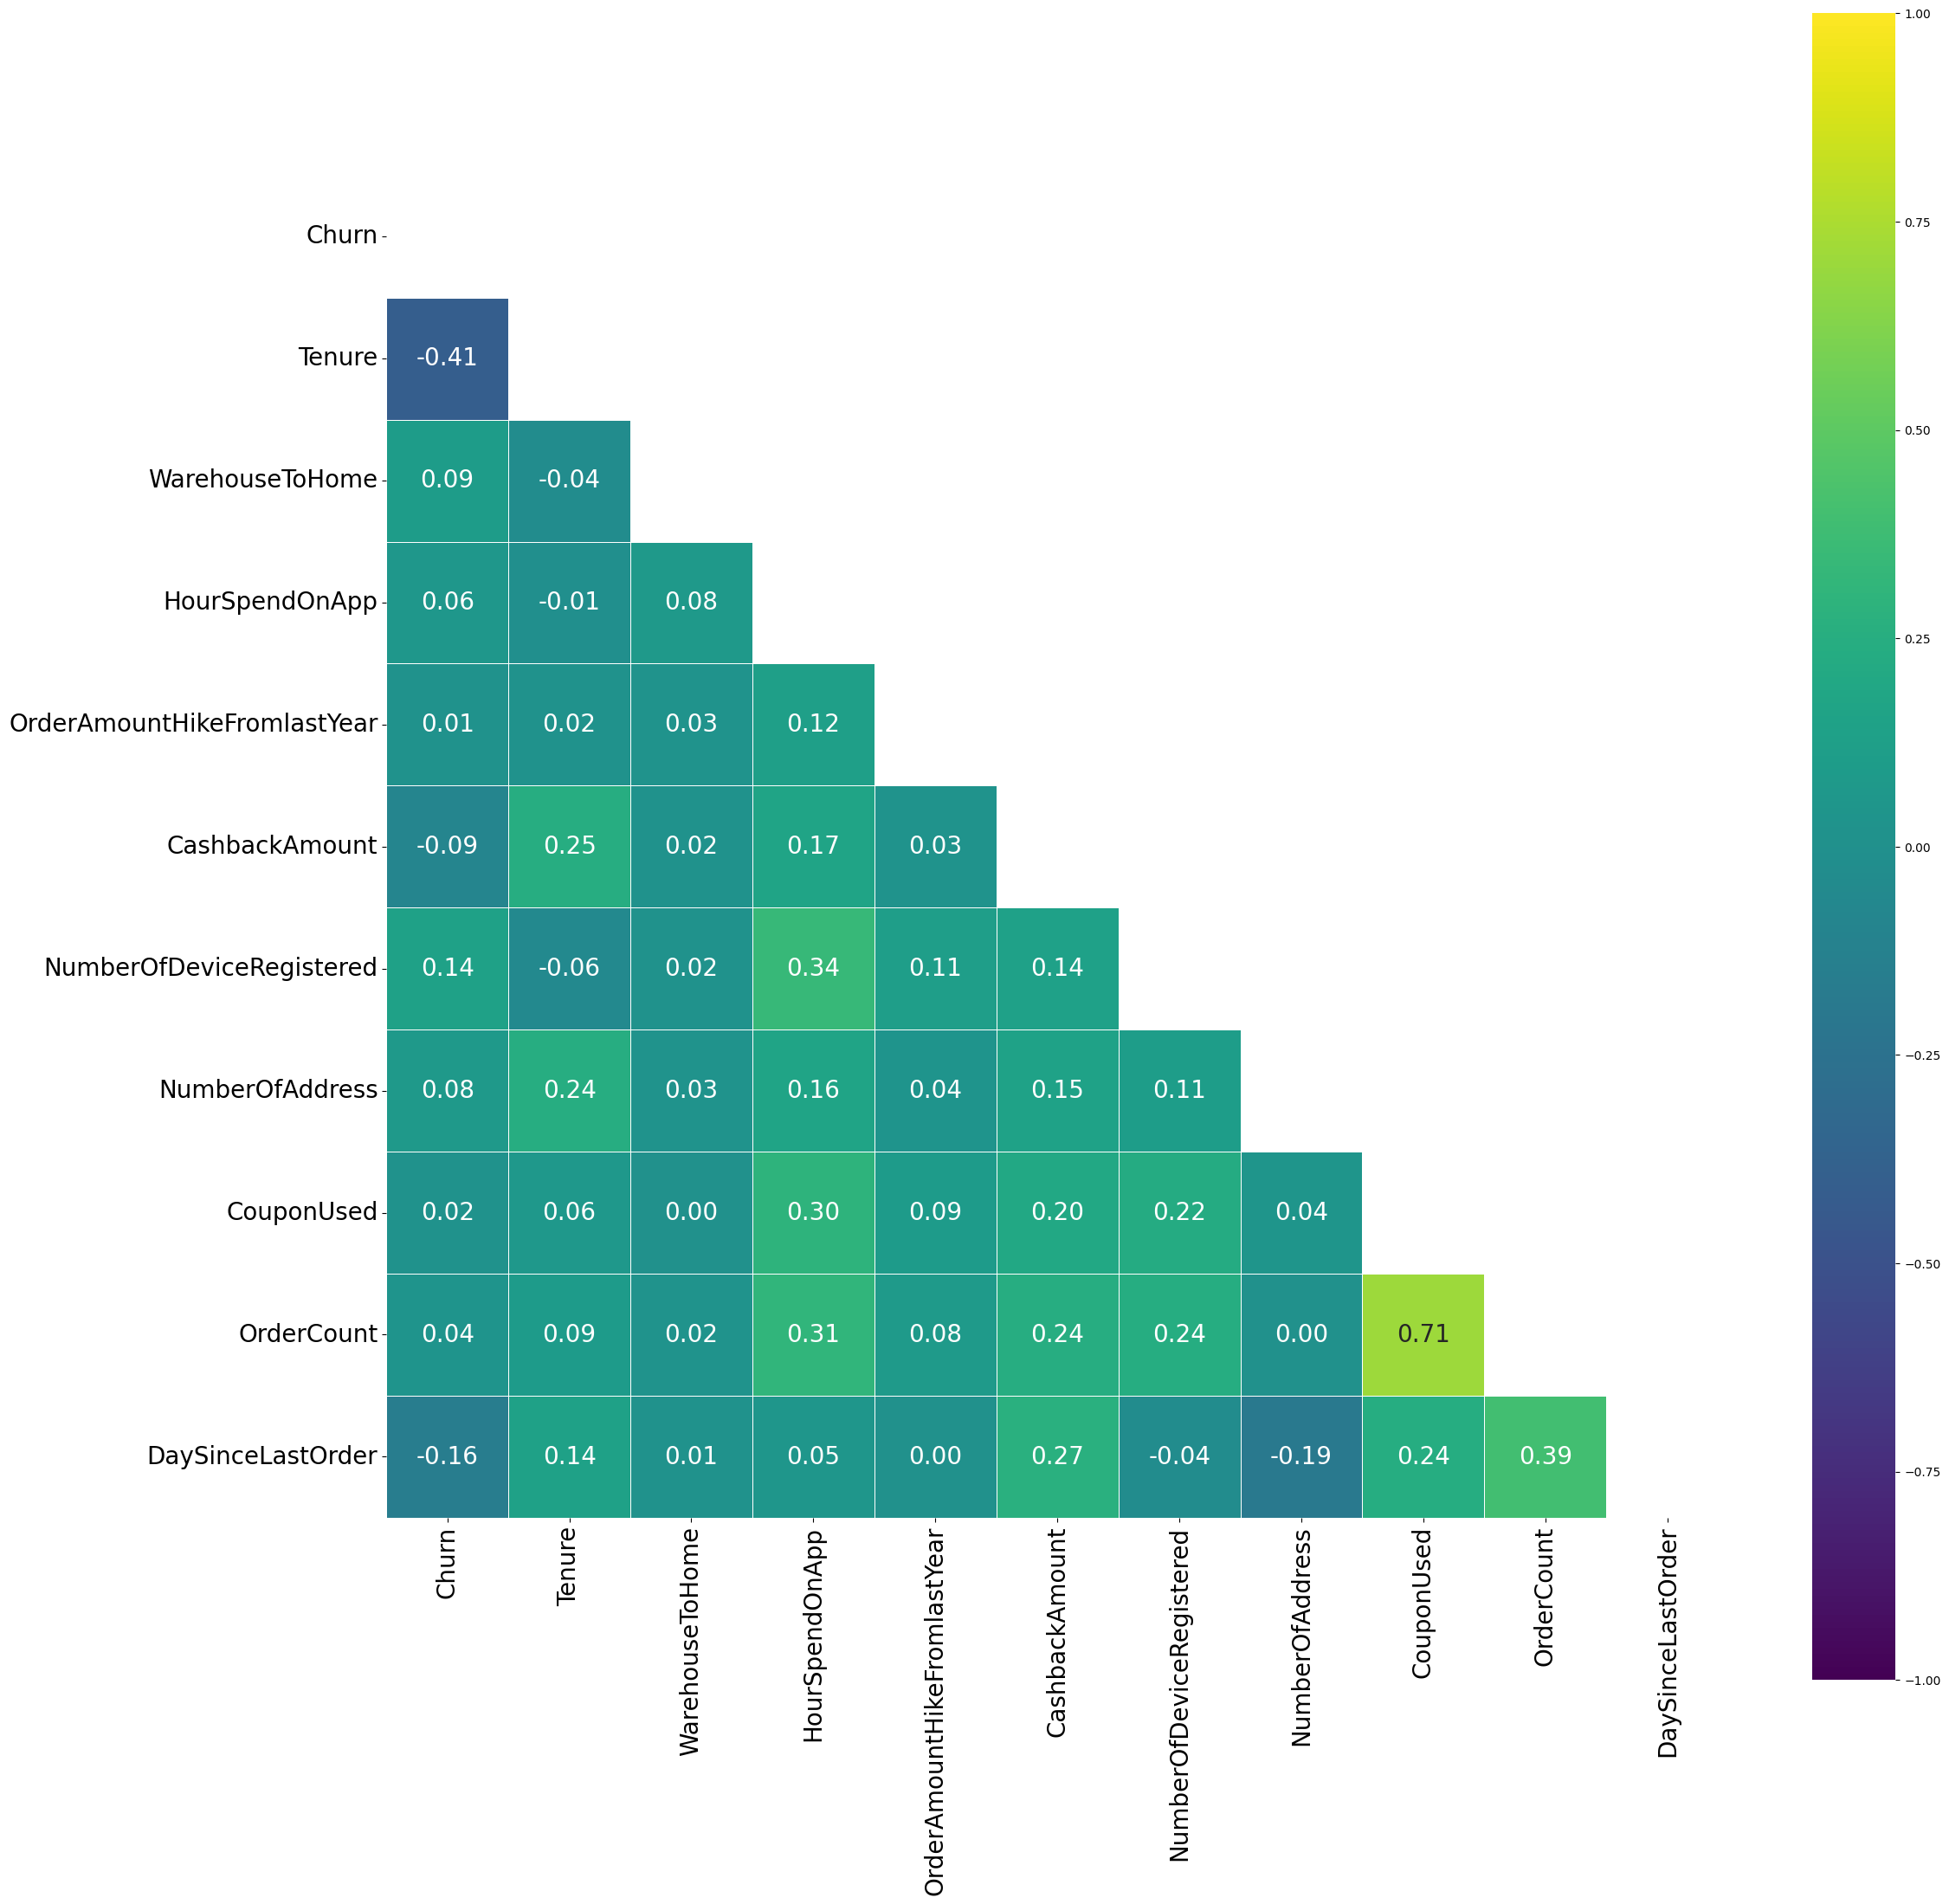

In [882]:
plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(numeric.corr(method = 'spearman'), dtype=bool))
sns.heatmap(numeric.corr(method = 'spearman'), annot = True, cmap = 'viridis',
            vmin = -1, vmax = 1, center = 0, fmt=".2f", square=True,
            linewidths=.5, mask = mask, annot_kws = {"size": 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

- Terdapat korelasi lemah positif antara `Tenure` dan `NumberOfAddress`. Artinya, semakin lama seseorang menjadi pelanggan, semakin banyak alamat yang ditambahkan.
- Terdapat korelasi lemah positif antara `Tenure` dan `CashbackAmount`. Artinya semakin lama seseorang menjadi pelanggan, semakin besar cashback yang didapatkan.
- Terdapat korelasi lemah positif antara variabel `OrderCount` dengan `NumberOfDeviceRegistered`. Artinya semakin banyak *order* yang dibuat dalam satu bulan terakhir, semakin banyak device yang dipakai user untuk log in.
- Terdapat korelasi lemah positif antara variabel `OrderCount` dengan `CashbackAmount`. Artinya, semakin banyak *order* yang dibuat selama satu bulan terakhir, semakin banyak cashback yang didapatkan.
- Terdapat korelasi lemah positif antara `HourSpendOnApp` dengan `CouponUsed` dan `OrderCount`. Artinya, semakin tinggi waktu yang user menggunakan aplikasi, semakin banyak *order* yang dibuat, semakin banyak pula kupon yang digunakan.
- Terdapat korelasi kuat positif antara `OrderCount` dengan `CouponUsed`. Artinya semakin banyak *order* yang dibuat dalam satu bulan terakhir, semakin banyak kupon yang digunakan.

### Correlation Variable Target (Binary) and Continuous Variable

Korelasi point biserial digunakan untuk mengukur hubungan antara variabel biner, x, dan variabel kontinu, y. Seperti koefisien korelasi lainnya, korelasi ini bervariasi antara -1 dan +1 dengan 0 yang menyiratkan tidak ada korelasi. Korelasi -1 atau +1 menyiratkan hubungan yang menentukan.

Note: data tidak boleh ada NaN/Missing Values

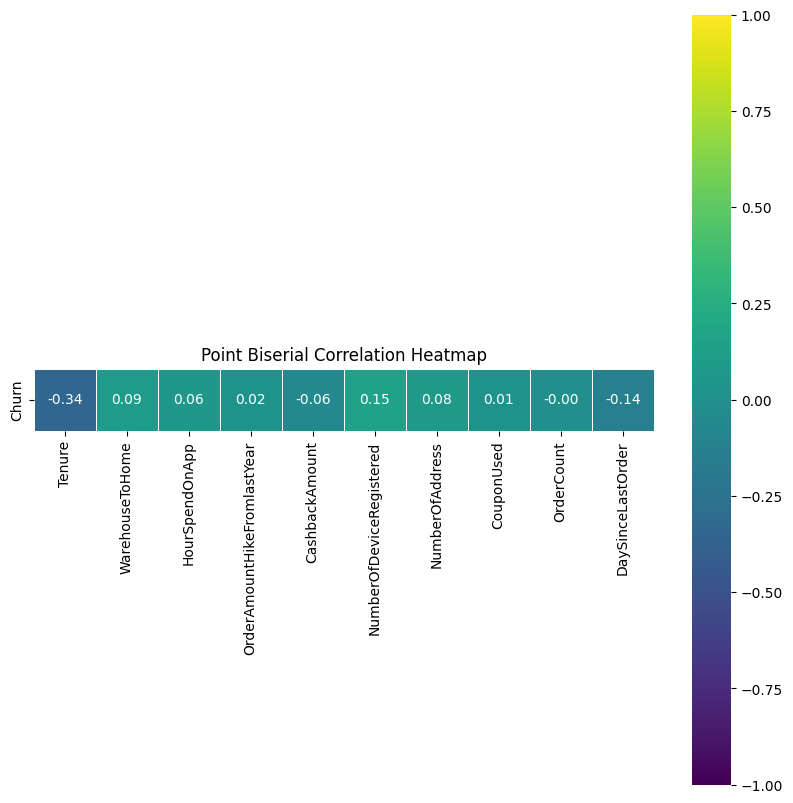

In [883]:
df_pbiserial = df.copy()
df_pbiserial.replace([np.inf, -np.inf], np.nan, inplace=True)
df_pbiserial.dropna(inplace=True)

target = ['Churn']
numeric = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CashbackAmount', 'NumberOfDeviceRegistered',
               'NumberOfAddress', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
correlation_matrix = pd.DataFrame(index=target, columns=numeric)

for t in target:
    for n in numeric:
        corr, _ = pointbiserialr(df_pbiserial[t], df_pbiserial[n])
        correlation_matrix.loc[t, n] = corr

correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0, fmt=".2f", square=True, linewidths=.5)
plt.title('Point Biserial Correlation Heatmap')
plt.show()

Interpretasi EDA dari Numerikal Variabel :
- `Churn` dan `Tenure` memiliki korelasi negatif sebesar `-0.34` masuk dalam kategori lemah. Korelasi negatif menunjukkan arah hubungan yang berlawanan antara dua variabel. Hal ini menunjukkan pelanggan yang telah menjadi anggota lebih lama cenderung memiliki kemungkinan yang lebih kecil untuk churn, yang merupakan temuan penting untuk strategi retensi pelanggan.
- `Churn` dan `WarehouseToHome` memiliki korelasi positif sebesar `0.09` masuk dalam kategori sangat lemah. Korelasi positif berarti nilai satu variabel meningkat, nilai variabel lainnya cenderung juga meningkat. Ada hubungan positif yang sangat lemah antara jarak dari gudang ke rumah dan churn. Semakin jauh jarak, sedikit lebih besar kemungkinan untuk churn, tetapi hubungan ini sangat lemah.
- `Churn` dan `HourSpendOnApp` memiliki korelasi positif sebesar `0.06` masuk dalam kategori sangat lemah.
- `Churn` dan `OrderAmountHikeFromLastYear` memiliki korelasi positif sebesar `0.02` masuk dalam kategori sangat lemah.
- `Churn` dan `CashbackAmount` memiliki korelasi negatif sebesar `-0.06` masuk dalam kategori sangat lemah.
- `Churn` dan `NumberOfDeviceRegistered` memiliki korelasi positif sebesar `0.15` masuk dalam kategori sangat lemah.
- `Churn` dan `NumberOfAddress` memiliki korelasi positif sebesar `0.08` masuk dalam kategori sangat lemah.
- `Churn` dan `CouponUsed` memiliki korelasi positif sebesar `0.01` masuk dalam kategori sangat lemah.
- `Churn` dan `OrderCount` memiliki korelasi sebesar `-0.00` masuk dalam kategori "no correlation" (tidak ada korelasi).Tidak ada hubungan yang signifikan antara jumlah pesanan dan churn.
- `Churn` dan `DaySinceLastOrder` memiliki korelasi negatif sebesar `-0.14` masuk dalam kategori sangat lemah.

 `Very Weak` berarti ada sedikit atau hampir tidak ada hubungan linear antara dua variabel. Perubahan pada satu variabel tidak secara konsisten diikuti oleh perubahan pada variabel lainnya.

 `Weak` berarti ada beberapa hubungan linear antara dua variabel, tetapi hubungan ini lemah. Perubahan pada satu variabel diiringi oleh perubahan pada variabel lain, tetapi dengan ketidakkonsistenan yang cukup kuat.

 Secara keseluruhan, meskipun variabel dengan korelasi "weak" atau "very weak" tidak menunjukkan hubungan yang kuat secara langsung, variable-variable tersebut masih bisa memberikan nilai dalam analisis lebih lanjut. Melalui kombinasi variabel, signifikansi statistik, wawasan kontekstual serta memberikan wawasan tambahan yang berguna untuk pengambilan keputusan.

## Categorical Variables

- `Churn`
- `PreferredLoginDevice`
- `CityTier`
- `PreferredPaymentMode`
- `Gender`
- `PreferredOrderCat`
- `SatisfactionScore`
- `MaritalStatus`
- `Complain`

### Categoric Descriptive Statistic

In [884]:
categoric = df[['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']]
categoric['CityTier'] = categoric['CityTier'].astype('object')
categoric['Complain'] = categoric['Complain'].astype('object')
categoric['SatisfactionScore'] = categoric['SatisfactionScore'].astype('object')
categoric['Churn'] = categoric['Churn'].astype('object')
categoric.describe(include='object').T

count unique                 top  freq
Churn                 5630      2                   0  4682
PreferredLoginDevice  5630      3        Mobile Phone  2765
CityTier              5630      3                   1  3666
PreferredPaymentMode  5630      7          Debit Card  2314
Gender                5630      2                Male  3384
PreferedOrderCat      5630      6  Laptop & Accessory  2050
SatisfactionScore     5630      5                   3  1698
MaritalStatus         5630      3             Married  2986
Complain              5630      2                   0  4026

### Categoric Frequency

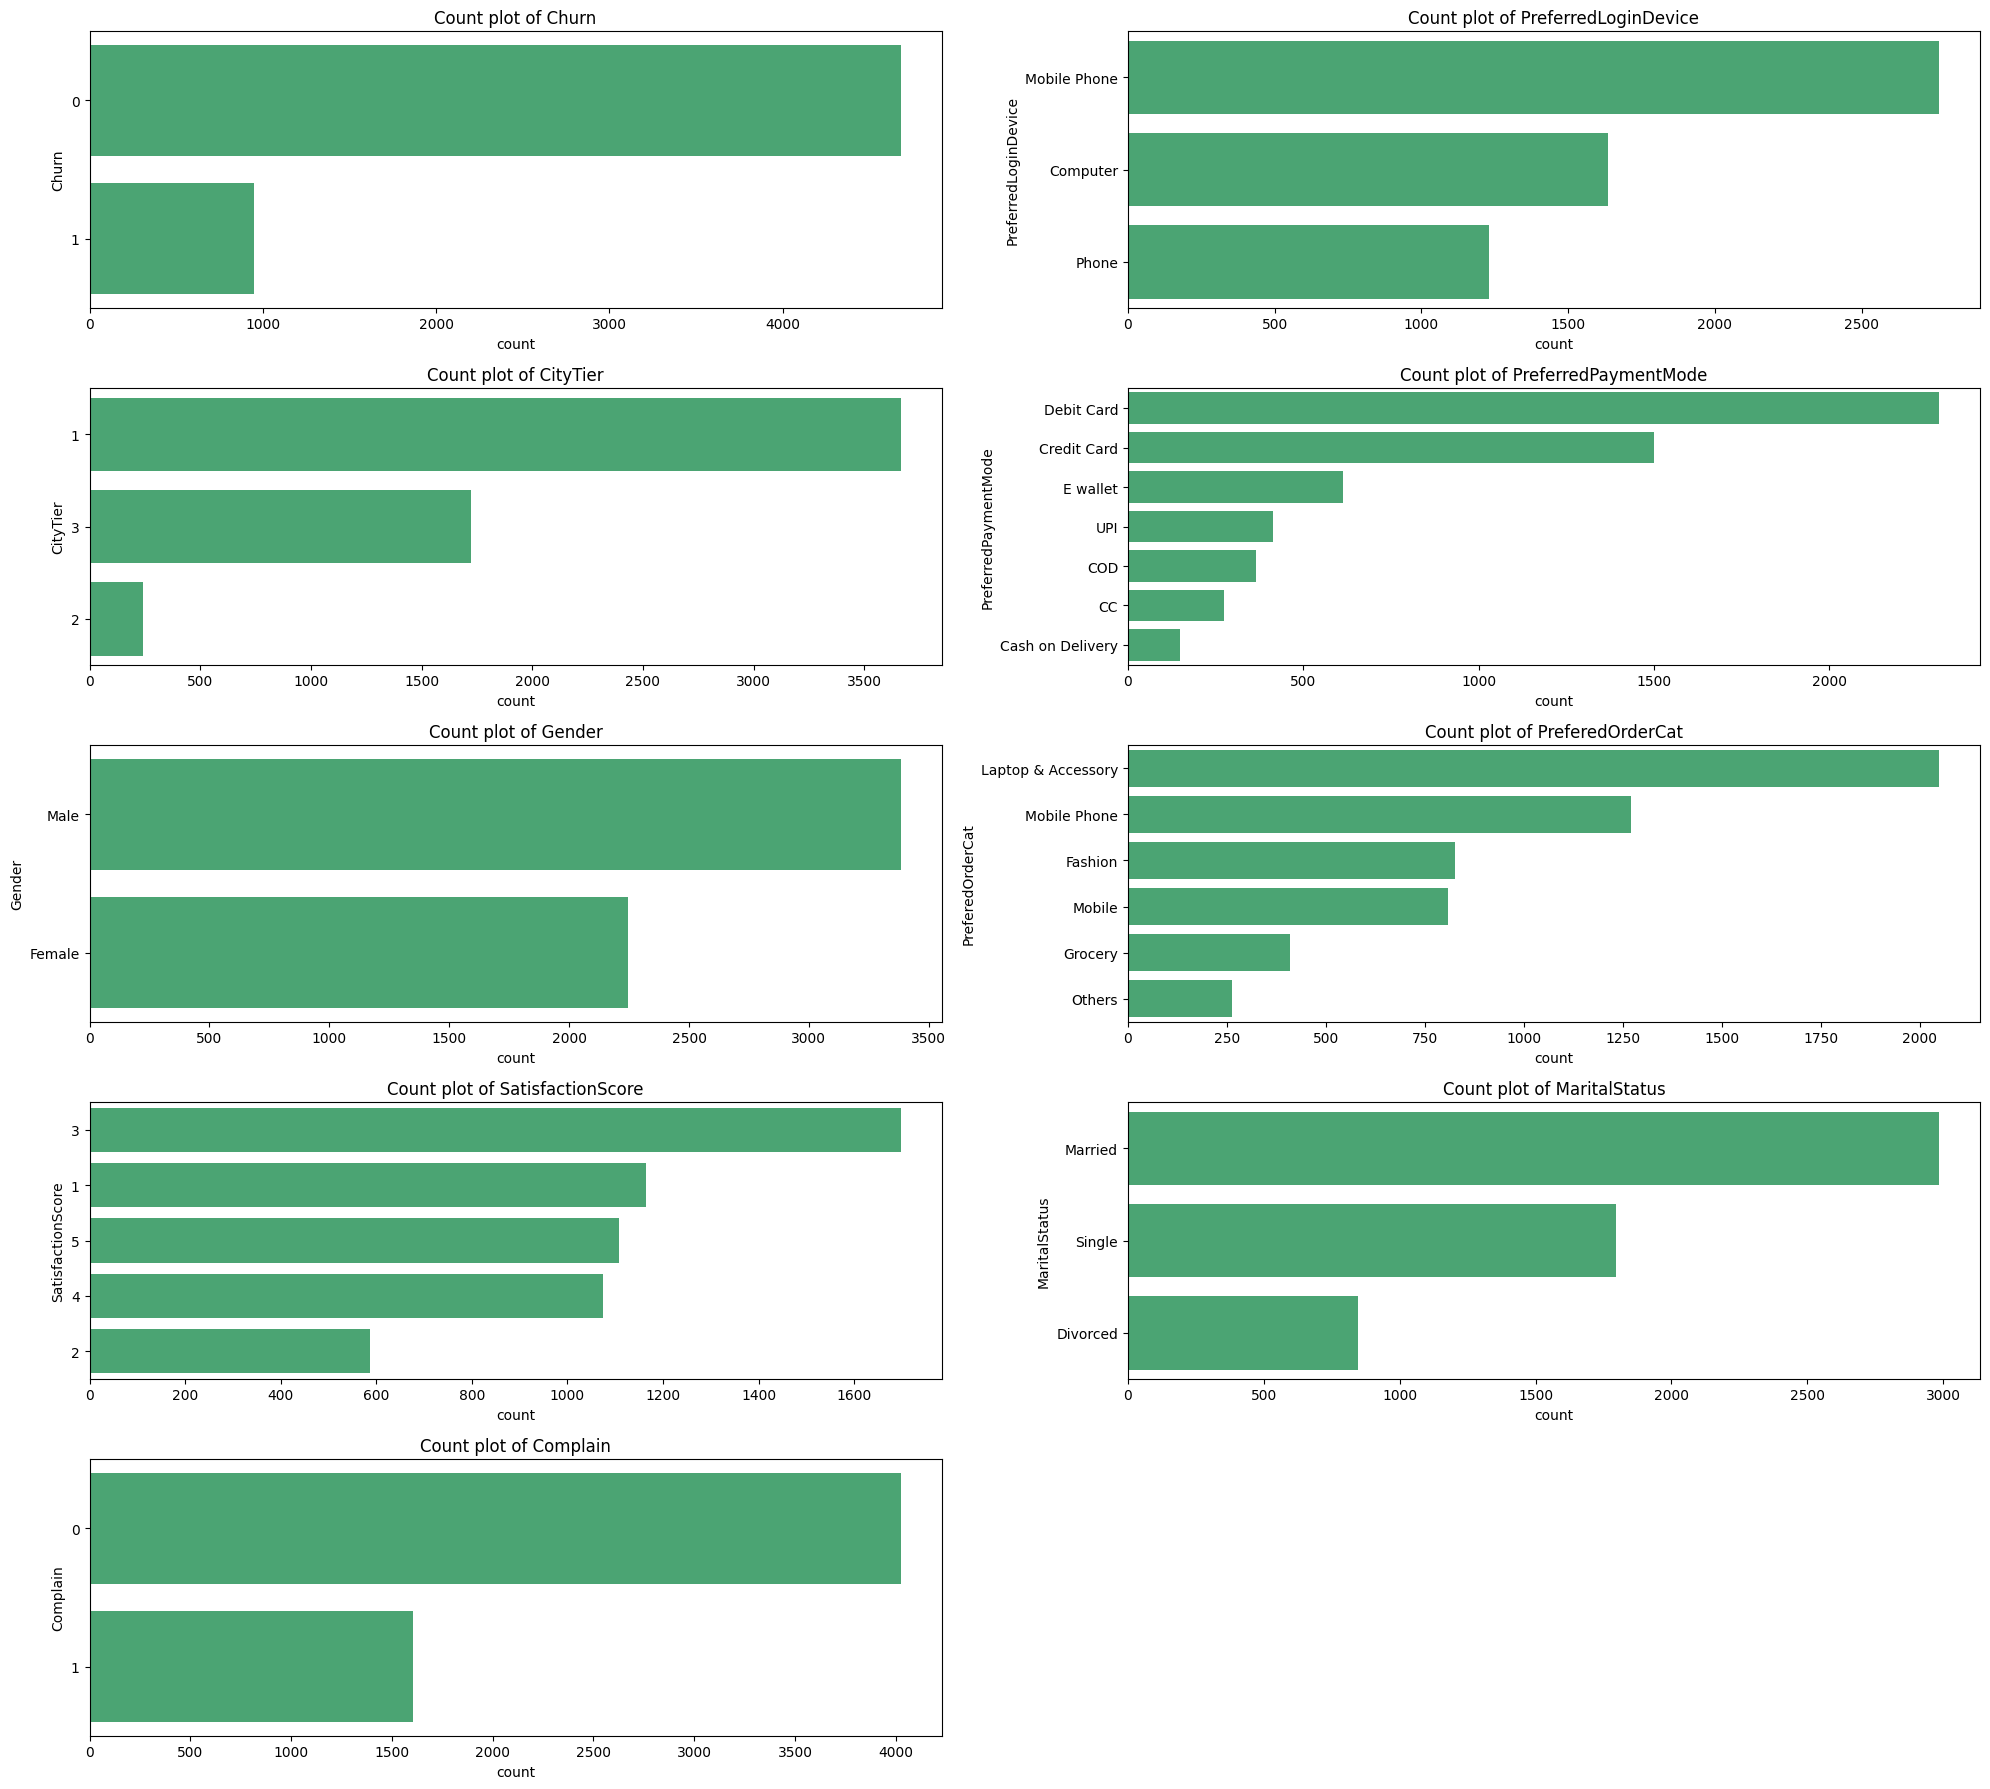

In [885]:
count = 0
fig = plt.figure(figsize=(20,18))
for kolom in categoric.columns:
    count += 1
    ax = plt.subplot(5, 2, count)
    sns.countplot(y=kolom, data=categoric, order=categoric[kolom].value_counts().sort_values(ascending=False).index, color='mediumseagreen')
    ax.set_title(f'Count plot of {kolom}')
    fig.tight_layout()
plt.show()

**Interpretasi Categorical Variables :**
- `Churn`
   <br>Terdapat 2 nilai unik.
   <br>Nilai `0` muncul sebanyak 4682 kali, menunjukkan bahwa sebagian besar pelanggan tidak berhenti berlangganan.
- `PreferredLoginDevice`
   <br>Terdapat 3 nilai unik.
   <br>`Mobile Phone` digunakan sebanyak 2765 kali, menunjukkan bahwa sebagian besar pelanggan lebih memilih masuk menggunakan ponsel.
- `CityTier`
   <br>Terdapat 3 nilai unik.
   <br>`Tier 1` muncul sebanyak 3666 kali, menunjukkan bahwa sebagian besar pelanggan berasal dari kota Tier 1.
- `PreferredPaymentMode`
   <br>Terdapat 7 nilai unik.
   <br>`Debit Card` digunakan sebanyak 2314 kali, menunjukkan bahwa sebagian besar pelanggan lebih memilih menggunakan kartu debit untuk pembayaran.
- `Gender`
   <br>Terdapat 2 nilai unik.
   <br>`Male` muncul sebanyak 3384 kali, menunjukkan bahwa sebagian besar pelanggan adalah laki-laki.
- `PreferedOrderCat`
   <br>Terdapat 6 nilai unik.
   <br>`Laptop & Accessory` muncul sebanyak 2050 kali, menunjukkan bahwa sebagian besar pelanggan lebih suka memesan produk laptop dan aksesoris.
- `SatisfactionScore`
   <br>Terdapat 3 nilai unik.
   <br>Skor `3` muncul sebanyak 1698 kali, menunjukkan bahwa sebagian besar pelanggan memberikan skor kepuasan tengah-tengah.
- `MaritalStatus`
   <br>Terdapat 3 nilai unik.
   <br>`Married` muncul sebanyak 2968 kali, menunjukkan bahwa sebagian besar pelanggan adalah yang sudah menikah.
- `Complain`
   <br>Terdapat 3 nilai unik.
   <br>Nilai `0` muncul sebanyak 4026 kali, menunjukkan bahwa sebagian besar pelanggan tidak mengajukan keluhan.

### Unique Values

In [886]:
categoric = df.select_dtypes(exclude='number')
pd.set_option('display.max_colwidth', None)
listItem = []
for col in categoric.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tableCategoric = pd.DataFrame(columns=['Variable', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tableCategoric

Variable  Number of Unique  \
0  PreferredLoginDevice                 3   
1  PreferredPaymentMode                 7   
2                Gender                 2   
3      PreferedOrderCat                 6   
4         MaritalStatus                 3   

                                                          Unique Values  
0                                       [Mobile Phone, Phone, Computer]  
1   [Debit Card, UPI, CC, Cash on Delivery, E wallet, COD, Credit Card]  
2                                                        [Female, Male]  
3  [Laptop & Accessory, Mobile, Mobile Phone, Others, Fashion, Grocery]  
4                                           [Single, Divorced, Married]

Setelah melihat unique values pada table diatas, terdapat inconsistent Data atau value yang memiliki arti sama namun beda penulisan, value yang digunakan tidak konsisten.
<br>Berdasarkan tableCategoric diatas, terdapat inconsistent data pada variable `PreferredLoginDevice`, `PreferredPaymentMode` dan `PreferedOrderCat`.
Berikut inconsistent data yang terdapat pada variable tersebut:
- `PreferredLoginDevice`: 'Mobile Phone', 'Phone'
- `PreferredPaymentMode`: 'CC', 'Cash on Delivery', 'COD', 'Credit Card'
- `PreferedOrderCat`:  'Mobile', 'Mobile Phone'

Untuk mengatasi inconsistent data pada variable diatas, diatasi dengan`replace` values.

# **Data Cleaning**

In [887]:
dfc = df.copy()

In [888]:
len(dfc)

5630

## Renaming column name

Pada variable `PreferedOrderCat` terjadi kesalahan pengetikan dalam penamaan variabel. Seharusnya PreferredOrderCat. Maka variable `PreferedOrderCat` diubah menjadi `PreferredOrderCat`

In [889]:
dfc.rename(columns={'PreferedOrderCat': 'PreferredOrderCat'}, inplace=True)
dfc

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered   PreferredOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

## Duplicated Data

In [890]:
print('Jumlah data duplikat: ', dfc.duplicated().sum())

Jumlah data duplikat:  0


Pengecekkan data duplicate dan hasilnya tidak ada data duplicate pada dataset e-commerce customer churn.

## Dropping `CustomerID` Column

Kolom `CustomerID` tidak relevan pada analisis ini karena hanya bertindak sebagai pembeda user satu dengan yang lainnya. Maka dari itu, kolom `CustomerID` akan dihapus.

In [891]:
dfc = dfc.drop('CustomerID', axis=1)

In [892]:
print('Jumlah data duplikat setelah drop kolom CustomerID: ', dfc.duplicated().sum())

Jumlah data duplikat setelah drop kolom CustomerID:  556


In [893]:
# Handling Duplicate Data after deleted feature CustomerID
dfc.drop_duplicates(inplace=True)
print("Jumlah data duplikat setelah drop duplikat data: ", sum(dfc.duplicated()))

Jumlah data duplikat setelah drop duplikat data:  0


In [894]:
len(dfc)

5074

- Setelah dilakukan penghapusan kolom `CustomerID`
- Setelah menghapus `CustomerID`, kita menemukan ada 556 data duplikat. Hal ini menunjukkan bahwa ada beberapa customer yang memiliki karakteristik dan perilaku berbelanja. Maka dari itu, agar hasil modelling tidak bias (karena adanya data leakage), kita perlu menghapus data duplikat ini.

## Handling Missing Values

<Axes: >

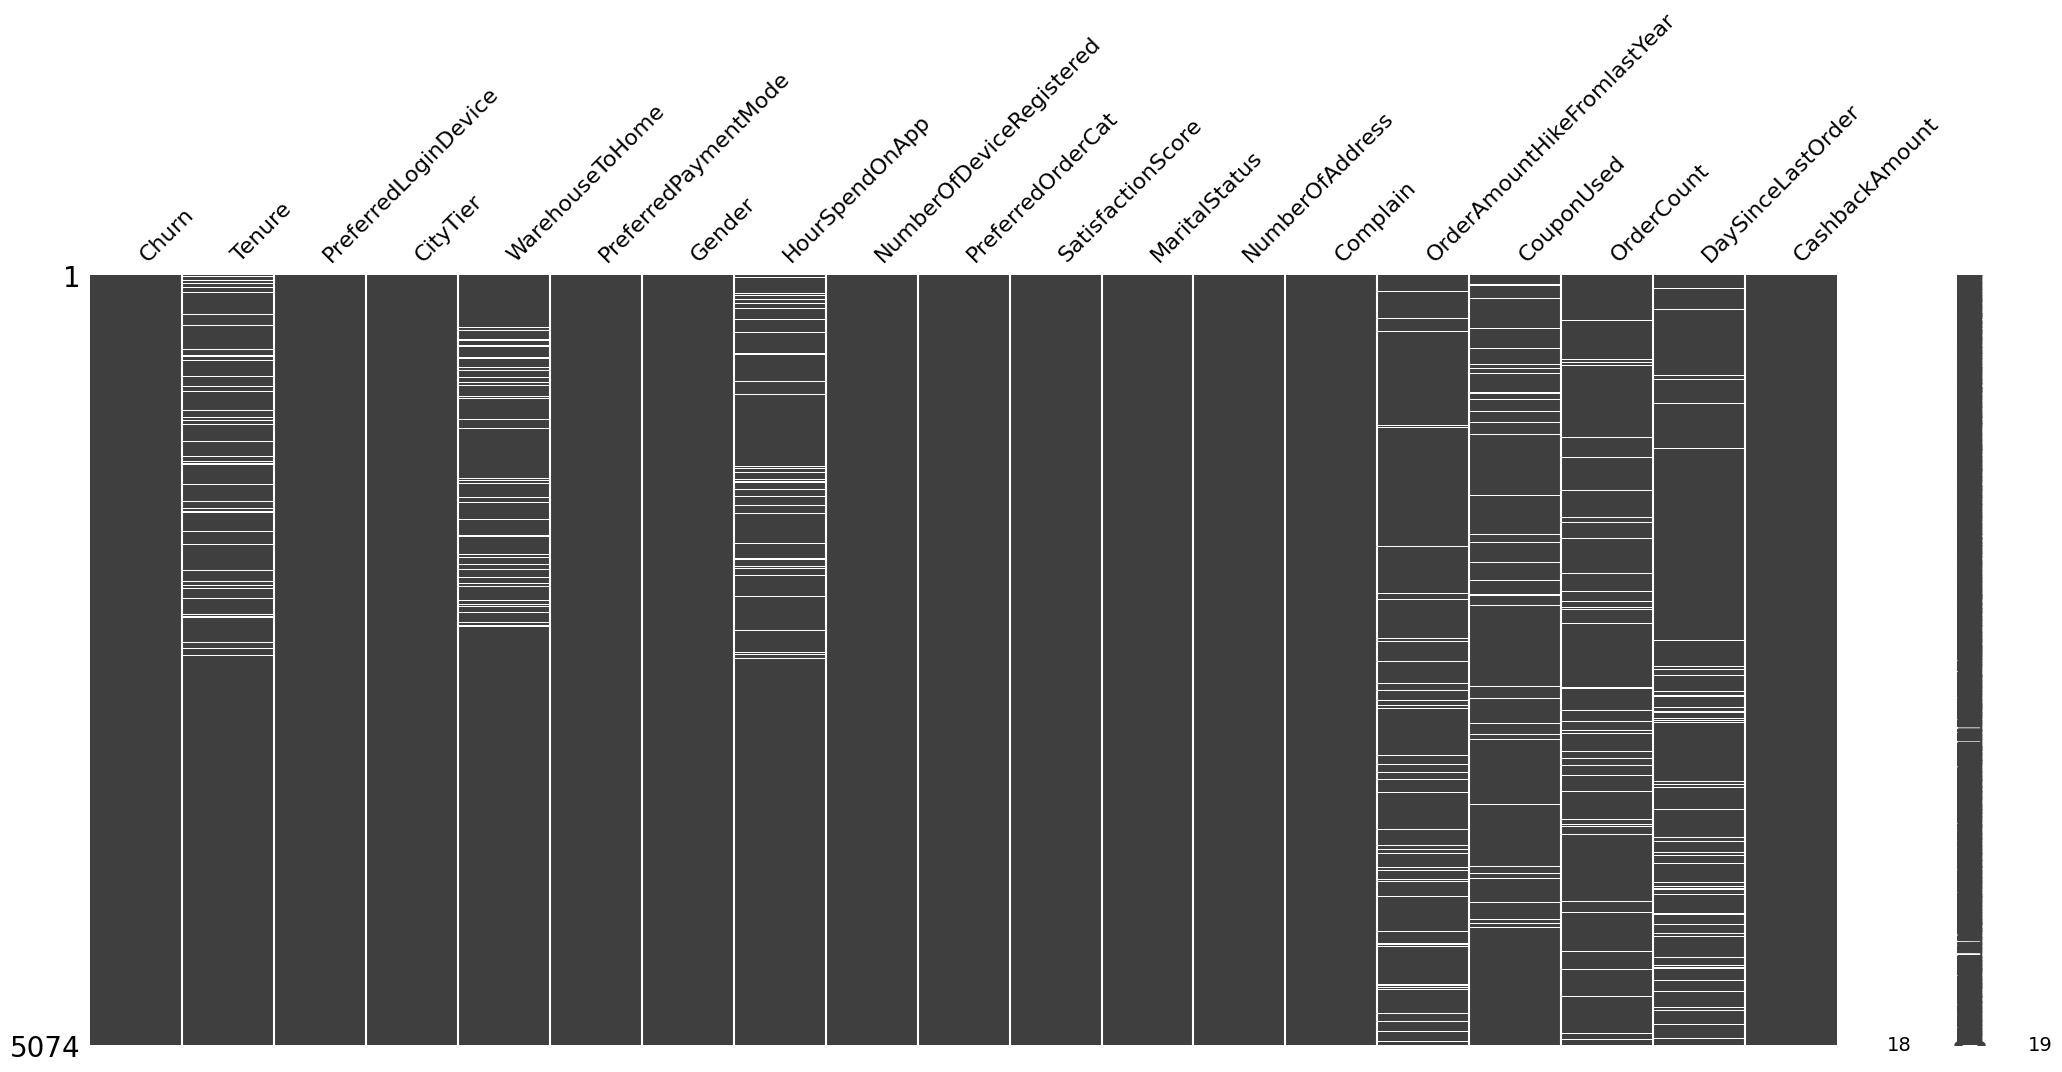

In [895]:
missingno.matrix(dfc)

In [896]:
print(f'Jumlah baris dan kolom di dataset df adalah {dfc.shape}')
total_data = len(dfc)
missing = dfc.isna().sum()
persentase = missing / total_data * 100
pd.DataFrame({'Total':missing, 'Persentase':persentase})

Jumlah baris dan kolom di dataset df adalah (5074, 19)


Total  Persentase
Churn                            0    0.000000
Tenure                         231    4.552621
PreferredLoginDevice             0    0.000000
CityTier                         0    0.000000
WarehouseToHome                221    4.355538
PreferredPaymentMode             0    0.000000
Gender                           0    0.000000
HourSpendOnApp                 230    4.532913
NumberOfDeviceRegistered         0    0.000000
PreferredOrderCat                0    0.000000
SatisfactionScore                0    0.000000
MaritalStatus                    0    0.000000
NumberOfAddress                  0    0.000000
Complain                         0    0.000000
OrderAmountHikeFromlastYear    252    4.966496
CouponUsed                     210    4.138747
OrderCount                     243    4.789121
DaySinceLastOrder              288    5.675995
CashbackAmount                   0    0.000000

Terlihat bahwa *missing values* pada setiap kolom memiliki pola yang cukup acak.

Berikut kolom yang memiliki missing values :
- `Tenure`
- `WarehouseToHome`
- `HourSpendApp`
- `OrderAmountHikeFromLastYear`
- `CouponUsed`
- `OrderCount`
- `DaySinceLastOrder`

Ada 2 cara untuk menangani missing value:

* Pertama, menghapus baris/kolom yang berisi missing value. Cara ini tidak disarankan dalam kasus kita, karena data ini mengandung cukup banyak *missing values*.
* Kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi missing value berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki missing value. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka mean, median atau modus. Menghapus data akan menjadi opsi terakhir.
* Karena data berdistribusi tidak normal dan variable berjenis numerik, kita tidak akan menggunakan KNNImputer atau ML karena percentage data missing values masih relatif kecil, yakni sekitar 4-5%.

### `Tenure`
Pada dataset tersebut, terdapat data dengan `Tenure` = 0 dan `Tenure` = NaN. Kita akan melihat apakah hal ini merupakan sebuah anomali.

In [897]:
dfc[(dfc['Tenure']==0)]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
3         1     0.0                Phone         3             15.0   
4         1     0.0                Phone         1             12.0   
5         1     0.0             Computer         1             22.0   
12        1     0.0                Phone         1             11.0   
13        1     0.0                Phone         1             15.0   
...     ...     ...                  ...       ...              ...   
2768      0     0.0                Phone         1              7.0   
2778      0     0.0                Phone         3             14.0   
2787      1     0.0                Phone         1              7.0   
2809      0     0.0                Phone         3             11.0   
2812      0     0.0         Mobile Phone         1             10.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
3              Debit Card    Male             2.0                         4   
4                      CC    Male             NaN                         3   
5              Debit Card  Female             3.0                         5   
12                    COD    Male             2.0                         3   
13                     CC    Male             3.0                         4   
...                   ...     ...             ...                       ...   
2768           Debit Card    Male             3.0                         3   
2778                  UPI  Female             2.0                         3   
2787          Credit Card    Male             2.0                         3   
2809                  UPI  Female             NaN                         4   
2812           Debit Card    Male             2.0                         1   

       PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
3     Laptop & Accessory                  5        Single                8   
4                 Mobile                  5        Single                3   
5           Mobile Phone                  5        Single                2   
12                Mobile                  3        Single                2   
13                Mobile                  3      Divorced                1   
...                  ...                ...           ...              ...   
2768              Mobile                  3        Single                1   
2778  Laptop & Accessory                  3       Married                1   
2787        Mobile Phone                  1       Married               10   
2809              Mobile                  3        Single                1   
2812  Laptop & Accessory                  4       Married                2   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
3            0                         23.0         0.0         1.0   
4            0                         11.0         1.0         1.0   
5            1                         22.0         4.0         6.0   
12           1                         13.0         2.0         2.0   
13           1                         17.0         0.0         1.0   
...        ...                          ...         ...         ...   
2768         0                         12.0         1.0         1.0   
2778         1                         22.0         0.0         1.0   
2787         1                         14.0         2.0         2.0   
2809         0                         18.0         1.0         1.0   
2812         1                         20.0         0.0         1.0   

      DaySinceLastOrder  CashbackAmount  
3                   3.0          134.07  
4                   3.0          129.60  
5                   7.0          139.19  
12                  2.0          134.41  
13                  0.0          133.88  
...                 ...             ...  
2768                2.0          133.75  
2778                4.0          149.07  
2787                2.0          147

In [898]:
dfc[dfc['Tenure'].isna()]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
1         1     NaN                Phone         1              8.0   
2         1     NaN                Phone         1             30.0   
6         1     NaN                Phone         3             11.0   
7         1     NaN                Phone         1              6.0   
9         1     NaN                Phone         1             31.0   
...     ...     ...                  ...       ...              ...   
2698      1     NaN             Computer         1             22.0   
2712      0     NaN                Phone         1              8.0   
2760      0     NaN             Computer         1              7.0   
2773      0     NaN                Phone         3              7.0   
2802      0     NaN         Mobile Phone         1              8.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
6        Cash on Delivery    Male             2.0                         3   
7                      CC    Male             3.0                         3   
9              Debit Card    Male             2.0                         5   
...                   ...     ...             ...                       ...   
2698                  COD    Male             2.0                         5   
2712                  COD    Male             2.0                         3   
2760                   CC    Male             2.0                         4   
2773                   CC    Male             3.0                         4   
2802                   CC  Female             3.0                         3   

       PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
1                 Mobile                  3        Single                7   
2                 Mobile                  3        Single                6   
6     Laptop & Accessory                  2      Divorced                4   
7                 Mobile                  2      Divorced                3   
9                 Mobile                  3        Single                2   
...                  ...                ...           ...              ...   
2698              Mobile                  5       Married                2   
2712              Mobile                  4       Married                2   
2760              Mobile                  3       Married                2   
2773              Mobile                  4       Married                1   
2802              Mobile                  3       Married                3   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
1            1                         15.0         0.0         1.0   
2            1                         14.0         0.0         1.0   
6            0                         14.0         0.0         1.0   
7            1                         16.0         2.0         2.0   
9            0                         12.0         1.0         1.0   
...        ...                          ...         ...         ...   
2698         1                         23.0         0.0         3.0   
2712         0                         11.0         0.0         1.0   
2760         0                         12.0         0.0         1.0   
2773         0                         14.0         2.0         2.0   
2802         0                         14.0         0.0         1.0   

      DaySinceLastOrder  CashbackAmount  
1                   0.0          120.90  
2                   3.0          120.28  
6                   0.0          120.86  
7                   0.0          122.93  
9                   1.0          122.93  
...                 ...             ...  
2698                0.0          123.07  
2712                2.0          122.26  
2760                0.0          120

Pada data understanding, kita pahami bahwa tidak ada data yang memiliki nilai `OrderAmountHikeFromlastYear` = 0. Sehingga, missing value pada variabel `Tenure` memang kosong karena suatu dan lain hal. Maka, kita dapat mengisi *missing value* dengan variabel yang memiliki korelasi dengan `Tenure`, salah satunya adalah `NumberOfAddress` yang memiliki korelasi Spearman sebesar 0.24.

In [899]:
dfc['Tenure'].median()

9.0

In [900]:
median_tenure_by_address = dfc.groupby('NumberOfAddress')['Tenure'].median()

dfc['Tenure'] = dfc.apply(lambda row: int(9 if pd.isna(median_tenure_by_address.get(row['NumberOfAddress'])) else median_tenure_by_address[row['NumberOfAddress']]) if pd.isna(row['Tenure']) else row['Tenure'], axis=1)

In [901]:
dfc[dfc['Tenure'].isna()]

Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferredOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

### `WarehouseToHome`
`WarehouseToHome` bisa jadi memiliki nilai NaN karena user tidak mengizinkan aplikasi untuk megetahui lokasi user. Oleh karena itu, kita dapat mengisi missing values pada variabel `WarehouseToHome` dengan median jarak rumah user ke gudang *e-commerce*.

In [902]:
dfc[dfc['WarehouseToHome'].isna()]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
28        0    18.0                Phone         1              NaN   
35        0     0.0                Phone         1              NaN   
39        0     0.0             Computer         1              NaN   
41        0    14.0                Phone         1              NaN   
46        1     0.0             Computer         3              NaN   
...     ...     ...                  ...       ...              ...   
2658      1     0.0                Phone         2              NaN   
2735      1     0.0                Phone         1              NaN   
2772      0    13.0                Phone         1              NaN   
2780      0    17.0                Phone         1              NaN   
2794      0     5.0                Phone         1              NaN   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
28             Debit Card    Male             2.0                         3   
35                     CC    Male             3.0                         3   
39                     CC    Male             3.0                         4   
41             Debit Card    Male             2.0                         3   
46                    COD  Female             3.0                         5   
...                   ...     ...             ...                       ...   
2658                  UPI    Male             2.0                         4   
2735                  COD    Male             2.0                         4   
2772           Debit Card    Male             2.0                         3   
2780                   CC    Male             2.0                         3   
2794                  COD    Male             3.0                         3   

       PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
28    Laptop & Accessory                  4       Married                9   
35                Mobile                  2      Divorced                2   
39                Mobile                  3       Married                2   
41                Mobile                  3       Married                5   
46                Mobile                  5        Single                1   
...                  ...                ...           ...              ...   
2658              Mobile                  5       Married                5   
2735              Mobile                  1       Married                6   
2772              Mobile                  1       Married                9   
2780              Mobile                  1        Single                7   
2794              Mobile                  5        Single                2   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
28           0                         18.0         1.0         1.0   
35           0                         24.0         0.0         2.0   
39           1                         15.0         0.0         1.0   
41           0                         12.0         1.0         1.0   
46           0                         21.0         1.0         1.0   
...        ...                          ...         ...         ...   
2658         1                         15.0         2.0         2.0   
2735         0                         12.0         1.0         1.0   
2772         0                         19.0         1.0         1.0   
2780         1                         12.0         1.0         1.0   
2794         0                         14.0         0.0         1.0   

      DaySinceLastOrder  CashbackAmount  
28                 15.0          123.48  
35                  2.0          123.23  
39                  1.0          125.66  
41                  8.0          124.51  
46                  0.0          123.25  
...                 ...             ...  
2658                0.0          123.35  
2735                3.0          123.67  
2772                0.0          124

In [903]:
median_distance = round(dfc.loc[(dfc['WarehouseToHome'].notna()), 'WarehouseToHome'].median())
print('Median WarehouseToHome: ', median_distance)

dfc['WarehouseToHome'] = dfc['WarehouseToHome'].fillna(median_distance)

Median WarehouseToHome:  13


In [904]:
dfc[dfc['WarehouseToHome'].isna()]

Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferredOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

### `HourSpendOnApp`
`HourSpendOnApp` memiliki koefisien korelasi paling tinggi dengan variabel `NumberOfDeviceRegistered`, yaitu 0.34. Maka, dari itu, `NumberOfDeviceRegistered` adalah prediktor yang baik untuk `HourSpendOnApp` sehingga dapat digunakan dalam mengestimasi nilai dari *missing values* pada variabel `HourSpendOnApp`.

In [905]:
dfc[dfc['HourSpendOnApp'].isna()]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
4         1     0.0                Phone         1             12.0   
8         1    13.0                Phone         3              9.0   
16        1     0.0             Computer         1             12.0   
37        0     1.0                Phone         1             27.0   
44        0     5.0                Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
2762      0     4.0                Phone         3              8.0   
2765      0    14.0                Phone         1              7.0   
2771      0     5.0                Phone         1             35.0   
2803      0     8.0                Phone         1              7.0   
2809      0     0.0                Phone         3             11.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
4                      CC    Male             NaN                         3   
8                E wallet    Male             NaN                         4   
16             Debit Card  Female             NaN                         4   
37                     CC    Male             NaN                         3   
44             Debit Card    Male             NaN                         3   
...                   ...     ...             ...                       ...   
2762           Debit Card    Male             NaN                         3   
2765           Debit Card    Male             NaN                         3   
2771           Debit Card  Female             NaN                         4   
2803           Debit Card  Female             NaN                         5   
2809                  UPI  Female             NaN                         4   

     PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
4               Mobile                  5        Single                3   
8               Mobile                  3      Divorced                2   
16              Mobile                  2        Single                2   
37              Mobile                  2      Divorced                2   
44              Mobile                  3        Single                4   
...                ...                ...           ...              ...   
2762            Mobile                  3       Married                1   
2765            Mobile                  1       Married                4   
2771            Mobile                  4        Single                2   
2803            Mobile                  1       Married                2   
2809            Mobile                  3        Single                1   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
4            0                         11.0         1.0         1.0   
8            1                         14.0         0.0         1.0   
16           1                         18.0         1.0         1.0   
37           0                         11.0         0.0         1.0   
44           0                         20.0         0.0         1.0   
...        ...                          ...         ...         ...   
2762         0                         19.0         0.0         1.0   
2765         0                         22.0         0.0         1.0   
2771         0                         13.0         0.0         4.0   
2803         0                         12.0         1.0         1.0   
2809         0                         18.0         1.0         1.0   

      DaySinceLastOrder  CashbackAmount  
4                   3.0          129.60  
8                   2.0          126.83  
16                  0.0          129.26  
37                  2.0          127.13  
44                  4.0          130.38  
...                 ...             ...  
2762                2.0          130.67  
2765                0.0          127.82  
2771                1.0          128.37  
2803              

In [906]:
median_hourspendonapp_by_device = dfc.groupby('NumberOfDeviceRegistered')['HourSpendOnApp'].median()
dfc['HourSpendOnApp'] = dfc.apply(lambda row: int(median_hourspendonapp_by_device[row['NumberOfDeviceRegistered']]) if pd.isna(row['HourSpendOnApp']) else row['HourSpendOnApp'], axis=1)

In [907]:
dfc[dfc['HourSpendOnApp'].isna()]

Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferredOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

### `OrderAmountHikeFromlastYear`
`OrderAmountHikeFromlastYear` memiliki korelasi paling tinggi dengan `HourSpendOnApp`, yaitu 0.12. Maka dari itu, kita dapat mengisi missing value dari `OrderAmountHikeFromlastYear` dengan mengganti nilai yang hilang dengan median `OrderAmountHikeFromlastYear` dari data yang telah dikelompokkan berdasarkan `HourSpendOnApp`.

In [908]:
dfc[dfc['OrderAmountHikeFromlastYear'].isna()]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
10        1     4.0         Mobile Phone         1             18.0   
40        0    23.0         Mobile Phone         1             17.0   
65        0    25.0         Mobile Phone         1              6.0   
106       0    15.0         Mobile Phone         1             10.0   
108       0    23.0         Mobile Phone         3              6.0   
...     ...     ...                  ...       ...              ...   
5511      0    22.0             Computer         1             29.0   
5534      0    61.0         Mobile Phone         3             28.0   
5537      0    23.0             Computer         1              9.0   
5597      0    13.0             Computer         1             16.0   
5603      0    16.0         Mobile Phone         1              9.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
10       Cash on Delivery  Female             2.0                         3   
40             Debit Card  Female             2.0                         3   
65             Debit Card    Male             3.0                         4   
106      Cash on Delivery    Male             2.0                         3   
108           Credit Card  Female             3.0                         3   
...                   ...     ...             ...                       ...   
5511          Credit Card  Female             3.0                         4   
5534           Debit Card  Female             4.0                         4   
5537           Debit Card    Male             3.0                         4   
5597           Debit Card    Male             3.0                         4   
5603           Debit Card    Male             3.0                         4   

     PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
10              Others                  3      Divorced                2   
40              Others                  4        Single                4   
65              Others                  3      Divorced                1   
106             Others                  2      Divorced                2   
108             Others                  2       Married                4   
...                ...                ...           ...              ...   
5511           Grocery                  1       Married                5   
5534           Grocery                  1       Married                6   
5537            Others                  1       Married                5   
5597            Others                  1        Single                4   
5603            Others                  3       Married                7   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
10           0                          NaN         9.0        15.0   
40           0                          NaN         2.0         4.0   
65           0                          NaN         1.0        11.0   
106          0                          NaN         0.0        11.0   
108          0                          NaN         1.0         1.0   
...        ...                          ...         ...         ...   
5511         0                          NaN         2.0         5.0   
5534         1                          NaN         1.0         2.0   
5537         0                          NaN         5.0         5.0   
5597         0                          NaN         2.0         2.0   
5603         0                          NaN         1.0         5.0   

      DaySinceLastOrder  CashbackAmount  
10                  8.0          295.45  
40                  4.0          299.26  
65                  9.0          299.99  
106                15.0          292.32  
108                 6.0          295.17  
...                 ...             ...  
5511                8.0          296.74  
5534                1.0          303.75  
5537                4.0          316.61  
5597              

In [909]:
median_orderhike_by_hour = dfc.groupby('HourSpendOnApp')['OrderAmountHikeFromlastYear'].median()
dfc['OrderAmountHikeFromlastYear'] = dfc.apply(lambda row: int(median_orderhike_by_hour[row['HourSpendOnApp']]) if pd.isna(row['OrderAmountHikeFromlastYear']) else row['OrderAmountHikeFromlastYear'], axis=1)

In [910]:
dfc[dfc['OrderAmountHikeFromlastYear'].isna()]

Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferredOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

### `CouponUsed`
Secara logika dan domain knowledge, semakin banyak order yang dibuat oleh pelanggan, semakin banyak pula kupon yang digunakan. Hal ini terbukti dari heatmap yang menunjukkan korelasi positif kuat antara `CouponUsed` dan `OrderCount`. Maka, dari itu, `OrderCount` adalah prediktor yang kuat untuk `CouponUsed` sehingga dapat digunakan dalam mengestimasi nilai dari *missing values* pada variabel `CouponUsed`. Caranya adalah mengganti nilai yang hilang dengan median `CouponUsed` dari data yang telah dikelompokkan berdasarkan `OrderCount`.

In [911]:
dfc[dfc['CouponUsed'].isna()]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
61        0    13.0         Mobile Phone         1             10.0   
62        0    28.0         Mobile Phone         1             20.0   
69        0    18.0             Computer         1              8.0   
112       0    25.0             Computer         3              8.0   
138       0    19.0         Mobile Phone         3              8.0   
...     ...     ...                  ...       ...              ...   
5170      0    29.0         Mobile Phone         1              8.0   
5238      0    18.0         Mobile Phone         1             35.0   
5240      0    20.0         Mobile Phone         3             10.0   
5355      0    23.0         Mobile Phone         1              8.0   
5461      0    31.0             Computer         3              9.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
61            Credit Card  Female             2.0                         3   
62            Credit Card    Male             3.0                         2   
69            Credit Card    Male             3.0                         4   
112            Debit Card    Male             3.0                         4   
138      Cash on Delivery  Female             3.0                         5   
...                   ...     ...             ...                       ...   
5170          Credit Card    Male             3.0                         2   
5238           Debit Card    Male             3.0                         4   
5240           Debit Card  Female             3.0                         4   
5355           Debit Card    Male             3.0                         4   
5461          Credit Card    Male             3.0                         4   

     PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
61              Others                  3      Divorced                2   
62              Others                  4        Single                9   
69             Grocery                  2      Divorced               10   
112             Others                  3        Single                2   
138            Grocery                  4      Divorced                4   
...                ...                ...           ...              ...   
5170           Grocery                  1       Married                4   
5238           Grocery                  5       Married                5   
5240           Grocery                  4       Married               10   
5355           Grocery                  3        Single                6   
5461           Grocery                  4       Married                6   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
61           0                         14.0         NaN         9.0   
62           0                         11.0         NaN         2.0   
69           0                         23.0         NaN        11.0   
112          1                         18.0         NaN        15.0   
138          1                         12.0         NaN         7.0   
...        ...                          ...         ...         ...   
5170         0                         14.0         NaN         2.0   
5238         0                         14.0         NaN        15.0   
5240         0                         13.0         NaN         6.0   
5355         0                         15.0         NaN         2.0   
5461         0                         23.0         NaN        15.0   

      DaySinceLastOrder  CashbackAmount  
61                  9.0          290.33  
62                 15.0          287.22  
69                  8.0          267.92  
112                12.0          290.68  
138                 7.0          268.72  
...                 ...             ...  
5170                1.0          272.32  
5238               18.0          288.28  
5240                2.0          291.06  
5355              

In [912]:
median_coupon_by_order = dfc.groupby('OrderCount')['CouponUsed'].median()

dfc['CouponUsed'] = dfc.apply(lambda row: int(median_coupon_by_order[row['OrderCount']]) if pd.isna(row['CouponUsed']) else row['CouponUsed'], axis=1)

In [913]:
dfc[dfc['CouponUsed'].isna()]

Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferredOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

### `OrderCount`
Karena korelasi positif yang kuat antara `OrderCount` dan `CouponUsed`, kita dapat memanfaatkan `CouponUsed` sebagai prediktor untuk nilai yang hilang pada variabel `OrderCount`. Caranya adalah mengganti nilai yang hilang dengan median `OrderCount` dari data yang telah dikelompokkan berdasarkan `CouponUsed`.

In [914]:
dfc[dfc['OrderCount'].isna()]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
64        0    24.0         Mobile Phone         1              9.0   
90        0    14.0         Mobile Phone         3             12.0   
110       0    16.0         Mobile Phone         3             22.0   
120       0     4.0             Computer         1              9.0   
143       0    18.0         Mobile Phone         1             26.0   
...     ...     ...                  ...       ...              ...   
5517      0    16.0         Mobile Phone         1             13.0   
5581      0    21.0             Computer         1              8.0   
5590      0    12.0         Mobile Phone         1             17.0   
5621      1    14.0         Mobile Phone         3             35.0   
5622      0    13.0         Mobile Phone         3             31.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
64            Credit Card  Female             3.0                         3   
90             Debit Card  Female             3.0                         3   
110              E wallet  Female             3.0                         3   
120           Credit Card    Male             3.0                         3   
143           Credit Card    Male             3.0                         3   
...                   ...     ...             ...                       ...   
5517          Credit Card    Male             3.0                         4   
5581          Credit Card  Female             4.0                         4   
5590          Credit Card  Female             4.0                         6   
5621             E wallet    Male             3.0                         5   
5622             E wallet  Female             3.0                         5   

     PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
64             Grocery                  4        Single                4   
90             Fashion                  2        Single                4   
110            Grocery                  2      Divorced                6   
120            Fashion                  3       Married               10   
143            Grocery                  2      Divorced                1   
...                ...                ...           ...              ...   
5517           Fashion                  5       Married               11   
5581           Fashion                  4       Married                2   
5590           Fashion                  3       Married                5   
5621           Fashion                  5       Married                6   
5622           Grocery                  1       Married                2   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
64           0                         18.0         0.0         NaN   
90           1                         18.0         0.0         NaN   
110          1                         22.0         0.0         NaN   
120          0                         12.0         1.0         NaN   
143          1                         14.0         0.0         NaN   
...        ...                          ...         ...         ...   
5517         0                         14.0         6.0         NaN   
5581         0                         19.0         1.0         NaN   
5590         0                         13.0         1.0         NaN   
5621         1                         14.0         3.0         NaN   
5622         0                         12.0         4.0         NaN   

      DaySinceLastOrder  CashbackAmount  
64                  0.0          237.34  
90                  0.0          235.91  
110                 9.0          260.64  
120                 2.0          236.75  
143                10.0          234.96  
...                 ...             ...  
5517                8.0          258.48  
5581               13.0          244.57  
5590               12.0          257.06  
5621              

In [915]:
median_coupon_by_order = dfc.groupby('CouponUsed')['OrderCount'].median()

dfc['OrderCount'] = dfc.apply(lambda row: int(median_coupon_by_order[row['CouponUsed']]) if pd.isna(row['OrderCount']) else row['OrderCount'], axis=1)

In [916]:
dfc[dfc['OrderCount'].isna()]

Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferredOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

### `DaySinceLastOrder`
Pada heatmap, `DaySinceLastOrder` memiliki koefisien korelasi paling tinggi dengan variabel `OrderCount`, yaitu 0.39. Maka, dari itu, `OrderCount` dapat bertindak sebagai prediktor untuk `DaySinceLastOrder` sehingga dapat digunakan dalam mengestimasi nilai dari *missing values* pada variabel `DaySinceLastOrder`. Caranya adalah mengganti nilai yang hilang dengan median `DaySinceLastOrder` dari data yang telah dikelompokkan berdasarkan `OrderCount`.

In [917]:
dfc[dfc['DaySinceLastOrder'].isna()]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
88        0    24.0         Mobile Phone         1             14.0   
97        0    10.0             Computer         1             17.0   
126       0    12.0             Computer         1              8.0   
146       1    10.0             Computer         1             35.0   
151       0     2.0         Mobile Phone         1             28.0   
...     ...     ...                  ...       ...              ...   
5574      0    21.0         Mobile Phone         1             32.0   
5591      0     6.0         Mobile Phone         3              8.0   
5608      0    15.0         Mobile Phone         3             10.0   
5623      0     5.0             Computer         1             12.0   
5626      0    13.0         Mobile Phone         1             13.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
88             Debit Card    Male             2.0                         4   
97                    UPI    Male             2.0                         3   
126      Cash on Delivery  Female             3.0                         3   
146            Debit Card    Male             2.0                         3   
151            Debit Card  Female             3.0                         2   
...                   ...     ...             ...                       ...   
5574          Credit Card    Male             3.0                         4   
5591             E wallet  Female             3.0                         4   
5608           Debit Card    Male             3.0                         5   
5623          Credit Card    Male             4.0                         4   
5626          Credit Card    Male             3.0                         5   

       PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
88               Fashion                  4      Divorced                6   
97               Fashion                  2       Married                2   
126              Fashion                  3        Single                1   
146              Fashion                  4      Divorced                2   
151              Fashion                  4       Married                8   
...                  ...                ...           ...              ...   
5574             Fashion                  3        Single                4   
5591             Fashion                  1       Married                3   
5608  Laptop & Accessory                  4       Married                4   
5623  Laptop & Accessory                  5        Single                2   
5626             Fashion                  5       Married                6   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
88           0                         16.0         1.0         4.0   
97           1                         14.0         0.0         1.0   
126          0                         25.0        10.0        11.0   
146          1                         12.0         5.0         9.0   
151          0                         18.0         5.0         6.0   
...        ...                          ...         ...         ...   
5574         0                         24.0        10.0        13.0   
5591         0                         20.0         1.0         6.0   
5608         0                         12.0         2.0         2.0   
5623         0                         20.0         2.0         2.0   
5626         0                         16.0         1.0         2.0   

      DaySinceLastOrder  CashbackAmount  
88                  NaN          224.90  
97                  NaN          221.85  
126                 NaN          209.38  
146                 NaN          218.49  
151                 NaN          219.96  
...                 ...             ...  
5574                NaN          211.33  
5591                NaN          229.22  
5608                NaN          214

In [918]:
median_days_by_order = dfc.groupby('OrderCount')['DaySinceLastOrder'].median()

dfc['DaySinceLastOrder'] = dfc.apply(lambda row: int(median_days_by_order[row['OrderCount']]) if pd.isna(row['DaySinceLastOrder']) else row['DaySinceLastOrder'], axis=1)

In [919]:
dfc[dfc['DaySinceLastOrder'].isna()]

Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferredOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

### Data After Handling Missing Values

In [920]:
dfc.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferredOrderCat              0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Handling Inconsistent Data

Dilakukan pengecekkan unique values, terdapat inconsisten data. Berikut inconsistent data yang terdapat pada dataset:
- `PreferredLoginDevice`: 'Mobile Phone', 'Phone'
- `PreferredPaymentMode`: 'CC', 'Cash on Delivery', 'COD', 'Credit Card'
- `PreferredOrderCat`:  'Mobile', 'Mobile Phone'

Untuk mengatasi inconsistent data pada variable diatas, diatasi dengan`replace` values. Data yang bersih dan konsisten memastikan bahwa hasil identifikasi dan  model prediktif dapat belajar dari data dengan cara yang efektif.

### `PreferredLoginDevice`

In [921]:
dfc['PreferredLoginDevice'] = dfc['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

In [922]:
dfc['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    3617
Computer        1457
Name: count, dtype: int64

### `PreferredOrderCat`

In [923]:
dfc['PreferredOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [924]:
dfc['PreferredOrderCat'] = dfc['PreferredOrderCat'].replace('Mobile', 'Mobile Phone')

In [925]:
dfc['PreferredOrderCat'].value_counts()

PreferredOrderCat
Mobile Phone          1856
Laptop & Accessory    1847
Fashion                763
Grocery                366
Others                 242
Name: count, dtype: int64

### `PreferredPaymentMode`

In [926]:
dfc['PreferredPaymentMode'] = dfc['PreferredPaymentMode'].replace('CC', 'Credit Card')
dfc['PreferredPaymentMode'] = dfc['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

In [927]:
dfc['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2099
Credit Card         1596
E wallet             562
Cash on Delivery     457
UPI                  360
Name: count, dtype: int64

## Handling Outliers

In [928]:
numeric = dfc.select_dtypes(include='number')

In [929]:
numerical_features = numeric.columns
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features:
    IQR = dfc[feature].quantile(0.75) - dfc[feature].quantile(0.25)
    lower_bound = dfc[feature].quantile(0.25) - 1.5 * IQR
    upper_bound = dfc[feature].quantile(0.75) + 1.5 * IQR
    list_lower.append(lower_bound)
    list_upper.append(upper_bound)
    number_lower.append(len(dfc[dfc[feature] < lower_bound]))
    number_inside.append(len(dfc[(dfc[feature] >= lower_bound) & (dfc[feature] <= upper_bound)]))
    number_upper.append(len(dfc[dfc[feature] > upper_bound]))
    percentage_outlier.append(round((len(dfc[dfc[feature] < lower_bound]) + len(dfc[dfc[feature] > upper_bound])) / len(dfc) * 100, 2))

outliers = pd.DataFrame({
    "Attribute (Numerical Features)" : numerical_features,
    "Lower Bound" : list_lower,
    "Upper Bound" : list_upper,
    "# Lower" : number_lower,
    "# Inside" : number_inside,
    "# Upper" : number_upper,
    "% Outlier" : percentage_outlier})

outliers

Attribute (Numerical Features)  Lower Bound  Upper Bound  # Lower  \
0                           Churn       0.0000       0.0000        0   
1                          Tenure     -15.0000      33.0000        0   
2                        CityTier      -2.0000       6.0000        0   
3                 WarehouseToHome      -6.0000      34.0000        0   
4                  HourSpendOnApp       0.5000       4.5000        3   
5        NumberOfDeviceRegistered       1.5000       5.5000      217   
6               SatisfactionScore      -1.0000       7.0000        0   
7                 NumberOfAddress      -4.0000      12.0000        0   
8                        Complain      -1.5000       2.5000        0   
9     OrderAmountHikeFromlastYear       5.5000      25.5000        0   
10                     CouponUsed      -0.5000       3.5000        0   
11                     OrderCount      -2.0000       6.0000        0   
12              DaySinceLastOrder      -7.0000      17.0000        0   
13                 CashbackAmount      67.8625     276.0025       11   

    # Inside  # Upper  % Outlier  
0       4233      841      16.57  
1       5070        4       0.08  
2       5074        0       0.00  
3       4937      137       2.70  
4       5068        3       0.12  
5       4711      146       7.15  
6       5074        0       0.00  
7       5070        4       0.08  
8       5074        0       0.00  
9       5045       29       0.57  
10      4400      674      13.28  
11      4350      724      14.27  
12      5062       12       0.24  
13      4692      371       7.53

In [930]:
dfc.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

**Handling Outliers** (khusus untuk DFC/DF Clean)

| **Column** | **Total Outlier** | **Lower** | **Upper** | **Action** | **Additional Info** |
|------------|-------------------|-----------|-----------|------------|---------------------|
| Churn | 948 | 0 | 0 |  | Churn merupakan fitur target dalam analisis ini, maka outlier pada fitur churn **tidak dihapus**.  |
| Tenure | 4 | -10.0 | 30.0 |  | Outlier pada fitur Tenure **tidak dihapus** karena nilai outliers masih dianggap relevan dan diasumsikan sebagai representasi dari pelanggan <br> yang telah lama berlangganan. |
| WarehouseToHome | 2 | -6.0 | 34.0 |  | Outlier pada fitur WarehouseToHome **tidak dihapus** karena nilai outliers mencerminkan kondisi nyata di mana beberapa pelanggan memiliki <br> jarak yang signifikan antara rumah dan gudang |
| HourSpendOnApp | 6 | 0.5 | 4.5 |  | Outlier pada fitur HourSpendOnApp **tidak dihapus** karena diasumsikan nilai 0 merupakan penggunaan aplikasi dibawah 1 jam. |
| NumberOfDeviceRegistered | 397 | 1.5 | 5.5 |  | Outlier pada fitur NumberOfDeviceRegistered sebesar 7% dan outliers **tidak dihapus** karena data menunjukkan pelanggan yang memiliki <br> banyak perangkat (hingga 6), merupakan kondisi realistis dan relevan untuk analisis. |
| NumberOfAddress | 4 | -4.0 | 12.0 | Drop | Outlier pada fitur NumberOfAddress sebanyak 4 data dan outliers **dihapus** karena nilai terlalu ekstrem dan tidak representatif untuk analisis yang akurat. |
| OrderAmountHikeFromlastYear | 33 | 5.5 | 25.5 |  | Outlier pada fitur OrderAmountHikeFromLastYear **tidak dihapus** karena data tersebut merupakan persentase kenaikan order dari tahun sebelumnya, <br> yang memiliki pengaruh signifikan terhadap churn pelanggan. |
| CouponUsed | 629 | -0.5 | 3.5 |  | Outlier pada fitur CouponUsed **tidak dihapus** karena data tersebut masih relevan karena adanya korelasi yang cukup tinggi (nilai corr 0.71) <br> antara CouponUsed dan OrderCount. |
| OrderCount | 703 | -2.0 | 6.0 |  | Outlier pada fitur OrderCount **tidak dihapus** karena data tersebut masih diperlukan, dilihat dari korelasi yang cukup tinggi (nilai corr 0.71) <br> antara CouponUsed dan OrderCount. |
| DaySinceLastOrder | 62 | -7.0 | 17.0 | Drop | Outlier pada fitur DaySinceLastOrder **dihapus** sebanyak 12 data karena data tersebut berada di atas upper bound, yaitu lebih dari 17 hari <br> dan jumlahnya sekitar 0.24% dari data. |
| CashbackAmount  | 438 | 67.8625 | 276.0025 | Drop | Outlier pada fitur CashbackAmount **dihapus** sebanyak 378 data karena data yang berada di luar batas atas dan bawah menyumbang sekitar 7.53%, <br> dan dianggap tidak relevan untuk analisis lebih lanjut.
|

### NumberOfAddress Outliers

In [931]:
dfc[dfc['NumberOfAddress'] > 12]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
260       1     9.0             Computer         1             10.0   
691       0    12.0             Computer         1             15.0   
3075      1     1.0             Computer         1             11.0   
3506      0    13.0             Computer         1             16.0   

     PreferredPaymentMode Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
260      Cash on Delivery   Male             2.0                         3   
691            Debit Card   Male             3.0                         3   
3075     Cash on Delivery   Male             3.0                         4   
3506           Debit Card   Male             4.0                         4   

       PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
260         Mobile Phone                  2        Single               19   
691   Laptop & Accessory                  4        Single               21   
3075        Mobile Phone                  2        Single               20   
3506  Laptop & Accessory                  4        Single               22   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
260          1                         23.0         1.0         1.0   
691          0                         15.0         1.0         1.0   
3075         1                         24.0         2.0         2.0   
3506         0                         16.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
260                 0.0          122.85  
691                 3.0          167.82  
3075                1.0          147.85  
3506                4.0          192.82

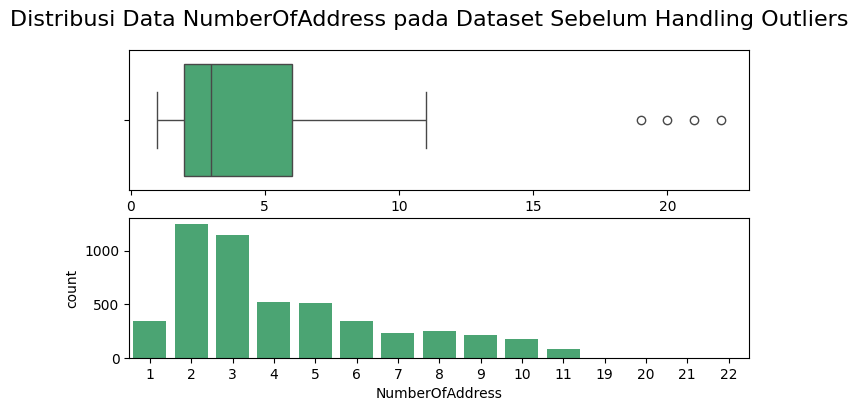

In [932]:
# Melihat distribusi data NumberOfAddress yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(8,4))

sns.boxplot(data=dfc, x='NumberOfAddress',ax=axes1, color='mediumseagreen')
sns.countplot(data=dfc, x='NumberOfAddress', ax=axes2, color='mediumseagreen')

fig.suptitle('Distribusi Data NumberOfAddress pada Dataset Sebelum Handling Outliers', size = 16)
plt.show()

In [933]:
dfc = dfc.drop(dfc[dfc['NumberOfAddress'] > 12].index)

In [934]:
dfc[dfc['NumberOfAddress'] > 12]

Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferredOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

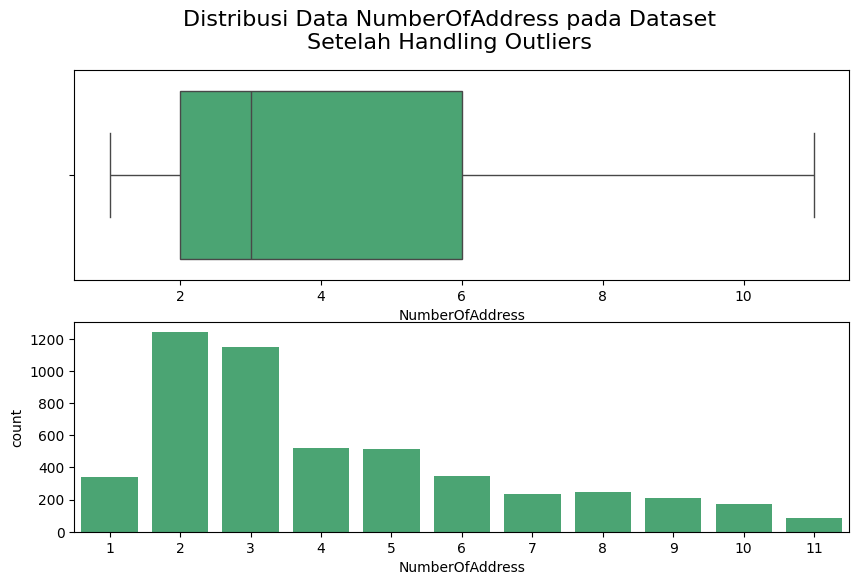

In [935]:
# Melihat distribusi data NumberOfAddress yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=dfc, x='NumberOfAddress',ax=axes1, color='mediumseagreen')
sns.countplot(data=dfc, x='NumberOfAddress', ax=axes2, color='mediumseagreen')

fig.suptitle('Distribusi Data NumberOfAddress pada Dataset\nSetelah Handling Outliers\n', size = 16)
plt.show()

### DaySinceLastOrder Outliers

In [936]:
dfc[dfc['DaySinceLastOrder'] > 17]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
1490      0     3.0         Mobile Phone         1             11.0   
2040      1     0.0         Mobile Phone         3              6.0   
3076      0    11.0         Mobile Phone         1             21.0   
3306      0    25.0         Mobile Phone         3             33.0   
3376      0    15.0         Mobile Phone         1             13.0   
3565      0    18.0         Mobile Phone         1             36.0   
3768      0    18.0         Mobile Phone         1             35.0   
4305      0     4.0         Mobile Phone         1             12.0   
4546      0    11.0         Mobile Phone         1             21.0   
4776      0    25.0         Mobile Phone         3             33.0   
5035      0    18.0         Mobile Phone         1             36.0   
5238      0    18.0         Mobile Phone         1             35.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
1490     Cash on Delivery  Female             2.0                         3   
2040           Debit Card    Male             2.0                         4   
3076           Debit Card  Female             4.0                         4   
3306             E wallet  Female             4.0                         4   
3376          Credit Card    Male             3.0                         4   
3565                  UPI    Male             3.0                         4   
3768           Debit Card    Male             3.0                         4   
4305     Cash on Delivery  Female             3.0                         4   
4546           Debit Card  Female             4.0                         4   
4776             E wallet  Female             4.0                         4   
5035                  UPI    Male             3.0                         4   
5238           Debit Card    Male             3.0                         4   

       PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
1490        Mobile Phone                  5       Married                6   
2040             Fashion                  3       Married                6   
3076        Mobile Phone                  5       Married                3   
3306             Grocery                  3      Divorced                4   
3376        Mobile Phone                  5        Single                4   
3565  Laptop & Accessory                  2        Single                3   
3768             Grocery                  5      Divorced                5   
4305        Mobile Phone                  5       Married                7   
4546        Mobile Phone                  5       Married                3   
4776             Grocery                  3       Married                4   
5035  Laptop & Accessory                  1        Single                3   
5238             Grocery                  5       Married                5   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
1490         0                         14.0         0.0         2.0   
2040         0                         11.0         5.0        11.0   
3076         0                         13.0         4.0        13.0   
3306         0                         15.0         3.0         5.0   
3376         1                         14.0         2.0         3.0   
3565         0                         26.0         2.0         2.0   
3768         0                         14.0         7.0        15.0   
4305         0                         15.0         1.0         3.0   
4546         0                         13.0        11.0        13.0   
4776         0                         15.0         3.0         5.0   
5035         0                         26.0         7.0        14.0   
5238         0                         14.0         7.0        15.0   

      DaySinceLastOrder  CashbackAmount  
1490               30.0          132.04  
2040               46.0        

In [937]:
len(dfc[dfc['DaySinceLastOrder'] > 17])

12

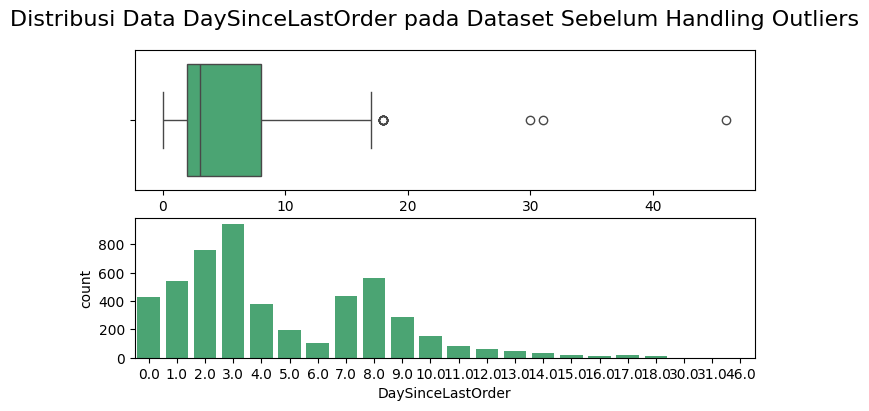

In [938]:
# Melihat distribusi data DaySinceLastOrder yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(8,4))

sns.boxplot(data=dfc, x='DaySinceLastOrder',ax=axes1, color='mediumseagreen')
sns.countplot(data=dfc, x='DaySinceLastOrder', ax=axes2, color='mediumseagreen')

fig.suptitle('Distribusi Data DaySinceLastOrder pada Dataset Sebelum Handling Outliers', size = 16)
plt.show()

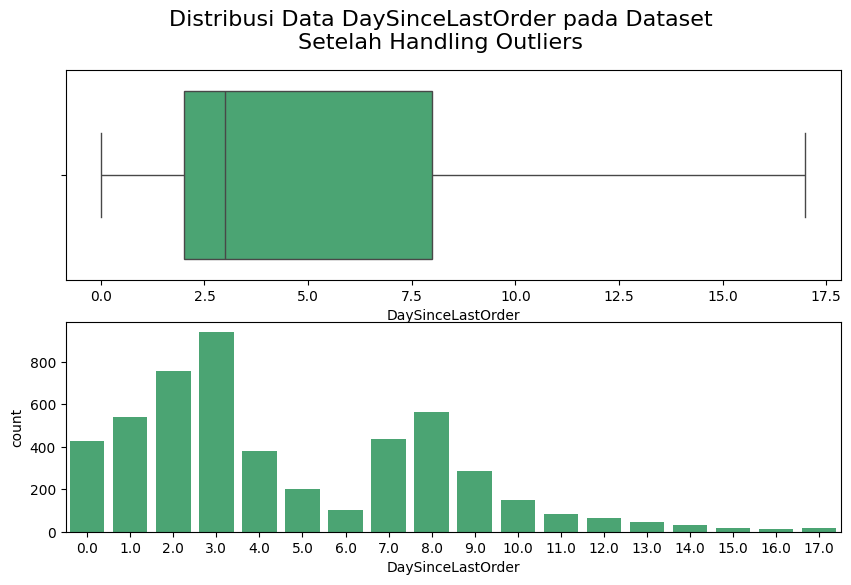

In [939]:
# Melakukan drop outliers pada DaySinceLastOrder
dfc = dfc.drop(dfc[dfc['DaySinceLastOrder'] > 17].index)

# Melihat distribusi data NumberOfAddress yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=dfc, x='DaySinceLastOrder',ax=axes1, color='mediumseagreen')
sns.countplot(data=dfc, x='DaySinceLastOrder', ax=axes2, color='mediumseagreen')

fig.suptitle('Distribusi Data DaySinceLastOrder pada Dataset\nSetelah Handling Outliers\n', size = 16)
plt.show()

In [940]:
len(dfc[dfc['DaySinceLastOrder'] > 17])

0

### CashbackAmount Outliers

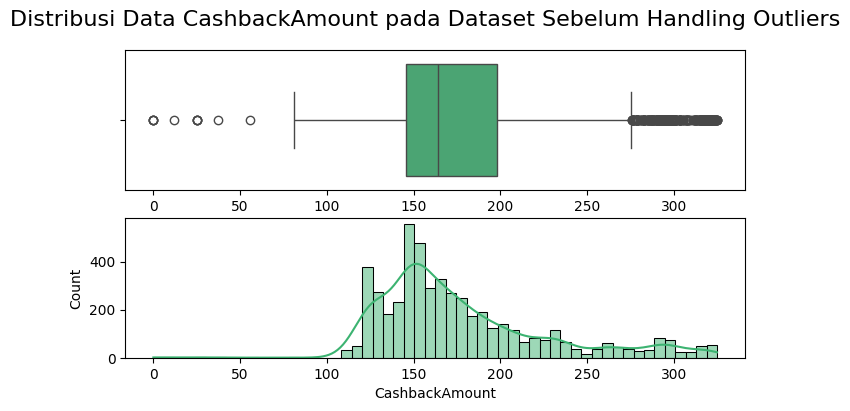

In [941]:
# Melihat distribusi data CashbackAmount yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(8,4))

sns.boxplot(data=dfc, x='CashbackAmount',ax=axes1, color='mediumseagreen')
sns.histplot(data=dfc, x='CashbackAmount', ax=axes2, color='mediumseagreen', kde=True)

fig.suptitle('Distribusi Data CashbackAmount pada Dataset Sebelum Handling Outliers', size = 16)
plt.show()

In [942]:
dfc[(dfc['CashbackAmount'] < 67.8625) | (dfc['CashbackAmount'] > 276.0025)]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
10        1     4.0         Mobile Phone         1             18.0   
40        0    23.0         Mobile Phone         1             17.0   
61        0    13.0         Mobile Phone         1             10.0   
62        0    28.0         Mobile Phone         1             20.0   
65        0    25.0         Mobile Phone         1              6.0   
...     ...     ...                  ...       ...              ...   
5511      0    22.0             Computer         1             29.0   
5534      0    61.0         Mobile Phone         3             28.0   
5537      0    23.0             Computer         1              9.0   
5597      0    13.0             Computer         1             16.0   
5603      0    16.0         Mobile Phone         1              9.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
10       Cash on Delivery  Female             2.0                         3   
40             Debit Card  Female             2.0                         3   
61            Credit Card  Female             2.0                         3   
62            Credit Card    Male             3.0                         2   
65             Debit Card    Male             3.0                         4   
...                   ...     ...             ...                       ...   
5511          Credit Card  Female             3.0                         4   
5534           Debit Card  Female             4.0                         4   
5537           Debit Card    Male             3.0                         4   
5597           Debit Card    Male             3.0                         4   
5603           Debit Card    Male             3.0                         4   

     PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
10              Others                  3      Divorced                2   
40              Others                  4        Single                4   
61              Others                  3      Divorced                2   
62              Others                  4        Single                9   
65              Others                  3      Divorced                1   
...                ...                ...           ...              ...   
5511           Grocery                  1       Married                5   
5534           Grocery                  1       Married                6   
5537            Others                  1       Married                5   
5597            Others                  1        Single                4   
5603            Others                  3       Married                7   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
10           0                         14.0         9.0        15.0   
40           0                         14.0         2.0         4.0   
61           0                         14.0         5.0         9.0   
62           0                         11.0         1.0         2.0   
65           0                         15.0         1.0        11.0   
...        ...                          ...         ...         ...   
5511         0                         15.0         2.0         5.0   
5534         1                         15.0         1.0         2.0   
5537         0                         15.0         5.0         5.0   
5597         0                         15.0         2.0         2.0   
5603         0                         15.0         1.0         5.0   

      DaySinceLastOrder  CashbackAmount  
10                  8.0          295.45  
40                  4.0          299.26  
61                  9.0          290.33  
62                 15.0          287.22  
65                  9.0          299.99  
...                 ...             ...  
5511                8.0          296.74  
5534                1.0          303.75  
5537                4.0          316.61  
5597              

In [943]:
dfc['PreferredOrderCat'].value_counts()

PreferredOrderCat
Mobile Phone          1849
Laptop & Accessory    1843
Fashion                762
Grocery                362
Others                 242
Name: count, dtype: int64

In [944]:
dfc[(dfc['CashbackAmount'] < 67.8625) | (dfc['CashbackAmount'] > 276.0025)]['PreferredOrderCat'].value_counts()

PreferredOrderCat
Others                242
Grocery               127
Laptop & Accessory      6
Mobile Phone            3
Name: count, dtype: int64

Seluruh data dengan PreferredOrderCat = 'Others' memiliki nilai CashbackAmount yang tergolong outliers. Jika kita menghapus outliers CashbackAmount, artinya kita akan menghapus seluruh data dengan nilai PreferredOrderCat = 'Others'. Maka, kita tidak akan menghapus outliers CashbackAmount yang memiliki nilai PreferredOrderCat = 'Others', karena jika model yang dibuat dideploy ke data e-commerce asli yang memiliki kategori 'Others', model akan menghasilkan performa yang buruk karena model tidak pernah dilatih pada data tersebut.

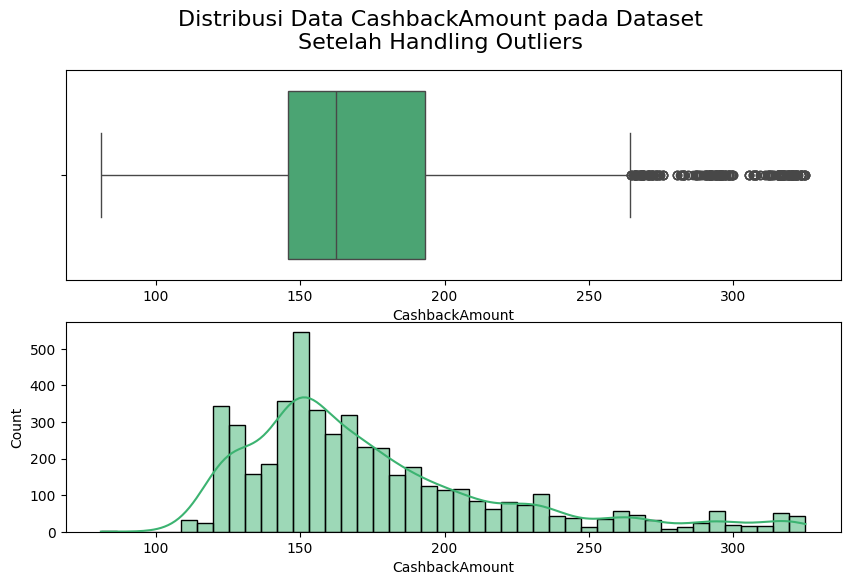

In [945]:
# Melakukan drop outliers CashbackAmount yang telah disesuaikan
dfc = dfc.drop(dfc[(dfc['CashbackAmount'] < 67.8625) | (dfc['CashbackAmount'] > 276.0025) & (dfc['PreferredOrderCat'] != 'Others')].index)

# Melihat distribusi data CashbackAmount yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=dfc, x='CashbackAmount',ax=axes1, color='mediumseagreen')
sns.histplot(data=dfc, x='CashbackAmount', ax=axes2,kde=True, color='mediumseagreen')

fig.suptitle('Distribusi Data CashbackAmount pada Dataset\nSetelah Handling Outliers\n', size = 16)
plt.show()

In [946]:
display(len(dfc[(dfc['CashbackAmount'] < 67.8625) | (dfc['CashbackAmount'] > 276.0025)]))

display(dfc['PreferredOrderCat'].value_counts())

242

PreferredOrderCat
Mobile Phone          1846
Laptop & Accessory    1837
Fashion                762
Others                 242
Grocery                235
Name: count, dtype: int64

## Adding Monetary Column for Tableau Purposes

Penambahan kolom(feature) ini didasari referensi dari domain knowledge dan penelitian terdahulu terkait rata-rata harga pada tiap kategori produk yang terjual di seluruh dunia. Dan kolom ini ddigunakan untuk penambahan feature insight pada Dashboard Tableau. Adapun sebagai berikut uraian dan beserta referensi:
* Laptop & Accessory = USD 700/produk  [Quora](https://www.quora.com/What-is-the-average-cost-of-a-laptop)
* Mobile Phone = USD 250/produk [Marketingdive.com](https://www.marketingdive.com/ex/mobilemarketer/cms/news/research/1085.html#:~:text=The%20current%20average%20reported%20purchase,with%20fewer%20features%20is%20%2458.)
* Fashion = USD 53/produk [Intelligencenode.com](https://www.intelligencenode.com/retail-dashboard/fashion/)
* Grocery = USD 475/produk [USAtoday](https://www.usatoday.com/money/blueprint/credit-cards/average-grocery-cost/#:~:text=How%20much%20does%20the%20average,on%20groceries%20in%20a%20year.)
* Others = USD 325/produk [GripsIntelligence](https://gripsintelligence.com/insights/retailers/ikea.com) furniture, DIY, toys, hobbies product


In [947]:
def monetary(baris):
    # Total Monetary spend in each customer based on PreferredOrderCat
    if baris['PreferredOrderCat'] == 'Mobile Phone':
        return 250 * baris['OrderCount']
    elif baris['PreferredOrderCat'] == 'Laptop & Accessory':
        return 700 * baris['OrderCount']
    elif baris['PreferredOrderCat'] == 'Fashion':
        return 53 * baris['OrderCount']
    elif baris['PreferredOrderCat'] == 'Grocery':
        return 475* baris['OrderCount']
    elif baris['PreferredOrderCat'] == 'Others':
        return 325 * baris['OrderCount']
    else:
        return 0

dfc1 = dfc.copy()
dfc1['TotalSpending'] = dfc1.apply(monetary, axis =1)
dfc1.to_excel('ECommerce_Clean1.xlsx', index=False)

## **Summary Data Cleaning**

In [948]:
print('Jumlah baris dan kolom dalam dataset setelah cleaning: ', dfc.shape)

Jumlah baris dan kolom dalam dataset setelah cleaning:  (4922, 19)


In [949]:
listItem = []
for col in dfc.columns :
    listItem.append([col, dfc[col].dtype, dfc[col].isna().sum(), round((dfc[col].isna().sum()/len(dfc[col])) * 100,2),
                    dfc[col].nunique(), dfc[col].unique()]);

dfDesc1 = pd.DataFrame(columns=['Feature', 'Data Type', 'Number of Nulls', 'Null Percentage', 'Number of Unique Data', 'Unique Value'],
                     data=listItem)
pd.set_option('max_colwidth', None)
dfDesc1

Feature Data Type  Number of Nulls  Null Percentage  \
0                         Churn     int64                0              0.0   
1                        Tenure   float64                0              0.0   
2          PreferredLoginDevice    object                0              0.0   
3                      CityTier     int64                0              0.0   
4               WarehouseToHome   float64                0              0.0   
5          PreferredPaymentMode    object                0              0.0   
6                        Gender    object                0              0.0   
7                HourSpendOnApp   float64                0              0.0   
8      NumberOfDeviceRegistered     int64                0              0.0   
9             PreferredOrderCat    object                0              0.0   
10            SatisfactionScore     int64                0              0.0   
11                MaritalStatus    object                0              0.0   
12              NumberOfAddress     int64                0              0.0   
13                     Complain     int64                0              0.0   
14  OrderAmountHikeFromlastYear   float64                0              0.0   
15                   CouponUsed   float64                0              0.0   
16                   OrderCount   float64                0              0.0   
17            DaySinceLastOrder   float64                0              0.0   
18               CashbackAmount   float64                0              0.0   

    Number of Unique Data  \
0                       2   
1                      34   
2                       2   
3                       3   
4                      34   
5                       5   
6                       2   
7                       6   
8                       6   
9                       5   
10                      5   
11                      3   
12                     11   
13                      2   
14                     16   
15                     17   
16                     16   
17                     18   
18                   2506   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Value  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Dari hasil Data Cleaning yang telah dilakukan, ada beberapa poin penting yang perlu diketahui:
- Data akhir setelah cleaning ini memiliki Jumlah baris dan kolom dalam dataset setelah cleaning:  (4922, 19)
- Feature `CustomerID` telah di drop, feature tersebut tidak relevan pada analisis dan pemodelan ini karena hanya bertindak sebagai pembeda user satu dengan yang lainnya
- Menghapus data duplikat setelah drop kolom `CustomerID` sebanyak  556 data(baris)
- Renaming kolom variable `PreferedOrderCat` diubah menjadi `PreferredOrderCat`
- Missing Value Handled:

| No | Feature | Imputation Values |
| --- | --- | --- |
| 1 | `Tenure` | Median |
| 2 | `WarehouseToHome` | Median |
| 3 | `HourSpendOnApp` | Median |
| 4 | `OrderAmountHikeFromlastYear` | Median |
| 5 | `CouponUsed` | Median |
| 6 | `OrderCount` | Median |
| 7 | `DaySinceLastOrder` | Median |

- Inconsistent Data Handled:
  1. `PreferredLoginDevice`: 'Mobile Phone', 'Phone'
  2. `PreferredPaymentMode`: 'CC', 'Cash on Delivery', 'COD', 'Credit Card'
  3. `PreferredOrderCat`:  'Mobile', 'Mobile Phone'

- Outliers Handled: `NumberOfAddress`, `DaySinceLastOrder`, `CashbackAmount`




In [950]:
print('Jumlah baris dan kolom dalam dataset setelah cleaning: ', dfc.shape)

Jumlah baris dan kolom dalam dataset setelah cleaning:  (4922, 19)


In [951]:
listItem = []
for col in dfc.columns :
    listItem.append([col, dfc[col].dtype, dfc[col].isna().sum(), round((dfc[col].isna().sum()/len(dfc[col])) * 100,2),
                    dfc[col].nunique(), dfc[col].unique()]);

dfDesc1 = pd.DataFrame(columns=['Feature', 'Data Type', 'Number of Nulls', 'Null Percentage', 'Number of Unique Data', 'Unique Value'],
                     data=listItem)
pd.set_option('max_colwidth', None)
dfDesc1

Feature Data Type  Number of Nulls  Null Percentage  \
0                         Churn     int64                0              0.0   
1                        Tenure   float64                0              0.0   
2          PreferredLoginDevice    object                0              0.0   
3                      CityTier     int64                0              0.0   
4               WarehouseToHome   float64                0              0.0   
5          PreferredPaymentMode    object                0              0.0   
6                        Gender    object                0              0.0   
7                HourSpendOnApp   float64                0              0.0   
8      NumberOfDeviceRegistered     int64                0              0.0   
9             PreferredOrderCat    object                0              0.0   
10            SatisfactionScore     int64                0              0.0   
11                MaritalStatus    object                0              0.0   
12              NumberOfAddress     int64                0              0.0   
13                     Complain     int64                0              0.0   
14  OrderAmountHikeFromlastYear   float64                0              0.0   
15                   CouponUsed   float64                0              0.0   
16                   OrderCount   float64                0              0.0   
17            DaySinceLastOrder   float64                0              0.0   
18               CashbackAmount   float64                0              0.0   

    Number of Unique Data  \
0                       2   
1                      34   
2                       2   
3                       3   
4                      34   
5                       5   
6                       2   
7                       6   
8                       6   
9                       5   
10                      5   
11                      3   
12                     11   
13                      2   
14                     16   
15                     17   
16                     16   
17                     18   
18                   2506   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Value  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Dari hasil Data Cleaning yang telah dilakukan, ada beberapa poin penting yang perlu diketahui:
- Data akhir setelah cleaning ini memiliki Jumlah baris dan kolom dalam dataset setelah cleaning:  (4922, 19)
- Feature `CustomerID` telah di drop, feature tersebut tidak relevan pada analisis dan pemodelan ini karena hanya bertindak sebagai pembeda user satu dengan yang lainnya
- Menghapus data duplikat setelah drop kolom `CustomerID` sebanyak  556 data(baris)
- Renaming kolom variable `PreferedOrderCat` diubah menjadi `PreferredOrderCat`
- Missing Value Handled:

| No | Feature | Imputation Values |
| --- | --- | --- |
| 1 | `Tenure` | Median |
| 2 | `WarehouseToHome` | Median |
| 3 | `HourSpendOnApp` | Median |
| 4 | `OrderAmountHikeFromlastYear` | Median |
| 5 | `CouponUsed` | Median |
| 6 | `OrderCount` | Median |
| 7 | `DaySinceLastOrder` | Median |

- Inconsistent Data Handled:
  1. `PreferredLoginDevice`: 'Mobile Phone', 'Phone'
  2. `PreferredPaymentMode`: 'CC', 'Cash on Delivery', 'COD', 'Credit Card'
  3. `PreferredOrderCat`:  'Mobile', 'Mobile Phone'

- Outliers Handled: `NumberOfAddress`, `DaySinceLastOrder`, `CashbackAmount`





Saving Clean Data



In [952]:
dfc.to_excel('ECommerce_Clean.xlsx', index=False)

# **Data Analysis**
Analisis data perilaku pelanggan e-commerce adalah proses yang digunakan untuk memahami dan menginterpretasikan tindakan, preferensi, dan pola interaksi pelanggan dengan platform e-commerce. Tujuan utama dari analisis ini adalah untuk memahami faktor yang memengaruhi churn pelanggan, meningkatkan pengalaman pelanggan, meningkatkan retensi pelanggan, dan mendorong pertumbuhan bisnis.

In [953]:
# Read data clean for analysis
dfc = pd.read_excel('ECommerce_Clean.xlsx')
display(dfc.head(),dfc.tail())

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1       4         Mobile Phone         3                6   
1      1      11         Mobile Phone         1                8   
2      1      12         Mobile Phone         1               30   
3      1       0         Mobile Phone         3               15   
4      1       0         Mobile Phone         1               12   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female               3                         3   
1                  UPI    Male               3                         4   
2           Debit Card    Male               2                         4   
3           Debit Card    Male               2                         4   
4          Credit Card    Male               2                         3   

    PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4        Mobile Phone                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                           11           1           1   
1         1                           15           0           1   
2         1                           14           0           1   
3         0                           23           0           1   
4         0                           11           1           1   

   DaySinceLastOrder  CashbackAmount  
0                  5          159.93  
1                  0          120.90  
2                  3          120.28  
3                  3          134.07  
4                  3          129.60

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
4917      0       5             Computer         1               12   
4918      0       1         Mobile Phone         3               12   
4919      0      13         Mobile Phone         1               13   
4920      0       1         Mobile Phone         1               11   
4921      0       8         Mobile Phone         1               15   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
4917          Credit Card    Male               4                         4   
4918                  UPI  Female               2                         5   
4919          Credit Card    Male               3                         5   
4920           Debit Card    Male               3                         2   
4921          Credit Card    Male               3                         2   

       PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
4917  Laptop & Accessory                  5        Single                2   
4918        Mobile Phone                  3        Single                2   
4919             Fashion                  5       Married                6   
4920  Laptop & Accessory                  4       Married                3   
4921  Laptop & Accessory                  3       Married                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
4917         0                           20           2           2   
4918         0                           19           2           2   
4919         0                           16           1           2   
4920         1                           21           1           2   
4921         0                           13           2           2   

      DaySinceLastOrder  CashbackAmount  
4917                  3          224.36  
4918                  1          154.66  
4919                  3          224.91  
4920                  4          186.42  
4921                  3          169.04

In [954]:
dfc[dfc['CouponUsed'] == 4.5]

Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferredOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

## Multicollinearity Check
Pada tahap ini, cek multikolinearitas dilakukan terutama untuk tujuan interpretasi. Kehadiran multikolinearitas dapat berdampak signifikan pada model linear atau parametrik, seperti model regresi logistik, yang menggunakan rumus matematis. Namun, untuk model non-parametrik, seperti XGBoost dan random forest, multikolinearitas umumnya kurang berpengaruh dan dapat sering diabaikan.

In [955]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [956]:
calc_vif(dfc.select_dtypes(include='number'))

variables        VIF
0                         Churn   1.570459
1                        Tenure   3.602268
2                      CityTier   4.173704
3               WarehouseToHome   4.285998
4                HourSpendOnApp  18.684644
5      NumberOfDeviceRegistered  14.978054
6             SatisfactionScore   5.433422
7               NumberOfAddress   4.248769
8                      Complain   1.506069
9   OrderAmountHikeFromlastYear  14.539983
10                   CouponUsed   4.477627
11                   OrderCount   5.704563
12            DaySinceLastOrder   4.041045
13               CashbackAmount  20.967957

Tabel di atas menunjukkan nilai Variabel Inflasi Faktor (VIF) untuk setiap variabel dalam dataset. VIF adalah ukuran yang menunjukkan seberapa besar multikolinearitas (korelasi antar variabel independen) ada dalam model regresi. Nilai VIF yang lebih tinggi dari 10 biasanya menunjukkan adanya multikolinearitas yang tinggi.

- Variabel dengan nilai VIF tinggi (lebih dari 10), seperti HourSpendOnApp, NumberOfDeviceRegistered, OrderAmountHikeFromlastYear, dan CashbackAmount, menunjukkan adanya multikolinearitas yang signifikan.
- Variabel dengan nilai VIF rendah (di bawah 10), seperti Churn, Tenure, CityTier, WarehouseToHome, SatisfactionScore, NumberOfAddress, Complain, CouponUsed, OrderCount, dan DaySinceLastOrder, menunjukkan tidak adanya masalah multikolinearitas yang signifikan.

In [957]:
float_columns = dfc.select_dtypes(include='number').columns

for col in float_columns:
    corr, p_value = spearmanr(dfc[col], dfc['Churn'])

    if p_value < 0.05:
        print(f"{col} vs Churn:\nCorrelation: {corr:.4f} | P-value: {p_value:.4g} (significant)\n")
    else:
        print(f"{col} vs Churn:\nCorrelation: {corr:.4f} | P-value: {p_value:.4g} (not significant)\n")

Churn vs Churn:
Correlation: 1.0000 | P-value: 0 (significant)

Tenure vs Churn:
Correlation: -0.3828 | P-value: 1.539e-171 (significant)

CityTier vs Churn:
Correlation: 0.0982 | P-value: 5.155e-12 (significant)

WarehouseToHome vs Churn:
Correlation: 0.0748 | P-value: 1.464e-07 (significant)

HourSpendOnApp vs Churn:
Correlation: 0.0124 | P-value: 0.3861 (not significant)

NumberOfDeviceRegistered vs Churn:
Correlation: 0.1152 | P-value: 5.051e-16 (significant)

SatisfactionScore vs Churn:
Correlation: 0.1047 | P-value: 1.784e-13 (significant)

NumberOfAddress vs Churn:
Correlation: 0.0435 | P-value: 0.002276 (significant)

Complain vs Churn:
Correlation: 0.2505 | P-value: 2.617e-71 (significant)

OrderAmountHikeFromlastYear vs Churn:
Correlation: -0.0325 | P-value: 0.02256 (significant)

CouponUsed vs Churn:
Correlation: -0.0067 | P-value: 0.637 (not significant)

OrderCount vs Churn:
Correlation: -0.0109 | P-value: 0.4425 (not significant)

DaySinceLastOrder vs Churn:
Correlation: 

## Define Numerical and Categorical for Visualization

In [958]:
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferredOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CashbackAmount', 'NumberOfDeviceRegistered',
              'NumberOfAddress', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

## Count of Churn and No Churn

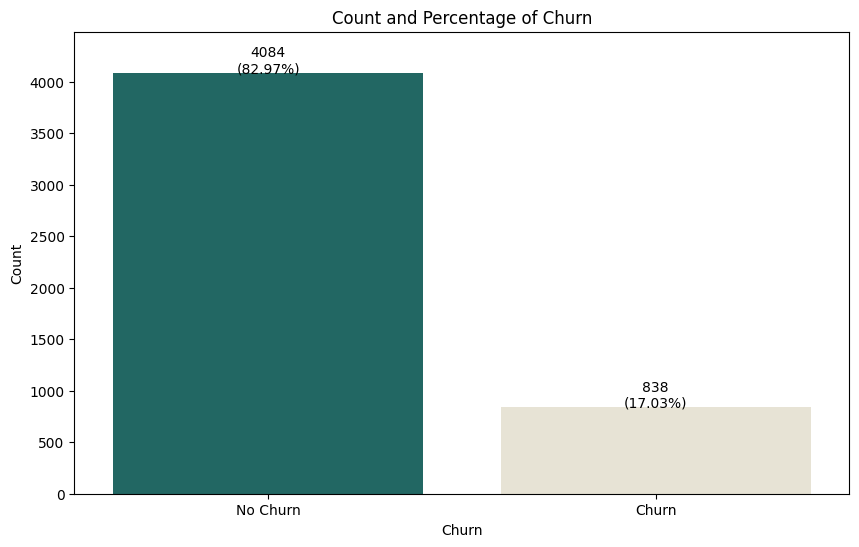

In [959]:
# Calculates percentage and number of churn
churn_counts = dfc['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']
churn_counts['Percentage'] = (churn_counts['Count'] / churn_counts['Count'].sum()) * 100

# Create plot bar
colors = ['#17726D', '#EAE4D2']
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='Count', data=churn_counts, palette=colors)

# Add teks
for i in range(churn_counts.shape[0]):
    count = churn_counts['Count'].iloc[i]
    percentage = churn_counts['Percentage'].iloc[i]
    plt.text(x=i,
             y=count + 0.5,
             s=f"{count}\n({percentage:.2f}%)",
             ha='center')

plt.title('Count and Percentage of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.ylim(0, churn_counts['Count'].max() + 400)
plt.show()

Berdasarkan plot diatas, pelanggan no churn mendominasi sejumlah 4084 (82.97%) dan pelanggan churn sejumlah 838 (17.03%). Walaupun pelanggan churn hanya 17% namun perlu dianalisis karena pengaruh pelanggan churn akan berdampak pada pertumbuhan perusahaan.

## Distributions of Numeric Features by Churn

In [960]:
discrete_vars = ['Tenure', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
continuous_vars = ['WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
num_vars = ['Tenure', 'NumberOfDeviceRegistered', 'HourSpendOnApp', 'DaySinceLastOrder', 'WarehouseToHome', 'NumberOfAddress', 'CouponUsed', 'OrderCount', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CashbackAmount']

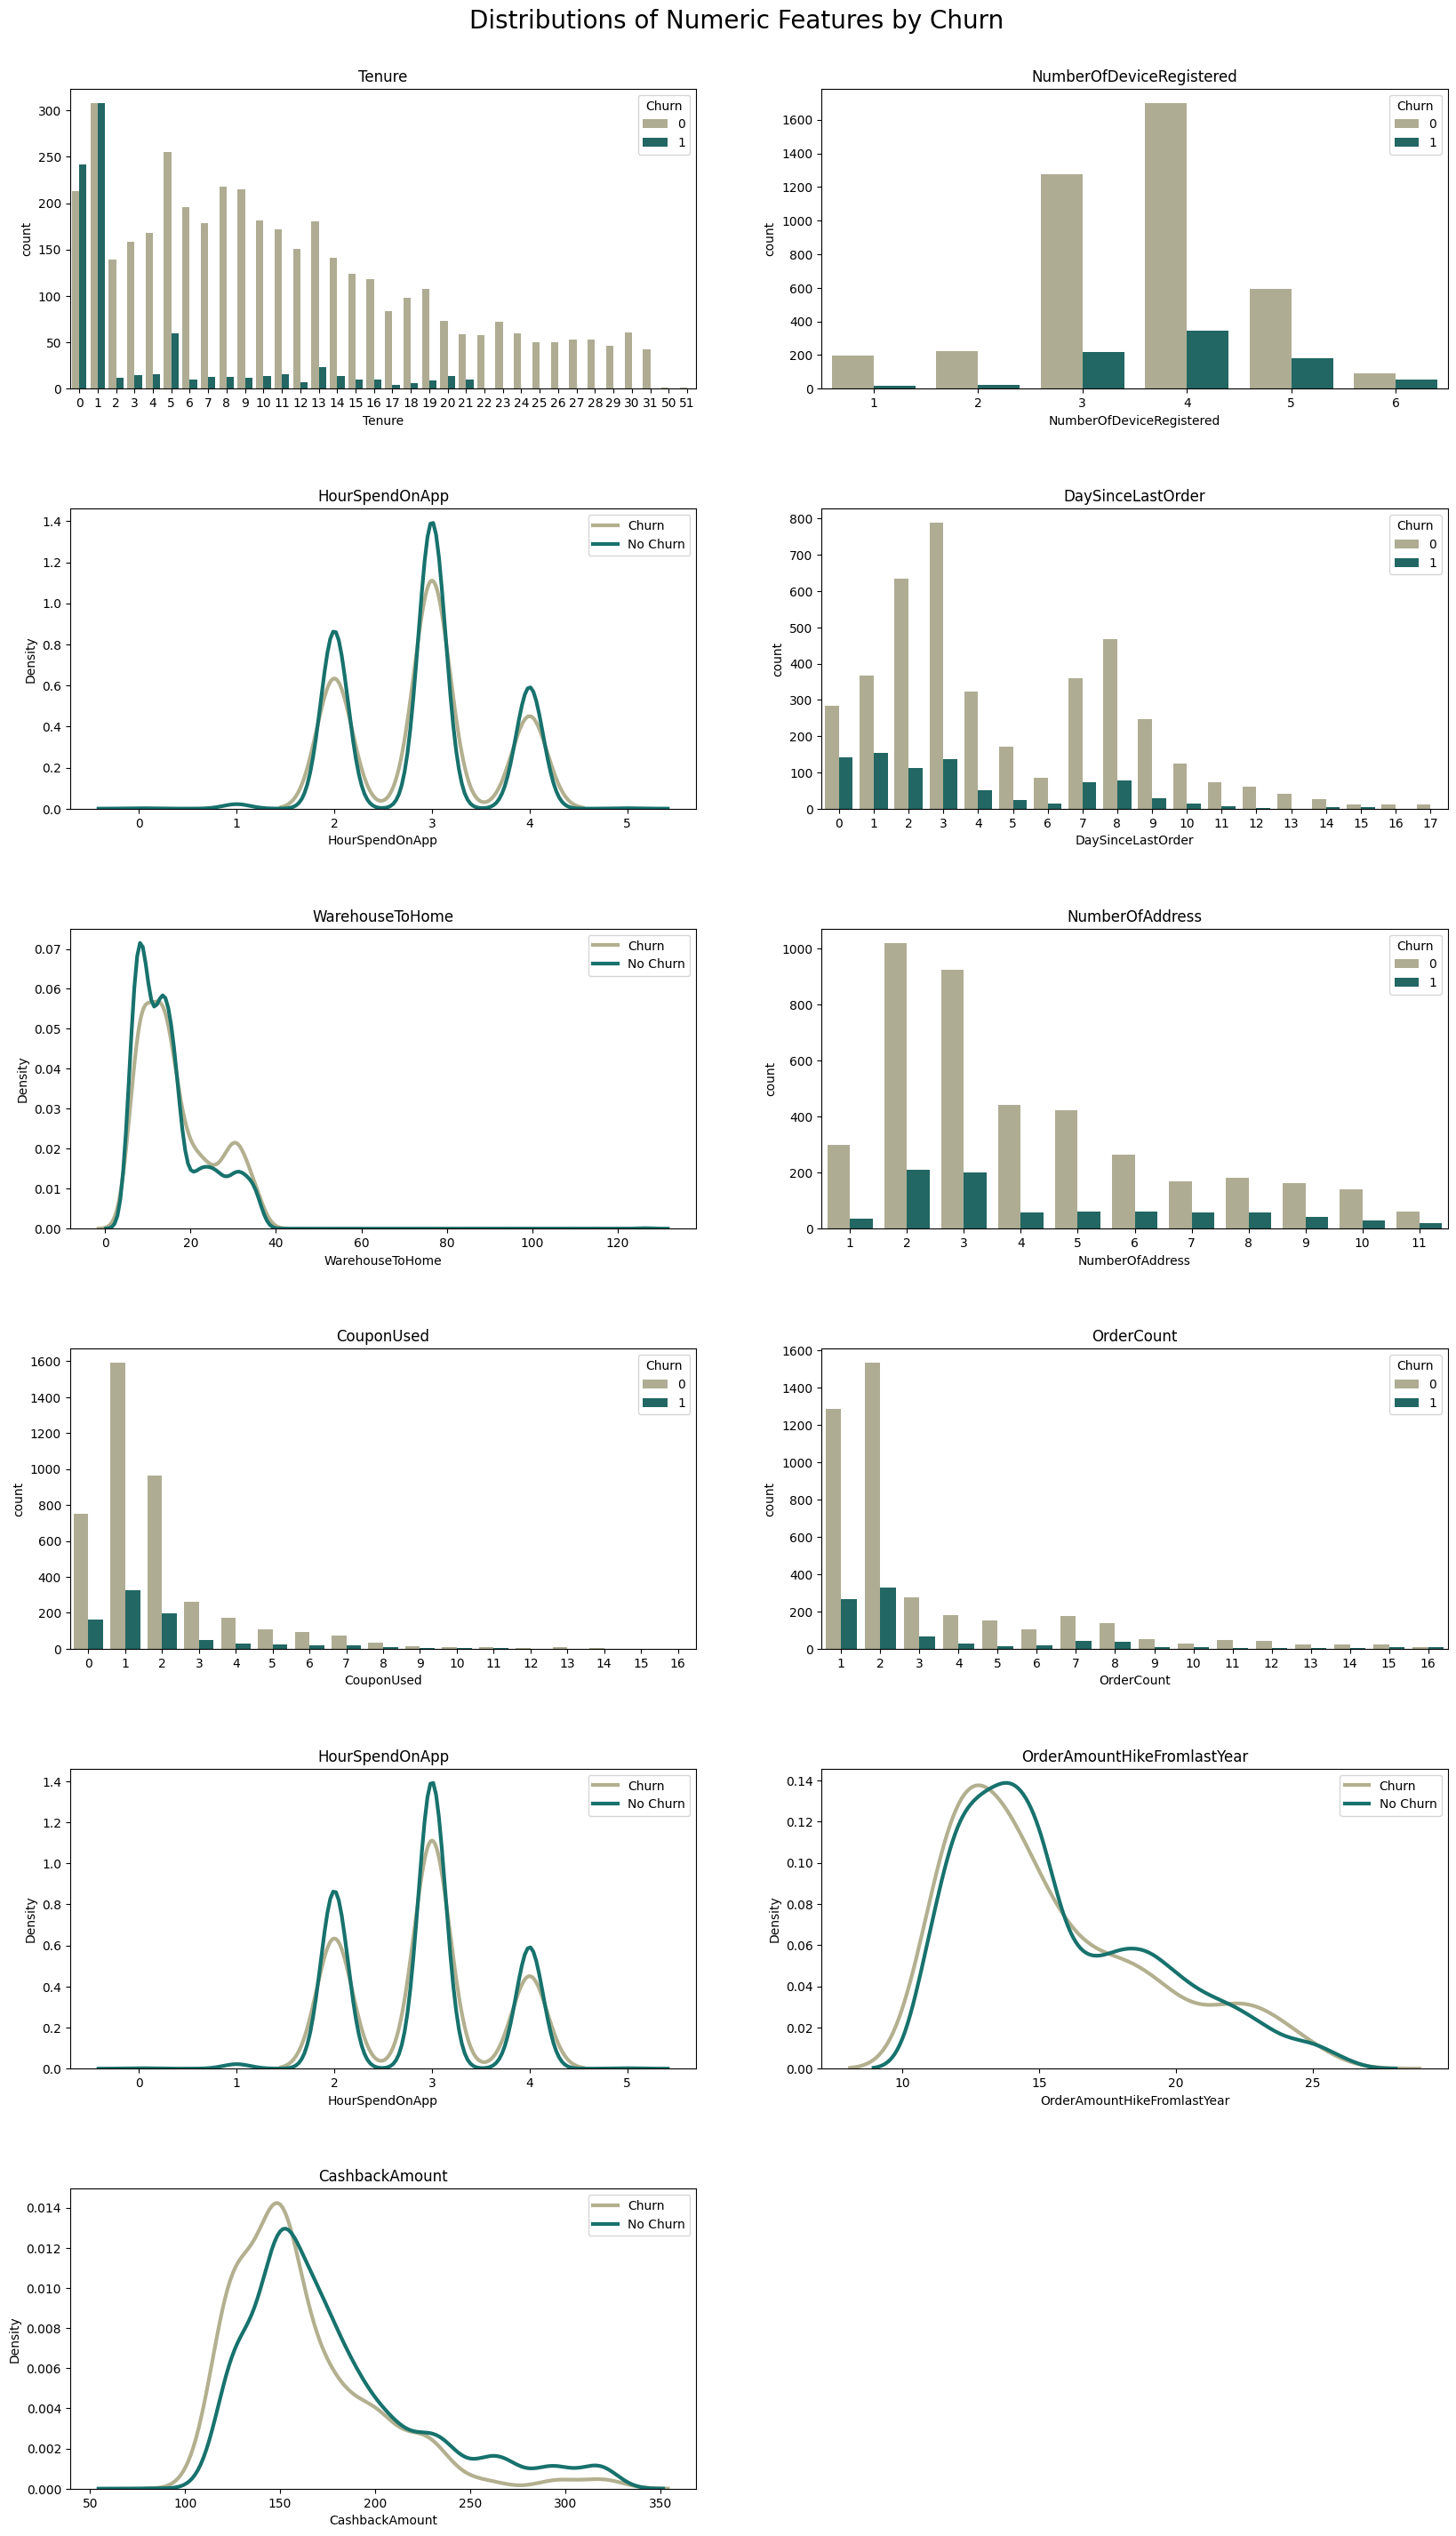

In [961]:
df_c = dfc[dfc['Churn']==1].copy()
df_nc = dfc[dfc['Churn']==0].copy()

# Membuat jumlah subplot sesuai jumlah kolom numerik

n_plots = len(num_vars)
n_rows = (n_plots // 2) + (n_plots % 2)

fig, ax = plt.subplots(n_rows, 2, figsize=(20, n_rows * 5))
fig.suptitle('Distributions of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

# Plot berdasarkan tipe variabel
for idx, c in enumerate(num_vars):
    if c in discrete_vars:
        sns.countplot(x=c, hue='Churn', data=dfc, palette=['#B2B08F', '#17726D'], ax=ax[idx])
    else:
        sns.kdeplot(df_c[c], linewidth=3, label='Churn', color='#B2B08F', ax=ax[idx])
        sns.kdeplot(df_nc[c], linewidth=3, label='No Churn', color='#17726D', ax=ax[idx])
        ax[idx].legend(loc='upper right')
    ax[idx].set_title(c)

if n_plots % 2 != 0:
    fig.delaxes(ax[-1])

plt.subplots_adjust(bottom=0.05, top=0.95, hspace=0.4)
plt.show()

Dari density plot di atas, dapat dilihat bahwa:
- Pelanggan yang churn umumnya memiliki nilai lebih rendah pada fitur-fitur seperti `Tenure`, `CashbackAmount`, `OrderAmountHikeFromlastYear`, `CouponUsed`, dan `OrderCount`. Pelanggan baru dengan tenure yang rendah mungkin merasa tidak dihargai saat melakukan transaksi karena mereka tidak menerima banyak kupon atau cashback yang menarik. Hal ini menyebabkan jumlah pesanan mereka sedikit karena pengalaman berbelanja yang kurang memuaskan. Semua faktor ini berkontribusi pada keputusan pelanggan untuk churn, karena mereka mencari alternatif yang lebih baik yang dianggap lebih memenuhi kebutuhan dan harapan mereka.
- Fitur seperti `HourSpendOnApp` dan `NumberOfDeviceRegistered` menunjukkan perbedaan pola yang signifikan antara pelanggan churn dan non-churn.
- Beberapa fitur, seperti `WarehouseToHome` dan `NumberOfAddress`, menunjukkan distribusi yang mirip antara kedua kelompok, yang menunjukkan bahwa fitur-fitur ini mungkin kurang berpengaruh terhadap churn.

## Distributions of Categoric Features by Churn

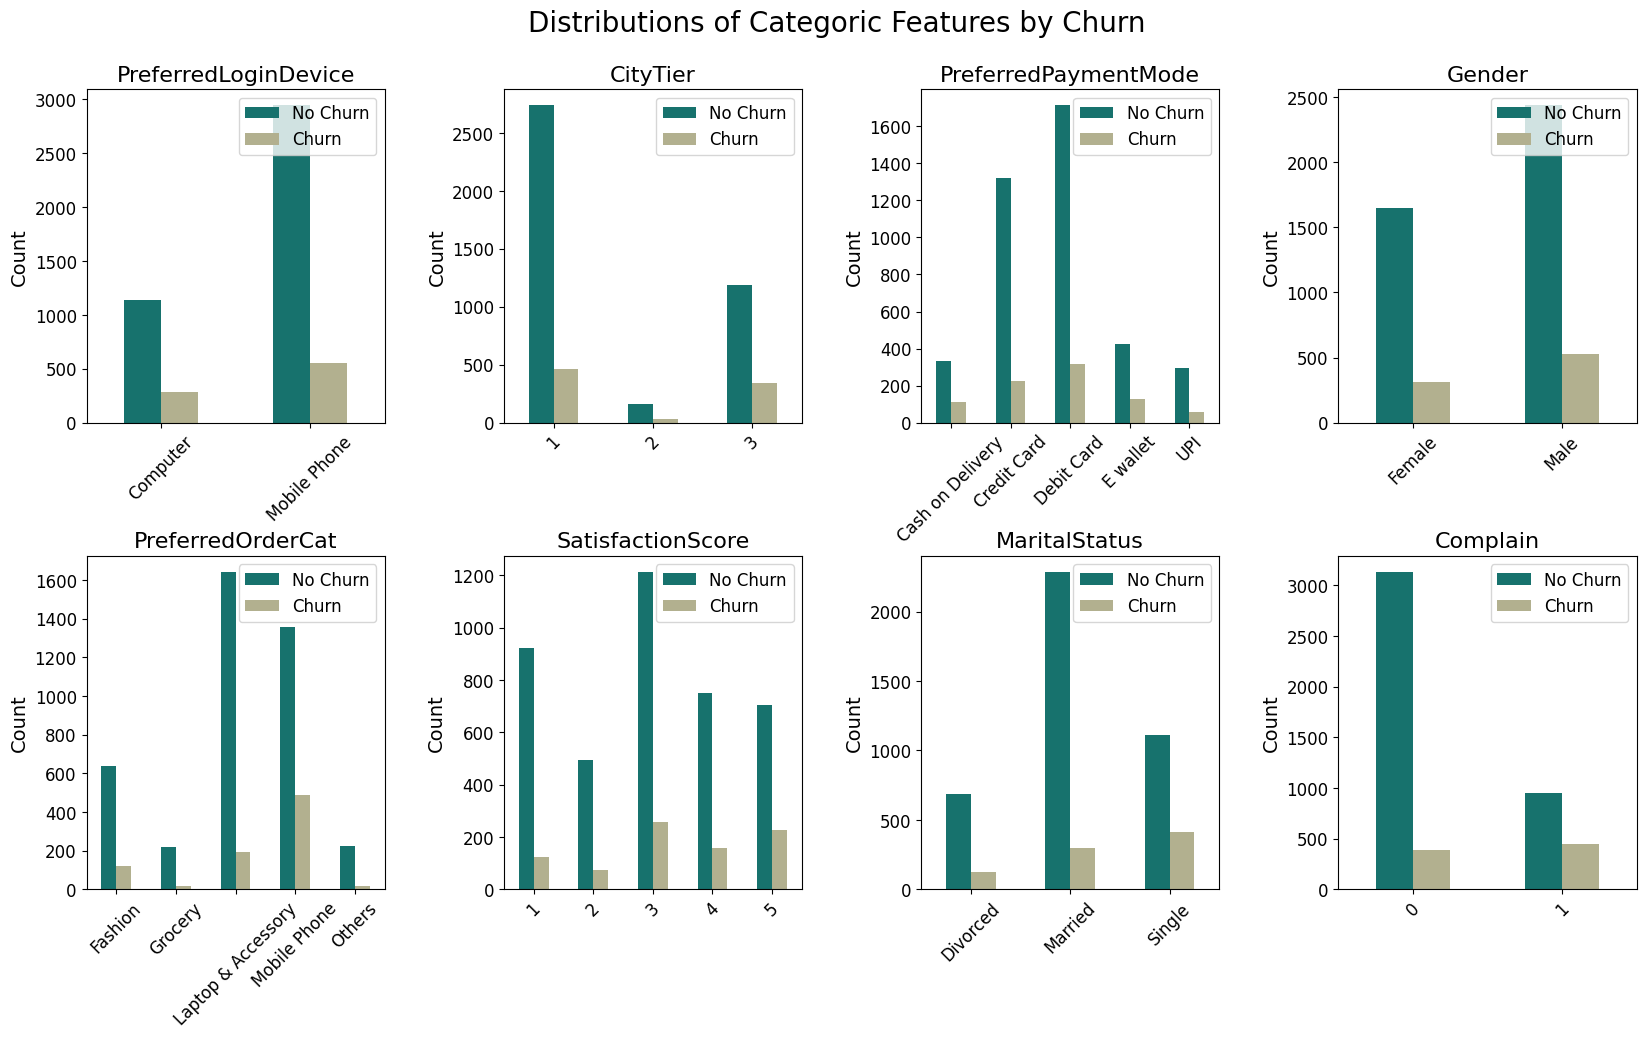

In [962]:
# Assuming df_c and df_nc are already defined and contain the churn and no churn data
# Assuming cat_cols is the list of categorical columns

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distributions of Categoric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx, c in enumerate(cat_cols):
    churn_counts = df_c[c].value_counts().sort_index()
    no_churn_counts = df_nc[c].value_counts().sort_index()

    combined_df = pd.DataFrame({
        'No Churn': no_churn_counts,
        'Churn': churn_counts
    }).fillna(0)

    combined_df.plot(kind='bar', ax=ax[idx], color=['#17726D', '#B2B08F'])
    ax[idx].set_title(c, fontsize=16)
    ax[idx].legend(loc='upper right', fontsize=12)
    ax[idx].set_xlabel('')
    ax[idx].set_ylabel('Count', fontsize=14)
    ax[idx].tick_params(axis='x', rotation=45, labelsize=12)
    ax[idx].tick_params(axis='y', labelsize=12)

# Adjust layout to ensure space for the bottom margin and improve overall layout
plt.subplots_adjust(bottom=0.1, top=0.9, hspace=0.4, wspace=0.4)
plt.show()


**Interpretasi Distribusi Kategorik:**

- `PreferredLoginDevice`: Dari 1422 pelanggan yang menggunakan komputer untuk *log-in*, 392 di antaranya memilih untuk churn (27.6%). Proporsi churn yang cukup tinggi ini mengindikasikan bahwa pelanggan yang *log-in* dengan koputer mengalami ketidaknyamanan yang membuat mereka memutuskan untuk churn.
- `CityTier`: Tingkat churn terlihat serupa di seluruh tingkatan, sehingga tingkat kota tampaknya tidak dapat memprediksi churn.
- `PreferredPaymentMode`: Pelanggan yang lebih menyukai pembayaran `Cash on Delivery` memiliki proporsi churn yang tinggi. Hal ini mengindikasikan adanya masalah yang membuat pelanggan tidak nyaman.
- `Gender`: Pelanggan laki-laki lebih cenderung churn dibandingkan pelanggan perempuan.
- `PreferredOrderCat`: Pelanggan yang lebih menyukai kategori `Mobile Phone` dan `Fashion` dalam sebulan terakhir lebih cenderung churn dibandingkan dengan kategori lainnya.
- `SatisfactionScore`: Skor kepuasan yang lebih tinggi berhubungan erat dengan churn yang lebih rendah karena tentunya kepuasan merupakan faktor yang memengaruhi churn.
- `MaritalStatus`: Pelanggan yang lebih `Single` memiliki peluang churn yang lebih besar.
- `Complain`: Mayoritas pelanggan churn memiliki keluhan dalam satu bulan terakhir. Keluhan merupakan tanda akan adanya masalah sehingga memiliki korelasi erat dengan churn.



## Customer segmentation analysis based on characteristics
Segmentasi pelanggan berdasarkan karakteristik melibatkan pengelompokan pelanggan berdasarkan atribut demografis dan psikografis, seperti jenis kelamin (`Gender`), tingkat kota (`CityTier`), jarak dari gudang ke rumah (`WarehouseToHome`), dan status pernikahan (`MaritalStatus`). Kemudian, karena data kita tidak berdistribusi normal, kita perlu melakukan analisis dengan uji statistik nonparametrik.

### 1.Is there a relationship between `Gender` and `Churn`? Which Gender has more Orders?

In [963]:
# Count of Gender
pd.DataFrame(dfc['Gender'].value_counts())

count
Gender       
Male     2967
Female   1955

In [964]:
# Count of Churn by Gender
pd.DataFrame(dfc.groupby('Churn')['Gender'].value_counts())

count
Churn Gender       
0     Male     2438
      Female   1646
1     Male      529
      Female    309

In [965]:
cross_tab=pd.crosstab(dfc['Gender'],dfc['Churn'])
cross_tab[1]

Gender
Female    309
Male      529
Name: 1, dtype: int64

In [966]:
stats, p_val=proportions_ztest(cross_tab[1], cross_tab.sum(axis=1), alternative='smaller')
print('H0: Tidak ada perbedaan signifikan antara proporsi churn pelanggan perempuan dan laki-laki')
print('H1: Proporsi churn pelanggan perempuan lebih kecil daripada proporsi churn pelanggan laki-laki')
print('p-value =', p_val/2)
if p_val/2 <= 0.05:
    print("Tolak H0")
    print("Ada cukup bukti untuk menolak H0")
    print('Terdapat cukup bukti untuk menyatakan bahwa proporsi churn perempuan lebih kecil dibandingkan proporsi churn laki-laki')

else:
    print('Gagal Tolak H0')
    print("Tidak ada cukup bukti untuk menolak H0")
    print('Tidak terdapat cukup bukti untuk menyatakan bahwa proporsi churn perempuan lebih kecil dibandingkan proporsi churn laki-laki')


H0: Tidak ada perbedaan signifikan antara proporsi churn pelanggan perempuan dan laki-laki
H1: Proporsi churn pelanggan perempuan lebih kecil daripada proporsi churn pelanggan laki-laki
p-value = 0.016133615118830845
Tolak H0
Ada cukup bukti untuk menolak H0
Terdapat cukup bukti untuk menyatakan bahwa proporsi churn perempuan lebih kecil dibandingkan proporsi churn laki-laki


In [967]:
# Create figure
fig = px.pie(dfc, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors = ['#EAE4D2','#17726D']), textinfo='label+percent')

# Update layout
fig.update_layout(
  title='Churn Rate by Gender',
  legend_title='Gender'
)

# Show plot
fig.show()

Dari hasil di atas, disimpulkan bahwa customer laki-laki lebih cenderung churn dibandingkan customer perempuan. Menurut penilitian Menylk et al. (2009), perempuan cenderung lebih loyal dan terlibat secara emosional dengan merek dan platform belanja yang mereka sukai. Mereka mungkin lebih aktif dalam program loyalitas, ulasan produk, dan interaksi dengan layanan pelanggan. Sedangkan laki-laki kurang terlibat secara emosional dan lebih pragmatis, sehingga lebih mudah berpindah ke platform lain jika ada masalah kecil atau penawaran yang lebih baik di tempat lain (Rodgers & Harris, 2003).

Sumber:
- Melnyk, V., Van Osselaer, S. M., & Bijmolt, T. H. (2009). Are women more loyal customers than men? Gender differences in loyalty to firms and individual service providers. Journal of Marketing, 73(4), 82-96.
- Rodgers, S., & Harris, M. A. (2003). Gender and e-commerce: An exploratory study. Journal of Retailing and Consumer Services, 10(6), 445-458.

In [968]:
# Count of OrderCount by Gender
pd.DataFrame(dfc.groupby('Gender')['OrderCount'].value_counts())

count
Gender OrderCount       
Female 2             709
       1             613
       3             119
       7              98
       4              91
       8              75
       5              73
       6              53
       9              23
       11             20
       15             18
       12             18
       10             17
       16             10
       14              9
       13              9
Male   2            1151
       1             939
       3             222
       4             119
       7             119
       8              98
       5              91
       6              68
       9              33
       11             29
       12             27
       14             19
       10             18
       13             16
       15             12
       16              6

In [969]:
t_score, p_val = mannwhitneyu(dfc[dfc['Gender']=='Female']['OrderCount'],
                             dfc[dfc['Gender']=='Male']['OrderCount'], alternative='greater')
print('H0: Tidak ada perbedaan signifikan antara median order yang dibuat perempuan dan laki-laki')
print('H1: Median order yang dibuat pelanggan perempuan lebih besar dibandingkan median order yang dibuat pelanggan laki-laki')
print('p-value =', p_val/2)
if p_val/2 <= 0.05:
  print("Tolak H0")
  print("Ada cukup bukti untuk menolak H0")
  print('Terdapat cukup bukti untuk menyatakan bahwa customer perempuan membuat lebih banyak pesanan (dalam sebulan terakhir) dibandingkan dengan customer laki-laki')

else:
  print("Gagal tolak H0")
  print("Tidak ada cukup bukti untuk menolak H0")
  print('Tidak ada cukup bukti untuk menyatakan bahwa customer perempuan membuat lebih banyak pesanan dibandingkan dengan customer laki-laki')

H0: Tidak ada perbedaan signifikan antara median order yang dibuat perempuan dan laki-laki
H1: Median order yang dibuat pelanggan perempuan lebih besar dibandingkan median order yang dibuat pelanggan laki-laki
p-value = 0.02114783746091459
Tolak H0
Ada cukup bukti untuk menolak H0
Terdapat cukup bukti untuk menyatakan bahwa customer perempuan membuat lebih banyak pesanan (dalam sebulan terakhir) dibandingkan dengan customer laki-laki


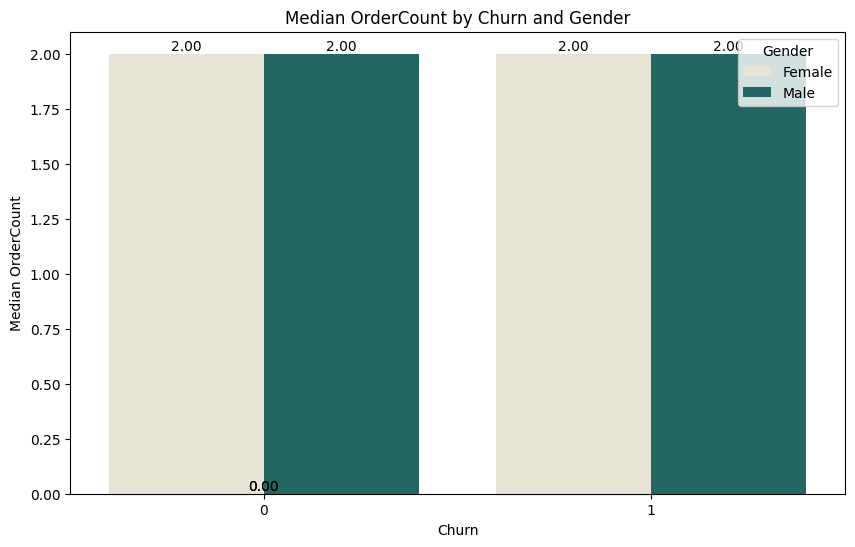

In [970]:
# Average OrderCount by Churn and Gender
median_order_count_by_churn_gender = dfc.groupby(['Churn', 'Gender'])['OrderCount'].median().reset_index()

# Create bar plot
colors = ['#EAE4D2', '#17726D']
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Churn', y='OrderCount', hue='Gender', data=median_order_count_by_churn_gender, palette=colors)

# Add Teks
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}',
                     xy=(p.get_x() + p.get_width() / 2., height),
                     xytext=(0, 5),  # 5 points vertical offset
                     textcoords='offset points',
                     ha='center', va='center')

plt.title('Median OrderCount by Churn and Gender')
plt.xlabel('Churn')
plt.ylabel('Median OrderCount')
plt.show()

Plot yang di atas menunjukkan bahwa median order count untuk laki-laki dan perempuan pada kedua kondisi churn (0 dan 1) tampak sama meskipun uji statistik Mann-Whitney menghasilkan p-value sebesar 0.021 yang menyimpulkan terdapat perbedaan signifikan secara statistik pada tingkat signifikansi 5%. Hal ini terjadi karena, signifikan secara statistik tidak selalu berarti perbedaan yang sangat besar atau jelas terlihat pada plot. Uji statistik sensitif terhadap ukuran sampel dan variasi dalam data, sehingga bisa mendeteksi perbedaan kecil yang mungkin tidak terlihat jelas pada visualisasi sederhana.

Dari hasil tersebut, kita simpulkan bahwa `Gender` customer memengaruhi variabel `OrderCount`, di mana customer perempuan lebih sering melakukan order dibandingkan customer laki-laki. Penelitian yang dilakukan oleh Dittmar, Long, & Bond (2007) menunjukkan bahwa perempuan cenderung lebih sering melakukan pembelian online dibandingkan laki-laki. Selain itu, perempuan lebih menikmati pengalaman berbelanja dan lebih sering mencari produk, membandingkan harga, serta memanfaatkan diskon dan promosi.

Sumber:
- Dittmar, H., Long, K., & Bond, R. (2007). When a better self is only a button click away: Associations between materialistic values, emotional and identity-related buying motives, and compulsive buying tendency online. Journal of Consumer Research, 32(3), 567-580.


### 2.Which `MartialStatus` has the highest `Churn` rate?

In [971]:
cross_tab = pd.crosstab(dfc['MaritalStatus'], dfc['Churn'])
cross_tab

Churn             0    1
MaritalStatus           
Divorced        689  124
Married        2286  301
Single         1109  413

In [972]:
p_val = chi2_contingency(cross_tab)[1]
print('H0: Tidak ada perbedaan signifikan antara proporsi churn pelanggan single, married, dan divorced')
print('H1: Ada perbedaan signifikan antara proporsi churn pelanggan single, married, dan divorced')
print('p-value =', p_val)
if p_val > 0.05:
  print('Gagal tolak H0')
  print("Tidak ada cukup bukti untuk menolak H0")
  print('Tidak ada hubungan antara status pernikahan dan churn pelanggan')
else:
  print('Tolak H0')
  print("Ada cukup bukti untuk menolak H0")
  print('Status pernikahan memengaruhi churn pelanggan')

H0: Tidak ada perbedaan signifikan antara proporsi churn pelanggan single, married, dan divorced
H1: Ada perbedaan signifikan antara proporsi churn pelanggan single, married, dan divorced
p-value = 1.3831291277678752e-36
Tolak H0
Ada cukup bukti untuk menolak H0
Status pernikahan memengaruhi churn pelanggan


Text(0, 0.5, 'Churn Count')

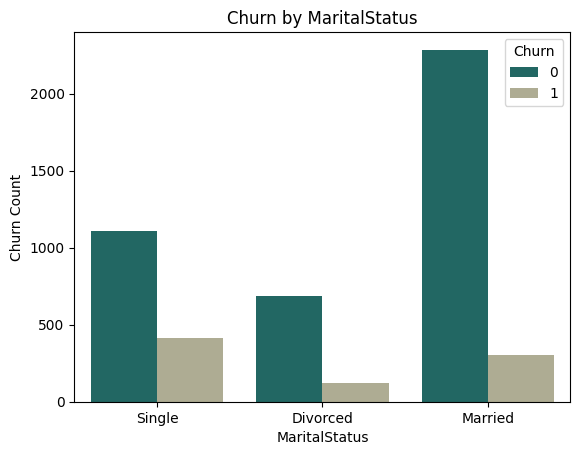

In [973]:
colors = ['#17726D', '#B2B08F']
sns.countplot(x='MaritalStatus', hue='Churn',data=dfc,palette=colors)
plt.title("Churn by MaritalStatus")
plt.ylabel("Churn Count")

Dari hasil di atas, dapat dilihat bahwa proporsi churn didominasi oleh customer lajang. Hal ini kemungkinan disebabkan oleh:
- Kebutuhan dan preferensi belanja customer single yang mungkin lebih dinamis dan berubah-ubah. Mereka mungkin sering mencari produk atau layanan yang sesuai dengan gaya hidup mereka yang berubah, sehingga lebih mudah churn jika platform tidak dapat memenuhi kebutuhan mereka dengan cepat. Customer married atau divorced mungkin memiliki kebutuhan yang lebih stabil dan terencana.
- Customer single mungkin memiliki kebutuhan belanja yang lebih sederhana dan tidak terlalu rutin dibandingkan dengan customer married atau divorced yang mungkin berbelanja untuk keluarga atau anak-anak. Dengan kebutuhan yang lebih sederhana, customer single mungkin lebih fleksibel dan lebih mudah berpindah ke platform lain yang menawarkan promosi atau diskon yang lebih menarik.

### 3.Is there a relationship between `CityTier` and `Tenure` or `OrderCount`? Which `CityTier` has the highest `Tenure` and `OrderCount`?

`Tenure` and `CityTier`

In [974]:
city1 = dfc[dfc['CityTier'] == 1]['Tenure']
city2 = dfc[dfc['CityTier'] == 2]['Tenure']
city3 = dfc[dfc['CityTier'] == 3]['Tenure']
print('H0: Tidak ada perbedaan signifikan antara median tenure city tier 1, 2, dan 3')
print('H1: Ada perbedaan signifikan antara median tenure city tier 1, 2, dan 3')
fscore, p_val = kruskal(city1, city2, city3)
print('p-value = ', p_val)
if p_val < 0.05:
    print('Tolak H0')
    print("Ada cukup bukti untuk menolak H0")
    print('Setidaknya ada satu CityTier yang memiliki median Tenure yang berbeda')
else:
    print('Gagal tolak H0')
    print("Tidak ada cukup bukti untuk menolak H0")
    print('Tidak ada perbedaan signifikan antara median Tenure CityTier1, CityTier2, dan CityTier3')

H0: Tidak ada perbedaan signifikan antara median tenure city tier 1, 2, dan 3
H1: Ada perbedaan signifikan antara median tenure city tier 1, 2, dan 3
p-value =  1.3115311356789268e-06
Tolak H0
Ada cukup bukti untuk menolak H0
Setidaknya ada satu CityTier yang memiliki median Tenure yang berbeda


In [975]:
# mean & max Tenure by citytier
dfc_grouped_tenure = dfc.groupby('CityTier')['Tenure'].agg(['median', 'max'])
dfc_grouped_tenure

median  max
CityTier             
1            9.0   51
2           11.0   31
3            7.0   31

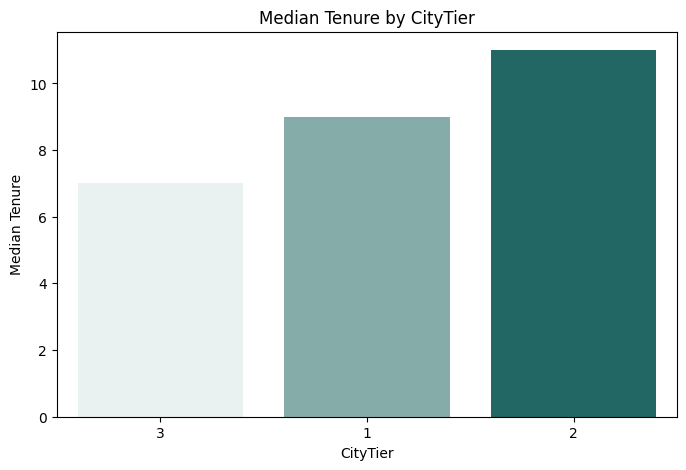

In [976]:
tenure_by_tier = dfc.groupby('CityTier')['Tenure'].median().reset_index()

base_color = '#17726D'
colors = sns.light_palette(base_color, n_colors=len(tenure_by_tier))

# Creating the bar plot with seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='CityTier', y='Tenure', data=tenure_by_tier, palette= colors, order=tenure_by_tier.sort_values('Tenure').CityTier)
plt.xlabel('CityTier')
plt.ylabel('Median Tenure')
plt.title('Median Tenure by CityTier')
plt.show()

`OrderCount` and `CityTier`

In [977]:
city1 = dfc[dfc['CityTier'] == 1]['OrderCount']
city2 = dfc[dfc['CityTier'] == 2]['OrderCount']
city3 = dfc[dfc['CityTier'] == 3]['OrderCount']
print('H0: Tidak ada perbedaan signifikan antara median jumlah order yang dibuat oleh pelanggan dari city tier 1, 2, dan 3')
print('H1: Ada perbedaan signifikan antara median jumlah order yang dibuat oleh pelanggan dari city tier 1, 2, dan 3')
fscore, p_val = kruskal(city1, city2, city3)
print('p-value = ', p_val)
if p_val < 0.05:
    print('Tolak H0')
    print("Ada cukup bukti untuk menolak H0")
    print('Setidaknya ada satu CityTier yang memiliki median OrderCount yang berbeda')
else:
    print('Gagal tolak H0')
    print("Tidak ada cukup bukti untuk menolak H0")
    print('Tidak ada perbedaan signifikan antara median OrderCount CityTier1, CityTier2, dan CityTier3')

H0: Tidak ada perbedaan signifikan antara median jumlah order yang dibuat oleh pelanggan dari city tier 1, 2, dan 3
H1: Ada perbedaan signifikan antara median jumlah order yang dibuat oleh pelanggan dari city tier 1, 2, dan 3
p-value =  0.08419764002214325
Gagal tolak H0
Tidak ada cukup bukti untuk menolak H0
Tidak ada perbedaan signifikan antara median OrderCount CityTier1, CityTier2, dan CityTier3


In [978]:
# mean & max OrderCount by citytier
dfc_grouped_OrderCount = dfc.groupby('CityTier')['OrderCount'].agg(['median', 'max'])
dfc_grouped_OrderCount

median  max
CityTier             
1            2.0   16
2            2.0   13
3            2.0   16

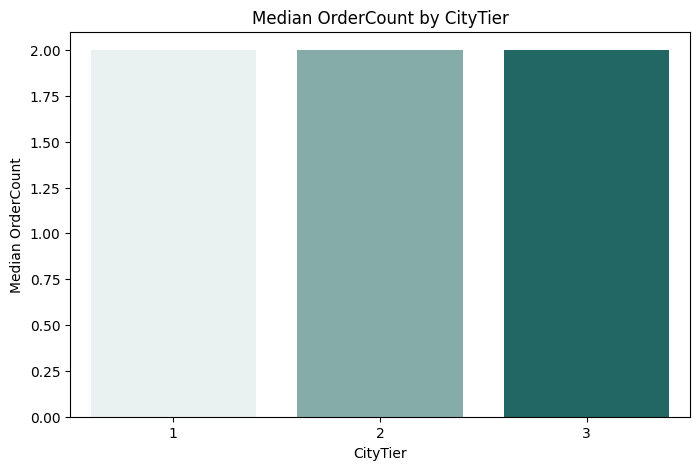

In [979]:
order_count_by_tier = dfc.groupby('CityTier')['OrderCount'].median().reset_index()

base_color = '#17726D'
colors = sns.light_palette(base_color, n_colors=len(tenure_by_tier))
# Creating the bar plot with seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='CityTier', y='OrderCount', data=order_count_by_tier, palette= colors, order=order_count_by_tier.sort_values('OrderCount').CityTier)
plt.xlabel('CityTier')
plt.ylabel('Median OrderCount')
plt.title('Median OrderCount by CityTier')
plt.show()

**Insight**
<br>[Understanding Tiers](https://www.investopedia.com/terms/r/real-estate-tier-classifications-tier-1-tier-2-and-tier-3.asp)

- Dari kedua uji tersebut, disimpulkan bahwa `CityTier` tidak memengaruhi jumlah order yang dipesan dalam sebulan terakhir. Namun `CityTier` memengaruhi lama pelanggan menjadi pelanggan di *e-commerce*.

- Pelangan di `CityTier 2` memiliki rata-rata tenure tertinggi yaitu `11.774869` dibandingkan dengan `CityTier` lainnya. Pelanggan yang berada di CityTier 2 sedang mengalami pertumbuhan ekonomi yang cepat. Banyak penduduk di kota-kota ini mulai menikmati peningkatan pendapatan yang memungkinkan mereka untuk mengalokasikan lebih banyak uang untuk belanja online. Investasi dalam infrastruktur logistik di kota tingkat 2 telah meningkat, memungkinkan pengiriman barang yang lebih cepat dan andal. Hal ini membuat pengalaman belanja online menjadi lebih memuaskan bagi konsumen dan meningkatkan kemungkinan mereka untuk terus berlangganan.

- Pelanggan di `CityTier3` memiliki `rata-rata OrderCount` yang tertinggi dari CityTier lainnya yaitu sebesar `3.195822`. Di kota tingkat 3, akses ke pusat perbelanjaan fisik dan toko retail mungkin lebih terbatas dibandingkan dengan kota tingkat 1 dan 2. Oleh karena itu, penduduk lebih cenderung beralih ke e-commerce untuk memenuhi kebutuhan sehari-hari mereka. Kurangnya alternatif ritel fisik ini meningkatkan frekuensi pembelian online.

- Rata rata `OrderCount` pada `CityTier 3` dan cititier1 sebenarnya tidak terlalu berbeda, mungkin jika berdasarkan karakteristik, peningkatan ordercount di `CityTier` 3 dipengaruhi keterbatasan pasar bisnis dan mereka dimudahkan dengan adanya e-commercer sedangkan peningkatan ordercount di `CityTier 1` dipengaruhi oleh pendapatan yang tinggi sehingga mempengaruhi gayahidup mereka.


### 4.Which `CityTier` has the most `HourSpendOnApp`?

In [980]:
# mean & max HourSpendOnApp by citytier
dfc_grouped_HourSpendOnApp = dfc.groupby('CityTier')['HourSpendOnApp'].agg(['median', 'max'])
dfc_grouped_HourSpendOnApp

median  max
CityTier             
1            3.0    5
2            3.0    4
3            3.0    5

In [981]:
city1 = dfc[dfc['CityTier'] == 1]['HourSpendOnApp']
city2 = dfc[dfc['CityTier'] == 2]['HourSpendOnApp']
city3 = dfc[dfc['CityTier'] == 3]['HourSpendOnApp']

print('H0: Tidak ada perbedaan signifikan antara median waktu yang dihabiskan pelanggan city tier 1, 2, dan 3 dalam menggunakan aplikasi')
print('H1: Ada perbedaan signifikan antara median waktu yang dihabiskan pelanggan city tier 1, 2, dan 3 dalam menggunakan aplikasi')
fscore, p_val = kruskal(city1, city2, city3)
print('p-value = ', p_val)
if p_val < 0.05:
    print('Tolak H0')
    print("Ada cukup bukti untuk menolak H0")
    print('Ada hubungan CityTier dan HourSpendOnApp')
else:
    print('Gagal tolak H0')
    print("Tidak ada cukup bukti untuk menolak H0")
    print('Tidak ada perbedaan signifikan antara median HourSpendOnApp CityTier1, CityTier2, dan CityTier3')

H0: Tidak ada perbedaan signifikan antara median waktu yang dihabiskan pelanggan city tier 1, 2, dan 3 dalam menggunakan aplikasi
H1: Ada perbedaan signifikan antara median waktu yang dihabiskan pelanggan city tier 1, 2, dan 3 dalam menggunakan aplikasi
p-value =  0.358607850929224
Gagal tolak H0
Tidak ada cukup bukti untuk menolak H0
Tidak ada perbedaan signifikan antara median HourSpendOnApp CityTier1, CityTier2, dan CityTier3


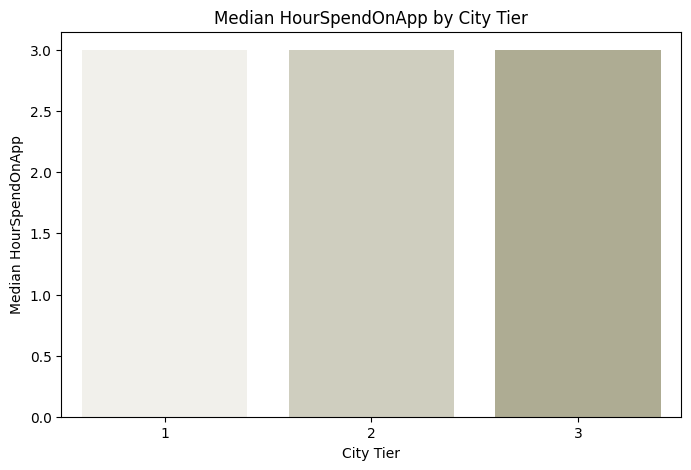

In [982]:
hourspend_by_tier = dfc.groupby('CityTier')['HourSpendOnApp'].median().reset_index()

base_color = '#B2B08F'
colors = sns.light_palette(base_color, n_colors=len(tenure_by_tier))
# Creating the bar plot with seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='CityTier', y='HourSpendOnApp', data=hourspend_by_tier, palette=colors)
plt.xlabel('City Tier')
plt.ylabel('Median HourSpendOnApp')
plt.title('Median HourSpendOnApp by City Tier')
plt.show()

Jadi, median lama pelanggan menggunakan aplikasi antar-CityTier tidak memiliki perbedaan signifikan.

### 5.Does different `CityTier` has different prefered products?

In [983]:
import plotly.express as px
earth_palette = ["#17726D", "#B2B08F", "#7E786E","#EAE4D2"]


fig=px.histogram(dfc,x="PreferredOrderCat",facet_col="CityTier",color="CityTier",color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PreferredOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredOrderCat',
yaxis_title='count',
)
fig.show()

- Mayoritas customer dari CityTier 1 dan 2 lebih suka memesan barang elektronik seperti handphone dan laptop.
- Mayoritas customer dari CityTier 3 lebih suka memesan laptop dan pakaian.
- Kategori Grocery merupakan kategori yang kurang digemari pelanggan, meskipun mayoritas pelanggan sudah menikah.

### 6.What is the preferred payment mode for different CityTiers?

In [984]:
pd.DataFrame(dfc['PreferredPaymentMode'].value_counts())

count
PreferredPaymentMode       
Debit Card             2028
Credit Card            1545
E wallet                550
Cash on Delivery        449
UPI                     350

In [985]:
pd.DataFrame(dfc.groupby('CityTier')[['PreferredPaymentMode']].value_counts())

count
CityTier PreferredPaymentMode       
1        Debit Card             1479
         Credit Card            1198
         Cash on Delivery        315
         UPI                     207
2        UPI                      87
         Debit Card               51
         Credit Card              41
         Cash on Delivery         12
3        E wallet                550
         Debit Card              498
         Credit Card             306
         Cash on Delivery        122
         UPI                      56

In [986]:
import plotly.express as px

earth_palette = ["#17726D", "#B2B08F", "#7E786E", "#7E786E"]
fig=px.histogram(dfc,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

Interpretasi:
* `CityTier 1` menunjukkan preferensi yang kuat untuk metode pembayaran digital, terutama Kartu Debit dan E Wallet, yang mengindikasikan tingkat adopsi pembayaran digital yang lebih tinggi.
* `CityTier 2` memiliki pola yang unik di mana UPI adalah yang paling disukai, yang mungkin mengindikasikan pergeseran ke arah pembayaran berbasis seluler di kota-kota yang kurang matang secara digital.
* `CityTier 3` memiliki distribusi yang seimbang dengan sedikit preferensi untuk E Wallet dan Kartu Debit, yang menunjukkan perpaduan antara metode pembayaran tradisional dan modern.

### 7.Which `CityTier` has the most WarehouseToHome?

In [987]:
# mean & max WarehouseToHome by citytier
dfc_grouped_WarehouseToHome = dfc.groupby('CityTier')['WarehouseToHome'].agg(['median', 'max'])
dfc_grouped_WarehouseToHome

median  max
CityTier             
1           13.0   36
2           12.0   33
3           14.0  127

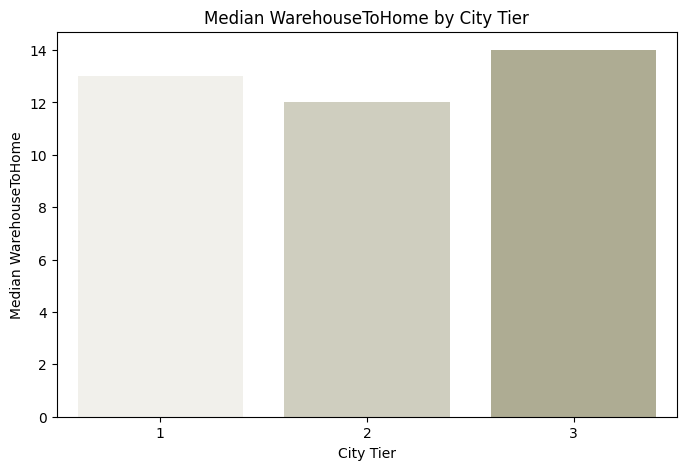

In [988]:
WarehouseToHome_by_tier = dfc.groupby('CityTier')['WarehouseToHome'].median().reset_index()

base_color = '#B2B08F'
colors = sns.light_palette(base_color, n_colors=len(tenure_by_tier))
# Creating the bar plot with seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='CityTier', y='WarehouseToHome', data=WarehouseToHome_by_tier, palette=colors)
plt.xlabel('City Tier')
plt.ylabel('Median WarehouseToHome')
plt.title('Median WarehouseToHome by City Tier')
plt.show()

Jarak dari gudang ke rumah hampir serupa di semua tingkat kota, berarti perusahaan juga telah membangun gudang di tingkat kota yang lebih rendah.

### 8.Does `CityTier` affect `Churn`?

In [989]:
cross_tab = pd.crosstab(dfc['CityTier'], dfc['Churn'])
cross_tab

Churn        0    1
CityTier           
1         2739  460
2          157   34
3         1188  344

In [990]:
p_val = chi2_contingency(cross_tab)[1]
print('H0: CityTier tidak memengaruhi Churn')
print('H1: CityTier memengaruhi Churn')
print('p-value =', p_val)

if p_val > 0.05:
  print('Gagal tolak H0')
  print("Tidak ada cukup bukti untuk menolak H0")
  print('Tidak ada hubungan antara CityTier dan churn pelanggan')
else:
  print('Tolak H0')
  print("Ada cukup bukti untuk menolak H0")
  print('CityTier memengaruhi churn pelanggan')

H0: CityTier tidak memengaruhi Churn
H1: CityTier memengaruhi Churn
p-value = 3.975100313347911e-11
Tolak H0
Ada cukup bukti untuk menolak H0
CityTier memengaruhi churn pelanggan


In [991]:
# Group and count by 'PreferredPaymentMode' and 'Churn'
citytier_churnrate = pd.DataFrame(dfc.groupby(['CityTier' , 'Churn'])[['Churn']].count())
citytier_churnrate = citytier_churnrate.rename(columns={'Churn': 'Count'})
citytier_churnrate = citytier_churnrate.reset_index()

colors = ['#17726D','#B2B08F']
fig = px.histogram(citytier_churnrate, x='CityTier', y = 'Count',color='Churn', barmode='group',color_discrete_sequence=colors,title="<b>"+'CityTier Vs Churn', barnorm = "percent",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CityTier',
yaxis_title='count (%)',
)
fig.show()

Dari uji Chi-Squared, kita dapat melihat bahwa `CityTier` memengaruhi churn pelanggan. Grafik di atas juga menunjukkan bahwa CityTier 3 memiliki proporsi pelanggan churn terbesar.

## Customer segmentation analysis based on behavior
Di sini kita akan membandingkan perilaku pelanggan yang churn dan yang tidak. Perilaku pelanggan antara lain `PreferredLoginDevice`, `OrderCount`, `CashbackAmount`, `Complain`, dan lain-lain. Kemudian, karena data kita tidak berdistribusi normal, kita perlu melakukan analisis dengan uji statistik nonparametrik.

### 1.Is there a relationship between `PreferredLoginDevice` and `Churn`?



In [992]:
cross_tab=pd.crosstab(dfc['PreferredLoginDevice'], dfc['Churn'])
cross_tab

Churn                    0    1
PreferredLoginDevice           
Computer              1139  283
Mobile Phone          2945  555

In [993]:
stats, p_val=proportions_ztest(cross_tab[1], cross_tab.sum(axis=1), alternative='larger')
print('H0: Tidak ada perbedaan antara proporsi churn pelanggan yang log in menggunakan komputer dan mobile phone')
print('H0: Proporsi churn pelanggan yang log in menggunakan komputer lebih besar daripada proporsi churn pelanggan yang log in menggunakan mobile phone')
print('p-value =', p_val/2)

if p_val/2 <= 0.05:
    print("Tolak H0")
    print("Ada cukup bukti untuk menolak H0")
    print('Terdapat cukup bukti untuk menyatakan bahwa proporsi churn pelanggan yang log in menggunakan computer lebih besar dibandingkan proporsi churn pelanggan yang log in menggunakan mobile phone')

else:
    print('Gagal Tolak H0')
    print("Tidak ada cukup bukti untuk menolak H0")
    print('Tidak terdapat cukup bukti untuk menyatakan bahwa proporsi churn pelanggan yang log in menggunakan computer lebih besar dibandingkan proporsi churn pelanggan yang log in menggunakan mobile phone')


H0: Tidak ada perbedaan antara proporsi churn pelanggan yang log in menggunakan komputer dan mobile phone
H0: Proporsi churn pelanggan yang log in menggunakan komputer lebih besar daripada proporsi churn pelanggan yang log in menggunakan mobile phone
p-value = 0.0001555666213466773
Tolak H0
Ada cukup bukti untuk menolak H0
Terdapat cukup bukti untuk menyatakan bahwa proporsi churn pelanggan yang log in menggunakan computer lebih besar dibandingkan proporsi churn pelanggan yang log in menggunakan mobile phone


Dari hasil di atas, kita simpulkan bahwa user yang log in menggunakan computer lebih mungkin untuk churn. Hal ini kemungkinan disebabkan oleh aplikasi computer e-commerce yang kurang user friendly sehingga membuat user tidak nyaman. Selain itu, interface pengguna pada versi computer mungkin kurang responsif atau tidak dioptimalkan dengan baik, sehingga sulit digunakan atau dinavigasi. Hal ini dapat menyebabkan pengguna merasa tidak nyaman dan memilih untuk tidak melanjutkan belanja.

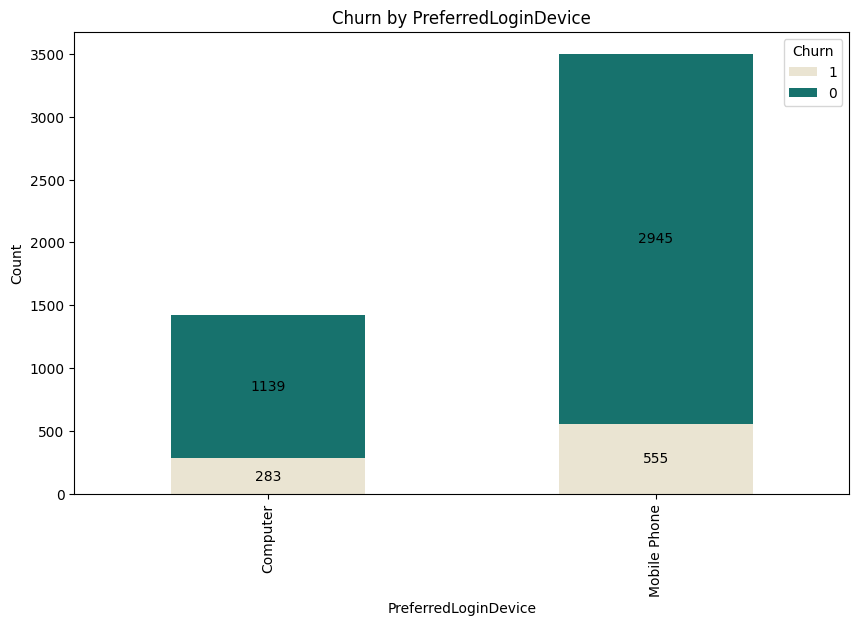

In [994]:
grouped_data = dfc.groupby(['PreferredLoginDevice', 'Churn']).size().unstack()
grouped_data = grouped_data[[1, 0]]
ax = grouped_data.plot(
    kind='bar',
    stacked=True,
    color = ['#EAE4D2', '#17726D'],
    figsize=(10, 6)
)

plt.title('Churn by PreferredLoginDevice')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Add text annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            f'{int(height)}',
            ha='center',
            va='center',
            color='black',
            fontsize=10)
plt.show()


### 2.Does the increase of order amount (%) from last year (`OrderAmountHikeFromlastYear`) affect the `Churn` rate?

In [995]:
pd.DataFrame(dfc.groupby('OrderAmountHikeFromlastYear')['Churn'].count())

Churn
OrderAmountHikeFromlastYear       
11                             343
12                             656
13                             665
14                             700
15                             598
16                             294
17                             254
18                             290
19                             284
20                             217
21                             169
22                             159
23                             125
24                              75
25                              67
26                              26

In [996]:
t_score, p_val = mannwhitneyu(dfc[dfc['Churn']==0]['OrderAmountHikeFromlastYear'],
                             dfc[dfc['Churn']==1]['OrderAmountHikeFromlastYear'], alternative='greater')
print('H0: Tidak ada perbedaan signifikan antara median persentase peningkatan order dari tahun lalu antara pelanggan churn dan tidak')
print('H1: Median persentase peningkatan order dari tahun lalu pelanggan churn lebih besar daripada pelanggan yang tidak churn')
print('p-value =', p_val/2)
if p_val/2 <= 0.05:
  print("Tolak H0")
  print("Ada cukup bukti untuk menolak H0")
  print('Terdapat cukup bukti untuk menyatakan bahwa customer churn memiliki median persentase peningkatan order dari tahun lalu yang lebih kecil daripada customer yang tidak churn')

else:
  print("Gagal tolak H0")
  print("Tidak ada cukup bukti untuk menolak H0")
  print('Tidak terdapat cukup bukti untuk menyatakan bahwa customer churn memiliki median persentase peningkatan order dari tahun lalu yang lebih kecil daripada customer yang tidak churn')

H0: Tidak ada perbedaan signifikan antara median persentase peningkatan order dari tahun lalu antara pelanggan churn dan tidak
H1: Median persentase peningkatan order dari tahun lalu pelanggan churn lebih besar daripada pelanggan yang tidak churn
p-value = 0.00564289835826899
Tolak H0
Ada cukup bukti untuk menolak H0
Terdapat cukup bukti untuk menyatakan bahwa customer churn memiliki median persentase peningkatan order dari tahun lalu yang lebih kecil daripada customer yang tidak churn


In [997]:
comp_ten = dfc.groupby(["OrderAmountHikeFromlastYear", "Churn"]).size().reset_index(name="Count")

# Create a bubble chart using Plotly
fig_bubble = px.scatter(comp_ten, x="OrderAmountHikeFromlastYear", y="Count", size="Count", color="Churn", title="<b>"+'OrderAmountHikeFromlastYear VS Churn',
                        color_discrete_sequence=["#17726D", "#B2B08F"])

fig_bubble.update_layout(hovermode='x',title_font_size=30)
fig_bubble.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='OrderAmountHikeFromlastYear',
yaxis_title='count',
)
fig_bubble.show()

* Grafik menunjukkan ketika persentase pesanan tahun lalu meningkat, tingkat churn rate menurun sehingga OrderAmountHikeFromlastYear memiliki efek positif terhadap tingkat churn rate.
* Namun kita harus fokus pada saat pelanggan memiliki peningkatan order dari tahun sebelumnya yang berpersentase 12% - 14% dimana terjadi flukes atau peningkatan Churn. Segmen pelanggan terrsebut perlu mendapat perhatian khusus dalam pemberian tawaran atau lain sebagainya.

### 3.Is there a relationship between preferred order category (`PreferredOrderCat`) and `Churn` rate?

In [998]:
cross_tab = pd.crosstab(dfc['PreferredOrderCat'], dfc['Churn'])
cross_tab

Churn                  0    1
PreferredOrderCat            
Fashion              639  123
Grocery              219   16
Laptop & Accessory  1643  194
Mobile Phone        1360  486
Others               223   19

In [999]:
p_val = chi2_contingency(cross_tab)[1]
print('H0: PreferredOrderCat tidak memengaruhi Churn')
print('H1: PreferredOrderCat memengaruhi Churn')
print('p-value =', p_val)

if p_val > 0.05:
  print('Gagal tolak H0')
  print("Tidak ada cukup bukti untuk menolak H0")
  print('Tidak ada hubungan antara PreferredOrderCat dan churn pelanggan')
else:
  print('Tolak H0')
  print("Ada cukup bukti untuk menolak H0")
  print('PreferredOrderCat memengaruhi churn pelanggan')

H0: PreferredOrderCat tidak memengaruhi Churn
H1: PreferredOrderCat memengaruhi Churn
p-value = 4.555264043634263e-42
Tolak H0
Ada cukup bukti untuk menolak H0
PreferredOrderCat memengaruhi churn pelanggan


In [1000]:
# Group and count by 'PreferedOrderCat' and 'Churn'
ordercat_churnrate = pd.DataFrame(dfc.groupby(['PreferredOrderCat' , 'Churn'])[['Churn']].count())
ordercat_churnrate = ordercat_churnrate.rename(columns={'Churn': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()

colors = ['#17726D','#B2B08F']
fig = px.histogram(ordercat_churnrate, x='PreferredOrderCat', y = 'Count',color='Churn', barmode='group',color_discrete_sequence=colors,title="<b>"+'Preferred Category Vs Churn', barnorm = "percent",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredOrderCat',
yaxis_title='count (%)',
)
fig.show()

Dari grafik tersebut, kita dapat melihat bahwa Mobile Phone dan Fashion merupakan kategori dengan proporsi churn paling besar. Hal ini kemungkinan disebabkan oleh kurangnya regulasi mengenai garansi barang dan kurang tegasnya perusahaan dalam mengatasi seller-seller yang nakal.

- Produk dalam kategori Mobile Phone sering kali memiliki harga yang tinggi dan kompleksitas teknis yang lebih besar, sehingga pelanggan sangat mengandalkan garansi dan layanan yang memadai. Kurangnya regulasi yang ketat mengenai garansi barang dapat membuat pelanggan merasa tidak terlindungi jika terdapat kecacatan pada produk mereka. Selain itu, ketidaktegasan perusahaan dalam mengatasi seller-seller yang nakal, yang mungkin menjual produk palsu atau berkualitas rendah, dapat menambah ketidakpuasan pelanggan dan mendorong mereka untuk berhenti menggunakan layanan e-commerce tersebut.

- Di sisi lain, kategori Fashion juga menghadapi tantangan serupa. Barang-barang fashion sering kali terpengaruh oleh masalah seperti ketidakcocokan ukuran, kualitas yang tidak sesuai dengan deskripsi, atau pengiriman produk yang berbeda dari yang diiklankan. Kurangnya tindakan tegas terhadap seller-seller yang tidak jujur dalam kategori ini dapat menyebabkan pengalaman belanja yang buruk bagi pelanggan. Ketidakpuasan ini diperburuk oleh minimnya kebijakan garansi atau retur yang efektif, sehingga pelanggan merasa dirugikan dan akhirnya memutuskan untuk tidak lagi berbelanja di platform e-commerce tersebut.

### 4.Is there a relationship between preferred payment mode (`PreferredPaymentMode`) and `Churn` rate?

In [1001]:
cross_tab = pd.crosstab(dfc['PreferredPaymentMode'], dfc['Churn'])
cross_tab

Churn                    0    1
PreferredPaymentMode           
Cash on Delivery       335  114
Credit Card           1319  226
Debit Card            1714  314
E wallet               422  128
UPI                    294   56

In [1002]:
p_val = chi2_contingency(cross_tab)[1]
print('H0: PreferredPaymentMode tidak memengaruhi Churn')
print('H1: PreferredPaymentMode memengaruhi Churn')
print('p-value =', p_val)

if p_val > 0.05:
  print('Gagal tolak H0')
  print("Tidak ada cukup bukti untuk menolak H0")
  print('Tidak ada hubungan antara PreferredPaymentMode dan churn pelanggan')
else:
  print('Tolak H0')
  print("Ada cukup bukti untuk menolak H0")
  print('PreferredPaymentMode memengaruhi churn pelanggan')

H0: PreferredPaymentMode tidak memengaruhi Churn
H1: PreferredPaymentMode memengaruhi Churn
p-value = 1.2629672647660834e-09
Tolak H0
Ada cukup bukti untuk menolak H0
PreferredPaymentMode memengaruhi churn pelanggan


In [1003]:
# Group and count by 'PreferredPaymentMode' and 'Churn'
ordercat_churnrate = pd.DataFrame(dfc.groupby(['PreferredPaymentMode' , 'Churn'])[['Churn']].count())
ordercat_churnrate = ordercat_churnrate.rename(columns={'Churn': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()

colors = ['#17726D','#B2B08F']
fig = px.histogram(ordercat_churnrate, x='PreferredPaymentMode', y = 'Count',color='Churn', barmode='group',color_discrete_sequence=colors,title="<b>"+'Preferred Payment Mode Vs Churn', barnorm = "percent",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count (%)',
)
fig.show()

Dari grafik tersebut, kita dapat melihat bahwa COD dan E wallet merupakan kategori dengan proporsi churn paling besar. Hal ini kemungkinan disebabkan sebagai berikut:

- Banyak pelanggan yang merasa tidak nyaman dengan ketidakpastian mengenai apakah barang akan tiba tepat waktu atau tidak. Seringkali, pengiriman COD mengalami penundaan karena kurir harus menunggu pelanggan siap untuk menerima dan membayar barang.

- Gangguan pada aplikasi E-wallet atau masalah integrasi dengan platform e-commerce dapat menyebabkan pengalaman pembayaran yang buruk, seperti transaksi yang gagal atau tertunda.

### 5.Do customers who used more coupons (`CouponUsed`) have lower `Churn` rates?

In [1004]:
dfc.groupby(['CouponUsed' , 'Churn'])[['Churn']].count()

Churn
CouponUsed Churn       
0          0        749
           1        160
1          0       1591
           1        327
2          0        965
           1        197
3          0        262
           1         46
4          0        173
           1         30
5          0        107
           1         24
6          0         92
           1         18
7          0         71
           1         17
8          0         32
           1          9
9          0         12
           1          2
10         0          8
           1          3
11         0          7
           1          2
12         0          6
           1          1
13         0          7
14         0          2
15         1          1
16         1          1

In [1005]:
t_score, p_val = mannwhitneyu(dfc[dfc['Churn']==1]['CouponUsed'], dfc[dfc['Churn']==0]['CouponUsed'])
print('H0: Tidak ada perbedaan signifikan antara median jumlah kupon yang digunakan oleh pelanggan churn dan tidak')
print('H1: Ada perbedaan signifikan antara median jumlah kupon yang digunakan oleh pelanggan churn dan tidak')
print('p-value =', p_val)
if p_val > 0.05:
    print("Gagal Tolak H0")
    print("Tidak ada cukup bukti untuk menolak H0")
    print("Tidak ada perbedaan signifikan antara kupon yang digunakan oleh pelanggan yang churn dan yang tidak churn")
else:
    print("Tolak H0")
    print("Ada cukup bukti untuk menolak H0")
    print("Ada perbedaan signifikan antara kupon yang digunakan oleh pelanggan yang churn dan yang tidak churn")

H0: Tidak ada perbedaan signifikan antara median jumlah kupon yang digunakan oleh pelanggan churn dan tidak
H1: Ada perbedaan signifikan antara median jumlah kupon yang digunakan oleh pelanggan churn dan tidak
p-value = 0.6369717681152219
Gagal Tolak H0
Tidak ada cukup bukti untuk menolak H0
Tidak ada perbedaan signifikan antara kupon yang digunakan oleh pelanggan yang churn dan yang tidak churn


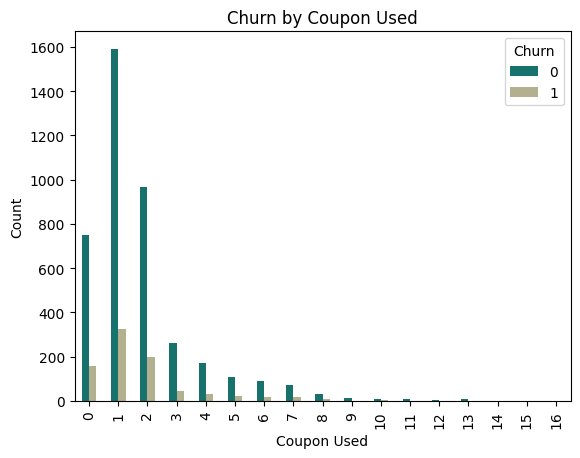

In [1006]:
# Group by 'CouponUsed' and 'Churn', then count occurrences
grouped = dfc.groupby(['CouponUsed', 'Churn']).size().unstack()

# Plotting the bar plot
colors = ['#17726D','#B2B08F']
grouped.plot(kind='bar', stacked=False, color=colors)

# Adding titles and labels
plt.title('Churn by Coupon Used')
plt.xlabel('Coupon Used')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

Berdasarkan hasil uji Mann-Whitney U, kita dapat menyimpulkan bahwa jumlah kupon yang digunakan oleh pelanggan tidak memiliki pengaruh yang signifikan terhadap kemungkinan mereka untuk churn. Perusahaan mungkin perlu menawarkan insentif lain yang lebih menarik atau berharga bagi pelanggan. Selain kupon, perusahaan dapat mempertimbangkan diskon yang lebih besar, program loyalitas yang lebih komprehensif, hadiah eksklusif, atau pengalaman pelanggan yang ditingkatkan.

### 6.Is there a relationship between `CashbackAmount` and `Churn`?

In [1007]:
dfc_grouped_cashback = dfc.groupby('Churn')['CashbackAmount'].agg(['median', 'max'])
dfc_grouped_cashback

median     max
Churn                
0      165.16  324.99
1      151.00  323.59

In [1008]:
t_score, p_val = mannwhitneyu(dfc[dfc['Churn']==0]['CashbackAmount'], dfc[dfc['Churn']==1]['CashbackAmount'], alternative='greater')
print('H0: Tidak ada perbedaan signifikan antara median cashback yang diterima oleh pelanggan churn dan tidak')
print('H1: Median cashback yang diterima pelanggan yang tidak churn lebih besar daripada median cashback yang diterima oleh pelanggan churn')
print('p-value =', p_val/2)
if p_val/2 > 0.05:
    print("Gagal Tolak H0")
    print("Tidak ada cukup bukti untuk menolak H0")
    print("Tidak ada perbedaan signifikan antara jumlah cashback yang didapatkan oleh pelanggan churn dan yang tidak")
else:
    print("Tolak H0")
    print("Ada cukup bukti untuk menolak H0")
    print("Jumlah cashback yang didapatkan oleh pelanggan yang tidak churn lebih besar dibandingkan dengan jumlah cashback yang didapatkan oleh pelanggan churn")

H0: Tidak ada perbedaan signifikan antara median cashback yang diterima oleh pelanggan churn dan tidak
H1: Median cashback yang diterima pelanggan yang tidak churn lebih besar daripada median cashback yang diterima oleh pelanggan churn
p-value = 2.6835705352719646e-25
Tolak H0
Ada cukup bukti untuk menolak H0
Jumlah cashback yang didapatkan oleh pelanggan yang tidak churn lebih besar dibandingkan dengan jumlah cashback yang didapatkan oleh pelanggan churn


In [1009]:
fig = px.histogram(dfc, x='CashbackAmount', y='OrderCount' ,color = 'Churn', title="<b>"+'CashbackAmount Vs OrderCount within churn', color_discrete_sequence=['#B2B08F','#17726D'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CashbackAmount',
yaxis_title='OrderCount',
)
fig.show()

Dari hasil tersebut, diketahui bahwa pelanggan churn mendapatkan cashback yang lebih sedikit dibandingkan pelanggan yang tidak churn. Artinya jumlah cashback memengaruhi churn atau tidaknya seseorang. Hal ini kemungkinan disebabkan oleh beberapa hal:
- Pelanggan yang churn mungkin tidak mendapatkan akses yang sama terhadap promosi cashback yang menguntungkan. Ini bisa terjadi karena kurangnya komunikasi efektif dari perusahaan mengenai promosi yang sedang berlangsung atau karena pelanggan tersebut tidak memenuhi syarat untuk promosi tertentu.
- Pelanggan yang churn mungkin kurang aktif dalam mengklaim cashback mereka, baik karena kurang informasi ataupun motivasi. Ini bisa mengakibatkan mereka menerima cashback yang lebih sedikit dibandingkan dengan pelanggan yang secara aktif memanfaatkan program tersebut.
- Nilai cashback yang kurang kompetitif dibandingkan dengan platform e-commerce lain dapat mengakibatkan pelanggan lebih memilih untuk berbelanja di tempat lain yang menawarkan lebih banyak keuntungan dari program cashback.

### 7.Are customers who complained in the last month (`Complain`) more likely to churn?

In [1010]:
dfc.groupby(['Complain','Churn'])[['Churn']].count()

Churn
Complain Churn       
0        0       3133
         1        391
1        0        951
         1        447

In [1011]:
cross_tab=pd.crosstab(dfc['Complain'], dfc['Churn'])
cross_tab

Churn        0    1
Complain           
0         3133  391
1          951  447

In [1012]:
stats, p_val=proportions_ztest(cross_tab[1], cross_tab.sum(axis=1), alternative='smaller')
print('H0: Tidak ada perbedaan signifikan antara proporsi churn pelanggan yang memiliki komplain dan yang tidak memiliki komplain (dalam sebulan terakhir)')
print('H1: Proporsi churn pelanggan yang tidak memiliki komplain lebih kecil daripada proporsi churn pelanggan yang memiliki komplain (dalam sebulan terakhir)')
print('p-value =', p_val/2)
if p_val/2 <= 0.05:
    print("Tolak H0")
    print("Ada cukup bukti untuk menolak H0")
    print('Terdapat cukup bukti untuk menyatakan bahwa proporsi churn pelanggan yang tidak memiliki komplain dalam sebulan terakhir lebih kecil dibandingkan proporsi churn pelanggan yang tidak memiliki komplain')

else:
    print('Gagal Tolak H0')
    print("Tidak ada cukup bukti untuk menolak H0")
    print('Tidak Terdapat cukup bukti untuk menyatakan bahwa proporsi churn pelanggan yang tidak memiliki komplain dalam sebulan terakhir lebih kecil dibandingkan proporsi churn pelanggan yang tidak memiliki komplain')



H0: Tidak ada perbedaan signifikan antara proporsi churn pelanggan yang memiliki komplain dan yang tidak memiliki komplain (dalam sebulan terakhir)
H1: Proporsi churn pelanggan yang tidak memiliki komplain lebih kecil daripada proporsi churn pelanggan yang memiliki komplain (dalam sebulan terakhir)
p-value = 9.64216531422552e-70
Tolak H0
Ada cukup bukti untuk menolak H0
Terdapat cukup bukti untuk menyatakan bahwa proporsi churn pelanggan yang tidak memiliki komplain dalam sebulan terakhir lebih kecil dibandingkan proporsi churn pelanggan yang tidak memiliki komplain


In [1013]:
comp_churn = pd.DataFrame(dfc.groupby('Complain')['Churn'].value_counts())
comp_churn = comp_churn.rename(columns={'Churn': 'Count'})
comp_churn = comp_churn.reset_index()
print(comp_churn)

comp_churn['Complain'].replace('0' , 'No Complain' , inplace = True)
comp_churn['Complain'].replace('1' , 'Complain' , inplace = True)
comp_churn['Churn'].replace('0' , 'No Churn' , inplace = True)
comp_churn['Churn'].replace('1' , 'Churn' , inplace = True)
print(comp_churn)

# Tree map
fig = px.treemap(comp_churn, path=[px.Constant("all"), 'Complain', 'Churn'], values='count' , color_discrete_sequence=['#17726D','#B2B08F'],title="<b>"+'Complain Vs Churn')
fig.update_traces(textinfo="label+percent parent+value" ,root_color="lightgrey")
fig.update_layout(margin = dict(t=70, l=25, r=25, b=25))

# red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']
# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.show()


   Complain  Churn  count
0         0      0   3133
1         0      1    391
2         1      0    951
3         1      1    447
   Complain  Churn  count
0         0      0   3133
1         0      1    391
2         1      0    951
3         1      1    447


Hasil di atas menunjukkan bahwa pelanggan yang komplain lebih berisiko untuk churn dibandingkan pelanggan yang tidak memiliki komplain. Hal ini dapat disebabkan oleh beberapa hal:
- Pelanggan yang mengajukan komplain biasanya mengalami ketidakpuasan terhadap produk atau layanan yang mereka terima. Ketidakpuasan ini bisa disebabkan oleh berbagai faktor, seperti kualitas produk yang tidak sesuai dengan harapan, pengiriman yang lambat, atau kesalahan dalam pesanan.
- Penanganan keluhan yang lambat atau tidak memadai dapat memperburuk ketidakpuasan pelanggan. Jika pelanggan merasa bahwa keluhan mereka tidak ditangani dengan serius atau solusi yang diberikan tidak memadai, mereka lebih cenderung untuk meninggalkan perusahaan dan mencari alternatif lain.
- Pelanggan yang sering mengalami masalah dan harus mengajukan komplain berulang kali kemungkinan besar akan merasa frustrasi dan kehilangan kepercayaan terhadap perusahaan.

### 8.What is the relationship between `Churn` and `DaySinceLastOrder`?

In [1014]:
t_score, p_val = mannwhitneyu(dfc[dfc['Churn']==1]['DaySinceLastOrder'], dfc[dfc['Churn']==0]['DaySinceLastOrder'], alternative='less')
print('H0: Tidak ada perbedaan signifikan antara median DaySinceLastOrder pelanggan churn dan tidak')
print('H1: Ada perbedaan signifikan antara median DaySinceLastOrder pelanggan churn dan tidak')
print('p-value =', p_val/2)
if p_val/2 > 0.05:
    print("Gagal Tolak H0")
    print("Tidak ada cukup bukti untuk menolak H0")
    print("Tidak ada perbedaan signifikan antara jumlah hari dari terakhir melakukan pesanan pelanggan yang churn dan yang tidak churn")
else:
    print("Tolak H0")
    print("Ada cukup bukti untuk menolak H0")
    print("Ada perbedaan signifikan antara jumlah hari dari terakhir melakukan pesanan pelanggan yang churn dan yang tidak churn")

H0: Tidak ada perbedaan signifikan antara median DaySinceLastOrder pelanggan churn dan tidak
H1: Ada perbedaan signifikan antara median DaySinceLastOrder pelanggan churn dan tidak
p-value = 6.30968128826446e-28
Tolak H0
Ada cukup bukti untuk menolak H0
Ada perbedaan signifikan antara jumlah hari dari terakhir melakukan pesanan pelanggan yang churn dan yang tidak churn


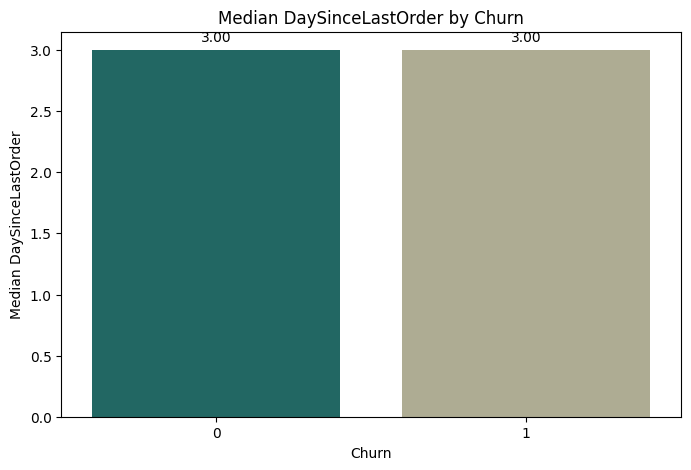

In [1015]:
order_count_by_tier = dfc.groupby('Churn')['DaySinceLastOrder'].median().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Churn', y='DaySinceLastOrder', data=order_count_by_tier, palette=['#17726D', '#B2B08F'])
# Add Text
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xlabel('Churn')
plt.ylabel('Median DaySinceLastOrder')
plt.title('Median DaySinceLastOrder by Churn')
plt.show()

Plot yang di atas menunjukkan bahwa median DaySinceLastOrder untuk pelanggan churn dan tidak tampak sama meskipun uji statistik Mann-Whitney menghasilkan p-value sebesar 6.30968128826446e-28 yang menyimpulkan terdapat perbedaan signifikan secara statistik pada tingkat signifikansi 5%. Hal ini terjadi karena, signifikan secara statistik tidak selalu berarti perbedaan yang sangat besar atau jelas terlihat pada plot. Uji statistik sensitif terhadap ukuran sampel dan variasi dalam data, sehingga bisa mendeteksi perbedaan kecil yang mungkin tidak terlihat jelas pada visualisasi sederhana.

Dari hasil di atas, ternyata pelanggan yang churn memiliki nilai DaySinceLastOrder yang lebih kecil daripada pelanggan yang tidak churn. Artinya, pelanggan yang churn melakukan pemesanan terakhir lebih baru dibandingkan dengan pelanggan yang tidak churn. Hal ini dapat disebabkan oleh beberapa hal.
- Pelanggan yang churn mungkin mengalami pengalaman negatif yang signifikan dalam pesanan terakhir mereka. Masalah seperti keterlambatan pengiriman, kualitas produk yang buruk, atau layanan pelanggan yang tidak memuaskan bisa memicu ketidakpuasan yang cukup besar sehingga mereka memutuskan untuk berhenti menggunakan layanan e-commerce segera setelah pesanan terakhir.
- Terkadang, promosi atau diskon besar-besaran dapat menarik pelanggan baru untuk melakukan pembelian, tetapi jika pengalaman mereka tidak memuaskan, mereka mungkin tidak kembali lagi setelah pesanan pertama. Nilai DaySinceLastOrder yang lebih kecil bisa mencerminkan bahwa pelanggan tersebut tertarik oleh promosi tetapi tidak mendapatkan alasan yang cukup kuat untuk tetap setia setelahnya.

### 9.Is there a relationship between `HourSpendOnApp` and `Churn`?

In [1016]:
pd.DataFrame(dfc.groupby('HourSpendOnApp')[['Churn']].value_counts())

count
HourSpendOnApp Churn       
0              0          3
1              0         31
2              0       1227
               1        242
3              0       1981
               1        424
4              0        839
               1        172
5              0          3

In [1017]:
t_score, p_val = mannwhitneyu(dfc[dfc['Churn']==0]['HourSpendOnApp'], dfc[dfc['Churn']==1]['HourSpendOnApp'])
print('H0: Tidak ada perbedaan signifikan antara median HourSpendOnApp pelanggan churn dan tidak')
print('H1: Ada perbedaan signifikan antara median HourSpendOnApp pelanggan churn dan tidak')
print('p-value =', p_val/2)
if p_val/2 > 0.05:
    print("Gagal Tolak H0")
    print("Tidak ada cukup bukti untuk menolak H0")
    print("Tidak ada perbedaan antara median waktu penggunaan aplikasi pelanggan yang churn dan yang tidak")
else:
    print("Tolak H0")
    print("Ada cukup bukti untuk menolak H0")
    print("Median waktu penggunaan aplikasi pelanggan churn lebih kecil daripada median waktu penggunaan aplikasi pelanggan yang tidak churn")

H0: Tidak ada perbedaan signifikan antara median HourSpendOnApp pelanggan churn dan tidak
H1: Ada perbedaan signifikan antara median HourSpendOnApp pelanggan churn dan tidak
p-value = 0.1930126852322433
Gagal Tolak H0
Tidak ada cukup bukti untuk menolak H0
Tidak ada perbedaan antara median waktu penggunaan aplikasi pelanggan yang churn dan yang tidak


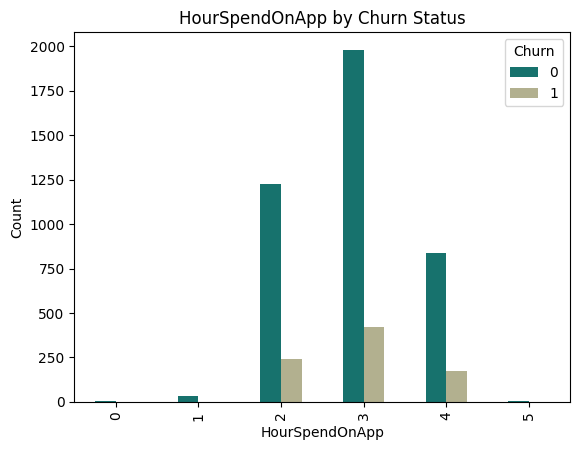

In [1018]:
grouped = dfc.groupby(['HourSpendOnApp', 'Churn']).size().unstack()

colors = ['#17726D', '#B2B08F']
grouped.plot(kind='bar', stacked=False, color=colors)

# Adding titles and labels
plt.title('HourSpendOnApp by Churn Status')
plt.xlabel('HourSpendOnApp')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

Berdasarkan hasil uji Mann-Whitney U, kita dapat menyimpulkan bahwa lama penggunaan aplikasi oleh pelanggan tidak memiliki pengaruh yang signifikan terhadap kemungkinan mereka untuk churn. Keputusan pelanggan untuk churn kemungkinan dipengaruhi oleh faktor-faktor lain selain durasi penggunaan aplikasi. Misalnya, masalah dengan produk atau layanan, penawaran kompetitor yang lebih menarik, atau pengalaman negatif tertentu.

### 10.Is there a relationship between `Tenure` and `Churn`?

In [1019]:
pd.DataFrame(dfc.groupby('Tenure')[['Churn']].value_counts())

count
Tenure Churn       
0      1        242
       0        213
1      1        308
       0        308
2      0        139
       1         12
3      0        158
       1         15
4      0        168
       1         16
5      0        255
       1         60
6      0        196
       1         10
7      0        178
       1         13
8      0        218
       1         13
9      0        215
       1         12
10     0        181
       1         14
11     0        172
       1         16
12     0        151
       1          7
13     0        180
       1         23
14     0        141
       1         14
15     0        124
       1         10
16     0        118
       1         10
17     0         84
       1          4
18     0         98
       1          6
19     0        108
       1          9
20     0         73
       1         14
21     0         59
       1         10
22     0         58
23     0         72
24     0         60
25     0         50
26     0         50
27     0         53
28     0         53
29     0         46
30     0         61
31     0         42
50     0          1
51     0          1

In [1020]:
t_score, p_val = mannwhitneyu(dfc[dfc['Churn']==0]['Tenure'], dfc[dfc['Churn']==1]['Tenure'], alternative='greater')
print('H0: Tidak ada perbedaan signifikan antara median Tenure pelanggan churn dan tidak')
print('H1: Median Tenure pelanggan yang tidak churn lebih besar daripada median Tenure pelanggan yang churn')
print('p-value =', p_val/2)
if p_val/2 > 0.05:
    print("Gagal Tolak H0")
    print("Tidak ada cukup bukti untuk menolak H0")
    print("Tidak ada perbedaan antara median tenure pelanggan yang churn dan yang tidak")
else:
    print("Tolak H0")
    print("Ada cukup bukti untuk menolak H0")
    print("Median tenure pelanggan churn lebih besar daripada median tenure pelanggan yang tidak churn")

H0: Tidak ada perbedaan signifikan antara median Tenure pelanggan churn dan tidak
H1: Median Tenure pelanggan yang tidak churn lebih besar daripada median Tenure pelanggan yang churn
p-value = 1.9232113083225059e-159
Tolak H0
Ada cukup bukti untuk menolak H0
Median tenure pelanggan churn lebih besar daripada median tenure pelanggan yang tidak churn


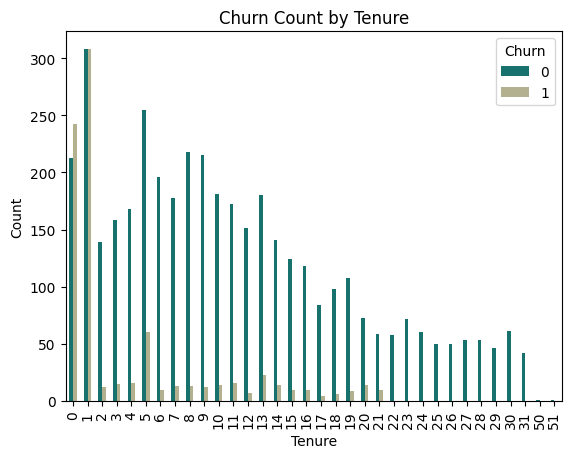

In [1021]:
# Group by 'Tenure' and 'Churn', then count occurrences
grouped = dfc.groupby(['Tenure', 'Churn']).size().unstack()

colors = ['#17726D', '#B2B08F']
grouped.plot(kind='bar', stacked=False, color=colors)

# Adding titles and labels
plt.title('Churn Count by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

Dari hasil di atas, diketahui bahwa pelanggan yang churn memiliki tenure yang lebih rendah. Beberapa faktor yang dapat menyebabkan hal ini terjadi antara lain:
- Pengalaman awal yang buruk, seperti kesulitan dalam navigasi situs, proses pembelian yang rumit, atau masalah dengan kualitas produk, dapat membuat pelanggan baru merasa tidak puas. Jika masalah ini tidak segera diatasi, pelanggan mungkin memutuskan untuk tidak melanjutkan penggunaan layanan.
- Perusahaan mungkin tidak memberikan cukup promosi atau insentif untuk pelanggan baru agar mereka tetap menggunakan layanan. Promosi khusus atau diskon yang berkelanjutan dapat membantu meningkatkan retensi pelanggan baru.
- Pelanggan baru mungkin membutuhkan waktu untuk beradaptasi dengan platform. Jika mereka merasa kesulitan atau tidak nyaman dengan antarmuka atau fitur platform, mereka mungkin memilih untuk berhenti menggunakannya.



> PreferredOrderCat by Tenure <=24 & Churn ==1



In [1022]:
# Filter the data where 'Tenure' <= 24 and 'Churn' == 1
filtered_dfc = dfc[(dfc['Tenure'] <= 24) & (dfc['Churn'] == 1)]
# Count occurrences of 'PreferredCat'
preferredcat_counts_lessthanequal24 = filtered_dfc['PreferredOrderCat'].value_counts().reset_index()
preferredcat_counts_lessthanequal24.columns = ['PreferredOrderCat', 'Count']
preferredcat_counts_lessthanequal24

PreferredOrderCat  Count
0        Mobile Phone    486
1  Laptop & Accessory    194
2             Fashion    123
3              Others     19
4             Grocery     16

> PreferedOrderCat by Tenure >24 & Churn ==0

In [1023]:
# Filter the data where 'Tenure' > 24 and 'Churn' == 0
filtered_dfc = dfc[(dfc['Tenure'] > 24) & (dfc['Churn'] == 0)]

# Count occurrences of 'PreferredCat'
preferredcat_counts_greaterthan24 = filtered_dfc['PreferredOrderCat'].value_counts().reset_index()
preferredcat_counts_greaterthan24.columns = ['PreferredOrderCat', 'Count']
preferredcat_counts_greaterthan24

PreferredOrderCat  Count
0  Laptop & Accessory     89
1             Grocery     86
2             Fashion     74
3              Others     57
4        Mobile Phone     51

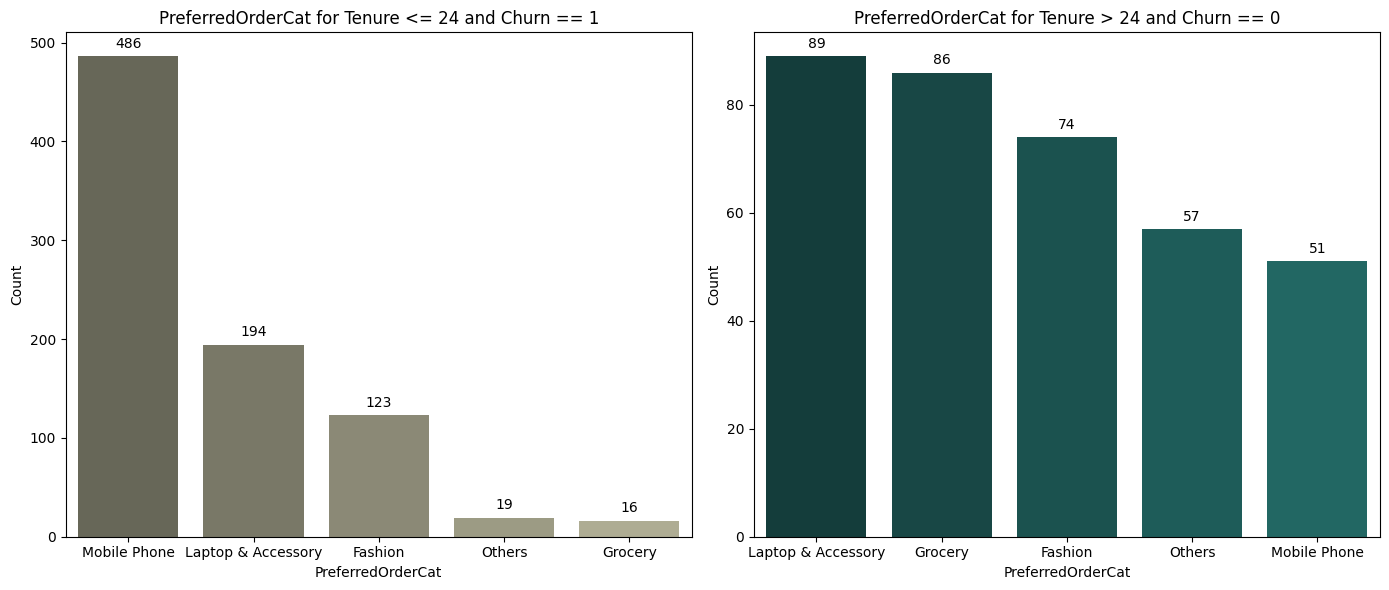

In [1024]:
# Plotting the bar plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for the first filter
colors_churn = ['#6a6955', '#7c7b64', '#8e8c72', '#a09e80', '#b2b08f']
sns.barplot(ax=axes[0], x='PreferredOrderCat', y='Count', data=preferredcat_counts_lessthanequal24, palette=colors_churn)
axes[0].set_title('PreferredOrderCat for Tenure <= 24 and Churn == 1')
axes[0].set_xlabel('PreferredOrderCat')
axes[0].set_ylabel('Count')

# Bar plot for the second filter
colors_nochurn = ['#0d4441', '#104f4c', '#125b57', '#146662', '#17726d']
sns.barplot(ax=axes[1], x='PreferredOrderCat', y='Count', data=preferredcat_counts_greaterthan24, palette=colors_nochurn)
axes[1].set_title('PreferredOrderCat for Tenure > 24 and Churn == 0')
axes[1].set_xlabel('PreferredOrderCat')
axes[1].set_ylabel('Count')

# Function to add value counts on bars
def add_value_counts(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Add value counts to both plots
add_value_counts(axes[0])
add_value_counts(axes[1])

plt.tight_layout()
plt.show()

> SatisfactionScore by Tenure <=24 & Churn == 1

In [1025]:
# Filter the data where 'Tenure' <= 24 and 'Churn' == 1
filtered_dfc = dfc[(dfc['Tenure'] <= 24) & (dfc['Churn'] == 1)]
# Count occurrences of 'SatisfactionScore'
SatisfactionScore_counts_lessthanequal24 = filtered_dfc['SatisfactionScore'].value_counts().reset_index()
SatisfactionScore_counts_lessthanequal24.columns = ['SatisfactionScore', 'Count']
SatisfactionScore_counts_lessthanequal24

SatisfactionScore  Count
0                  3    258
1                  5    225
2                  4    159
3                  1    124
4                  2     72

> SatisfactionScore by Tenure >24 & Churn == 0

In [1026]:
# Filter the data where 'Tenure' > 24 and 'Churn' == 0
filtered_dfc = dfc[(dfc['Tenure'] > 24) & (dfc['Churn'] == 0)]
# Count occurrences of 'SatisfactionScore'
SatisfactionScore_counts_greaterthan24 = filtered_dfc['SatisfactionScore'].value_counts().reset_index()
SatisfactionScore_counts_greaterthan24.columns = ['SatisfactionScore', 'Count']
SatisfactionScore_counts_greaterthan24

SatisfactionScore  Count
0                  3    111
1                  1     73
2                  5     72
3                  4     60
4                  2     41

##  Data Analysis Conclusion & Recommendation

### **Conclusion**
**Churn**
* Pelanggan yang tidak churn lebih banyak dibandingkan dengan pelanggan yang churn. **Total pelanggan yang tidak churn sebanyak 4084 atau 82.97%**, sedangkan **total pelanggan yang churn sebanyak 834 atau 17.03%** dari total keseluruhan pelanggan sebanyak 4918.
* Meskipun pelanggan churn dianggap sedikit hanya 17.03%, **penanganan terhadap pelanggan churn tetap penting karena dapat berdampak signifikan pada pertumbuhan perusahaan**.

**Customer Segmentation analysis based on characteristics**

> **Gender**
* **Pelanggan laki-laki cenderung lebih rentan churn dibandingkan pelanggan perempuan**, dengan persentase 63.1% untuk pelanggan laki-laki dan 36.9% pelanggan perempuan.
* **Menurut penelitian Menylk et al. (2009), perempuan cenderung lebih loyal dan terlibat secara emosional dengan merek dan platform belanja yang mereka sukai**. Mereka mungkin lebih aktif dalam program loyalitas, ulasan produk, dan interaksi dengan layanan pelanggan. Sebaliknya, **laki-laki kurang terlibat secara emosional dan lebih pragmatis, sehingga lebih mudah berpindah** ke platform lain jika ada masalah kecil atau penawaran yang lebih baik di tempat lain (Rodgers & Harris, 2003).

> **Gender & OrderCount**
* **Gender pelanggan memengaruhi variabel OrderCount**, didukung oleh hasil uji inferensial dengan p-value 0.02154421331040038 atau p-value < 0.05.
* Rata-rata OrderCount pelanggan perempuan churn sebesar 3.17 lebih tinggi dibandingkan dengan rata-rata OrderCount pelanggan laki-laki churn sebesar 2.83. Ini menunjukkan bahwa **pelanggan perempuan lebih sering melakukan order dibandingkan pelanggan laki-laki**.
* **Penelitian oleh Dittmar, Long, & Bond (2007) menunjukkan bahwa perempuan cenderung lebih sering melakukan pembelian online dibandingkan laki-laki**. Selain itu, perempuan lebih menikmati pengalaman berbelanja dan lebih sering mencari produk, membandingkan harga, serta memanfaatkan diskon dan promosi.

> **MaritalStatus**
* **Proporsi pelanggan churn didominasi oleh pelanggan single/lajang, dengan total proporsi pelanggan single 413**, pelanggan married 301, dan pelanggan divorced 124.
* **Kebutuhan dan preferensi belanja pelanggan single mungkin lebih dinamis dan berubah-ubah**. **Mereka sering mencari produk atau layanan yang sesuai dengan gaya hidup mereka yang berubah**, sehingga **lebih mudah churn jika platform tidak dapat memenuhi kebutuhan mereka dengan cepat**. **Pelanggan married atau divorced mungkin memiliki kebutuhan yang lebih stabil dan terencana** karena usia mereka yang cenderung lebih matang.
* **Pelanggan single mungkin memiliki kebutuhan belanja yang lebih sederhana** dan tidak terlalu rutin dibandingkan dengan pelanggan married atau divorced yang mungkin berbelanja untuk keluarga atau anak-anak. Dengan kebutuhan yang lebih sederhana, **pelanggan single mungkin lebih fleksibel dan lebih mudah berpindah ke platform lain yang menawarkan promosi atau diskon** yang lebih menarik.

> **Citytier & Tenure**
* **Pelanggan di Citytier 2 memiliki rata-rata tenure tertinggi yaitu 11.774869 dibandingkan dengan Citytier lainnya**. Citytier 1 memiliki rata-rata tenure sebesar 11.098156 dan citytier 3 memiliki rata-rata tenure sebesar 10.197781. Ini menunjukkan bahwa Citytier 2 memiliki pelanggan yang telah berlangganan lama.
* **Pelanggan di Citytier 2 mungkin mengalami pertumbuhan ekonomi yang cepat**. Banyak penduduk di kota-kota ini mulai menikmati peningkatan pendapatan yang memungkinkan mereka untuk mengalokasikan lebih banyak uang untuk belanja online. **Investasi dalam infrastruktur logistik di kota tingkat 2 telah meningkat, memungkinkan pengiriman barang yang lebih cepat dan andal**. Hal ini membuat **pengalaman belanja online menjadi lebih memuaskan bagi konsumen dan meningkatkan kemungkinan mereka untuk terus berlangganan**.
* Meskipun CityTier 1 memiliki rata-rata tenure yang lebih rendah daripada CityTier 2, tingkat ini memiliki tenure maksimum tertinggi (51 bulan). Ini menunjukkan bahwa ada beberapa pelanggan yang sangat loyal. Ini memberikan wawasan penting tentang praktik terbaik untuk meningkatkan loyalitas pelanggan.
* **CityTier 3 memiliki rata-rata tenure terendah**. Ini menandakan potensi untuk peningkatan layanan atau strategi retensi di wilayah ini.

> **Citytier & OrderCount**
* Dengan uji Kruskal-Wallis, kita mengetahui bahwa `CityTier` tidak memengaruhi jumlah *order* yang dibuat oleh pelanggan. Dengan uji Kruskal-Wallis, kita mengetahui bahwa `CityTier` tidak memengaruhi jumlah *order* yang dibuat oleh pelanggan. Karena itu, perusahaan harus fokus pada faktor lain yang lebih berpengaruh, seperti kualitas produk, harga, pengalaman pengguna, dan strategi pemasaran.

> **Citytier & PreferredOrderCat**
* Total pemesanan di CityTier 1 didominasi oleh pemesanan Mobile phone sebanyak 1467 dan laptop sebanyak 964. Citytier 2 didominasi pemesanan Mobile phone sebanyak 106 dan laptop sebanyak 40. Citytier 3 didominasi pemesanan Laptop sebanyak 833 dan fashion/pakaian sebanyak 297.
* **Mayoritas pelanggan dari CityTier 1 dan 2 lebih suka memesan barang elektronik seperti handphone dan laptop.**
* **Mayoritas pelanggan dari CityTier 3 lebih suka memesan laptop dan pakaian.**
* **Di semua CityTier, kategori grocery sangat sedikit dipesan**. Ini menggambarkan bahwa karakteristik semua CityTier sama, mereka kemungkinan lebih menyukai pemesanan langsung pada pembelanjaan grocery.

> **Citytier & PreferredPaymentMode**
- **CityTier 1 menunjukkan preferensi yang kuat untuk metode pembayaran digital, terutama kartu debit dengan total penggunaan 1749 dan kartu kredit** dengan total penggunaan 1198, yang mengindikasikan **tingkat adopsi pembayaran digital yang lebih tinggi**.
- **CityTier 2 memiliki pola yang unik di mana UPI adalah metode pembayaran yang paling disukai** dengan total penggunaan 87, yang mungkin **mengindikasikan pergeseran ke arah pembayaran berbasis seluler** di kota-kota yang kurang matang secara digital.
- **CityTier 3 memiliki distribusi yang seimbang** dengan sedikit preferensi untuk E Wallet dengan total penggunaan 550 dan Kartu Debit dengan total penggunaan 498, yang menunjukkan perpaduan antara metode pembayaran tradisional dan modern.

> **Citytier & WarehouseToHouse**
* **Rata-rata jarak dari gudang ke rumah serupa di semua tingkat kota**, berarti perusahaan juga telah membangun gudang di tingkat kota yang lebih rendah.

**Customer Segmentation analysis based on behavior**
> **PreferredLoginDevice**
* **Pengguna yang login menggunakan komputer lebih mungkin untuk churn**, dengan total user churn login menggunakan komputer sebanyak 283 dan total user churn login menggunakan mobile phone sebanyak 555. Hal ini kemungkinan disebabkan oleh aplikasi desktop e-commerce yang kurang user-friendly sehingga membuat user tidak nyaman. Selain itu, interface pengguna pada versi desktop mungkin kurang responsif atau tidak dioptimalkan dengan baik, sehingga sulit digunakan atau dinavigasi. Hal ini dapat menyebabkan pengguna merasa tidak nyaman dan memilih untuk tidak melanjutkan belanja.

> **OrderAmountHikeFromlastYear**
* **Persentase pesanan tahun lalu berfokus pada saat pelanggan memiliki peningkatan order dari tahun sebelumnya yang berpersentase 12% - 14%**, di mana terjadi fluktuasi atau peningkatan churn.

> **PreferredOrderCat**
- **Kategori Mobile Phone dan Fashion merupakan kategori dengan proporsi churn paling besar**, dengan persentase Mobile Phone sebesar 26,3% dan Fashion sebesar 16,14%. Hal ini kemungkinan disebabkan oleh kurangnya regulasi mengenai garansi barang dan kurang tegasnya perusahaan dalam mengatasi seller-seller yang nakal.
- **Produk dalam kategori Mobile Phone sering kali memiliki harga yang tinggi dan kompleksitas teknis yang lebih besar, sehingga pelanggan sangat mengandalkan garansi dan layanan yang memadai**. **Kurangnya regulasi yang ketat mengenai garansi barang dapat membuat pelanggan merasa tidak terlindungi jika terdapat kecacatan pada produk mereka**. Selain itu, **ketidaktegasan perusahaan dalam mengatasi seller-seller yang nakal**, yang mungkin menjual produk palsu atau berkualitas rendah, dapat menambah ketidakpuasan pelanggan dan mendorong mereka untuk berhenti menggunakan layanan e-commerce tersebut.
* **Di sisi lain, kategori Fashion juga menghadapi tantangan serupa**. Barang-barang fashion sering kali mengalami **masalah seperti ketidakcocokan ukuran, kualitas yang tidak sesuai dengan deskripsi, atau pengiriman produk yang berbeda dari yang diiklankan**. Kurangnya tindakan tegas terhadap seller-seller yang tidak jujur dalam kategori ini dapat menyebabkan pengalaman belanja yang buruk bagi pelanggan. **Ketidakpuasan ini diperburuk oleh minimnya kebijakan garansi atau retur yang efektif, sehingga pelanggan merasa dirugikan** dan akhirnya memutuskan untuk tidak lagi berbelanja di platform e-commerce tersebut.

> **PreferredPaymentMethod**
* **Pembayaran dengan metode COD dan E wallet merupakan kategori dengan proporsi churn paling besar** dengan persentase COD sebesar 25.38% dan E wallet sebesar 23.27%.
* Kemungkinan banyak pelanggan yang merasa tidak nyaman dengan **ketidakpastian mengenai apakah barang akan tiba tepat waktu atau tidak**. **Seringkali, pengiriman COD mengalami penundaan karena kurir harus menunggu pelanggan siap untuk menerima dan membayar barang**.
* **Gangguan pada aplikasi E-wallet atau masalah integrasi dengan platform e-commerce dapat menyebabkan pengalaman pembayaran yang buruk**, seperti transaksi yang gagal atau tertunda.

> **CouponUsed**
* Jumlah kupon yang digunakan oleh pelanggan tidak memengaruhi churn pelanggan. Maka dari itu, **perusahaan perlu mengembangkan strategi promosi yang lebih efektif dan menarik seperti diskon, _flash sale_, *bundling*, dan lain-lain**.

> **CashbackAmount**
* **Customer Churn mendapatkan cashback yang lebih sedikit** dibandingkan pelanggan yang tidak churn. Artinya jumlah cashback memengaruhi churn atau tidaknya seseorang.
* **Pelanggan yang churn mungkin tidak mendapatkan akses yang sama terhadap promosi cashback yang menguntungkan**. Ini bisa terjadi karena kurangnya **komunikasi efektif dari perusahaan mengenai promosi** yang sedang berlangsung atau karena pelanggan tersebut tidak memenuhi syarat untuk promosi tertentu.
* **Pelanggan yang churn mungkin kurang aktif dalam mengklaim cashback mereka**, baik karena kurang informasi ataupun motivasi. Ini bisa mengakibatkan mereka menerima cashback yang lebih sedikit dibandingkan dengan pelanggan yang secara aktif memanfaatkan program tersebut. Selain itu, **pelanggan juga kemungkinan tidak membuat banyak order sehingga cashback yang mereka terima lebih sedikit**.
* **Nilai cashback yang kurang kompetitif dibandingkan dengan platform e-commerce lain** dapat mengakibatkan pelanggan lebih memilih untuk berbelanja di tempat lain yang menawarkan lebih banyak keuntungan dari program cashback.

> **Complain**
* **Customer yang komplain lebih berisiko untuk churn dibandingkan customer yang tidak memiliki komplain dalam sebulan terakhir** dengan persentase customer churn yang komplain sebesar 32% dan persentase customer churn yang tidak memiliki komplain sebesar 68%.
* **Pelanggan yang mengajukan komplain biasanya mengalami ketidakpuasan terhadap produk atau layanan yang mereka terima**. Ketidakpuasan ini bisa disebabkan oleh berbagai faktor, seperti kualitas produk yang tidak sesuai dengan harapan, pengiriman yang lambat, atau kesalahan dalam pesanan.
* **Penanganan keluhan yang lambat atau tidak memadai dapat memperburuk ketidakpuasan pelanggan**. Jika pelanggan merasa bahwa keluhan mereka tidak ditangani dengan serius atau solusi yang diberikan tidak memadai, mereka lebih cenderung untuk meninggalkan perusahaan dan mencari alternatif lain.
* **Pelanggan yang sering mengalami masalah dan harus mengajukan komplain berulang kali kemungkinan besar akan merasa frustasi dan kehilangan kepercayaan** terhadap perusahaan.

> **DaysinceLastOrder**
* Ternyata **pelanggan yang Churn memiliki nilai DaySinceLastOrder yang lebih kecil daripada pelanggan yang tidak churn**. Artinya, pelanggan yang churn melakukan pemesanan terakhir lebih baru dibandingkan dengan pelanggan yang tidak churn. Hal ini dapat disebabkan oleh beberapa hal.
* **Pelanggan yang churn mungkin mengalami pengalaman negatif yang signifikan dalam pesanan terakhir mereka**. Masalah seperti **keterlambatan pengiriman, kualitas produk yang buruk, atau layanan pelanggan yang tidak memuaskan bisa memicu ketidakpuasan yang cukup besar** sehingga mereka memutuskan untuk berhenti menggunakan layanan e-commerce segera setelah pesanan terakhir.
* Terkadang, **promosi atau diskon besar-besaran dapat menarik pelanggan baru untuk melakukan pembelian, tetapi jika pengalaman mereka tidak memuaskan, mereka mungkin tidak kembali lagi setelah pesanan pertama**. Nilai DaySinceLastOrder yang lebih kecil bisa mencerminkan bahwa pelanggan tersebut tertarik oleh promosi tetapi tidak mendapatkan alasan yang cukup kuat untuk tetap setia setelahnya.

> **HourSpendOnApp**
- **Durasi waktu yang dihabiskan oleh pelanggan dalam menggunakan aplikasi e-commerce tidak secara langsung berkorelasi dengan keputusan mereka untuk berhenti menggunakan *e-commerce***.
- **Pelanggan dengan waktu penggunaan aplikasi yang lama mungkin mencakup berbagai segmen dengan kebutuhan dan preferensi yang berbeda**. Beberapa pelanggan mungkin sangat puas dan loyal, sementara yang lain mungkin tetap menggunakan aplikasi karena keterbatasan pilihan atau kesulitan menemukan alternatif yang lebih baik.

> **Tenure**
* **Customer yang churn memiliki `tenure yang lebih rendah** yang terlihat bahwa mayoritas customer churn berada pada tenure >= 24 bulan. Hal ini kongruen dengan penemuan kita pada variabel DaysSinceLastOrder. Customer dengan tenure rendah kemungkinan kurang tertarik terhadap penawaran e-commerce.
* **Pengalaman awal yang buruk, seperti kesulitan dalam navigasi situs, proses pembelian yang rumit, atau masalah dengan kualitas produk, dapat membuat pelanggan baru merasa tidak puas**. Jika masalah ini tidak segera diatasi, pelanggan mungkin memutuskan untuk tidak melanjutkan penggunaan layanan.
* **Perusahaan mungkin tidak memberikan cukup promosi atau insentif untuk pelanggan baru agar mereka tetap menggunakan layanan**. Promosi khusus atau diskon yang berkelanjutan dapat membantu meningkatkan retensi pelanggan baru.
* **Pelanggan baru mungkin membutuhkan waktu untuk beradaptasi dengan platform**. Jika mereka merasa kesulitan atau tidak nyaman dengan antarmuka atau fitur platform, mereka mungkin memilih untuk berhenti menggunakannya.

> **CityTier**
- **Dari uji Chi-Squared, kita mengetahui bahwa CityTier memengaruhi churn pelanggan, di mana CityTier 3 memiliki proporsi churn pelanggan yang paling besar**. Menurut [Forbes.com](https://www.forbes.com/advisor/business/ecommerce-statistics/), 24% pelanggan tidak jadi membeli barang di *e-commerce* karena pengiriman yang lambat. Pelanggan di CityTier 3 mungkin mengalami keterlambatan pengiriman yang disebabkan oleh infrastruktur kota yang kurang baik.



# **Data Pre-processing**

## Pre-processing 1: `dfc` (Dataframe Clean)

In [1027]:
dfc = pd.read_excel('ECommerce_Clean.xlsx')
display(dfc.head(),dfc.tail())
print('Jumlah baris dan kolom dalam dataset: ', dfc.shape)

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1       4         Mobile Phone         3                6   
1      1      11         Mobile Phone         1                8   
2      1      12         Mobile Phone         1               30   
3      1       0         Mobile Phone         3               15   
4      1       0         Mobile Phone         1               12   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female               3                         3   
1                  UPI    Male               3                         4   
2           Debit Card    Male               2                         4   
3           Debit Card    Male               2                         4   
4          Credit Card    Male               2                         3   

    PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4        Mobile Phone                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                           11           1           1   
1         1                           15           0           1   
2         1                           14           0           1   
3         0                           23           0           1   
4         0                           11           1           1   

   DaySinceLastOrder  CashbackAmount  
0                  5          159.93  
1                  0          120.90  
2                  3          120.28  
3                  3          134.07  
4                  3          129.60

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
4917      0       5             Computer         1               12   
4918      0       1         Mobile Phone         3               12   
4919      0      13         Mobile Phone         1               13   
4920      0       1         Mobile Phone         1               11   
4921      0       8         Mobile Phone         1               15   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
4917          Credit Card    Male               4                         4   
4918                  UPI  Female               2                         5   
4919          Credit Card    Male               3                         5   
4920           Debit Card    Male               3                         2   
4921          Credit Card    Male               3                         2   

       PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
4917  Laptop & Accessory                  5        Single                2   
4918        Mobile Phone                  3        Single                2   
4919             Fashion                  5       Married                6   
4920  Laptop & Accessory                  4       Married                3   
4921  Laptop & Accessory                  3       Married                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
4917         0                           20           2           2   
4918         0                           19           2           2   
4919         0                           16           1           2   
4920         1                           21           1           2   
4921         0                           13           2           2   

      DaySinceLastOrder  CashbackAmount  
4917                  3          224.36  
4918                  1          154.66  
4919                  3          224.91  
4920                  4          186.42  
4921                  3          169.04

Jumlah baris dan kolom dalam dataset:  (4922, 19)


In [1028]:
listItem = []
for col in dfc.columns :
    listItem.append([col, dfc[col].dtype, dfc[col].isna().sum(), round((dfc[col].isna().sum()/len(dfc[col])) * 100,2),
                    dfc[col].nunique(), dfc[col].unique()]);

dfDesc = pd.DataFrame(columns=['Variable', 'Data Type', 'Number of Nulls', 'Null Percentage', 'Number of Unique Data', 'UniqueSample'],
                     data=listItem)
dfDesc

Variable Data Type  Number of Nulls  Null Percentage  \
0                         Churn     int64                0              0.0   
1                        Tenure     int64                0              0.0   
2          PreferredLoginDevice    object                0              0.0   
3                      CityTier     int64                0              0.0   
4               WarehouseToHome     int64                0              0.0   
5          PreferredPaymentMode    object                0              0.0   
6                        Gender    object                0              0.0   
7                HourSpendOnApp     int64                0              0.0   
8      NumberOfDeviceRegistered     int64                0              0.0   
9             PreferredOrderCat    object                0              0.0   
10            SatisfactionScore     int64                0              0.0   
11                MaritalStatus    object                0              0.0   
12              NumberOfAddress     int64                0              0.0   
13                     Complain     int64                0              0.0   
14  OrderAmountHikeFromlastYear     int64                0              0.0   
15                   CouponUsed     int64                0              0.0   
16                   OrderCount     int64                0              0.0   
17            DaySinceLastOrder     int64                0              0.0   
18               CashbackAmount   float64                0              0.0   

    Number of Unique Data  \
0                       2   
1                      34   
2                       2   
3                       3   
4                      34   
5                       5   
6                       2   
7                       6   
8                       6   
9                       5   
10                      5   
11                      3   
12                     11   
13                      2   
14                     16   
15                     17   
16                     16   
17                     18   
18                   2506   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  UniqueSample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [1, 0]  
1                                                                                                                                                                                                                                                                  

### Encoding
Terdapat beberapa variabel kategorik yang perlu di-**encode** agar model machine learning dapat mempelajarinya dengan maksimal.
- `PreferredLoginDevice` memiliki 2 kelas dan berbentuk variabel nominal. Maka dari itu, kita dapat menggunakan OneHotEncoder.
- `PreferredPaymentMode` memiliki 5 kelas dan berbentuk variabel nominal. Maka dari itu, kita dapat menggunakan OneHotEncoder.
- `Gender` memiliki 2 kelas dan berbentuk variabel nominal. Maka dari itu, kita dapat menggunakan OneHotEncoder.
- `MaritalStatus` memiliki 3 kelas dan berbentuk variabel nominal. Maka dari itu, kita dapat menggunakan OneHotEncoder.
- `PreferredOrderCat` memiliki 5 kelas dan berbentuk variabel nominal. Maka dari itu, kita dapat menggunakan OneHotEncoder.
- `Complain` memiliki 2 kelas dan berbentuk variabel nominal. Maka dari itu, kita dapat menggunakan OneHotEncoder.
- `CityTier` memiliki 3 kelas dan berbentuk variabel ordinal. Maka dari itu, kita dapat menggunakan OneHotEncoder.
- `SatisfactionScore` memiliki 5 kelas dan berbentuk variabel ordinal. Maka dari itu, kita dapat menggunakan OrdinalEncoder untuk mencegah terjadinya *curse of dimensionality* dari variabel-variabel yang telah ditambahkan sebelumnya.

In [1029]:
dfc['CityTier'] = dfc['CityTier'].astype('category')
dfc['Complain'] = dfc['Complain'].astype('category')

# Define transformers
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'MaritalStatus', 'PreferredOrderCat', 'Complain', 'CityTier']),
    ('ordinal', OrdinalEncoder(), ['SatisfactionScore']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(drop='first'),
                                 ['PreferredLoginDevice',
                                  'PreferredPaymentMode', 'Gender',
                                  'MaritalStatus', 'PreferredOrderCat',
                                  'Complain', 'CityTier']),
                                ('ordinal', OrdinalEncoder(),
                                 ['SatisfactionScore'])])

### Scaler
Scaling merupakan hal yang penting dalam membuat model machine learning hal ini dilakukan untuk memastikan bahwa setiap fitur dalam dataset memiliki skala yang sama, menghindari bias dalam model machine learning yang disebabkan oleh perbedaan skala antar fitur. Dalam kasus ini kita menggunakan RobustScaler(). RobustScaler menggunakan median dan interquartile range (IQR) untuk mengubah fitur. Ini membuat scaler ini tahan terhadap outlier dan cocok untuk data yang tidak berdistribusi normal. Namun, scaler hanya dilakukan terhadap algoritma parametrik seperti logistic regression dan support vector classifier.

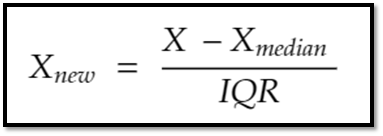

- Logistic Regression membutuhkan scaling karena model ini menggunakan gradient descent untuk mengoptimalkan cost function. Fitur yang terstandarisasi dapat membuat model lama konvergen.
- SVC membutuhkan scaling karena model ini mencoba untuk mencari hyperplane yang memaksimalkan margin antarkelas. Fitur dengan skala yang besar dan dapat mendominasi perhitungan jarak.

In [1030]:
scaler = RobustScaler()

### Resampling
**Terdapat 4 metode *resampling* yang akan dicoba pada setiap model**. Dari keempat metode ini, **kita akan memilih satu yang menghasilkan metrics terbaik**.

- **SMOTE (*Synthetic Minority Over-sampling Technique*)**: SMOTE adalah *resampler* yang hanya bisa menangani *feature* numerikal (kontinu), tidak dengan *feature* kategorikal (nominal).
- ***RandomOverSampler***: Kebalikannya, *resampler* ini bekerja dengan menambah jumlah *sample* dari kelas minoritas secara acak sampai seimbang dengan jumlah *sample* dari kelas mayoritas.
- ***NearMiss***: *NearMiss* bekerja dengan memilih *sample* dari kelas mayoritas yang memiliki jarak terdekat dengan *sample* dari kelas minoritas. Dengan cara ini, *NearMiss* mempertahankan informasi yang penting dari kelas mayoritas sambil mengurangi jumlah sampel untuk mencapai keseimbangan dengan kelas minoritas.
- **SMOTETomek**: SMOTE digunakan untuk menghasilkan sampel sintetis dari kelas minoritas, meningkatkan jumlah data dalam kelas minoritas. Kemudian, Tomek Links diterapkan untuk menghapus pasangan data yang membentuk Tomek Links, yang biasanya menghapus beberapa sampel dari kelas mayoritas, sekaligus membersihkan data dari *noise*.

In [1031]:
smote = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)
nearmiss = NearMiss()
smt = SMOTETomek(random_state=42)

### Cross Validation
Pada bagian modelling, kita akan menggunakan StratifiedKFold. StratifiedKFold adalah metode cross-validation yang memastikan bahwa setiap *fold* data memiliki distribusi proporsi kelas yang sama seperti dataset asli. Maka dai itu, karena setiap fold merepresentasikan distribusi kelas yang sama, evaluasi model pada setiap fold menjadi lebih konsisten dan akurat. Ini membantu dalam mendapatkan estimasi kinerja model yang lebih andal.

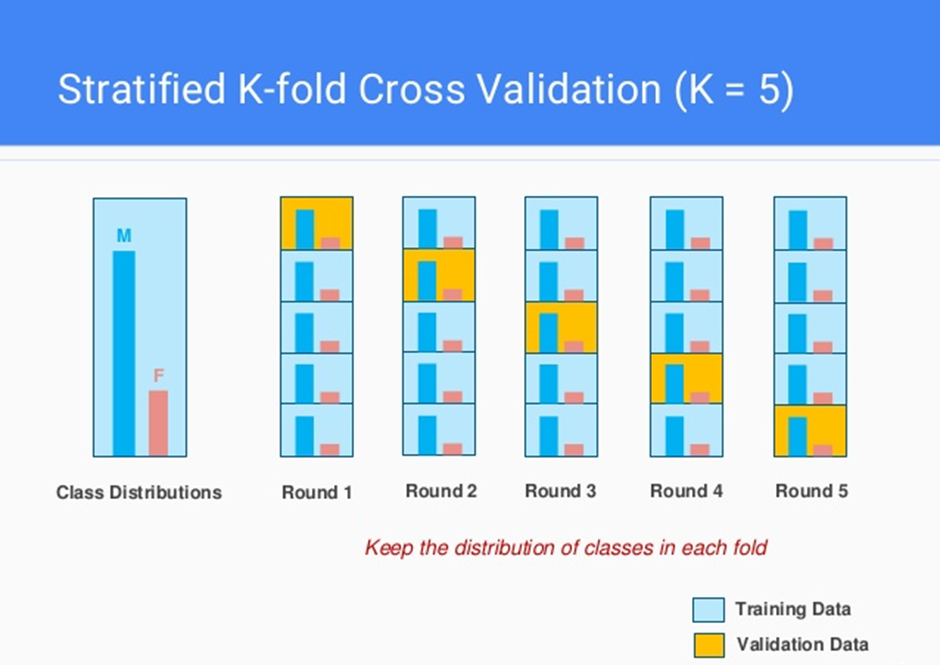

In [1032]:
skfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

### Define X and Y Variables

In [1033]:
X = dfc.drop(['Churn'], axis=1)
y = dfc['Churn']

### Data Splitting

In [1034]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42)

## Pre-processing 2: `dfo` (Dataframe with all outliers)

In [1035]:
dfo = df.copy()
dfo

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

### Handling Missing Value `dfo`

In [1036]:
# Cek Missing Value pada feature 'Tenure'
print('Median Tenure dfo:', dfo['Tenure'].median())
display(dfo[dfo['Tenure'].isna()])

median_tenure_by_address = dfo.groupby('NumberOfAddress')['Tenure'].median()
dfo['Tenure'] = dfo.apply(lambda row: int(9 if pd.isna(median_tenure_by_address.get(row['NumberOfAddress'])) else median_tenure_by_address[row['NumberOfAddress']]) if pd.isna(row['Tenure']) else row['Tenure'], axis=1)

dfo[dfo['Tenure'].isna()]

Median Tenure dfo: 9.0


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
6          50007      1     NaN                Phone         3   
7          50008      1     NaN                Phone         1   
9          50010      1     NaN                Phone         1   
...          ...    ...     ...                  ...       ...   
2756       52757      0     NaN                Phone         2   
2760       52761      0     NaN             Computer         1   
2773       52774      0     NaN                Phone         3   
2783       52784      1     NaN             Computer         3   
2802       52803      0     NaN         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
6                11.0     Cash on Delivery    Male             2.0   
7                 6.0                   CC    Male             3.0   
9                31.0           Debit Card    Male             2.0   
...               ...                  ...     ...             ...   
2756              8.0                  UPI  Female             2.0   
2760              7.0                   CC    Male             2.0   
2773              7.0                   CC    Male             3.0   
2783             15.0             E wallet    Male             2.0   
2802              8.0                   CC  Female             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
1                            4              Mobile                  3   
2                            4              Mobile                  3   
6                            3  Laptop & Accessory                  2   
7                            3              Mobile                  2   
9                            5              Mobile                  3   
...                        ...                 ...                ...   
2756                         3              Mobile                  4   
2760                         4              Mobile                  3   
2773                         4              Mobile                  4   
2783                         3        Mobile Phone                  5   
2802                         3              Mobile                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
6         Divorced                4         0                         14.0   
7         Divorced                3         1                         16.0   
9           Single                2         0                         12.0   
...            ...              ...       ...                          ...   
2756       Married                5         0                         14.0   
2760       Married                2         0                         12.0   
2773       Married                1         0                         14.0   
2783       Married                2         0                         19.0   
2802       Married                3         0                         14.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
6            0.0         1.0                0.0          120.86  
7            2.0         2.0                0.0          122.93  
9            1.0         1.0                1.0          122.93  
...          ...         ...                ...             ...  
2756         0.0         1.0                2.0          121.87  
2760         0.0         1.0  

Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [1037]:
# Cek Missing Value pada feature 'WarehouseToHome'
display(dfo[dfo['WarehouseToHome'].isna()])

# Handling Missing Value dfo pada feature 'WarehouseToHome'
median_distance = int(dfo.loc[(dfo['WarehouseToHome'].notna()), 'WarehouseToHome'].median())
print('Median WarehouseToHome: ', median_distance)

dfo['WarehouseToHome'] = dfo['WarehouseToHome'].fillna(median_distance)

display(dfo[dfo['WarehouseToHome'].isna()])

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
28         50029      0    18.0                Phone         1   
35         50036      0     0.0                Phone         1   
39         50040      0     0.0             Computer         1   
41         50042      0    14.0                Phone         1   
46         50047      1     0.0             Computer         3   
...          ...    ...     ...                  ...       ...   
2780       52781      0    17.0                Phone         1   
2781       52782      0     0.0                Phone         3   
2789       52790      1    19.0                Phone         1   
2794       52795      0     5.0                Phone         1   
2810       52811      0     9.0             Computer         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
28                NaN           Debit Card    Male             2.0   
35                NaN                   CC    Male             3.0   
39                NaN                   CC    Male             3.0   
41                NaN           Debit Card    Male             2.0   
46                NaN                  COD  Female             3.0   
...               ...                  ...     ...             ...   
2780              NaN                   CC    Male             2.0   
2781              NaN                   CC    Male             2.0   
2789              NaN                  COD    Male             3.0   
2794              NaN                  COD    Male             3.0   
2810              NaN                   CC    Male             2.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
28                           3  Laptop & Accessory                  4   
35                           3              Mobile                  2   
39                           4              Mobile                  3   
41                           3              Mobile                  3   
46                           5              Mobile                  5   
...                        ...                 ...                ...   
2780                         3              Mobile                  1   
2781                         3              Mobile                  5   
2789                         3              Mobile                  3   
2794                         3              Mobile                  5   
2810                         1  Laptop & Accessory                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
28         Married                9         0                         18.0   
35        Divorced                2         0                         24.0   
39         Married                2         1                         15.0   
41         Married                5         0                         12.0   
46          Single                1         0                         21.0   
...            ...              ...       ...                          ...   
2780        Single                7         1                         12.0   
2781        Single                2         1                         11.0   
2789       Married                9         0                         11.0   
2794        Single                2         0                         14.0   
2810       Married                5         0                         17.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
28           1.0         1.0               15.0          123.48  
35           0.0         2.0                2.0          123.23  
39           0.0         1.0                1.0          125.66  
41           1.0         1.0                8.0          124.51  
46           1.0         1.0                0.0          123.25  
...          ...         ...                ...             ...  
2780         1.0         1.0                2.0          124.36  
2781         1.0         1.0  

Median WarehouseToHome:  14


Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [1038]:
# Cek Missing Value pada feature 'HourSpendOnApp'
display(dfo[dfo['HourSpendOnApp'].isna()])

# Handling Missing Value dfo pada feature 'HourSpendOnApp'
median_hourspendonapp_by_device = dfo.groupby('NumberOfDeviceRegistered')['HourSpendOnApp'].median()
dfo['HourSpendOnApp'] = dfo.apply(lambda row: int(median_hourspendonapp_by_device[row['NumberOfDeviceRegistered']]) if pd.isna(row['HourSpendOnApp']) else row['HourSpendOnApp'], axis=1)

display(dfo[dfo['HourSpendOnApp'].isna()])

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
4          50005      1     0.0                Phone         1   
8          50009      1    13.0                Phone         3   
16         50017      1     0.0             Computer         1   
37         50038      0     1.0                Phone         1   
44         50045      0     5.0                Phone         1   
...          ...    ...     ...                  ...       ...   
2765       52766      0    14.0                Phone         1   
2771       52772      0     5.0                Phone         1   
2800       52801      0    13.0                Phone         1   
2803       52804      0     8.0                Phone         1   
2809       52810      0     0.0                Phone         3   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
4                12.0                   CC    Male             NaN   
8                 9.0             E wallet    Male             NaN   
16               12.0           Debit Card  Female             NaN   
37               27.0                   CC    Male             NaN   
44               12.0           Debit Card    Male             NaN   
...               ...                  ...     ...             ...   
2765              7.0           Debit Card    Male             NaN   
2771             35.0           Debit Card  Female             NaN   
2800              8.0           Debit Card    Male             NaN   
2803              7.0           Debit Card  Female             NaN   
2809             11.0                  UPI  Female             NaN   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
4                            3           Mobile                  5   
8                            4           Mobile                  3   
16                           4           Mobile                  2   
37                           3           Mobile                  2   
44                           3           Mobile                  3   
...                        ...              ...                ...   
2765                         3           Mobile                  1   
2771                         4           Mobile                  4   
2800                         4           Mobile                  3   
2803                         5           Mobile                  1   
2809                         4           Mobile                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
4           Single                3         0                         11.0   
8         Divorced                2         1                         14.0   
16          Single                2         1                         18.0   
37        Divorced                2         0                         11.0   
44          Single                4         0                         20.0   
...            ...              ...       ...                          ...   
2765       Married                4         0                         22.0   
2771        Single                2         0                         13.0   
2800        Single                3         0                         14.0   
2803       Married                2         0                         12.0   
2809        Single                1         0                         18.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
4            1.0         1.0                3.0          129.60  
8            0.0         1.0                2.0          126.83  
16           1.0         1.0                0.0          129.26  
37           0.0         1.0                2.0          127.13  
44           0.0         1.0                4.0          130.38  
...          ...         ...                ...             ...  
2765         0.0         1.0                0.0          127.82  
2771         0.0         4.0                1.0          128.37  


Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [1039]:
# Cek Missing Value pada feature 'OrderAmountHikeFromlastYear'
display(dfo[dfo['OrderAmountHikeFromlastYear'].isna()])

# Handling Missing Value dfo pada feature 'OrderAmountHikeFromlastYear'
median_orderhike_by_hour = dfo.groupby('HourSpendOnApp')['OrderAmountHikeFromlastYear'].median()
dfo['OrderAmountHikeFromlastYear'] = dfo.apply(lambda row: int(median_orderhike_by_hour[row['HourSpendOnApp']]) if pd.isna(row['OrderAmountHikeFromlastYear']) else row['OrderAmountHikeFromlastYear'], axis=1)

display(dfo[dfo['OrderAmountHikeFromlastYear'].isna()])

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
10         50011      1     4.0         Mobile Phone         1   
40         50041      0    23.0         Mobile Phone         1   
65         50066      0    25.0         Mobile Phone         1   
106        50107      0    15.0         Mobile Phone         1   
108        50109      0    23.0         Mobile Phone         3   
...          ...    ...     ...                  ...       ...   
5534       55535      0    61.0         Mobile Phone         3   
5537       55538      0    23.0             Computer         1   
5561       55562      0    29.0         Mobile Phone         2   
5597       55598      0    13.0             Computer         1   
5603       55604      0    16.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
10               18.0     Cash on Delivery  Female             2.0   
40               17.0           Debit Card  Female             2.0   
65                6.0           Debit Card    Male             3.0   
106              10.0     Cash on Delivery    Male             2.0   
108               6.0          Credit Card  Female             3.0   
...               ...                  ...     ...             ...   
5534             28.0           Debit Card  Female             4.0   
5537              9.0           Debit Card    Male             3.0   
5561             33.0                  UPI    Male             4.0   
5597             16.0           Debit Card    Male             3.0   
5603              9.0           Debit Card    Male             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
10                           3           Others                  3   
40                           3           Others                  4   
65                           4           Others                  3   
106                          3           Others                  2   
108                          3           Others                  2   
...                        ...              ...                ...   
5534                         4          Grocery                  1   
5537                         4           Others                  1   
5561                         2           Others                  4   
5597                         4           Others                  1   
5603                         4           Others                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
10        Divorced                2         0                          NaN   
40          Single                4         0                          NaN   
65        Divorced                1         0                          NaN   
106       Divorced                2         0                          NaN   
108        Married                4         0                          NaN   
...            ...              ...       ...                          ...   
5534       Married                6         1                          NaN   
5537       Married                5         0                          NaN   
5561       Married                6         1                          NaN   
5597        Single                4         0                          NaN   
5603       Married                7         0                          NaN   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
10           9.0        15.0                8.0          295.45  
40           2.0         4.0                4.0          299.26  
65           1.0        11.0                9.0          299.99  
106          0.0        11.0               15.0          292.32  
108          1.0         1.0                6.0          295.17  
...          ...         ...                ...             ...  
5534         1.0         2.0                1.0          303.75  
5537         5.0         5.0                4.0          316.61  


Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [1040]:
# Cek Missing Value pada feature 'CouponUsed'
display(dfo[dfo['CouponUsed'].isna()])

# Handling Missing Value dfo pada feature 'CouponUsed'
median_coupon_by_order = dfo.groupby('OrderCount')['CouponUsed'].median()

dfo['CouponUsed'] = dfo.apply(lambda row: int(median_coupon_by_order[row['OrderCount']]) if pd.isna(row['CouponUsed']) else row['CouponUsed'], axis=1)

display(dfo[dfo['CouponUsed'].isna()])

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
61         50062      0    13.0         Mobile Phone         1   
62         50063      0    28.0         Mobile Phone         1   
69         50070      0    18.0             Computer         1   
112        50113      0    25.0             Computer         3   
138        50139      0    19.0         Mobile Phone         3   
...          ...    ...     ...                  ...       ...   
5354       55355      0    21.0         Mobile Phone         3   
5355       55356      0    23.0         Mobile Phone         1   
5461       55462      0    31.0             Computer         3   
5470       55471      0    31.0             Computer         1   
5592       55593      0    11.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
61               10.0          Credit Card  Female             2.0   
62               20.0          Credit Card    Male             3.0   
69                8.0          Credit Card    Male             3.0   
112               8.0           Debit Card    Male             3.0   
138               8.0     Cash on Delivery  Female             3.0   
...               ...                  ...     ...             ...   
5354              9.0           Debit Card  Female             3.0   
5355              8.0           Debit Card    Male             3.0   
5461              9.0          Credit Card    Male             3.0   
5470             22.0           Debit Card    Male             3.0   
5592             17.0           Debit Card  Female             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
61                           3           Others                  3   
62                           2           Others                  4   
69                           4          Grocery                  2   
112                          4           Others                  3   
138                          5          Grocery                  4   
...                        ...              ...                ...   
5354                         2          Grocery                  4   
5355                         4          Grocery                  3   
5461                         4          Grocery                  4   
5470                         4          Grocery                  3   
5592                         2          Fashion                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
61        Divorced                2         0                         14.0   
62          Single                9         0                         11.0   
69        Divorced               10         0                         23.0   
112         Single                2         1                         18.0   
138       Divorced                4         1                         12.0   
...            ...              ...       ...                          ...   
5354       Married                8         0                         15.0   
5355        Single                6         0                         15.0   
5461       Married                6         0                         23.0   
5470       Married                4         1                         15.0   
5592       Married                3         1                         26.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
61           NaN         9.0                9.0          290.33  
62           NaN         2.0               15.0          287.22  
69           NaN        11.0                8.0          267.92  
112          NaN        15.0               12.0          290.68  
138          NaN         7.0                7.0          268.72  
...          ...         ...                ...             ...  
5354         NaN         2.0                3.0          284.72  
5355         NaN         2.0                1.0          278.79  


Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [1041]:
# Cek Missing Value pada feature 'OrderCount'
display(dfo[dfo['OrderCount'].isna()])

# Handling Missing Value dfo pada feature 'OrderCount'
median_coupon_by_order = dfo.groupby('CouponUsed')['OrderCount'].median()

dfo['OrderCount'] = dfo.apply(lambda row: int(median_coupon_by_order[row['CouponUsed']]) if pd.isna(row['OrderCount']) else row['OrderCount'], axis=1)

display(dfo[dfo['OrderCount'].isna()])

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
64         50065      0    24.0         Mobile Phone         1   
90         50091      0    14.0         Mobile Phone         3   
110        50111      0    16.0         Mobile Phone         3   
120        50121      0     4.0             Computer         1   
143        50144      0    18.0         Mobile Phone         1   
...          ...    ...     ...                  ...       ...   
5565       55566      0     5.0             Computer         1   
5581       55582      0    21.0             Computer         1   
5590       55591      0    12.0         Mobile Phone         1   
5621       55622      1    14.0         Mobile Phone         3   
5622       55623      0    13.0         Mobile Phone         3   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
64                9.0          Credit Card  Female             3.0   
90               12.0           Debit Card  Female             3.0   
110              22.0             E wallet  Female             3.0   
120               9.0          Credit Card    Male             3.0   
143              26.0          Credit Card    Male             3.0   
...               ...                  ...     ...             ...   
5565             17.0          Credit Card  Female             3.0   
5581              8.0          Credit Card  Female             4.0   
5590             17.0          Credit Card  Female             4.0   
5621             35.0             E wallet    Male             3.0   
5622             31.0             E wallet  Female             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
64                           3          Grocery                  4   
90                           3          Fashion                  2   
110                          3          Grocery                  2   
120                          3          Fashion                  3   
143                          3          Grocery                  2   
...                        ...              ...                ...   
5565                         4          Fashion                  3   
5581                         4          Fashion                  4   
5590                         6          Fashion                  3   
5621                         5          Fashion                  5   
5622                         5          Grocery                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
64          Single                4         0                         18.0   
90          Single                4         1                         18.0   
110       Divorced                6         1                         22.0   
120        Married               10         0                         12.0   
143       Divorced                1         1                         14.0   
...            ...              ...       ...                          ...   
5565       Married                6         0                         21.0   
5581       Married                2         0                         19.0   
5590       Married                5         0                         13.0   
5621       Married                6         1                         14.0   
5622       Married                2         0                         12.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
64           0.0         NaN                0.0          237.34  
90           0.0         NaN                0.0          235.91  
110          0.0         NaN                9.0          260.64  
120          1.0         NaN                2.0          236.75  
143          0.0         NaN               10.0          234.96  
...          ...         ...                ...             ...  
5565         4.0         NaN                9.0          235.31  
5581         1.0         NaN               13.0          244.57  


Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [1042]:
# Cek Missing Value pada feature 'DaySinceLastOrder'
display(dfo[dfo['DaySinceLastOrder'].isna()])

# Handling Missing Value dfo pada feature 'DaySinceLastOrder'
median_days_by_order = dfo.groupby('OrderCount')['DaySinceLastOrder'].median()

dfo['DaySinceLastOrder'] = dfo.apply(lambda row: int(median_days_by_order[row['OrderCount']]) if pd.isna(row['DaySinceLastOrder']) else row['DaySinceLastOrder'], axis=1)

display(dfo[dfo['DaySinceLastOrder'].isna()])

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
88         50089      0    24.0         Mobile Phone         1   
97         50098      0    10.0             Computer         1   
126        50127      0    12.0             Computer         1   
146        50147      1    10.0             Computer         1   
151        50152      0     2.0         Mobile Phone         1   
...          ...    ...     ...                  ...       ...   
5591       55592      0     6.0         Mobile Phone         3   
5608       55609      0    15.0         Mobile Phone         3   
5610       55611      0     9.0         Mobile Phone         2   
5623       55624      0     5.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
88               14.0           Debit Card    Male             2.0   
97               17.0                  UPI    Male             2.0   
126               8.0     Cash on Delivery  Female             3.0   
146              35.0           Debit Card    Male             2.0   
151              28.0           Debit Card  Female             3.0   
...               ...                  ...     ...             ...   
5591              8.0             E wallet  Female             3.0   
5608             10.0           Debit Card    Male             3.0   
5610             33.0           Debit Card  Female             3.0   
5623             12.0          Credit Card    Male             4.0   
5626             13.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
88                           4             Fashion                  4   
97                           3             Fashion                  2   
126                          3             Fashion                  3   
146                          3             Fashion                  4   
151                          2             Fashion                  4   
...                        ...                 ...                ...   
5591                         4             Fashion                  1   
5608                         5  Laptop & Accessory                  4   
5610                         4             Fashion                  1   
5623                         4  Laptop & Accessory                  5   
5626                         5             Fashion                  5   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
88        Divorced                6         0                         16.0   
97         Married                2         1                         14.0   
126         Single                1         0                         25.0   
146       Divorced                2         1                         12.0   
151        Married                8         0                         18.0   
...            ...              ...       ...                          ...   
5591       Married                3         0                         20.0   
5608       Married                4         0                         12.0   
5610        Single                3         1                         17.0   
5623        Single                2         0                         20.0   
5626       Married                6         0                         16.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
88           1.0         4.0                NaN          224.90  
97           0.0         1.0                NaN          221.85  
126         10.0        11.0                NaN          209.38  
146          5.0         9.0                NaN          218.49  
151          5.0         6.0                NaN          219.96  
...          ...         ...                ...             ...  
5591         1.0         6.0                NaN          229.22  
5608         2.0         2.0  

Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [1043]:
dfo.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Handling Inconsistent Data `dfo`
Includes:
- Renaming
- Drop `CustomerID`
- Duplicate Data

In [1044]:
dfo.rename(columns={'PreferedOrderCat': 'PreferredOrderCat'}, inplace=True)
dfo

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1    11.0                Phone         1   
2          50003      1    12.0                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             2.0   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered   PreferredOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

In [1045]:
dfo = dfo.drop('CustomerID', axis=1)
print('Jumlah data duplikat setelah drop kolom CustomerID: ', dfo.duplicated().sum())

# Handling Duplicate Data after deleted feature CustomerID
dfo.drop_duplicates(inplace=True)
print("Jumlah data duplikat setelah drop duplikat data: ", sum(dfo.duplicated()))

len(dfc)

Jumlah data duplikat setelah drop kolom CustomerID:  557
Jumlah data duplikat setelah drop duplikat data:  0


4922

### Encoding 2: `dfo`

In [1046]:
dfo['CityTier'] = dfo['CityTier'].astype('category')
dfo['Complain'] = dfo['Complain'].astype('category')

# Define transformers
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'MaritalStatus', 'PreferredOrderCat', 'Complain', 'CityTier']),
    ('ordinal', OrdinalEncoder(), ['SatisfactionScore']),
], remainder='passthrough')

### Scaler 2: `dfo`

Tetap menggunakan RobustScaler untuk algoritma logistic regression dan support vector classifier.

### Resampling 2: `dfo`

Tetap menggunakan SMOTE, NearMIss, RandomOversampler, dan SMOTETomek

### Cross Validation
Tetap menggunakan StratifiedKFold(n_splits=7)

### Define X and Y Variables 2: `dfo`

In [1047]:
X_dfo = dfo.drop(['Churn'], axis=1)
y_dfo = dfo['Churn']

### Data Splitting 2: `dfo`

In [1048]:
X_train_dfo, X_test_dfo, y_train_dfo, y_test_dfo = train_test_split(
    X_dfo,
    y_dfo,
    test_size=0.2,
    stratify=y_dfo,
    random_state=42)

# **Modeling**

## **Models**

Terdapat 8 model yang digunakan untuk memprediksi `Churn`, 3 base model dan 4 model ensemble. Model tersebut antara lain:

**Base Model**:

1. Logistic Regression
2. Decision Tree Classifier
3. Support Vector Classifier

**Ensemble Model**:

1. Random Forest Classifier
2. Ada Boost Classifier
3. Gradient Boosting Classifier
4. Xtreme Gradient Boosting Classifier
5. Bagging Classifier

Disajikan juga eksperimen/percobaan untuk membandingkan model terbaik dari 2 sumber data yang bersih (`dfc`) dan sumber data yang masih memiliki outliers (`dfo`). Hal ini dilakukan karena model sering kali kesulitan dalam mencapai skor yang baik jika terdapat data *outliers* yang diikutsertakan. Kemudian, kita akan memilih satu model terbaik dari masing-masing eksperimen.

Note:
- dfc = dataframe clean (without some outliers)
- dfo = dataframe not clean (with all outliers)



## **Metrics**

Terdapat 4 metrics yang digunakan untuk mengevaluasi model-model di atas:
- **Accuracy**
> Akurasi adalah rasio prediksi yang benar (baik positif maupun negatif) terhadap total jumlah prediksi. Dalam konteks churn e-commerce, akurasi mengukur seberapa baik model memprediksi pelanggan yang akan churn dan yang tidak.

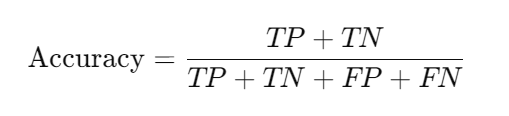

- **Recall**
> Recall mengukur seberapa baik model dapat menemukan semua pelanggan yang benar-benar churn. Recall adalah metrics yang paling penting karena tujuan utama kita adalah untuk meminimalkan jumlah pelanggan yang churn tanpa terdeteksi.

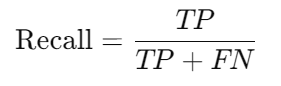

- **Precision**
> Precision mengukur seberapa banyak dari pelanggan yang diprediksi churn benar-benar churn. Ini penting untuk memastikan bahwa sumber daya (diskon, cashback) yang diberikan untuk mengatasi churn tidak sia-sia.

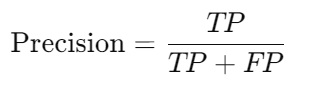

- **F1 Score**
> F1 Score adalah rata-rata harmonis dari precision dan recall. Ini memberikan keseimbangan antara precision dan recall, terutama berguna ketika ada ketidakseimbangan kelas (misalnya, lebih banyak pelanggan yang tidak churn dibandingkan yang churn).

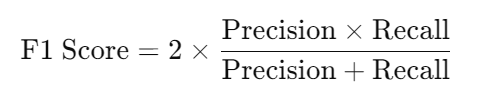

- **ROC Curve** (digunakan pada *final model*)
> ROC adalah grafik yang menunjukkan kemampuan model untuk membedakan antara pelanggan yang churn dan yang tidak churn pada berbagai threshold. Sumbu Y menunjukkan True Positive Rate (Recall) dan sumbu X menunjukkan False Positive Rate (FPR).

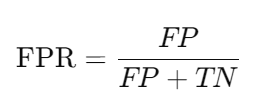

- **AUC Score**
> AUC adalah luas di bawah kurva ROC. Nilai AUC memberikan ukuran kinerja model secara keseluruhan. Semakin dekat nilai AUC ke 1, semakin baik model dalam membedakan antara dua kelas. AUC lebih informatif dalam situasi ketidakseimbangan kelas karena TPR dan FPR tidak bergantung pada prevalensi kelas.

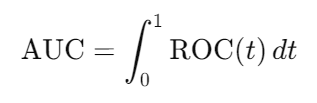

## **Benchmark Experiment 1: `dfc` Dataframe Clean**

### Model Training

In [1049]:
# Define algoritma yang digunakan
lr = LogisticRegression(random_state = 30, max_iter = 1000)
svc = SVC(random_state = 30)
tree = DecisionTreeClassifier(max_depth = 5, random_state = 42)
rf = RandomForestClassifier(random_state = 30)
gradboost = GradientBoostingClassifier(random_state = 42)
adaboost = AdaBoostClassifier(random_state = 30)
xgboost = XGBClassifier(random_state = 30)
bagging = BaggingClassifier(random_state = 30, estimator=rf)

models = [
    ("Logistic Regression", lr),
    ("SVC", svc),
    ("Decision Tree", tree),
    ("Random Forest", rf),
    ("Gradient Boosting", gradboost),
    ("AdaBoost", adaboost),
    ("XGBoost", xgboost),
    ("Bagging", bagging)
]

In [1050]:
def cross_validate_with_sampling_dfc(X_train, y_train, models, scoring, resampler):
    results = []
    for name, algorithm in models:
        if algorithm == lr or algorithm == svc:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("scaler", scaler),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])
        else:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])


        model_cv = cross_validate(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring=scoring,
            error_score="raise",
            n_jobs=-1
        )

        results.append({
            "Model": name,
            "Resampler": resampler.__class__.__name__,
            "Mean Recall": round(model_cv["test_recall"].mean(), 4),
            "Mean Precision": round(model_cv["test_precision"].mean(), 4),
            "Mean F1": round(model_cv["test_f1"].mean(), 4),
            "Mean Accuracy": round(model_cv["test_accuracy"].mean(), 4),
            "Mean AUC Score": round(model_cv['test_roc_auc'].mean(), 4)
        })

    return pd.DataFrame(results).sort_values("Mean Recall", ascending=False)

In [1051]:
cross_validate_with_sampling_dfc(X_train, y_train, models, ["recall", "precision", "f1", 'accuracy', 'roc_auc'], smote)

Model Resampler  Mean Recall  Mean Precision  Mean F1  \
6              XGBoost     SMOTE       0.8314          0.9085   0.8674   
1                  SVC     SMOTE       0.8120          0.6252   0.7057   
0  Logistic Regression     SMOTE       0.8030          0.4744   0.5950   
3        Random Forest     SMOTE       0.7583          0.9119   0.8274   
7              Bagging     SMOTE       0.7091          0.8830   0.7853   
2        Decision Tree     SMOTE       0.6671          0.5982   0.6294   
5             AdaBoost     SMOTE       0.6567          0.6539   0.6543   
4    Gradient Boosting     SMOTE       0.6552          0.7684   0.7064   

   Mean Accuracy  Mean AUC Score  
6         0.9568          0.9765  
1         0.8847          0.9278  
0         0.8136          0.8860  
3         0.9464          0.9781  
7         0.9345          0.9692  
2         0.8664          0.8489  
5         0.8816          0.9009  
4         0.9073          0.9257

In [1052]:
cross_validate_with_sampling_dfc(X_train, y_train, models, ["recall", "precision", "f1", 'accuracy', 'roc_auc'], nearmiss)

Model Resampler  Mean Recall  Mean Precision  Mean F1  \
3        Random Forest  NearMiss       0.9181          0.2636   0.4093   
6              XGBoost  NearMiss       0.9106          0.2705   0.4169   
7              Bagging  NearMiss       0.9032          0.2522   0.3941   
4    Gradient Boosting  NearMiss       0.8479          0.2460   0.3813   
5             AdaBoost  NearMiss       0.7806          0.2328   0.3584   
1                  SVC  NearMiss       0.7763          0.2474   0.3750   
0  Logistic Regression  NearMiss       0.7703          0.3153   0.4463   
2        Decision Tree  NearMiss       0.7359          0.2425   0.3638   

   Mean Accuracy  Mean AUC Score  
3         0.5481          0.7920  
6         0.5657          0.7651  
7         0.5273          0.7485  
4         0.5316          0.6993  
5         0.5245          0.6149  
1         0.5593          0.6925  
0         0.6736          0.7719  
2         0.5596          0.6114

In [1053]:
cross_validate_with_sampling_dfc(X_train, y_train, models, ["recall", "precision", "f1", 'accuracy', 'roc_auc'], ros)

Model          Resampler  Mean Recall  Mean Precision  \
7              Bagging  RandomOverSampler       0.8687          0.8698   
6              XGBoost  RandomOverSampler       0.8553          0.8847   
3        Random Forest  RandomOverSampler       0.8479          0.9133   
1                  SVC  RandomOverSampler       0.8359          0.6149   
0  Logistic Regression  RandomOverSampler       0.8209          0.4676   
4    Gradient Boosting  RandomOverSampler       0.8195          0.6259   
5             AdaBoost  RandomOverSampler       0.8075          0.4958   
2        Decision Tree  RandomOverSampler       0.7642          0.4911   

   Mean F1  Mean Accuracy  Mean AUC Score  
7   0.8683         0.9553          0.9808  
6   0.8691         0.9563          0.9784  
3   0.8785         0.9604          0.9844  
1   0.7070         0.8824          0.9327  
0   0.5945         0.8090          0.8858  
4   0.7078         0.8849          0.9378  
5   0.6132         0.8260          0.9052  
2   0.5956         0.8222          0.8552

In [1054]:
cross_validate_with_sampling_dfc(X_train, y_train, models, ["recall", "precision", "f1", 'accuracy', 'roc_auc'], smt)

Model   Resampler  Mean Recall  Mean Precision  Mean F1  \
6              XGBoost  SMOTETomek       0.8299          0.9010   0.8631   
1                  SVC  SMOTETomek       0.8105          0.6255   0.7053   
0  Logistic Regression  SMOTETomek       0.8030          0.4744   0.5950   
3        Random Forest  SMOTETomek       0.7583          0.9219   0.8312   
7              Bagging  SMOTETomek       0.7165          0.8813   0.7893   
2        Decision Tree  SMOTETomek       0.6791          0.5870   0.6290   
4    Gradient Boosting  SMOTETomek       0.6567          0.7686   0.7075   
5             AdaBoost  SMOTETomek       0.6418          0.6541   0.6457   

   Mean Accuracy  Mean AUC Score  
6         0.9553          0.9766  
1         0.8847          0.9279  
0         0.8136          0.8860  
3         0.9479          0.9779  
7         0.9352          0.9686  
2         0.8641          0.8499  
4         0.9075          0.9253  
5         0.8793          0.9003

Dari hasil training (kita hanya akan membandingkan hasil dari algoritma terbaik pada masing-masing metode), dapat dilihat bahwa:
- Dengan metode NearMiss, model Random Forest menunjukkan nilai recall paling baik (91.81%), namun accuracy-nya sangat buruk (54.81%).
- Pada RandomOversampler, terdapat 2 model yang memiliki performa *outstanding*, yaitu Bagging dan XGBoost. Secara recall, Bagging memiliki nilai yang lebih tinggi dibandingkan metode resampling dan model-model lainnya (86.87%). Namun, XGBoost memiliki nilai F1 dan AUC score yang paling tinggi dengan recall 1.34% lebih rendah dibandingkan Bagging.
- Dengan metode SMOTE, model XGBoost menunjukkan nilai precision dan accuracy paling baik (90.85% dan 95.68%) dengan nilai F1 yang memuaskan (86.74%). Namun recall-nya lebih rendah dibandingkan RandomOversampler (83.14%).
- Dengan metode SMOTETomek, model XGBoost menunjukkan hasil yang memuaskan dengan precision sebesar 90.1%, F1 score sebesar 86.31%, dan accuracy sebesar 97.66%. Namun, recall-nya lebih rendah dibandingkan RandomOversampler (82.99%).



### Predict with Test Set

In [1055]:
# predict to test set menggunakan oversampling
def predict_with_sampling(model, resampler):
    list_name = []
    list_recall_score = []
    list_precision_score = []
    list_f1_score = []
    list_accuracy = []
    list_roc_auc = []

    for name, algorithm in model:
        if algorithm == lr or algorithm == svc:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("scaler", scaler),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])
        else:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])

        pipe_model.fit(X_train, y_train)
        y_pred = pipe_model.predict(X_test)
        recall_scoring = recall_score(y_test, y_pred)
        precision_scoring = precision_score(y_test, y_pred)
        f1_scoring = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)


        list_name.append(name)
        list_recall_score.append(round(recall_scoring, 4))
        list_precision_score.append(round(precision_scoring, 4))
        list_f1_score.append(round(f1_scoring, 4))
        list_accuracy.append(round(accuracy, 4))
        list_roc_auc.append(round(roc_auc, 4))

    if resampler == smote:
        sampling = "SMOTE"
    elif resampler == ros:
        sampling = "RandomOverSampler"
    elif resampler == nearmiss:
        sampling = "NearMiss"
    elif resampler == smt:
        sampling = "SMOTETomek"

    result = pd.DataFrame({
        f"Model - {sampling}" : list_name,
        "Recall Score" : list_recall_score,
        "Precision Score" : list_precision_score,
        "F1 Score" : list_f1_score,
        "Accuracy Score" : list_accuracy,
        "AUC Score" : list_roc_auc,
    })

    return result.sort_values("Recall Score", ascending = False)

In [1056]:
predict_with_sampling(models, smote)

Model - SMOTE  Recall Score  Precision Score  F1 Score  \
6              XGBoost        0.8750           0.9304    0.9018   
1                  SVC        0.8512           0.6413    0.7315   
3        Random Forest        0.8155           0.9195    0.8644   
0  Logistic Regression        0.8036           0.4804    0.6013   
7              Bagging        0.7560           0.8819    0.8141   
2        Decision Tree        0.7083           0.5409    0.6134   
4    Gradient Boosting        0.6845           0.7419    0.7121   
5             AdaBoost        0.6786           0.6129    0.6441   

   Accuracy Score  AUC Score  
6          0.9675     0.9308  
1          0.8934     0.8766  
3          0.9563     0.9004  
0          0.8183     0.8124  
7          0.9411     0.8676  
2          0.8477     0.7924  
4          0.9056     0.8178  
5          0.8721     0.7952

In [1057]:
predict_with_sampling(models, nearmiss)

Model - NearMiss  Recall Score  Precision Score  F1 Score  \
6              XGBoost        0.9464           0.2886    0.4423   
3        Random Forest        0.9226           0.2705    0.4184   
7              Bagging        0.9107           0.2563    0.4000   
4    Gradient Boosting        0.8750           0.2574    0.3978   
2        Decision Tree        0.7976           0.2486    0.3791   
5             AdaBoost        0.7976           0.2339    0.3617   
0  Logistic Regression        0.7679           0.3108    0.4425   
1                  SVC        0.7560           0.2520    0.3780   

   Accuracy Score  AUC Score  
6          0.5929     0.7333  
3          0.5624     0.7055  
7          0.5340     0.6836  
4          0.5482     0.6780  
2          0.5543     0.6510  
5          0.5198     0.6301  
0          0.6701     0.7089  
1          0.5756     0.6473

In [1058]:
predict_with_sampling(models, ros)

Model - RandomOverSampler  Recall Score  Precision Score  F1 Score  \
6                   XGBoost        0.9107           0.9444    0.9273   
7                   Bagging        0.9107           0.8793    0.8947   
3             Random Forest        0.8929           0.9317    0.9119   
4         Gradient Boosting        0.8750           0.6309    0.7332   
1                       SVC        0.8631           0.6277    0.7268   
5                  AdaBoost        0.8631           0.5035    0.6360   
0       Logistic Regression        0.8333           0.4878    0.6154   
2             Decision Tree        0.7917           0.5135    0.6230   

   Accuracy Score  AUC Score  
6          0.9756     0.9498  
7          0.9635     0.9425  
3          0.9706     0.9397  
4          0.8914     0.8849  
1          0.8893     0.8789  
5          0.8315     0.8440  
0          0.8223     0.8267  
2          0.8365     0.8187

In [1059]:
predict_with_sampling(models, smt)

Model - SMOTETomek  Recall Score  Precision Score  F1 Score  \
6              XGBoost        0.8810           0.9487    0.9136   
1                  SVC        0.8512           0.6413    0.7315   
3        Random Forest        0.8095           0.9379    0.8690   
0  Logistic Regression        0.8036           0.4804    0.6013   
7              Bagging        0.7738           0.8966    0.8307   
2        Decision Tree        0.7083           0.5409    0.6134   
4    Gradient Boosting        0.6964           0.7312    0.7134   
5             AdaBoost        0.6786           0.6129    0.6441   

   Accuracy Score  AUC Score  
6          0.9716     0.9356  
1          0.8934     0.8766  
3          0.9584     0.8993  
0          0.8183     0.8124  
7          0.9462     0.8777  
2          0.8477     0.7924  
4          0.9046     0.8219  
5          0.8721     0.7952

Dari hasil testing yang dilakukan dengan keempat metode resampling menggunakan berbagai algoritma pada data dfc, model XGBoost + RandomOversampler menunjukkan performa terbaik. Karena, metode tersebut menghasilkan recall dan precision yang paling seimbang pada fase training dan testing. Sehingga pada tahap **hyperparameter tuning dengan dfc, kita akan menggunakan RandomOversampler dengan model XGBoost**.

## **Benchmark Experiment 2: `dfo` Dataframe with all Outliers**

### Model Training

In [1060]:
def cross_validate_with_sampling_dfo(X_train_dfo, y_train_dfo, models, scoring, resampler):
    results = []

    for name, algorithm in models:
        if algorithm == lr or algorithm == svc:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("scaler", scaler),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])
        else:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])

        model_cv = cross_validate(
            estimator=pipe_model,
            X=X_train_dfo,
            y=y_train_dfo,
            cv=skfold,
            scoring=scoring,
            error_score="raise",
            n_jobs=-1
        )

        results.append({
            "Model": name,
            "Resampler": resampler.__class__.__name__,
            "Mean Recall": round(model_cv["test_recall"].mean(), 4),
            "Mean Precision": round(model_cv["test_precision"].mean(), 4),
            "Mean F1": round(model_cv["test_f1"].mean(), 4),
            "Mean Accuracy": round(model_cv["test_accuracy"].mean(), 4),
            "Mean AUC Score": round(model_cv["test_roc_auc"].mean(), 4),
        })


    return pd.DataFrame(results).sort_values("Mean Recall", ascending=False)

In [1061]:
cross_validate_with_sampling_dfo(X_train_dfo, y_train_dfo, models, ["recall", "precision", "f1", 'accuracy', 'roc_auc'], smote)

Model Resampler  Mean Recall  Mean Precision  Mean F1  \
6              XGBoost     SMOTE       0.8276          0.8833   0.8540   
0  Logistic Regression     SMOTE       0.8186          0.4817   0.6064   
1                  SVC     SMOTE       0.8008          0.6030   0.6870   
3        Random Forest     SMOTE       0.7518          0.9036   0.8203   
7              Bagging     SMOTE       0.7221          0.8524   0.7816   
4    Gradient Boosting     SMOTE       0.6894          0.7511   0.7188   
5             AdaBoost     SMOTE       0.6744          0.6298   0.6503   
2        Decision Tree     SMOTE       0.6642          0.5951   0.6249   

   Mean Accuracy  Mean AUC Score  
6         0.9532          0.9761  
0         0.8238          0.8909  
1         0.8793          0.9238  
3         0.9455          0.9760  
7         0.9332          0.9679  
4         0.9105          0.9262  
5         0.8802          0.9069  
2         0.8679          0.8542

In [1062]:
cross_validate_with_sampling_dfo(X_train_dfo, y_train_dfo, models, ["recall", "precision", "f1", 'accuracy', 'roc_auc'], nearmiss)

Model Resampler  Mean Recall  Mean Precision  Mean F1  \
6              XGBoost  NearMiss       0.9272          0.2729   0.4215   
3        Random Forest  NearMiss       0.9078          0.2560   0.3992   
7              Bagging  NearMiss       0.8900          0.2483   0.3882   
4    Gradient Boosting  NearMiss       0.8484          0.2445   0.3795   
5             AdaBoost  NearMiss       0.8053          0.2276   0.3546   
1                  SVC  NearMiss       0.7949          0.2577   0.3889   
0  Logistic Regression  NearMiss       0.7564          0.3172   0.4466   
2        Decision Tree  NearMiss       0.7059          0.2260   0.3422   

   Mean Accuracy  Mean AUC Score  
6         0.5769          0.7637  
3         0.5461          0.7762  
7         0.5340          0.7451  
4         0.5392          0.6923  
5         0.5126          0.5877  
1         0.5853          0.7051  
0         0.6888          0.7859  
2         0.5495          0.6162

In [1063]:
cross_validate_with_sampling_dfo(X_train_dfo, y_train_dfo, models, ["recall", "precision", "f1", 'accuracy', 'roc_auc'], ros)

Model          Resampler  Mean Recall  Mean Precision  \
6              XGBoost  RandomOverSampler       0.8737          0.8672   
7              Bagging  RandomOverSampler       0.8544          0.8520   
1                  SVC  RandomOverSampler       0.8380          0.5835   
4    Gradient Boosting  RandomOverSampler       0.8231          0.6104   
3        Random Forest  RandomOverSampler       0.8217          0.9005   
5             AdaBoost  RandomOverSampler       0.8127          0.5111   
0  Logistic Regression  RandomOverSampler       0.8112          0.4689   
2        Decision Tree  RandomOverSampler       0.7889          0.4882   

   Mean F1  Mean Accuracy  Mean AUC Score  
6   0.8701         0.9569          0.9793  
7   0.8531         0.9512          0.9799  
1   0.6871         0.8736          0.9307  
4   0.7005         0.8832          0.9379  
3   0.8590         0.9554          0.9844  
5   0.6272         0.8396          0.9145  
0   0.5939         0.8162          0.8912  
2   0.6013         0.8260          0.8744

In [1064]:
cross_validate_with_sampling_dfo(X_train_dfo, y_train_dfo, models, ["recall", "precision", "f1", 'accuracy', 'roc_auc'], smt)

Model   Resampler  Mean Recall  Mean Precision  Mean F1  \
6              XGBoost  SMOTETomek       0.8350          0.8990   0.8656   
0  Logistic Regression  SMOTETomek       0.8186          0.4817   0.6064   
1                  SVC  SMOTETomek       0.8008          0.6038   0.6875   
3        Random Forest  SMOTETomek       0.7429          0.8927   0.8108   
7              Bagging  SMOTETomek       0.7102          0.8591   0.7774   
4    Gradient Boosting  SMOTETomek       0.6923          0.7547   0.7221   
5             AdaBoost  SMOTETomek       0.6730          0.6306   0.6504   
2        Decision Tree  SMOTETomek       0.6642          0.5951   0.6249   

   Mean Accuracy  Mean AUC Score  
6         0.9571          0.9752  
0         0.8238          0.8909  
1         0.8795          0.9237  
3         0.9426          0.9750  
7         0.9327          0.9676  
4         0.9118          0.9257  
5         0.8805          0.9058  
2         0.8679          0.8552

Dari hasil training (kita hanya akan membandingkan hasil dari algoritma terbaik pada masing-masing metode), dapat dilihat bahwa:
- Dengan metode NearMiss, model XGBoost menunjukkan nilai recall paling baik (92.72%), namun accuracy-nya sangat buruk (57.69%).
- Pada RandomOversampler, model XGBoost memperoleh recall paling tinggi (87.37%) dengan precision sebesar 86.72% dan accuracy 95.69%.
- Dengan metode SMOTE, model XGBoost menunjukkan nilai precision paling baik (88.33%) dengan nilai F1 dan accuracy yang memuaskan (85.4% dan 95.32%). Namun recall-nya lebih rendah dibandingkan RandomOversampler (82.76%).
- Dengan metode SMOTETomek, model XGBoost menunjukkan hasil yang memuaskan dengan precision sebesar 89.9%, F1 score sebesar 86.56%, dan memperoleh accuracy tertinggi (95.71%). Namun, recall-nya lebih rendah dibandingkan RandomOversampler (83.5%).



### Predict with Test Set

In [1065]:
# predict to test set menggunakan oversampling
def predict_with_sampling_dfo(model, resampler):
    list_name = []
    list_recall_score = []
    list_precision_score = []
    list_f1_score = []
    list_accuracy = []
    list_roc_auc = []

    for name, algorithm in model:
        if algorithm == lr or algorithm == svc:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("scaler", scaler),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])
        else:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])

        pipe_model.fit(X_train_dfo, y_train_dfo)
        y_pred_dfo = pipe_model.predict(X_test_dfo)
        recall_scoring_dfo = recall_score(y_test_dfo, y_pred_dfo)
        precision_scoring_dfo = precision_score(y_test_dfo, y_pred_dfo)
        f1_scoring_dfo = f1_score(y_test_dfo, y_pred_dfo)
        accuracy_dfo = accuracy_score(y_test_dfo, y_pred_dfo)
        roc_auc_dfo = roc_auc_score(y_test_dfo, y_pred_dfo)

        list_name.append(name)
        list_recall_score.append(round(recall_scoring_dfo, 4))
        list_precision_score.append(round(precision_scoring_dfo, 4))
        list_f1_score.append(round(f1_scoring_dfo, 4))
        list_accuracy.append(round(accuracy_dfo, 4))
        list_roc_auc.append(round(roc_auc_dfo, 4))

    if resampler == smote:
        sampling = "SMOTE"
    elif resampler == ros:
        sampling = "RandomOverSampler"
    elif resampler == nearmiss:
        sampling = "NearMiss"
    elif resampler == smt:
        sampling = "SMOTETomek"

    result = pd.DataFrame({
        f"Model - {sampling}" : list_name,
        "Recall Score" : list_recall_score,
        "Precision Score" : list_precision_score,
        "F1 Score" : list_f1_score,
        "Accuracy Score" : list_accuracy,
        "AUC Score" : list_roc_auc,
    })

    return result.sort_values("Recall Score", ascending = False)

In [1066]:
predict_with_sampling_dfo(models, smote)

Model - SMOTE  Recall Score  Precision Score  F1 Score  \
6              XGBoost        0.8750           0.9130    0.8936   
1                  SVC        0.8274           0.5744    0.6780   
3        Random Forest        0.7798           0.9704    0.8647   
0  Logistic Regression        0.7798           0.4396    0.5622   
7              Bagging        0.7619           0.9343    0.8393   
4    Gradient Boosting        0.6548           0.7383    0.6940   
5             AdaBoost        0.6429           0.6000    0.6207   
2        Decision Tree        0.5655           0.6129    0.5882   

   Accuracy Score  AUC Score  
6          0.9655     0.9292  
1          0.8700     0.8529  
3          0.9596     0.8875  
0          0.7990     0.7913  
7          0.9517     0.8756  
4          0.9044     0.8044  
5          0.8700     0.7789  
2          0.8690     0.7473

In [1067]:
predict_with_sampling_dfo(models, nearmiss)

Model - NearMiss  Recall Score  Precision Score  F1 Score  \
3        Random Forest        0.9286           0.2562    0.4015   
6              XGBoost        0.9226           0.2618    0.4079   
7              Bagging        0.9107           0.2460    0.3873   
4    Gradient Boosting        0.8512           0.2416    0.3763   
1                  SVC        0.8214           0.2400    0.3715   
0  Logistic Regression        0.8036           0.3147    0.4523   
5             AdaBoost        0.7976           0.2298    0.3569   
2        Decision Tree        0.7857           0.2387    0.3662   

   Accuracy Score  AUC Score  
3          0.5419     0.6969  
6          0.5567     0.7033  
7          0.5232     0.6785  
4          0.5330     0.6605  
1          0.5399     0.6527  
0          0.6778     0.7282  
5          0.5241     0.6338  
2          0.5498     0.6443

In [1068]:
predict_with_sampling_dfo(models, ros)

Model - RandomOverSampler  Recall Score  Precision Score  F1 Score  \
6                   XGBoost        0.9167           0.9222    0.9194   
7                   Bagging        0.9167           0.8800    0.8980   
3             Random Forest        0.8869           0.9613    0.9226   
1                       SVC        0.8750           0.5632    0.6853   
4         Gradient Boosting        0.8393           0.5573    0.6698   
5                  AdaBoost        0.8155           0.4644    0.5918   
0       Logistic Regression        0.7857           0.4385    0.5629   
2             Decision Tree        0.7381           0.5188    0.6093   

   Accuracy Score  AUC Score  
6          0.9734     0.9507  
7          0.9655     0.9459  
3          0.9754     0.9399  
1          0.8670     0.8702  
4          0.8631     0.8535  
5          0.8138     0.8145  
0          0.7980     0.7931  
2          0.8433     0.8012

In [1069]:
predict_with_sampling_dfo(models, smt)

Model - SMOTETomek  Recall Score  Precision Score  F1 Score  \
6              XGBoost        0.8810           0.9308    0.9052   
1                  SVC        0.8274           0.5744    0.6780   
3        Random Forest        0.8155           0.9580    0.8810   
0  Logistic Regression        0.7798           0.4396    0.5622   
7              Bagging        0.7321           0.9111    0.8119   
4    Gradient Boosting        0.6488           0.7415    0.6921   
5             AdaBoost        0.6429           0.6000    0.6207   
2        Decision Tree        0.5655           0.6129    0.5882   

   Accuracy Score  AUC Score  
6          0.9695     0.9340  
1          0.8700     0.8529  
3          0.9635     0.9042  
0          0.7990     0.7913  
7          0.9438     0.8590  
4          0.9044     0.8020  
5          0.8700     0.7789  
2          0.8690     0.7473

Dari hasil testing yang dilakukan dengan keempat metode resampling menggunakan berbagai algoritma pada data dfo, model RandomOversampler menunjukkan performa terbaik. Karena, metode tersebut menghasilkan recall dan accuracy yang seimbang pada fase training dan testing. Selain itu, Bagging juga menghasilkan recall yang sama besar dengan XGBoost. Namun sayangnya, precision-nya lebih rendah. Sehingga pada tahap **hyperparameter tuning dengan data `dfo`, kita akan menggunakan RandomOversampler dengan model XGBoost**.

# **Hyperparameter Tuning**
Hyperparameter Tuning adalah proses untuk menemukan set hyperparameter yang optimal bagi model machine learning, sehingga model dapat memberikan performa terbaiknya pada data yang diberikan. Hyperparameter tuning akan dilakukan dengan menggunakan RandomizedSearchCV. RandomizedSearchCV adalah metode yang digunakan dalam library scikit-learn Python untuk melakukan pencarian secara acak dari kombinasi parameter dalam proses tuning. Tujuannya adalah untuk menemukan kombinasi parameter yang optimal untuk model prediktif tertentu, yang bergantung pada algoritma yang digunakan. Metode ini sering digunakan sebagai alternatif untuk GridSearchCV, yang melakukan pencarian ekshaustif melalui grid parameter yang ditentukan.


## **How XGBoost Classifier Works**


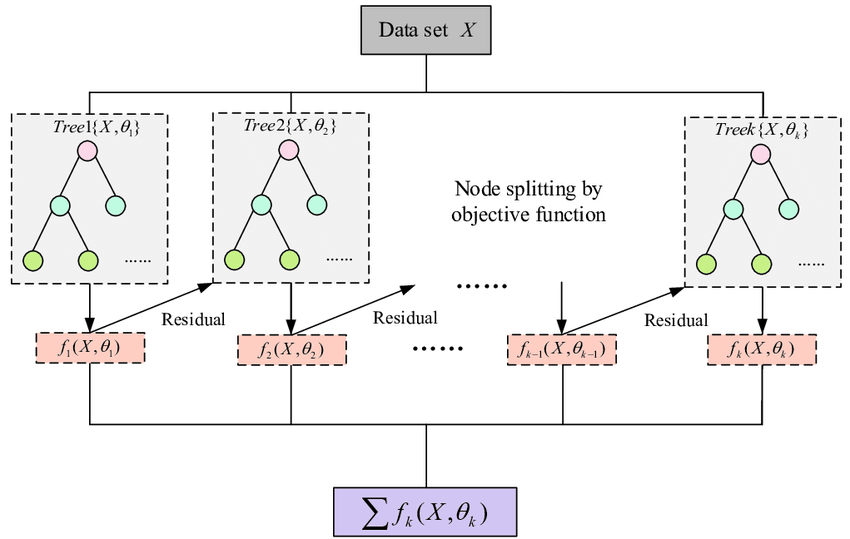

XGBoost, atau Extreme Gradient Boosting, adalah algoritma *ensemble machine learning* yang sangat kuat dan populer, khususnya untuk tugas klasifikasi. **XGBoostClassifier bekerja dengan membangun serangkaian *decision tree* secara bertahap. Pada setiap iterasi, *tree* baru dibuat untuk memperbaiki kesalahan yang dibuat oleh *tree* sebelumnya. Proses ini disebut boosting**, di mana model-model lemah digabungkan untuk membentuk model yang kuat.

**XGBoostClassifier mengoptimalkan loss function dengan menggunakan metode *gradient boosting***. Artinya pada setiap langkah, algoritma mencoba mengurangi kesalahan prediksi dengan meminimalkan gradien dari loss function. Setiap *tree* baru ditambahkan berdasarkan perbedaan (residual) antara nilai yang diprediksi oleh model saat ini dan nilai target sebenarnya.

Algoritma ini juga menerapkan teknik regularisasi untuk mencegah *overfitting*, yaitu ketika model menjadi terlalu kompleks dan mulai "menghafal" data *training* alih-alih belajar dari pola yang ada. Regularisasi dilakukan dengan menambahkan penalti terhadap kompleksitas *tree* dalam fungsi kehilangan. XGBoost juga menawarkan fitur-fitur canggih seperti pengelompokan fitur, sampling baris dan kolom, serta penanganan nilai yang hilang secara otomatis, yang membuatnya sangat fleksibel dan efektif untuk berbagai jenis data.

Selain itu, **XGBoost dikenal karena efisiensinya dalam hal waktu *training* dan penggunaan memori, berkat implementasi yang dioptimalkan dan kemampuannya untuk menjalankan komputasi paralel**. Ini menjadikannya pilihan yang sangat baik untuk memproses dataset besar dan kompleks, serta memberikan hasil yang sangat akurat dalam kompetisi pembelajaran mesin.

## XGBoost +`dfc` + RandomOversampler

**Theoretical Basis of XGBoost Model**

Menurut [*official documentation*](https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html) XGBoost, terdapat dua cara untuk mengatasi *overfitting*:
- Mengontrol kompleksitas model secara langsung dengan mengatur parameter *max_depth*, *min_child_weight*, dan *gamma*.
- Menambahkan *randomness* untuk membuat proses *testing* menjadi kebal terhadap *noise* dengan mengatur parameter *subsample* dan *colsample_bytree*. Kemudian bisa juga untuk menurunkan nilai *eta* atau *learning rate*, serta menaikkan nilai *num_round*.

Selain itu, terdapat cara untuk mengatasi *imbalanced data* dengan menggunakan parameter *scale_pos_weight*, yang berarti kita tidak perlu melakukan *oversampling* lagi pada algoritma XGBoost. Berikut adalah parameter yang kita gunakan saat tuning pada algoritma XGBoost:
- ***eta:*** *learning rate* yang mengontrol kontribusi setiap *decision tree* dalam model. Nilai yang lebih rendah memerlukan lebih banyak *tree* untuk model yang kuat.
- ***n_estimators:*** Jumlah iterasi atau *decision tree* yang akan dibangun.
- ***max_depth:*** Kedalaman maksimum dari setiap *decision tree* dalam *ensemble*.
- ***min_child_weight:*** Minimum jumlah sampel yang diperlukan untuk membagi *node*.
- ***gamma:*** Minimum penurunan kerugian yang diperlukan untuk membuat *split* tambahan dalam *node*.
- ***subsample:*** Ukuran *sample* yang akan digunakan pada setiap iterasi. Mengatur nilai kurang dari 1 menghasilkan stokastisitas, yang membantu menghindari overfitting.
- ***colsample_bytree:*** Jumlah *feature* yang akan digunakan dalam setiap iterasi. Ini mengontrol variabilitas *feature* antar *tree*.
- ***max_delta_step:*** Mengontrol seberapa cepat kita mengizinkan model untuk bergerak.
- ***scale_pos_weight:*** Menyeimbangkan kelas positif dan negatif dalam kasus *imbalanced data*.
- ***max_bin:*** Mengontrol jumlah *bin* yang digunakan untuk menerapkan algoritma *histogram-based split*.

Hyperparameter tuning akan dilakukan menggunakan RandomizedSearchCV. Untuk mencegah ketidakseimbangan precision dan recall, kita akan melakukan refit dengan memperhatikan F1 score. Dengan n_iter=300, kita mencoba 300 kombinasi untuk mencari parameter terbaik. Selain itu, kita juga menggunakan StratifiedKFold untuk melakukan cross validation untuk memastikan bahwa hasil yang diperoleh stabil dan tidak hanya kebetulan dari satu subset data.

In [209]:
xgboost = XGBClassifier(random_state = 30)
ros = RandomOverSampler(random_state = 42)

# Hyperparameter space
hyperparam_space = {
    "algorithm__eta": [0.1, 0.2, 0.05],
    "algorithm__n_estimators": range(300, 1001, 100),
    "algorithm__max_depth": range(5, 11),
    "algorithm__min_child_weight": [3, 5, 7],
    "algorithm__gamma": [0, 0.1, 0.2],
    "algorithm__subsample": [0.7, 0.8, 0.9],
    "algorithm__colsample_bytree": [0.7, 0.8, 0.9],
    "algorithm__max_delta_step": range(1, 11),
    "algorithm__scale_pos_weight": [10, 20, 30],
    "algorithm__max_bin": [255, 275, 300, 350]
}

# Definisikan pipeline
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("resampler", ros),
    ("algorithm", xgboost)
])

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy':make_scorer(accuracy_score),
    'roc_auc':make_scorer(roc_auc_score)
}

# Definisikan StratifiedKFold
skfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Definisikan RandomizedSearchCV
xgboost_tuning = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=scoring,
    refit='f1',
    n_jobs=-1,
    n_iter=300,
    random_state=30,
    error_score="raise"
)

# Fit model menggunakan grid search
xgboost_tuning.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['PreferredLoginDevice',
                                                                                'PreferredPaymentMode',
                                                                                'Gender',
                                                                                'MaritalStatus',
                                                                                'PreferredOrderCat',
                                                                                'Complain',
                                                                                'CityTier...
                                        'algorithm__min_child_weight': [3, 5,
                                                                        7],
                                        'algorithm__n_estimators': range(300, 1001, 100),
                                        'algorithm__scale_pos_weight': [10, 20,
                                                                        30],
                                        'algorithm__subsample': [0.7, 0.8,
                                                                 0.9]},
                   random_state=30, refit='f1',
                   scoring={'accuracy': make_scorer(accuracy_score),
                            'f1': make_scorer(f1_score),
                            'precision': make_scorer(precision_score),
                            'recall': make_scorer(recall_score),
                            'roc_auc': make_scorer(roc_auc_score)})

In [210]:
print('XGBoost Classifier')
print('Best_score:', xgboost_tuning.best_score_)
print('Best_params:', xgboost_tuning.best_params_)

XGBoost Classifier
Best_score: 0.8815823799989199
Best_params: {'algorithm__subsample': 0.8, 'algorithm__scale_pos_weight': 10, 'algorithm__n_estimators': 600, 'algorithm__min_child_weight': 3, 'algorithm__max_depth': 9, 'algorithm__max_delta_step': 2, 'algorithm__max_bin': 255, 'algorithm__gamma': 0, 'algorithm__eta': 0.05, 'algorithm__colsample_bytree': 0.7}


Dari hasil di atas, kita dapatkan bahwa parameter terbaiknya adalah:
- subsample = 0.8
- scale_pos_weight = 10
- n_estimators = 600
- min_child_weight = 3
- max_depth = 9
- max_delta_step = 2
- max_bin = 255
- gamma = 0
- eta = 0.05
- colsample_bytree = 0.7

Dengan score F1 terbaik sebesar 88.15823799989199%

## XGBoost +`dfo` + RandomOversampler



Hyperparameter tuning akan dilakukan menggunakan RandomizedSearchCV. Untuk mencegah ketidakseimbangan precision dan recall, kita akan melakukan refit dengan memperhatikan F1 score. Dengan n_iter=300, kita mencoba 300 kombinasi untuk mencari parameter terbaik. Selain itu, kita juga menggunakan StratifiedKFold untuk melakukan cross validation untuk memastikan bahwa hasil yang diperoleh stabil dan tidak hanya kebetulan dari satu subset data.

In [211]:
xgboost = XGBClassifier(random_state = 30)
ros = RandomOverSampler(random_state = 42)

# Hyperparameter space
hyperparam_space = {
    "algorithm__eta": [0.1, 0.2, 0.05],
    "algorithm__n_estimators": range(300, 1001, 100),
    "algorithm__max_depth": range(5, 11),
    "algorithm__min_child_weight": [3, 5, 7],
    "algorithm__gamma": [0, 0.1, 0.2],
    "algorithm__subsample": [0.7, 0.8, 0.9],
    "algorithm__colsample_bytree": [0.7, 0.8, 0.9],
    "algorithm__max_delta_step": range(1, 11),
    "algorithm__scale_pos_weight": [10, 20, 30],
    "algorithm__max_bin": [255, 275, 300, 350]
}

# Definisikan pipeline
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("resampler", ros),
    ("algorithm", xgboost)
])

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy':make_scorer(accuracy_score),
    'roc_auc':make_scorer(roc_auc_score)
}

# Definisikan StratifiedKFold
skfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Definisikan RandomizedSearchCV
xgboost_tuning_dfo = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=scoring,
    refit='f1',
    n_jobs=-1,
    n_iter=300,
    random_state=30,
    error_score="raise"
)

# Fit model menggunakan grid search
xgboost_tuning_dfo.fit(X_train_dfo, y_train_dfo)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['PreferredLoginDevice',
                                                                                'PreferredPaymentMode',
                                                                                'Gender',
                                                                                'MaritalStatus',
                                                                                'PreferredOrderCat',
                                                                                'Complain',
                                                                                'CityTier...
                                        'algorithm__min_child_weight': [3, 5,
                                                                        7],
                                        'algorithm__n_estimators': range(300, 1001, 100),
                                        'algorithm__scale_pos_weight': [10, 20,
                                                                        30],
                                        'algorithm__subsample': [0.7, 0.8,
                                                                 0.9]},
                   random_state=30, refit='f1',
                   scoring={'accuracy': make_scorer(accuracy_score),
                            'f1': make_scorer(f1_score),
                            'precision': make_scorer(precision_score),
                            'recall': make_scorer(recall_score),
                            'roc_auc': make_scorer(roc_auc_score)})

In [212]:
print('XGBoost Classifier')
print('Best_score:', xgboost_tuning_dfo.best_score_)
print('Best_params:', xgboost_tuning_dfo.best_params_)

XGBoost Classifier
Best_score: 0.8748528038827661
Best_params: {'algorithm__subsample': 0.9, 'algorithm__scale_pos_weight': 10, 'algorithm__n_estimators': 400, 'algorithm__min_child_weight': 3, 'algorithm__max_depth': 9, 'algorithm__max_delta_step': 3, 'algorithm__max_bin': 350, 'algorithm__gamma': 0.1, 'algorithm__eta': 0.2, 'algorithm__colsample_bytree': 0.8}


Dari hasil di atas, kita dapatkan bahwa parameter terbaiknya adalah:
- subsample = 0.9
- scale_pos_weight = 10
- n_estimators = 400
- min_child_weight = 3
- max_depth = 9
- max_delta_step = 3
- max_bin = 350
- gamma = 0.1
- eta = 0.2
- colsample_bytree = 0.8

Dengan score F1 terbaik sebesar 87.48528038827661%

## Predict to Test Data

In [213]:
xgboost_pipe = pipe_model1 = Pipeline([
    ("preprocessing", transformer),
    ("resampler", ros),
    ("algorithm", xgboost)
])

xgboost_pipe_dfo = pipe_model2 = Pipeline([
    ("preprocessing", transformer),
    ("resampler", ros),
    ("algorithm", xgboost)
])

models = [
    ("XGBoost Benchmark (dfc)", xgboost_pipe),
    ("XGBoost Tuned (dfc)", xgboost_tuning.best_estimator_),
    ("XGBoost Benchmark (dfo)", xgboost_pipe_dfo),
    ("XGBoost Tuned (dfo)", xgboost_tuning_dfo.best_estimator_)
]

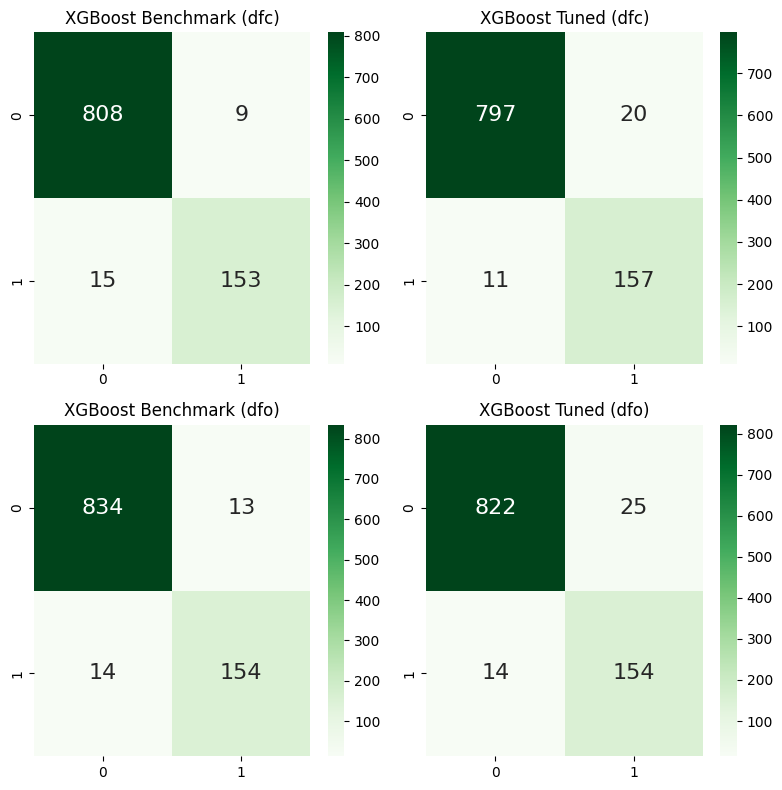

In [214]:
list_name = []
list_recall = []
list_precision = []
list_f1_score = []
list_accuracy = []
list_roc_auc = []

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for ax, (name, algorithm) in zip(axes.flatten(), models):
    if "dfc" in name:
        algorithm.fit(X_train, y_train)
        y_pred = algorithm.predict(X_test)
        y_true = y_test
    else:
        algorithm.fit(X_train_dfo, y_train_dfo)
        y_pred = algorithm.predict(X_test_dfo)
        y_true = y_test_dfo

    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    list_name.append(name)
    list_recall.append(round(recall, 4))
    list_precision.append(round(precision, 4))
    list_f1_score.append(round(f1, 4))
    list_accuracy.append(round(accuracy, 4))
    list_roc_auc.append(round(roc_auc, 4))

    ax.set_title(name)
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,
               cmap="Greens", fmt="g", ax=ax, annot_kws={"size": 16})
plt.tight_layout()
plt.show()

In [215]:
df_predict_result = pd.DataFrame({
    "Model" : list_name,
    "Recall Score" : list_recall,
    "Precision Score" : list_precision,
    "F1 Score" : list_f1_score,
    "Accuracy Score" : list_accuracy,
    'AUC Score': list_roc_auc
})
df_predict_result

Model  Recall Score  Precision Score  F1 Score  \
0  XGBoost Benchmark (dfc)        0.9107           0.9444    0.9273   
1      XGBoost Tuned (dfc)        0.9345           0.8870    0.9101   
2  XGBoost Benchmark (dfo)        0.9167           0.9222    0.9194   
3      XGBoost Tuned (dfo)        0.9167           0.8603    0.8876   

   Accuracy Score  AUC Score  
0          0.9756     0.9498  
1          0.9685     0.9550  
2          0.9734     0.9507  
3          0.9616     0.9436

Model `XGBoost` yang telah di-hyperparameter tuning pada data `dfc` memperoleh hasil recall paling baik. Model ini memiliki recall (93.45%) dan precision (88.70%) yang paling seimbang dengan accuracy yang sangat baik (96.85%). Namun, model lainnya memiliki precision dan F1 score yang lebih baik.

## Loss Calculation based on the Prediction
Mengetahui kerugian yang ditimbulkan oleh kesalahan prediksi model sangat penting untuk bisnis *e-commerce* karena beberapa alasan:

1. Biaya Retensi Pelanggan: **Jika model salah memprediksi pelanggan yang mungkin churn, biaya yang dikeluarkan untuk mempertahankan pelanggan tersebut mungkin sia-sia**. Sebaliknya, **jika pelanggan yang berpotensi churn tidak teridentifikasi, bisnis kehilangan kesempatan untuk menghemat biaya retensi yang efektif**.
2. Biaya Akuisisi Pelanggan: Mengakuisisi pelanggan baru lebih mahal daripada mempertahankan yang sudah ada. **Salah prediksi dalam churn dapat meningkatkan biaya akuisisi, karena bisnis perlu mengalokasikan dana lebih besar untuk menarik pelanggan baru**.
3. Pengeluaran Bulanan Pelanggan: Memahami berapa banyak yang dibelanjakan pelanggan setiap bulan dapat membantu mengukur potensi pendapatan yang hilang jika model salah memprediksi churn. **Pelanggan yang churn berpotensi membawa pendapatan besar, dan kehilangan mereka berdampak signifikan pada profitabilitas**.


Untuk mengetahui berapa kerugian yang ditimbulkan oleh model ketika salah memprediksi, kita perlu menentukan `Customer Spending per Month` (CSPM), `Customer Acquisition Cost` (CAC), dan `Customer Retention Cost` (CRC).
- Menurut [yaguara.co](https://www.yaguara.co/online-shopping-statistics/), pembeli online di Amerika Serikat menghabiskan rata-rata \$5381/tahun atau `$448.4167/bulan` pada tahun 2023. Nilai ini akan menjadi CSPM.
- Menurut [semrush.com](https://www.semrush.com/blog/customer-retention-stats/), untuk menarik 1 customer baru, perusahaan perlu dana sebesar `$29/customer`. Nilai ini akan bertindak sebagai `CAC`.
- Kemudian, misalkan kita memberikan `diskon 5%` untuk customer yang diprediksi akan churn. Artinya \$448.4167*0.05 = `$22.433/customer`

In [216]:
def calculate_loss(fp, fn, crc, cspm, cac):

    # Cost of retaining false positives
    fp_loss = fp * crc

    # Revenue loss from false negatives
    fn_loss_revenue = fn * cspm

    # Cost of acquiring new customers to replace false negatives
    fn_loss_acquisition = fn * cac

    # Total loss from false negatives
    fn_total_loss = fn_loss_revenue + fn_loss_acquisition

    # Total loss
    total_loss = fp_loss + fn_total_loss

    return {
        "Cost of retaining loyal customers (from false positives)": fp_loss,
        "Cost of revenue loss because of unprepared churn customers (from false negatives)": fn_loss_revenue,
        "Cost of acquiring new customers to replace unprepared churn customers (from false negatives)": fn_loss_acquisition,
        "Total Revenue Loss because of unprepared churn customers": fn_total_loss,
        "Total Loss": total_loss
    }

In [217]:
crc = 22.433  # Customer retention cost per month
cspm = 448.4167  # Customer spending per month
cac = 29  # Customer acquisition cost
def evaluate_and_calculate_loss(model, X_train, y_train, X_test, y_test, crc, cspm, cac):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


    losses = calculate_loss(fp, fn, crc, cspm, cac)
    return losses


model_losses = {}


for name, model in models:
    if "dfc" in name:
        losses = evaluate_and_calculate_loss(model, X_train, y_train, X_test, y_test, crc, cspm, cac)
    else:
        losses = evaluate_and_calculate_loss(model, X_train_dfo, y_train_dfo, X_test_dfo, y_test_dfo, crc, cspm, cac)

    model_losses[name] = losses


for model_name, losses in model_losses.items():
    print(f"Losses for {model_name}:")
    for key, value in losses.items():
        print(f"{key}: ${value}")
    print("\n")


Losses for XGBoost Benchmark (dfc):
Cost of retaining loyal customers (from false positives): $201.897
Cost of revenue loss because of unprepared churn customers (from false negatives): $6726.2505
Cost of acquiring new customers to replace unprepared churn customers (from false negatives): $435
Total Revenue Loss because of unprepared churn customers: $7161.2505
Total Loss: $7363.1475


Losses for XGBoost Tuned (dfc):
Cost of retaining loyal customers (from false positives): $448.65999999999997
Cost of revenue loss because of unprepared churn customers (from false negatives): $4932.5837
Cost of acquiring new customers to replace unprepared churn customers (from false negatives): $319
Total Revenue Loss because of unprepared churn customers: $5251.5837
Total Loss: $5700.2437


Losses for XGBoost Benchmark (dfo):
Cost of retaining loyal customers (from false positives): $291.629
Cost of revenue loss because of unprepared churn customers (from false negatives): $6277.8338
Cost of acquirin

Dari hasil di atas, kita juga melihat bahwa model XGBoost memiliki total loss terendah dari keempat model yang ada. Maka dari itu, kita akan memilih model **XGBoost + RandomOversampler + dfc yang telah di-tuned** sebagai final model.

# Final Model (XGBoost Tuned + `dfc` + RandomOversampler)
Jadi final model yang digunakan adalah `XGBoost(subsample = 0.9, scale_pos_weight = 10, n_estimators = 800, min_child_weight = 3, max_depth = 10, max_delta_step = 8, max_bin = 275, gamma = 0, eta = 0.05, colsample_bytree = 0.7)` yang dilatih pada `dfc` dengan resampler `RandomOversampler`.



## Recall Score

In [218]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('resampler', RandomOverSampler(random_state=42)),
    ('XGBoost', XGBClassifier(random_state = 30,
                              subsample = 0.9, scale_pos_weight = 10, n_estimators = 800,
                              min_child_weight = 3, max_depth = 10, max_delta_step = 8,
                              max_bin = 275, gamma = 0, eta = 0.05, colsample_bytree = 0.7))])

final_pipeline.fit(X_train, y_train)
ytest_pred = final_pipeline.predict(X_test)

recall = recall_score(y_test, ytest_pred)
print("Recall score on the test set: ", recall)

Recall score on the test set:  0.9345238095238095


## Classification Report

In [219]:
print("Classification report:\n", classification_report(y_test, ytest_pred, digits=4))
print('ROC-AUC Score:', roc_auc_score(y_test, ytest_pred))

Classification report:
               precision    recall  f1-score   support

           0     0.9864    0.9780    0.9822       817
           1     0.8971    0.9345    0.9155       168

    accuracy                         0.9706       985
   macro avg     0.9418    0.9562    0.9488       985
weighted avg     0.9712    0.9706    0.9708       985

ROC-AUC Score: 0.9562459928891998


- Model ini menghasilkan akurasi sebesar 96.75%. Artinya model berhasil memprediksi 96.75% data secara benar.
- Precision (1) menunjukkan proporsi prediksi positif yang benar dari keseluruhan prediksi positif. Artinya, dari semua pelanggan yang diprediksi churn, 88.20% benar-benar churn.
- Precision (0) sebesar 98.64% berarti, dari semua pelanggan yang diprediksi tidak churn, 98.64% benar-benar tidak churn.
- Recall (1) menunjukkan proporsi data positif yang benar-benar terprediksi positif dari keseluruhan data yang sebenarnya positif. Artinya, dari semua pelanggan yang benar-benar churn, model mampu mendeteksi 93.45% dengan benar.
- Recall (0) sebesar 97.43% dari semua pelanggan yang benar-benar tidak churn, model mampu mendeteksi 97.43% dengan benar.
- Dengan AUC Score sebesar 95.441%, artinya jika kita memilih dua pelanggan secara acak, satu yang churn dan satu yang tidak churn, model memiliki peluang sekitar 95.441% untuk memprediksi dengan benar pelanggan mana yang akan churn dan mana yang tidak.

## Confusion Matrix and ROC Curve

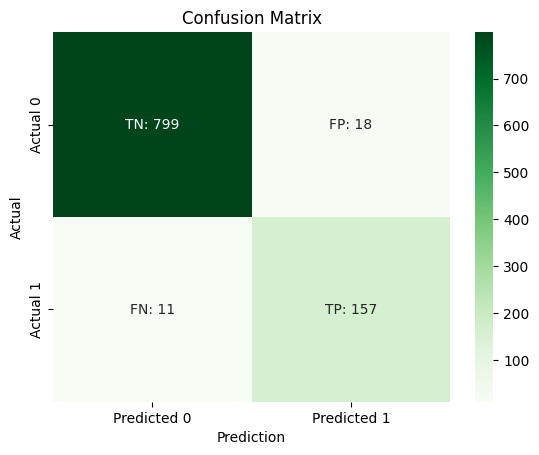

In [220]:
conf_matrix = confusion_matrix(y_test, ytest_pred)
labels = [f'TN: {conf_matrix[0, 0]}', f'FP: {conf_matrix[0, 1]}', f'FN: {conf_matrix[1, 0]}', f'TP: {conf_matrix[1, 1]}']

# Plot the confusion matrix with annotations
sns.heatmap(conf_matrix, annot=np.array(labels).reshape(2, 2), fmt='', cmap='Greens', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- True Negatives (TN): Sebanyak 799 pelanggan yang sebenarnya tidak churn (Actual 0) diprediksi dengan benar sebagai tidak churn (Predicted 0).
- False Positives (FP): Sebanyak 18 pelanggan yang sebenarnya tidak churn (Actual 0) diprediksi secara keliru sebagai churn (Predicted 1).
- False Negatives (FN): Sebanyak 11 pelanggan yang sebenarnya churn (Actual 1) diprediksi secara keliru sebagai tidak churn (Predicted 0).
- True Positives (TP): Sebanyak 157 pelanggan yang sebenarnya churn (Actual 1) diprediksi dengan benar sebagai churn (Predicted 1).
- Tingkat akurasi dari model ini sangat tinggi, karena jumlah TN dan TP (953) jauh lebih tinggi daripada jumlah FP dan FN (32). Ini menunjukkan bahwa model secara umum bekerja dengan baik dalam memprediksi churn dan tidak churn.
- Recall (Sensitivity): Model ini cukup sensitif dalam mendeteksi pelanggan yang churn dengan nilai recall sebesar 157/(157+11). Recall tinggi menunjukkan bahwa model efektif dalam mengidentifikasi pelanggan yang benar-benar akan churn.
- Precision: Model ini juga cukup presisi dalam memprediksi churn, yang berarti bahwa ketika model memprediksi pelanggan akan churn, kemungkinan besar prediksi tersebut benar.

Secara keseluruhan, model ini memiliki performa yang baik dalam memprediksi churn dengan jumlah kesalahan yang relatif rendah. Kita pun juga berhasil dalam emmbuat model yang meminimalkan nilai false negative. Namun, ada beberapa pelanggan yang salah diprediksi, baik dalam hal tidak churn (FN) maupun churn (FP). Perbaikan lebih lanjut dapat difokuskan pada pengurangan jumlah FP dan FN untuk meningkatkan keakuratan prediksi secara keseluruhan.








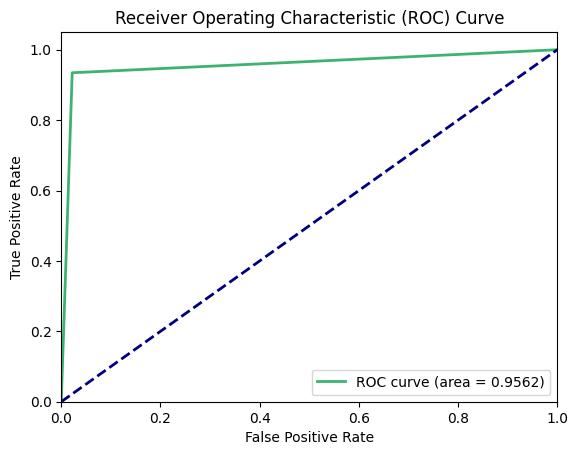

In [221]:
# Hitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred)

# Hitung AUC
roc_auc = roc_auc_score(y_test, ytest_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='mediumseagreen', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- Area di bawah kurva ROC (AUC) adalah 0.9544, yang sangat mendekati 1. Ini menunjukkan bahwa model Anda memiliki kemampuan yang sangat tinggi dalam membedakan antara kelas positif (churn) dan negatif (tidak churn). Semakin dekat nilai AUC ke 1, semakin baik model tersebut.
- Kurva ROC yang Anda tunjukkan berada jauh di atas garis diagonal (garis putus-putus biru), yang menunjukkan bahwa model jauh lebih baik daripada tebakan acak (yang akan memiliki AUC = 0.5).



## Feature Importance
Feature importance adalah ukuran seberapa penting masing-masing fitur dalam model machine learning, biasanya diukur dengan melihat dampak fitur tersebut terhadap prediksi model. Feature importance biasanya dihitung secara intrinsik oleh model machine learning itu sendiri. Misalnya, dalam Random Forest atau Gradient Boosting, feature importance dihitung berdasarkan seberapa banyak fitur tersebut digunakan untuk membagi data dalam *decision tree*.

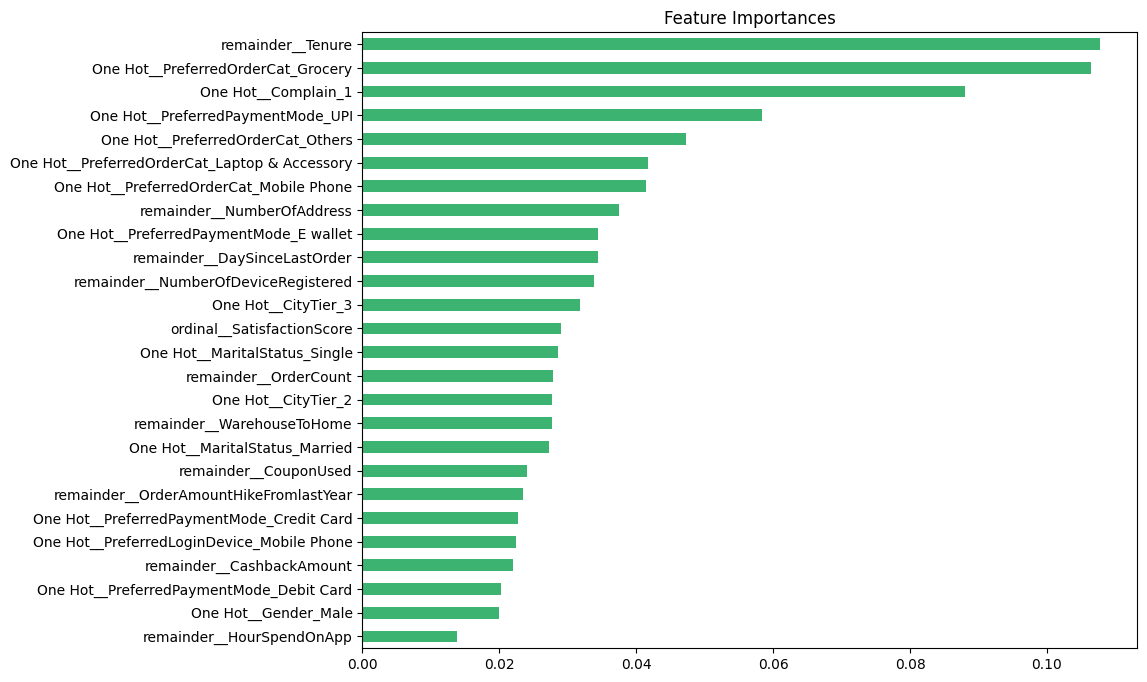

In [222]:
best_model = xgboost_tuning.best_estimator_
coef1 = pd.Series(best_model['algorithm'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True)

plt.figure(figsize = (10, 8))
coef1.plot(kind='barh', title='Feature Importances', color='mediumseagreen')
plt.show()

Berikut ini merupakan *top 10* kepentingan sebuah variabel dalam memprediksi churn atau tidaknya seseorang dalam model XGBoost tersebut.
1. `Tenure`: Durasi pelanggan berlangganan layanan (tenure) sangat berpengaruh dalam memprediksi churn. Pelanggan dengan masa langganan lebih pendek lebih cenderung churn dibandingkan yang telah berlangganan lama, mengindikasikan tingkat kepuasan dan loyalitas yang berkembang seiring waktu.
2. `PreferredOrderCat_Grocery`: Fitur ini memiliki pengaruh terbesar terhadap model prediksi churn. Ini menunjukkan bahwa preferensi pelanggan untuk kategori belanja "Grocery" sangat berpengaruh dalam menentukan apakah pelanggan akan churn atau tidak. Hal ini bisa diindikasikan oleh sifat kebutuhan belanja kebutuhan sehari-hari yang lebih konsisten.
3. `Complain_1`: Pelanggan yang pernah mengajukan komplain memiliki pengaruh signifikan terhadap churn. Ini menunjukkan bahwa keluhan pelanggan merupakan indikator kuat ketidakpuasan dan potensi churn.
4. `PreferredPaymentMode_UPI`: Metode pembayaran melalui UPI (Unified Payments Interface) mempengaruhi churn. Ini mungkin berkaitan dengan kenyamanan atau masalah teknis yang dialami pelanggan saat menggunakan metode ini.
5. `PreferredOrderCat_Others`: Kategori pesanan yang tidak umum atau tergolong "Others" juga berpengaruh pada churn. Pelanggan yang sering memesan barang-barang dalam kategori ini mungkin lebih eksperimental dan mudah berpindah jika tidak puas.
6. `PreferredOrderCat_Laptop & Accessory`: Pelanggan yang sering memesan kategori laptop dan aksesoris memiliki pengaruh moderat dalam churn. Produk dengan harga tinggi seperti laptop memiliki ekspektasi kualitas dan layanan yang tinggi dari pelanggan.
7. `PreferredOrderCat_Mobile Phone`: Pelanggan yang sering memesan kategori mobile phone memiliki pengaruh moderat dalam churn. Produk dengan harga tinggi seperti mobile phone memiliki ekspektasi kualitas dan layanan yang tinggi dari pelanggan.
9. `NumberOfAddress`: Jumlah alamat yang ditambahkan user memiliki pengaruh moderat dalam churn.
10. `PreferredPaymentMode_E Wallet`: Metode pembayaran melalui *e-wallet* memengaruhi churn atau tidaknya seorang pelanggan. Pada bagian data analisis, kita mengetahui bahwa proporsi churn pelanggan yang memilih *e-wallet* lebih cenderung churn.

## SHAP
SHAP (SHapley Additive exPlanations) adalah metode berbasis teori permainan untuk menjelaskan output dari model machine learning. Dikembangkan oleh Scott Lundberg dan Su-In Lee, SHAP bertujuan untuk mengatasi masalah interpretabilitas dalam model machine learning yang kompleks. Shap menggunakan nilai Shapley dari teori *game* kooperatif untuk menghitung kontribusi setiap fitur. SHAP membantu dalam memahami bagaimana setiap fitur input berkontribusi terhadap prediksi model dan mampu menangkap interaksi antarfitur. Hal ini memberikan pandangan yang transparan mengenai pengaruh masing-masing fitur terhadap hasil prediksi. Dengan menggunakan nilai SHAP, kita dapat mengidentifikasi fitur-fitur yang paling penting yang mempengaruhi prediksi model.



Berikut ini perbedaan antara Feature Importance dan SHAP:

| No |  Aspek | Feature Importance | SHAP |
| --- | --- | --- | --- |
| 1 | Pendekatan | Model-based (misalnya, split counts) | Game theory (nilai Shapley) |
| 2 | Perspektif | Global | Lokal |
| 3 | Interaksi Fitur |	Tidak menangkap interaksi fitur |	Menangkap interaksi fitur|
| 4 | Interpretasi |	Mudah dan cepat	| Lebih kompleks tetapi lebih mendalam|
| 5 | Komputasi	| Cepat dan efisien	| Komputasi intensif |

In [223]:
pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('resampler', ros),
    ('classifier', XGBClassifier(random_state = 30,
                              subsample = 0.9, scale_pos_weight = 10, n_estimators = 800,
                              min_child_weight = 3, max_depth = 10, max_delta_step = 8,
                              max_bin = 275, gamma = 0, eta = 0.05, colsample_bytree = 0.7))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'MaritalStatus',
                                                   'PreferredOrderCat',
                                                   'Complain', 'CityTier']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['SatisfactionScore'])])),
                ('resampler', RandomOverSampler(random_state=42)),
                ('cla...
                               eval_metric=None, feature_types=None, gamma=0,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=275, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=8,
                               max_depth=10, max_leaves=None,
                               min_child_weight=3, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=800, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [224]:
X_train_encod = pipeline.named_steps['preprocessor'].transform(X_train)

# Membuat nama kolom
onehot_feature = list(pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out())
ordinal_feature = ['SatisfactionScore']  # OrdinalEncoder tidak mengubah nama kolom
scaled_feature = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CashbackAmount', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
feature_names = onehot_feature + ordinal_feature + scaled_feature

100%|===================| 3922/3937 [03:26<00:00]       

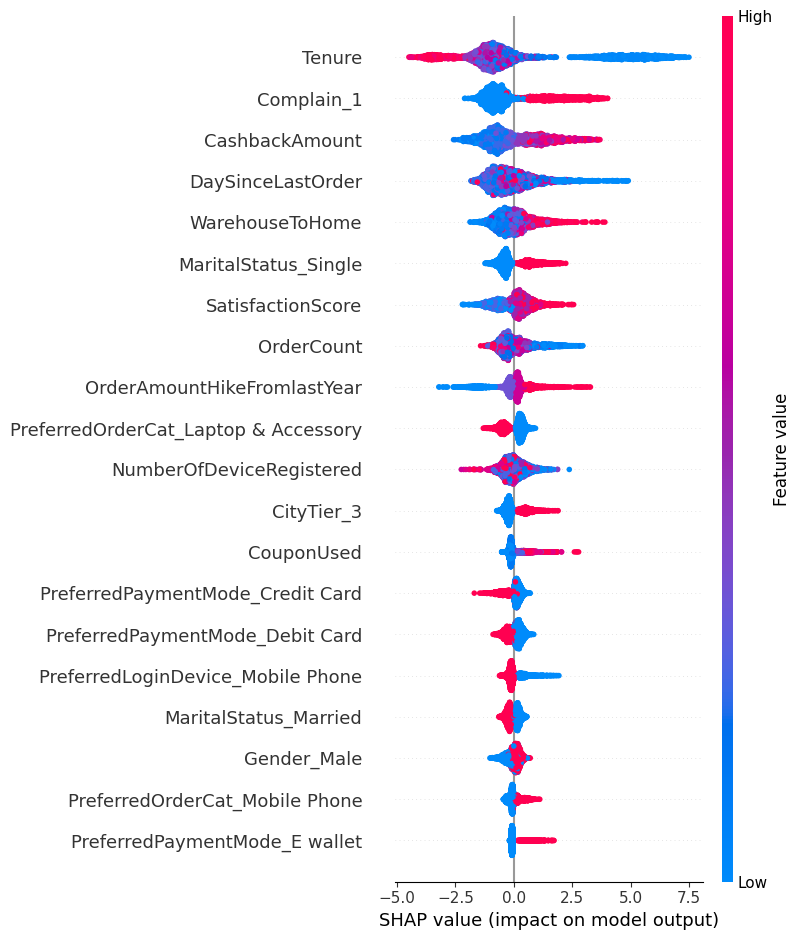

In [225]:
shap_explainer = shap.TreeExplainer(pipeline.named_steps['classifier'], data=X_train_encod)
shap_values = shap_explainer.shap_values(X_train_encod)

shap.summary_plot(shap_values, X_train_encod, feature_names=feature_names)

Berdasarkan SHAP value, kita melihat beberapa fitur yang penting di antaranya:

- `Tenure`: Pelanggan dengan masa keanggotaan yang lebih lama cenderung tidak churn. Nilai SHAP yang lebih negatif untuk tenure yang lebih tinggi menunjukkan bahwa pelanggan dengan masa keanggotaan yang lebih lama memiliki kemungkinan churn yang lebih rendah.

- `Complain_1`: Pelanggan yang mengajukan keluhan (Complain = 1) cenderung memiliki nilai SHAP yang lebih tinggi, menunjukkan bahwa keluhan meningkatkan kemungkinan pelanggan untuk churn. Ini menunjukkan bahwa keluhan pelanggan adalah indikator kuat dari ketidakpuasan yang dapat mengarah pada churn.

- `CashbackAmount`: Pelanggan yang menerima jumlah cashback lebih rendah cenderung lebih mungkin untuk churn. Ini menunjukkan bahwa penawaran cashback yang lebih besar dapat membantu dalam mengurangi churn.

- `DaySinceLastOrder`: Pelanggan yang melakukan pemesanan terakhir lebih lama cenderung memiliki nilai SHAP yang lebih tinggi, menunjukkan bahwa mereka lebih mungkin untuk churn. Hal ini dapat menunjukkan bahwa pelanggan yang tidak aktif dalam waktu yang lama lebih berisiko untuk churn.

- `WarehouseToHome`: Jarak dari gudang ke rumah berpengaruh pada churn. Semakin dekat jaraknya, semakin rendah kemungkinan pelanggan untuk churn, menunjukkan bahwa waktu pengiriman yang cepat dapat meningkatkan kepuasan pelanggan.

- `MaritalStatus_Single`: Status pernikahan juga berpengaruh. Pelanggan yang berstatus single cenderung lebih mungkin untuk churn dibandingkan dengan pelanggan yang sudah menikah.

- `SatisfactionScore`: Skor kepuasan pelanggan menunjukkan bahwa skor yang lebih tinggi mengurangi kemungkinan churn, sementara skor rendah meningkatkan kemungkinan churn. Ini adalah indikator langsung dari kepuasan pelanggan terhadap layanan.

- `OrderCount`: Pelanggan yang sering memesan (OrderCount tinggi) cenderung tidak churn, sedangkan yang jarang memesan lebih mungkin churn. Ini menunjukkan bahwa pelanggan yang sering berbelanja lebih terikat dengan platform.

- `OrderAmountHikeFromlastYear`: Peningkatan jumlah pesanan dari tahun sebelumnya berpengaruh terhadap churn. Pelanggan yang jumlah pesanannya meningkat cenderung tidak churn, menunjukkan bahwa peningkatan pengeluaran adalah indikator loyalitas.

- `PreferredOrderCat_Laptop & Accessory`: Preferensi untuk kategori ini cenderung meningkatkan kemungkinan churn

Dari interpretasi SHAP Value di atas, hasil ini cukup sesuai dengan hasil analisis kami pada bagian Data Analisis, memberikan wawasan yang mendalam tentang faktor-faktor yang mempengaruhi churn dan membantu dalam merumuskan strategi untuk meningkatkan retensi pelanggan.

## Predict Probability
`predict_proba` adalah metode dalam model klasifikasi yang digunakan untuk mengembalikan probabilitas kelas dari setiap prediksi. Metode ini menyediakan probabilitas keanggotaan setiap kelas untuk setiap contoh input, bukan hanya prediksi kelas tunggal (0 dan 1). Kali ini kita akan melihat prediksi peluang churn pada variabel `Tenure`, `PreferredOrderCat`, dan `CashbackAmount`.

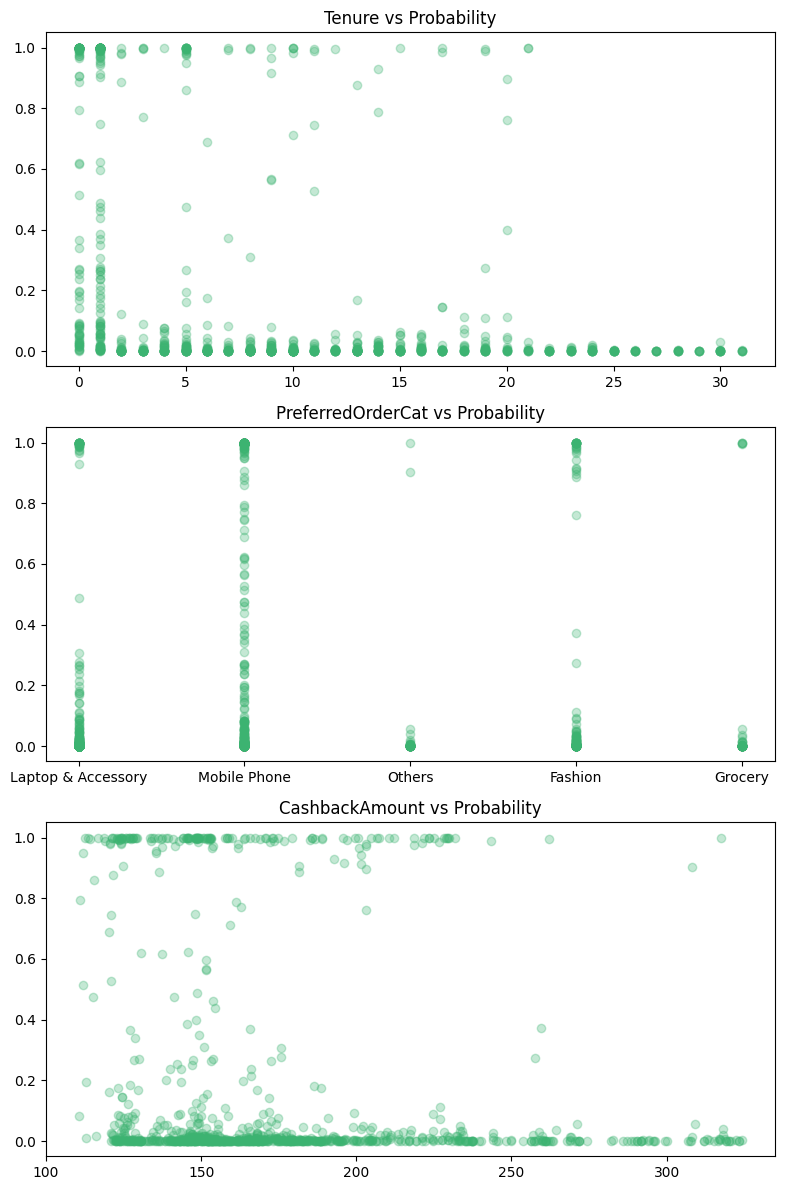

In [226]:
probaresult = X_test.copy()

proba = final_pipeline.predict_proba(X_test)[:,1]
probaresult['Probability'] = proba

fig, axs = plt.subplots(3, figsize=(8,12))

# Scatter plot 1
axs[0].scatter(probaresult['Tenure'], probaresult['Probability'], alpha=0.3, color='mediumseagreen')
axs[0].set_title('Tenure vs Probability')

# Scatter plot 2
axs[1].scatter(probaresult['PreferredOrderCat'], probaresult['Probability'], alpha=0.3, color='mediumseagreen')
axs[1].set_title('PreferredOrderCat vs Probability')

axs[2].scatter(probaresult['CashbackAmount'], probaresult['Probability'], alpha=0.3, color='mediumseagreen')
axs[2].set_title('CashbackAmount vs Probability')


plt.tight_layout()
plt.show()

Ada beberapa hal yang dapat disimpulkan dari plot tersebut:
- Pelanggan dengan masa keanggotaan yang lebih lama cenderung lebih loyal dan memiliki probabilitas churn yang lebih rendah.
- Kategori `Grocery` menunjukkan probabilitas churn yang rendah. Kebanyakan titik berada di bagian bawah grafik.
- Kategori `Laptop & Accessory` dan `Mobile Phone` menunjukkan variasi probabilitas churn, tetapi secara umum, pelanggan yang membeli produk ini tidak memiliki probabilitas churn yang sangat tinggi. Titik-titiknya tersebar lebih merata, namun ada kecenderungan untuk berada di tengah-tengah grafik. Ini kemungkininan disebabkan oleh pelanggan yang cenderung lebih berhati-hati dan loyal setelah menemukan platform yang terpercaya dalam membeli barang elektronik.
- Pelanggan yang memilih kategori `Fashion` menunjukkan beberapa titik dengan probabilitas churn tinggi. Hal ini mungkin disebabkan oleh masalah dengan ukuran atau kualitas produk fashion yang dapat menyebabkan ketidakpuasan pelanggan.
- Mayoritas pelanggan yang memiliki probabilitas churn yang tinggi (> 40%) menerima cashback yang rendah (\$100-\$220). Sedangkan pelanggan yang memiliki probabilitas churn yang rendah (\< 20%) menerima cashback yang lebih tinggi (\$250-\$310)

Sehingga dari hasil di atas, dapat disimpulkan bahwa menyediakan layanan yang memuaskan di kategori fashion dan elektronik dapat membantu mengurangi churn di kategori tersebut. Selain itu, fokus pada retensi pelanggan baru dapat membantu mengurangi churn.

In [227]:
probaresult = X_test.copy()

proba = final_pipeline.predict_proba(X_test)[:,1]
probaresult['Probability'] = proba

probaresult.head(10)

Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
2884      22         Mobile Phone        3                9   
1837       7         Mobile Phone        1                6   
4538       5         Mobile Phone        1               31   
2370       4         Mobile Phone        3               11   
3172      16         Mobile Phone        1               36   
4185       1             Computer        3               18   
819       28         Mobile Phone        1                8   
3530       8         Mobile Phone        1               12   
4691      16             Computer        1                9   
2041       5         Mobile Phone        1                6   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
2884             E wallet    Male               3                         3   
1837           Debit Card  Female               3                         1   
4538          Credit Card  Female               4                         5   
2370     Cash on Delivery    Male               2                         3   
3172          Credit Card    Male               3                         6   
4185                  UPI    Male               3                         2   
819           Credit Card  Female               2                         5   
3530          Credit Card    Male               3                         5   
4691           Debit Card    Male               3                         4   
2041     Cash on Delivery  Female               3                         4   

       PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
2884  Laptop & Accessory                  4      Divorced                5   
1837        Mobile Phone                  1        Single                3   
4538  Laptop & Accessory                  5        Single                3   
2370  Laptop & Accessory                  3       Married                2   
3172  Laptop & Accessory                  2        Single                6   
4185  Laptop & Accessory                  3       Married               10   
819               Others                  3      Divorced                5   
3530  Laptop & Accessory                  1       Married                3   
4691             Fashion                  1       Married                4   
2041        Mobile Phone                  4        Single                2   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
2884        0                           13           3           3   
1837        0                           16           1           1   
4538        0                           20           2           2   
2370        0                           19           1           1   
3172        0                           20           2           2   
4185        0                           13           2           2   
819         0                           14           5           9   
3530        0                           15           5           5   
4691        1                           15           5          14   
2041        1                           11           1           2   

      DaySinceLastOrder  CashbackAmount  Probability  
2884                  3          206.20     0.000695  
1837                  3          132.80     0.000008  
4538                  9          193.12     0.013312  
2370                  2          183.46     0.000287  
3172                  1          167.72     0.010357  
4185                  3          172.07     0.986343  
819                  11          291.87     0.000704  
3530                 14          164.86     0.000055  
4691                 10          226.24     0.002037  
2041                  2          120.70     0.980639

Pada baris pertama, kita lihat bahwa `Probability` pelanggan tersebut untuk churn adalah sebesar 0.0178%. Untuk baris terakhir, `Probability` pelanggan tersebut untuk churn adalah sebesar 98.6504%.

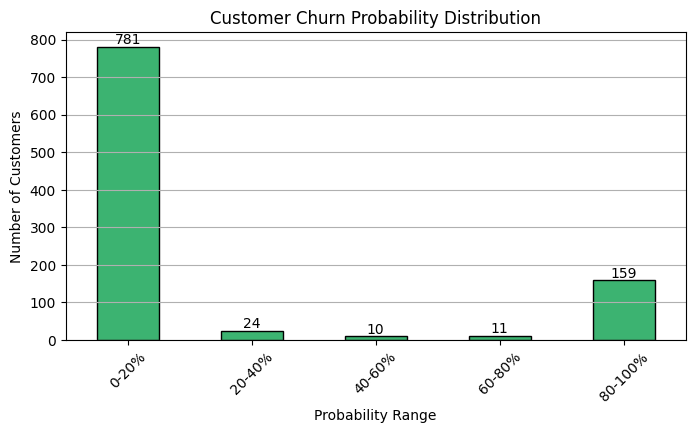

In [228]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

probaresult['Probability Range'] = pd.cut(probaresult['Probability'], bins=bins, labels=labels)

bin_counts = probaresult['Probability Range'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
ax = bin_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Customer Churn Probability Distribution')
plt.xlabel('Probability Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

- Rentang Probabilitas 0-20%: Rentang ini memiliki jumlah pelanggan tertinggi, yaitu sebanyak 781 pelanggan. Ini menunjukkan bahwa sebagian besar pelanggan memiliki probabilitas sangat rendah untuk churn.
- Rentang Probabilitas 20-40%: Rentang ini memiliki 24 pelanggan. Pelanggan dalam kategori ini memiliki probabilitas rendah hingga sedang untuk churn.
- Rentang Probabilitas 40-60%: Terdapat 10 pelanggan dalam rentang ini, menunjukkan probabilitas sedang untuk churn.
- Rentang Probabilitas 60-80%: Rentang ini hanya berisi 11 pelanggan, yang menunjukkan probabilitas cukup tinggi untuk churn.
- Rentang Probabilitas 80-100%: Rentang ini memiliki 159 pelanggan. Pelanggan dalam kategori ini berada pada risiko tinggi untuk churn.

## Strategi Peningkatan Retensi dan Penurunan Churn Pelanggan berdasarkan Risiko Churn
Berdasarkan hasil di atas, ada beberapa strategi yang dapat dilakukan agar retention rate meningkat dan churn rate menurun.
1. 0%-20% Probabilitas Churn: Pelanggan dalam rentang ini memiliki risiko churn yang sangat rendah. Strategi utama adalah untuk mempertahankan kepuasan dan loyalitas mereka:
- Program Loyalitas yang Menarik: Terus tawarkan penghargaan dan insentif melalui program loyalitas yang ada.
- Personalisasi Pengalaman: Personalisasi komunikasi dan penawaran produk berdasarkan preferensi individu pelanggan.
- Promosi Berkala: Kirimkan promosi dan penawaran eksklusif secara berkala untuk menjaga pelanggan tetap terlibat dan termotivasi untuk berbelanja lebih banyak.
2. 20%-40% Probabilitas Churn: Pelanggan dalam kategori ini memiliki risiko churn yang relatif rendah tetapi memerlukan perhatian lebih.
- Monitoring dan Evaluasi: Lakukan monitoring terhadap interaksi pelanggan dan evaluasi potensi masalah yang dapat menyebabkan churn.
- Kampanye Pemasaran yang Terarah: Gunakan data analisis untuk mengidentifikasi kebutuhan khusus pelanggan dalam kategori ini dan buat kampanye pemasaran yang disesuaikan.
- Tingkatkan Layanan Pelanggan: Pastikan layanan pelanggan responsif dan membantu, terutama untuk pelanggan yang menunjukkan tanda-tanda ketidakpuasan.
- Insentif Khusus: Berikan insentif tambahan seperti diskon atau penawaran khusus untuk meningkatkan engagement pelanggan.
3. 40%-60% Probabilitas Churn: Pelanggan dalam kategori ini memiliki risiko churn yang sedang dan memerlukan strategi retensi yang lebih kuat.
- Analisis Data Pelanggan: Gunakan analisis data untuk memahami perilaku belanja dan preferensi pelanggan.
- Intervensi Proaktif: Hubungi pelanggan yang menunjukkan tanda-tanda akan churn dan tawarkan solusi atau insentif untuk meningkatkan kepuasan mereka.
- Pengalaman Pengguna yang Lebih Baik: Perbaiki pengalaman pengguna baik pada platform desktop maupun mobile, memastikan navigasi yang mudah dan transaksi yang lancar.
- Feedback dan Tindakan Cepat: Kumpulkan feedback dari pelanggan dan segera tindak lanjuti untuk memperbaiki layanan dan produk.
4. 60%-80% Probabilitas Churn: Pelanggan dalam kategori ini memiliki risiko churn yang tinggi dan membutuhkan pendekatan yang lebih agresif untuk retensi.
- Penanganan Keluhan yang Cepat: Pastikan semua keluhan pelanggan ditangani dengan cepat dan efisien.
- Promosi Eksklusif: Tawarkan promosi eksklusif dan insentif yang lebih besar untuk menarik minat pelanggan kembali.
- Program Loyalitas yang Ditingkatkan: Buat program loyalitas yang lebih menarik dan personal, fokus pada penghargaan yang signifikan untuk pelanggan yang berisiko tinggi.
- Pengiriman Cepat dan Andal: Pastikan pengiriman barang cepat dan tepat waktu untuk meningkatkan kepuasan pelanggan.

5. 80%-100% Probabilitas Churn: Pelanggan dalam kategori ini memiliki risiko churn yang sangat tinggi dan mungkin sudah sulit untuk diselamatkan. Fokus utama adalah untuk meminimalkan kerugian dan mengoptimalkan sumber daya.
- Penawaran Terakhir: Tawarkan penawaran terakhir yang sangat menarik untuk mencoba mempertahankan mereka, seperti diskon besar atau layanan gratis untuk satu periode.
- Analisis Mendalam: Lakukan analisis mendalam untuk memahami alasan utama churn dan gunakan informasi ini untuk meningkatkan strategi retensi di masa depan.
- Redistribusi Sumber Daya: Fokuskan sumber daya pada pelanggan dengan risiko churn yang lebih rendah namun masih dapat diselamatkan.
- Optimisasi Acquisition Cost: Efisiensikan biaya akuisisi pelanggan baru dengan strategi pemasaran yang lebih efektif dan terukur untuk menggantikan pelanggan yang hilang.

1. 0-20% Probabilitas Churn:
- Jumlah pelanggan dalam rentang ini adalah 777. Ini menunjukkan bahwa 164 pelanggan memiliki probabilitas churn yang sangat rendah (antara 0% hingga 20%). Ini mungkin mencakup pelanggan yang sangat loyal atau puas dengan layanan yang diberikan oleh perusahaan.

2. 20-40% Probabilitas Churn:
- Hanya terdapat 25 pelanggan dalam rentang probabilitas ini. Pelanggan dalam kategori ini memiliki risiko churn yang relatif rendah namun lebih tinggi dibandingkan dengan kelompok sebelumnya.

3. 40-60% Probabilitas Churn:
- Terdapat 12 pelanggan dalam rentang probabilitas ini. Pelanggan dalam kategori ini memiliki probabilitas churn yang sedang, menunjukkan bahwa mereka mungkin puas dengan beberapa aspek layanan namun tidak sepenuhnya terikat.

4. 60-80% Probabilitas Churn:

- Terdapat 7 pelanggan dalam rentang probabilitas ini. Pelanggan dalam kategori ini memiliki risiko churn yang tinggi. Perusahaan perlu memberi perhatian khusus kepada kelompok ini dengan mungkin memberikan penawaran khusus atau meningkatkan layanan.

5. 80-100% Probabilitas Churn:
- Jumlah terbesar, yaitu 164 pelanggan, berada dalam rentang probabilitas ini.
Ini menunjukkan bahwa 164 pelanggan memiliki risiko churn yang sangat tinggi. Pelanggan ini sangat mungkin meninggalkan layanan kecuali ada intervensi yang signifikan dari perusahaan.

## Rule-based Model

In [229]:
dfc_rulebase = pd.DataFrame(dfc)
def ruleBase_Tenure(row):
    if row['Tenure'] <= 24:
        return 1
    else:
        return 0

dfc_rulebase['tenure_flag'] = dfc_rulebase.apply(ruleBase_Tenure, axis=1)

pd.DataFrame(dfc_rulebase)

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0         1       4         Mobile Phone        3                6   
1         1      11         Mobile Phone        1                8   
2         1      12         Mobile Phone        1               30   
3         1       0         Mobile Phone        3               15   
4         1       0         Mobile Phone        1               12   
...     ...     ...                  ...      ...              ...   
4917      0       5             Computer        1               12   
4918      0       1         Mobile Phone        3               12   
4919      0      13         Mobile Phone        1               13   
4920      0       1         Mobile Phone        1               11   
4921      0       8         Mobile Phone        1               15   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female               3                         3   
1                     UPI    Male               3                         4   
2              Debit Card    Male               2                         4   
3              Debit Card    Male               2                         4   
4             Credit Card    Male               2                         3   
...                   ...     ...             ...                       ...   
4917          Credit Card    Male               4                         4   
4918                  UPI  Female               2                         5   
4919          Credit Card    Male               3                         5   
4920           Debit Card    Male               3                         2   
4921          Credit Card    Male               3                         2   

       PreferredOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                  2        Single                9   
1           Mobile Phone                  3        Single                7   
2           Mobile Phone                  3        Single                6   
3     Laptop & Accessory                  5        Single                8   
4           Mobile Phone                  5        Single                3   
...                  ...                ...           ...              ...   
4917  Laptop & Accessory                  5        Single                2   
4918        Mobile Phone                  3        Single                2   
4919             Fashion                  5       Married                6   
4920  Laptop & Accessory                  4       Married                3   
4921  Laptop & Accessory                  3       Married                4   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0           1                           11           1           1   
1           1                           15           0           1   
2           1                           14           0           1   
3           0                           23           0           1   
4           0                           11           1           1   
...       ...                          ...         ...         ...   
4917        0                           20           2           2   
4918        0                           19           2           2   
4919        0                           16           1           2   
4920        1                           21           1           2   
4921        0                           13           2           2   

      DaySinceLastOrder  CashbackAmount  tenure_flag  
0                     5          159.93            1  
1                     0          120.90            1  
2                     3          120.28            1  
3                     3          134.07            1  
4                     3          129.60            1  
...                 ...             ...          ...  
4917                  3          224.36            1 

In [230]:
X_rb = dfc_rulebase.drop(['Churn','tenure_flag'], axis=1)
y_rb = dfc_rulebase['tenure_flag']

In [231]:
X_train_rb, X_test_rb, y_train_rb, y_test_rb = train_test_split(
    X_rb,
    y_rb,
    test_size=0.2,
    stratify=y_rb,
    random_state=42)

In [232]:
print("Classification report:\n", classification_report(y_test, y_test_rb))
print('ROC-AUC Score:', roc_auc_score(y_test, y_test_rb))

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.07      0.12       817
           1       0.17      0.90      0.28       168

    accuracy                           0.21       985
   macro avg       0.47      0.49      0.20       985
weighted avg       0.67      0.21      0.15       985

ROC-AUC Score: 0.4860406831031066


Interpretasi  :
- Recall Tinggi untuk Churn: Model memiliki recall yang sangat tinggi untuk churn (0.90), yang berarti model sangat bagus dalam mendeteksi pelanggan yang churn.
- Precision Rendah untuk Churn: Precision untuk churn sangat rendah (0.17), yang menunjukkan banyak false positives, yaitu prediksi churn yang salah.
- Precision Tinggi untuk No Churn: Precision untuk tidak churn cukup tinggi (0.77), namun recall-nya sangat rendah (0.07), yang berarti banyak pelanggan yang tidak churn tidak terdeteksi.
- Model rule base dengan aturan "tenure <= 24 maka churn == 1" cenderung mendeteksi sebagian besar pelanggan yang churn dengan baik (recall tinggi), tetapi menghasilkan banyak false positives (precision rendah). Model rule base ini sangat tidak akurat dalam mendeteksi pelanggan yang tidak churn. Oleh karena itu, jika akan dikembangkan diperlukan penyesuaian lebih lanjut atau penggunaan metode lain untuk meningkatkan keseimbangan antara precision dan recall di kedua kelas.
- Dengan AUC Score sebesar 48.60407%, artinya jika kita memilih dua pelanggan secara acak, satu yang churn dan satu yang tidak churn, model memiliki peluang sekitar 48.60407% untuk memprediksi dengan benar pelanggan mana yang akan churn dan mana yang tidak.

## Limitasi Model
- Model yang dibangun di latih dengan 19 feature, apabila ada tambahan feature baru, maka akan sangat mempengaruhi prediksi dan Model perlu di training kembali.
- Jumlah sumber dataset yang dimiliki berjumlah 4922, dan kemungkinan akan terdapat perbedaan performa jika dilakukan prediksi kembali. dibutuhkan data yang lebih banyak lagi sehingga dapat meng-generalisasikan model dengan baik.
- Menghilangkan sebagian outliers dari dataset dapat membantu model fokus pada pola yang lebih umum dan relevan dalam data. Ini dapat meningkatkan kinerja model jika outliers tersebut sebenarnya merupakan anomali yang tidak relevan atau jika mereka mengganggu pembentukan model yang baik. namun jika memang ada customer yang memiliki feature dengan value yang ekstrim, hasil prediksi model ini mungkin tidak sebaik prediksi yang featurenya masih didalam range data training.



# **Recommendations & Conclusions**

## **Project Conclusion**

- Analisis dan modeling telah dilakukan cukup ekstensif hingga melakukan perbandingan antara 2 karakter data dan 1 menggunakan metode prediksi rule-based yang berdasarkan fitur 'Tenure' dimana paling berpengaruh secara importance dan SHAP.

- Data & Model yang terbaik didapat pada Dataframe Clean (dfc) dengan menghapus beberapa outliers pilihan yang dipastikan dengan relevansi domain knowledge dan interquartile range sehingga dilakukan pemodelan dengan model Extreme Gradient Boosting (XGBoost) dengan hasil penekanan error pada False Negative (FN) sebesar 93.45% dengan 11 prediksi yang salah serta skor keakuratan prediksi dari keseluruhan data (Accuracy Score) yakni 96.75%

- Probabilitas dari data test yang telah dilakukan didapati bahwa cukup banyak customer yang memiliki kemungkinan mengalami churn pada level diatas 40% kemungkinan ada sekitar 814 pelanggan yang perlu perhatian khusus dan penangannya disesuaikan dengan segmentasi level probabilitasnya.

- Tenure, CashbackAmount, OrderCat, Complain, dan sebagainya adalah sebagian fitur dengan importance dan SHAP tertinggi, yang dimana kedua fitur tersebut sangat mempengaruhi hasil dari prediksi.

## **Project Recommendations**

- Jumlah data yang digunakan dalam pemodelan ini tergolong kecil. Maka dari itu, perlu dilakukan **integrasi dari lebih banyak sumber data seperti interaksi layanan pelanggan, aktivitas media sosial, dan log transaksi terperinci untuk memperkaya dataset**.
- Menurut [Forbes.com](https://www.forbes.com/advisor/business/ecommerce-statistics/), 24% pengguna berhenti berbelanja online karena pengiriman yang lambat. Maka dari itu, **kita dapat menambahkan fitur rata-rata waktu (dalam hari) yang diperlukan pelanggan untuk menerima barang mereka**.
- Menurut [pickystory.com](https://pickystory.com/blog/ecommerce-sales-trends-top-future-trends-statistics-ecommerce/), pelanggan e-commerce yang lebih muda cenderung lebih sering berbelanja dibandingkan dengan mereka yang lebih tua. Maka dari itu, kita dapat **menambahkan variabel `Age` untuk memantau *spending habits* customer**.
- **Kembangkan fitur mendukung** yang mengukur tingkat keterlibatan pelanggan, seperti click-through rate, durasi sesi, dan frekuensi interaksi dengan berbagai kategori produk.
- Hasil rekomendasi analisis yang telah dilakukan untuk tindak lanjut terhadap data perusahaan ini yakni dengan melakukan **predictive modeling dengan target customer churn**.
- Precision yang dihasilkan oleh model masih dapat ditingkatkan. Hal ini dapat dicapai dengan **melakukan hyperparameter tuning secara ekstensif** menggunakan teknik seperti Bayesian optimization atau grid search dengan cross-validation untuk menemukan parameter model terbaik.
- **Implementasikan analisis survival untuk memprediksi waktu hingga churn untuk setiap pelanggan**. Hal ini memberikan pemahaman yang lebih mendetail tentang siklus hidup pelanggan.
- **Gunakan teknik clustering untuk segmentasi pelanggan berdasarkan pola perilaku mereka** dan **kembangkan strategi pemasaran yang dipersonalisasi untuk setiap segmen**.

## **Business Calculation**
Untuk mengetahui berapa kerugian yang ditimbulkan oleh model ini ketika salah memprediksi, kita perlu menentukan `Customer Spending per Month` (CSPM), `Customer Acquisition Cost` (CAC), dan `Customer Retention Cost` (CRC).
- Menurut [yaguara.co](https://www.yaguara.co/online-shopping-statistics/), pembeli online di Amerika Serikat menghabiskan rata-rata \$5381/tahun atau `$448.4167/bulan` pada tahun 2023. Nilai ini akan menjadi CSPM.
- Menurut [semrush.com](https://www.semrush.com/blog/customer-retention-stats/), untuk menarik 1 customer baru, perusahaan perlu dana sebesar `$29/customer`. Nilai ini akan bertindak sebagai `CAC`.
- Kemudian, misalkan kita memberikan `diskon 15%` untuk customer yang diprediksi akan churn. Artinya \$448.4167*0.05 = `$67.262505/customer`



Kita akan membandingkan dana yang dikeluarkan oleh perusahaan jika terdapat 985 customer yang status churn-nya tidak diketahui.

1. Worst case scenario: Semua customer diasumsikan churn
Ketika perusahaan bekerja tanpa model, maka perlu mempersiapkan keadaan paling buruk, yaitu semua customer churn.

> Biaya yang diperlukan untuk mempertahankan customer (dengan diskon 15%) = CRC x Jumlah pelanggan

> **Biaya yang diperlukan untuk mempertahankan customer (dengan diskon 15%) = \$67.262505 x 985 = \$66,253.567425**

> Biaya yang dipersiapkan untuk mengakuisisi 985 customer baru = CAC x Jumlah pelanggan yang diakuisisi

> **Biaya yang dipersiapkan untuk mengakuisisi 985 customer baru = \$29 x 985 = \$28,565**

> **Total pengeluaran perusahaan ketika memperlakukan 985 customer sebagai customer yang akan churn = \$94,818.567425**

2. Case di mana perusahaan mengimplementasikan model yang disarankan

> Kita ketahui bahwa model yang dibangun menghasilkan metrics sebagai berikut. Misalkan, kita tidak tahu mana prediksi kita yang benar dan yang salah. Jadi, kita hanya akan menghitung berapa pelanggan yang diprediksi akan churn dan yang tidak.

- Jumlah pelanggan yang diprediksi churn = 157 + 21 = 178

- Jumlah pelanggan yang diprediksi tidak churn = 796 + 11 = 807

- Jumlah pelanggan yang ternyata salah prediksi (perusahaan tidak mengantisipasi hal ini) = 11

> Biaya yang diperlukan untuk mempertahankan customer yang diprediksi churn (dengan diskon 15%) = CRC x 178

> **Biaya yang diperlukan untuk mempertahankan customer yang diprediksi akan churn (dengan diskon 15%) = \$67.262505 * 178 = \$11,972.72589**

> Biaya yang dipersiapkan untuk mengakuisisi customer baru = CAC x 178

> **Biaya yang dipersiapkan untuk mengakuisisi 178 customer baru = \$29 x 178 = \$5,162**

> ***Unexpected customer loss* (pelanggan churn yang diperlakukan sebagai pelanggan yang tidak churn) = CSPM * 11 = \$448.4167 * 11 = \$4,932.5837**

> **Total pengeluaran dan kerugian perusahaan = \$22,067.30959**

**Jadi disimpulkan bahwa perusahaan menghemat sebesar 76.7268% atau \$72,751.26 dengan implementasi model machine learning yang dihasilkan**

<br> *Di sini kita asumsikan bahwa ketika pelanggan diberikan diskon 15%, pelanggan tidak jadi churn*

## **Business & Marketing Recommendation**
Berdasarkan analisis churn yang mendalam dan faktor-faktor yang mempengaruhinya, berikut adalah beberapa rekomendasi bisnis untuk mengurangi churn, meningkatkan retensi pelanggan serta profit perusahaan:

1. **Program Loyalitas yang Ditingkatkan**
- Custom Gender-Specific Rewards: Mengingat bahwa pelanggan perempuan cenderung lebih loyal, **program loyalitas khusus yang menawarkan penghargaan tambahan untuk perempuan dapat meningkatkan retensi mereka**. Sementara itu, **program loyalitas untuk laki-laki bisa lebih fokus pada penawaran pragmatis seperti diskon dan cashback langsung**.
- Incentives: **Memberikan insentif untuk pelanggan yang sering melakukan order seperti program poin yang dapat ditukarkan dengan diskon atau produk gratis**, serta insentif untuk tenure terlama dengan pemberian merchandise agar pelanggan merasa dihargai. Hal ini dapat meningkatkan retensi serta kepercayaan terhadap e-commerce.

2. **Personalisasi Strategi Pemasaran**
- Targeting Customers by Marital Status: Mengingat bahwa pelanggan single memiliki proporsi churn yang tinggi, kampanye pemasaran khusus yang menawarkan produk yang sesuai dengan gaya hidup dinamis mereka dapat membantu. Misalnya, promosi produk-produk yang trendy dan sering berubah.
- Targeting Customers by CityTier: Mengingat perbedaan kebutuhan pemesanan pada setiap citytier, kampanye pemasaran yang disesuaikan dengan karakteristik dan kebutuhan spesifik dari masing-masing city tier dapat mengurangi churn rate.

3. **Peningkatan User Experience**
- Optimasi Aplikasi e-commerce: Mengingat bahwa pengguna yang log in melalui komputer lebih cenderung churn, perlu adanya perbaikan pada aplikasi desktop/website agar lebih user-friendly dan responsif.
- Meningkatkan Interface dan User Experience: Selain itu, menurut [Forbes.com](https://www.forbes.com/advisor/business/ecommerce-statistics/), 91% pelanggan e-commerce membuat pesanan lewat ponsel mereka. Maka dari itu, perusahaan perlu memastikan bahwa pengalaman berbelanja, terutama pada platform mobile, nyaman dan mudah dinavigasi.


4. **Kebijakan Pengembalian dan Garansi yang Lebih Baik**
- Regulasi Garansi yang Ketat: Meningkatkan regulasi garansi terutama untuk kategori produk seperti mobile phone dan fashion, serta memastikan bahwa seller mematuhi standar kualitas yang tinggi.

5. **Layanan Pelanggan yang Efektif**
- Layanan pelanggan yang baik: Menurut [Zendesk](https://www.gravysolutions.io/post/customer-churn-rate-and-retention-top-25-stats-you-need-to-know), 66% pelanggan churn karena layanan pelanggan yang buruk. Maka dari itu, membangun sistem yang cepat dan efektif dalam menangani keluhan pelanggan dapat mengurangi risiko churn. Pelanggan yang merasa masalah mereka ditangani dengan serius cenderung lebih setia.
- Penyelesaian masalah yang efektif: Menurut [Kolsky](https://www.gravysolutions.io/post/customer-churn-rate-and-retention-top-25-stats-you-need-to-know), churn rate dapat diturunkan hingga 67% selama bisnis menyelesaikan masalah yang dihadapi pelanggan dan memenuhi ekspektasi mereka. Maka dari itu, bisnis perlu melakukan training intensif terhadap tenaga *customer service* agar dapat menyediakan solusi yang efektif bagi pelanggan.
- Feedback Loop: Menggunakan data dari keluhan untuk memperbaiki layanan dan produk. Menginformasikan pelanggan tentang perbaikan yang dilakukan berdasarkan umpan balik mereka juga dapat meningkatkan kepercayaan.


6. **Peningkatan Promosi dan Penawaran**
- Tingkatkan promosi untuk pelanggan baru: Pelanggan baru dan pelanggan yang menerima cashback rendah cenderung memiliki probabilitas yang tinggi untuk churn. Hal tersebut dapat dicegah dengan mengadakan loyalty program, memberikan kupon khusus pelanggan baru, dan memberikan diskon.
- Promosi lewat Sosial Media: Menurut [Forbes.com](https://www.forbes.com/advisor/business/ecommerce-statistics/), 40% pelanggan membeli produk di *e-commerce* karena terpengaruh sosial media. Kategori yang paling influensial adalah pakaian, produk *skin care*, makanan, dan aksesoris. Maka dari itu, perusahaan harus mampu mempromosikan kategori-kategori ini di sosial media dengan cara yang kreatif. Sehingga, pelanggan membuat *purchase* melalui aplikasi kita yang alhasil mencegah mereka untuk churn.
- Promosi yang Tepat Sasaran: Mengoptimalkan promosi dan penawaran berdasarkan analisis segmentasi perilaku dan karakteristik pelanggan. Misalnya, menawarkan diskon khusus atau promosi eksklusif kepada pelanggan yang cenderung churn dapat meningkatkan retensi mereka.
- Pemasaran melalui push notification: Menurut [moengage.com](https://www.moengage.com/learn/push-notification-statistics/#:~:text=The%20eCommerce%20sector%20occupies%20the,as%20high%20as%203500%25!), ***push notification* dapat meningkatkan *retention rate* sebesar 3-10 kali lipat**. Maka dari itu, bisnis dapat mempertimbangkan untuk strategi ini guna mempertahankan pelanggan. Lewat *push notification* bisnis dapat mengirimkan promosi dan penawaran menarik yang dapat meningkatkan penjualan.
- Peningkatan Nilai Cashback: Meningkatkan nilai cashback untuk pelanggan yang sering melakukan transaksi atau yang memiliki potensi churn dapat meningkatkan loyalitas mereka terhadap platform e-commerce.
- Strategi pemasaran yang tepat: Menurut [invespcro.com](https://www.invespcro.com/blog/customer-acquisition-retention/), **pemasaran melalui e-mail, sosial media, dan pemasaran lewat konten merupakan taktik paling efektif dalam retensi pelanggan**. Selain itu, **referral marketing** (strategi marketing yang mendorong pelanggan untuk mengajak orang lain) juga dianggap sebagai taktik yang efektif dalam mempertahankan customer. Meningkatkan customer retention rate sebesar 5% dapat meningkatkan profit sebesar 25%-95%. Hal ini dapat diaplikasikan oleh bisnis dalam mempertahankan pelanggannya serta meningkatkan profit.
- Pemasaran mingguan lewat email: Menurut [Forbes.com](https://www.forbes.com/advisor/business/ecommerce-statistics/), 34% pelanggan berbelanja online setiap minggunya. Perusahaan mungkin dapat memanfaatkan hal ini dengan menggunakan pemasaran email untuk mengirimkan penawaran produk mingguan untuk menarik pelanggan agar melakukan pembelian dan menghindari churn.
- Menggratiskan ongkos kirim: Menurut [pickystory.com](https://pickystory.com/blog/ecommerce-sales-trends-top-future-trends-statistics-ecommerce/), 50% orang memilih berbelanja secara online karena adanya free shipping. Maka dari itu, **pertimbangkan untuk menggratiskan ongkos kirim untuk menambah pelanggan baru dan mempertahankan pelanggan lama**.


7. **Peningkatan Layanan dan Produk**
- Peningkatan Kualitas Produk: **Memastikan bahwa produk yang dijual di platform e-commerce berkualitas tinggi** dan sesuai dengan deskripsi. Ini dapat mengurangi keluhan dan meningkatkan kepuasan pelanggan.
- Diversifikasi Produk: **Menyediakan berbagai produk yang sesuai dengan kebutuhan dan preferensi pelanggan di berbagai CityTier dan status pernikahan** dapat meningkatkan kepuasan dan mengurangi risiko churn.
- Pengiriman cepat dan efisien: Menurut [Forbes.com](https://www.forbes.com/advisor/business/ecommerce-statistics/), 24% pelanggan tidak jadi membeli barang di e-commerce karena pengiriman yang lambat. Jika pengiriman lambat, pelanggan kemungkinan akan meninggalkan sesi belanja online dan beralih ke pesaing yang memiliki waktu pengiriman lebih cepat. Maka dari itu, **pilih mitra pengiriman yang andal dan memiliki reputasi baik dalam hal ketepatan waktu dan kualitas layanan**. Bisnis juga dapat mempertimbangkan untuk memberikan insentif seperti diskon atau gratis biaya pengiriman untuk pelanggan yang memilih opsi pengiriman standar yang lebih lambat, untuk mengurangi tekanan pada logistik.

8. **Edukasi Pelanggan**
- Edukasi Penggunaan Aplikasi: Menyediakan tutorial dan panduan penggunaan aplikasi yang mudah diakses oleh pelanggan. Ini dapat membantu pelanggan merasa lebih nyaman dan percaya diri dalam menggunakan aplikasi, sehingga mengurangi churn.
- Edukasi tentang Promosi dan Insentif: Menginformasikan pelanggan secara efektif tentang promosi dan insentif yang tersedia melalui berbagai saluran komunikasi dapat meningkatkan partisipasi mereka dalam program loyalitas.

9. **Survei Pelanggan**
- Lakukan survei pelanggan: Menurut [shopify](https://www.shopify.com/blog/churn-rate-in-ecommerce), salah satu cara untuk menurunkan churn rate adalah **melakukan survei/interview dengan pelanggan untuk dapat meningkatkan layanan e-commerce dan memenuhi ekspektasi mereka**. Dengan mengumpulkan *feedback* dari customer, kita dapat memahami pengalaman customer dalam menggunakan *e-commerce*, apa yang mereka sukai dan apa yang tidak disukai.

# Export Model

In [233]:
import pickle

pickle.dump(final_pipeline, open('ModelXGBTuned_beta.sav', 'wb'))

<div style="background-color:#F5F5DC; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1><center>Terima Kasih - Thank You - Gracias</center></h1>
  </ul>
</div>